In [1]:
import pandas as pd
import requests 

In [2]:
#This method will calculate the similarity score for us
def get_jaccard_similarity(S1,S2):
    if len(S1) == 0 and len(S2) == 0:
        return 0
    else:
        return len(S1.intersection(S2)) / len(S1.union(S2))
#This method will calculate the similarity score for us
def get_dice_similarity(S1,S2):
    if len(S1) == 0 and len(S2) == 0:
        return 0
    else:
        return 2 * ( len(S1.intersection(S2)) / (len(S1) + len(S2)))
#This method will calculate the similarity score for us
def get_overlap_similarity(S1,S2):
    if len(S1) == 0 or len(S2) == 0:
        return 0
    else:
        return len(S1.intersection(S2)) / min((len(S1) , len(S2)))
#This method will calculate the similarity score for us
def get_containment_similarity(S1,S2):
    if len(S1) == 0:
        return 0
    else:
        return len(S1.intersection(S2)) / len(S1)

In [18]:
count_query_number = 1

In [20]:
def get_augmented_babelnet_set_different_length(word, number):
    list_output = get_augmented_babelnet_list(word,number)
    return  [set  (list_output[:1]), set (list_output[:2]),
             set ( list_output[:3]) , set ( list_output[:4]) ,
             set ( list_output[:5]) , set ( list_output) ]


def get_augmented_babelnet_list(word,number):
    try:
        service_url = 'https://babelnet.io/v5/getSenses'

        lemma = word
        lang = 'EN'
        key = ''
        if number > 500:
            key  = 'ec40b6a5-97fe-4ce6-a3fe-f152c78ac4a0'
        else:
            key = '0ff37819-8cf0-4c18-8ea8-ab19c4be1a81'

        params = {
                'lemma' : lemma,
                'searchLang' : lang,
                'key'  : key
        }
        headers = {'content-type': 'Content-Encoding'}

        
        number +=1
        # sending get request and saving the response as response object 
        r = requests.get(url = service_url, params = params, headers=headers) 

        # extracting data in json format 
        data = r.json() 
        listOfsimpleLemma = []
        for result in data:
        #     print(result.get('properties'))
            properties = result.get('properties')
            simple_lemma = properties.get('simpleLemma')
            print(simple_lemma)
            if simple_lemma.lower() not in listOfsimpleLemma:
                listOfsimpleLemma.append(simple_lemma.lower())
        return listOfsimpleLemma
    except Exception as e:
        print(word , str(e))
        return []

In [4]:
eng_word1_aug = get_augmented_babelnet_set_different_length("English")
eng_word1_aug

American_English
American_language
English
English_language
English
English_people
American
English
English
side
Aiden_English
American_English
English,_West_Virginia
English:_An_Autumn_in_London
English_studies
Glossary_of_cue_sports_terms
Microdata_Corporation
Opt-out
Pakistani_English
1:54
English
English,_Indiana
English,_West_Virginia
British_English
English,_Indiana
English_language
English_people
Léon_Bloy
1:54
Aiden_English
American_English
British_English
Carl_Schurz_English
en
en-gb
en-us
eng
English
English
English
English
english
English
English
English
English
English
English
English
English
English
English,_Indiana
English,_West_Virginia
English_language
English_people
English_studies
Glossary_of_cue_sports_terms
Leo__Bloy
Leo__Bloy
Leon_Bloy
Leon_Bloy
Léo__Bloy
Léon_Bloy
Matt_Rehwoldt
Microdata_Corporation
opt-out
opt_out
Pakistani_English
United_States_English
US_English
English
English
English
English
AmE
American_English
BrE
British_English
English
English
U.S._Englis

[{'american_english'},
 {'american_english', 'american_language'},
 {'american_english', 'american_language', 'english'},
 {'american_english', 'american_language', 'english', 'english_language'},
 {'american_english',
  'american_language',
  'english',
  'english_language',
  'english_people'},
 {'1:54',
  'aiden_english',
  'am._eng.',
  'ame',
  'ameng',
  'amerenglish',
  'american',
  'american-english',
  'american_accents',
  'american_dialect_of_english',
  'american_dialect_of_the_english_language',
  'american_english',
  'american_english/standard_american_english',
  'american_english_language',
  'american_english_phonology',
  'american_language',
  'american_phonology',
  'angelcynn',
  'angla_lingvo',
  'anglesc',
  'anglicist',
  'anglistics',
  'balk',
  'bang_raising',
  'billiard_glossary',
  'billiard_lingo',
  'billiard_terminology',
  'billiards_glossary',
  'billiards_lingo',
  'billiards_terminology',
  'bloy,_leon',
  'bloy,_léon',
  'bre',
  'break',
  'brea

In [6]:
def get_augmented_babelnet_set(word):
    try:
        service_url = 'https://babelnet.io/v5/getSenses'

        lemma = word
        lang = 'EN'
        key  = '64833591-9d03-4852-aa4a-a98b1f760bab'

        params = {
                'lemma' : lemma,
                'searchLang' : lang,
                'key'  : key
        }
        headers = {'content-type': 'Content-Encoding'}

        # sending get request and saving the response as response object 
        r = requests.get(url = service_url, params = params, headers=headers) 

        # extracting data in json format 
        data = r.json() 
        listOfsimpleLemma = []
        for result in data:
        #     print(result.get('properties'))
            properties = result.get('properties')
            simple_lemma = properties.get('simpleLemma')
            print(simple_lemma)
            if simple_lemma not in listOfsimpleLemma:
                listOfsimpleLemma.append(simple_lemma.lower())
        return set(listOfsimpleLemma)
    except Exception as e:
        print(word , str(e))
        return set()

In [21]:
given_data = pd.read_excel('Cross Lingual dataset.xlsx')
given_data.shape

(1000, 4)

In [22]:
given_data.head()

Word 1      Word 2  score Word 2 Translation
0               Joule  خلائی جہاز   0.58         spacecraft
1       Promised Land        باکو   0.42               Baku
2                 car      سائیکل   2.83            bicycle
3          polyhedron      اداکار   0.00              actor
4  multiple sclerosis    ایم ایس    3.92                 MS

In [23]:
for i in range(1 , 7):
#     print("English Word 1 AL" + i)
    given_data[ "English Word 1 AL"+str(i) ] = ''
    given_data[ "English Word 2 AL"+str(i) ] = ''
    given_data['Jaccard A'+str(i)] = ''
    given_data['Dice A'+str(i)] = ''
    given_data['Overlap A'+str(i)] = ''
    given_data['Containment A'+str(i)] = ''
given_data.head()

Word 1      Word 2  score Word 2 Translation  \
0               Joule  خلائی جہاز   0.58         spacecraft   
1       Promised Land        باکو   0.42               Baku   
2                 car      سائیکل   2.83            bicycle   
3          polyhedron      اداکار   0.00              actor   
4  multiple sclerosis    ایم ایس    3.92                 MS   

  English Word 1 AL1 English Word 2 AL1 Jaccard A1 Dice A1 Overlap A1  \
0                                                                       
1                                                                       
2                                                                       
3                                                                       
4                                                                       

  Containment A1  ... Jaccard A5 Dice A5 Overlap A5 Containment A5  \
0                 ...                                                
1                 ...                                                
2                 ...                                                
3                 ...                                                
4                 ...                                                

  English Word 1 AL6 English Word 2 AL6 Jaccard A6 Dice A6 Overlap A6  \
0                                                                       
1                                                                       
2                                                                       
3                                                                       
4                                                                       

  Containment A6  
0                 
1                 
2                 
3                 
4                 

[5 rows x 40 columns]

In [10]:
for index, row in given_data.iterrows():
    print (index ,row["Word 1"], row["Word 2 Translation"] )

0 Joule spacecraft
1 Promised Land Baku
2 car bicycle
3 polyhedron actor
4 multiple sclerosis MS
5 fault system
6 weapon helmet
7 screenwriter television
8 United Nations Ban Ki-moon
9 Si-o-seh pol Mathematical Bridge
10 basilica mosaic
11 watercolor painting brush
12 democracy monarchy
13 Gauss scientist
14 tuberculosis LED
15 self-driving car autonomous car
16 apocalypse fire
17 speed post
18 PlayStation Wii
19 laptop notebook
20 Harry Potter wizard
21 snowboard skiing
22 pointer slide
23 sensor radiator
24 hit frame
25 theory hypothesis
26 Wall Street financial market
27 Darwin evolution
28 actor actress
29 film theatre
30 national anthem patriotism
31 screen monitor
32 dairy honey
33 Mount Everest Chomolungma
34 tug of war Snakes and Ladders
35 pesticide pest
36 policeman politician
37 neuropsychology parapsychology
38 battery energy
39 Legion of Honour stationery
40 Spider-Man street
41 peninsula island
42 equator Ecuador
43 chart graph
44 simulation robotics
45 Nike Adidas
46 soc

484 poem rhythm
485 prophet priest
486 Oscars stadium
487 backgammon Go
488 butterfly rose
489 fence jumping
490 nihilism film
491 asteroid star
492 riot drawing
493 underwear body
494 Boeing plane
495 cameo performance
496 semester term
497 orange citrus
498 glacier global warming
499 tunnel path
500 spacecraft Joule
501 Baku Promised Land
502 bicycle car
503 actor polyhedron
504 MS multiple sclerosis
505 system fault
506 helmet weapon
507 television screenwriter
508 Ban Ki-moon United Nations
509 Mathematical Bridge Si-o-seh pol
510 mosaic basilica
511 brush watercolor painting
512 monarchy democracy
513 scientist Gauss
514 LED tuberculosis
515 autonomous car self-driving car
516 fire apocalypse
517 post speed
518 Wii PlayStation
519 notebook laptop
520 wizard Harry Potter
521 skiing snowboard
522 slide pointer
523 radiator sensor
524 frame hit
525 hypothesis theory
526 financial market Wall Street
527 evolution Darwin
528 actress actor
529 theatre film
530 patriotism national anthem

975 McDonald's KFC
976 radar joystick
977 jasmine rice basmati
978 trainers medal
979 swimming pool law
980 box source
981 battery theatre
982 web browser flora
983 cardigan shirt
984 rhythm poem
985 priest prophet
986 stadium Oscars
987 Go backgammon
988 rose butterfly
989 jumping fence
990 film nihilism
991 star asteroid
992 drawing riot
993 body underwear
994 plane Boeing
995 performance cameo
996 term semester
997 citrus orange
998 global warming glacier
999 path tunnel


In [24]:
# given_data.at[1 , "English Word 1 Augmentation"]  = ''
for index, row in given_data.iterrows():
    print(index)
    eng_word1_aug = get_augmented_babelnet_set_different_length(row["Word 1"], (index + 1))
    eng_word2_aug = get_augmented_babelnet_set_different_length(row["Word 2 Translation"], (index + 1))
    
    for i in range(len(eng_word1_aug)):
    
        given_data.at[index , "English Word 1 AL" + str(i +1)] = ",".join(list(eng_word1_aug[i]))
        given_data.at[index , "English Word 2 AL" + str(i +1)] = ",".join(list(eng_word2_aug[i]))

        given_data.at[index , 'Jaccard A'+str(i + 1)] = 4 * get_jaccard_similarity(eng_word1_aug[i] , eng_word2_aug[i])
        given_data.at[index , 'Dice A'+str(i + 1)] = 4 * get_dice_similarity(eng_word1_aug[i] , eng_word2_aug[i])
        given_data.at[index , 'Overlap A'+str(i + 1)] = 4 * get_overlap_similarity(eng_word1_aug[i] , eng_word2_aug[i])
        given_data.at[index , 'Containment A'+str(i + 1)] = 4 * get_containment_similarity(eng_word1_aug[i] , eng_word2_aug[i])



0
joule
J
watt_second
Joule
James_Prescott_Joule
James_Prescott_Joule
joule
watt_second
Joule
Joule
Joule
James_Prescott_Joule
joule
Joule
Joule
Joule
kilojoule
kJ
W_s
watt-second
watt_second
W·s
joule
joule
James_Prescott_Joule
Attojoule
Centijoule
Decajoule
Decijoule
Exajoule
Exajoules
Femtojoule
Gigajoule
Gigajoules
Hectojoule
J._Joule
J._P._Joule
J.P._Joule
James_Joule
James_P._Joule
James_prescott_joule
Joule_programming_language
Joules
Kilojoule
Kilojoules
List_of_converted_amounts_of_joules
Megajoule
Megajoules
Millijoule
Nanojoule
Ocrajoule
Petajoule
Petajoules
Picojoule
SI_unit_of_energy
Terajoule
Terajoules
Watt-second
Watt-seconds
Watt_seconds
Yoctojoule
Yottajoule
Zeptojoule
Zetajoule
Zettajoule
ΜJ
Joule
Joule
spacecraft
ballistic_capsule
space_vehicle
starship
spaceship
space_vehicle
spacecraft
starship
interstellar_spacecraft
space-craft
space-ship
space_craft
space_ship
Space_vehicle
spacecraft
spaceship
starcraft
starship
spacecraft
spacecraft
spaceship
spaceship
space_

bicycle
cycling
bike
wheel
cycle
bicycle
cycling
pseudoforest
Recumbent_bicycle
Humania
Bichael
Bichael
Bicycle
bicycles
bicycling
bike
biking
cycle
cycling
Endless_roll
Humania
pedal_bike
pedal_cycle
Pseudoforest
pushbike
Recumbent_bicycle
women's_cycling
🚲
🚲
bicycle
bicycling
bike
biking
cycle
cycling
bicycle
bike
biking
cycle
cycling
pseudoforest
cycling
1-forest
1-tree
Bicicletta
bicycle
Bicycle_rider
Bicycle_riding
Bicycle_user
Bicycle_uses
Bicycles
Bicyclists
Bike
Bike_rider
Bike_riding
Bikecycle
Biked
Bikeriding
Bikes
Biking
Bycicle
Bycycle
Cyclism
Cyclists
Directed_pseudoforest
Dutch_bicycles
Functional_graph
Lowracer
Maximal_pseudoforest
Near-tree
Pedal_bicycle
Pedal_bike
Pedal_cycle
Pedal_cyclist
Pedalcycle
People_on_bikes
Pseudoarboricity
Pseudotree
Push-bike
Push_bike
Pushbike
Recumbant_bicycle
Recumbent_bicycles
Recumbent_bike
Recumbent_bikes
Recumbent_tricycle
Recumbents
SkimBike
Spanning_pseudoforest
Unicyclic_graph
🚲
🚳
🚴
Bicycle
Bicycle
Bicycle
Bicycles
Bike
Bikes
Endle

flaw
mistake
error
fault
fault
faulting
geological_fault
demerit
defect
fault
shift
fracture
break
fault
fault
fault
fault
error
Glossary_of_tennis_terms
wine_fault
Fault
fault
Fault
fault
Fault
fracture
Law_&_Order:_Special_Victims_Unit
Trap
error
fault
Fault
Fault
Fault
Fault
fracture
geologic_fault
geological_fault
glossary_of_tennis_terms
Incorrect
Law_&_Order:_Special_Victims_Unit,_season_7
tennis_terminology
tennis_terms
Trap
Wine_fault
Fault
defect
error
error
fault
fault
fault
fault
flaw
mistake
shortcoming
wine_defect
wine_fault
demerit
error
fault
fault
fault
fault
flaw
mistake
Mistakes
fault
fault
911_law_&_order_special_victims_unit
911_law_&_order_svu
911_svu
Alien_law_&_order:_special_victims_unit
Alien_law_&_order_special_victims_unit
Alien_law_&_order_svu
Alien_svu
Asymmetric_fault
Brittle_deformation
Dextral_fault
Dip-slip
Dip-slip_fault
Dip-slip_faults
Dirtballer
Double_Bagel
Double_bagel
Earth_fault
Earthquake_fault
Earthquake_hotspot
Earthquake_zone
Electrical_fault

helmet
visor
vizor
helmet
Helme,_Estonia
Cricket_helmet
Helme,_Estonia
helmet
Helmet_pigeon
Hockey_helmet
Helmet
helmet
Men
cricket_helmet
face
helm
Helme
helmet
helmet
helmet
Helmet
Helmet
Hockey_helmet
Men
helmet
visor
brain_bucket
helmet
helmet
visor
Boxing_helmet
Brain_bucket
Bump_cap
Closed_helmet
Conical_helmet
Face_cage
Head_armor
Helmat
HELMET
Helmets
Ice_hockey_helmet
Leather_helmet
Men_kendo
Open_helmet
Pot_helmet
Helmet
Helmet
Helmet
Helmet
Helmet
Helmet
Visor
visor
Visor
visor
7
screenwriter
film_writer
screenwriter
scenarist
screenwriter
scriptwriter
writer
screenwriter
American_screenwriter
Film_writer
Movie_writer
Scenario_writer
Scenarists
Screen-writer
Screen_play_writer
Screen_play_writers
Screen_writer
Screen_writers
Screenplay_writer
Screenplay_writers
Screenwriters
Script-writer
Script_Writer
Script_writer
Script_writers
Scriptwriters
television
telecasting
television_receiver
TV
television
television_system
television
television_set
tv
tv_set
idiot_box
boob_tube
t

watercolorist
watercolourist
watercolor_painting
aquarelle
art_of_watercolor_painting
art_of_watercolour_painting
watercolor
watercolour
watercolor
watercolorist
watercolourist
Aquarel
Aquarelle
aquarelle
Modern_watercolours
Water-colours
Water_colors
Water_colourist
Watercolor_paint
Watercolor_paintings
Watercolor_paper
Watercolor_pencil
Watercolorist
watercolorist
Watercolors
Watercolour_Artist
Watercolour_painter
Watercolour_painting
Watercolour_Paintings
watercolourist
Watercolourist
Watercolours
Wet-in-wet
Wet_in_wet
brush
brush
mallet
brush
light_touch
brush
hammer
brush
brush
clash
encounter
skirmish
brush
brushing
scrubland
brushwood
coppice
copse
thicket
brush
brushing
brush
brush
Brush,_California
Shrubland
Brush,_Colorado
Brush,_Colorado
George_de_Forest_Brush
percussion_mallet
thicket
brush
Brush
Brush
Brush
Brush
brush
brush
Brush
Brush
Brush
brush
Brush
Brush
Brush,_California
Brush,_Colorado
brush_g._de_f.
brush_g._de_f.
g._de_f._brush
g._de_f._brush
g._de_forest_brush
g

Autonomous_car
Autonomous_Car
Autonomous_Car
autonomous_car
driverless_car
robotic_car
self-driving_car
selfdriving_car
robocar
Automated_automobile
Automated_car
Automated_driving
Automobile_robotics
Automotive_robotics
Autonomous_automobile
Autonomous_automobiles
Autonomous_cars
Autonomous_driving
Car_robotics
Car_that_drives_itself
Computer-driven_car
Computer_driving
CyberCab
CyberCars
Driver-free_car
Driver-less_car
Driver-less_cars
Driverless_automobile
Driverless_automobiles
Driverless_car
Driverless_Car
Driverless_cars
Driving_autonomy
Hands-free_driving
Johnny_Cab
robocar
Robocar
Robot_car
Robot_Car
Robot_cars
Robotic_automobile
Robotic_automobiles
Robotic_car
Robotic_cars
Self-driven_car
Self-driving_automobile
Self-driving_automobiles
Self-driving_car
Self-driving_cars
Self-driving_vehicle
Self-steering_vehicle
Self_driving
Self_driving_car
Zoox
Autonomous_car
Autonomous_Car
Autonomous_Car
autonomous_car
driverless_car
robotic_car
self-driving_car
selfdriving_car
robocar
Aut

amphetamine
focal_ratio
methamphetamine
methamphetamine_hydrochloride
Methedrine
meth
deoxyephedrine
f_number
speed
fastness
gamma
speed
speeding
hurrying
pep_pill
chalk
chicken_feed
crank
glass
ice
shabu
speed
stop_number
swiftness
velocity
delta
upper
speed
trash
speed
Lotna
Greeks
Speed,_Kansas
amphetamine
f-number
methamphetamine
speed
Speed,_Kansas
Speed,_North_Carolina
Speed_–_The_Ride
velocity
Speed
Speed
Speed
Speed,_Indiana
Speed,_Missouri
Speed,_North_Carolina
Speed,_Victoria
Speed,_Indiana
Speed,_Missouri
Speed,_Victoria
Speed:_No_Limits
Greeks
Speed
Speed
Speed
Speed
Speed
Speed
Speed
Speed
Speed
Speed
Speed
Speed
Speed
Speed
Speed
1-phenyl-2-aminopropane
aesoxynorephedrine
alpha-methylphenethylamine
amfetaminum
amfetaminum
amphetamin
amphetamin
Amphetamine,_alpha-methylphenethylamine
beta-phenylisopropylamin
beta-phenylisopropylamin
CAS_Number:_300-62-9
d-1-phenyl-2-methylaminopropane
d-deoxyephedrine
d-desoxyephedrine
d-N-methylamphetamine
d-phenylisopropylmethylamine
des

PlayStation
PlayStation_App
Cheyenne
PlayStation
Cheyenne
PlayStation
PlayStation
PlayStation
PlayStation_1
PlayStation_Official_App
PS
PS
PS1
PSOne
PSX
Sony_PlayStation
PlayStation
Comparison_of_Playstation_game_consoles
Comparison_of_PlayStation_game_consoles
Flashing_light_of_death
Official_PlayStation_App
Original_PlayStation
Play_station
Play_Station
Play_station_1
Play_Station_1
Playstation
PLAYSTATION
PlayStation_1
Playstation_1
PlayStation_9
Playstation_9
PlayStation_Communities
PlayStation_console
PlayStation_family
PlayStation_I
PlayStation_Messages
PlayStation_Official_App
Playstation_One
PlayStation_One
PS1_Mini
PS_1
PS_App
Psone
Pureisutēshon
Sony/Nintendo_Play_Station
Sony_Play_Station
Sony_Playstaion
Sony_Playstation
Sony_PlayStation
Sony_playstation
Sony_PlayStation_1
Sony_PS-X
Sony_PS1
Virgin_Oceanic_Cheyenne
プレイステーション
I/O_Processor
PlayStation
PlayStation
Playstation
PlayStation
PlayStation
Playstation
PlayStation
PS_One
Nintendo
Wii
Wii
Nintendo
Nintendo_Co.
Nintendo

magic
witchcraft
ace
adept
champion
sensation
maven
mavin
virtuoso
genius
hotshot
sorcerer
magician
wizard
necromancer
thaumaturgy
enchantment
spell
star
superstar
thaumaturge
thaumaturgist
trance
whiz
whizz
witchery
wizard
wiz
adept
Beto_Vázquez_Infinity
maven
superstar
thaumaturgy
Unseen_University
witchcraft
Adventure_Time
magic
magic
magician
Magician
The_Wizard
The_Wizard
The_Wizard
Wizard
Wizard
Wizard
Wizard
Wizard
Wizard
Wizard
Wizard
Wizard
Wizard
Wizard
Wizard
Wizard
Wizard
Wizard
Wizard
Wizard
wizard
Wizard
Wizard_of_Oz
adept
Adventure_Time,_season_1
Bentley_Wittman
Beto_Vázquez_Infinity
effet_superstar
enchanter
enchantress
Istari
Joy_Stick_Heroes
mage
Mage
magic
magic
Magic-User
magician
magician
Maven
miracle_working
Nõiakepp
setup_assistant
sorcerer
sorceress
spellcraft
superstar
supputition
thaumaturgy
The_Wizard
The_Wizard
The_Wizard
Unseen_University
warlock
Wingless_Wizard
witchcraft
witchery
wiz
Wizard
Wizard
wizard
Wizard
wizard
Wizard
Wizard
Wizard
Wizard
Wizard
w

jig
gigue
slide
lantern_slide
slide
microscope_slide
chute
slide
playground_slide
slide
slideway
sliding_board
sloping_trough
swoop
slide
slide
glide
slide
coast
translation
gigue
Jakarta_Slide
jig
Pistol_slide
Slide,_Texas
Mule
Slide,_Texas
microscope_slide
No_Angel
playground_slide
Slide.com
slide_guitar
Steel_bar
Step_Back/Slide
The_Sword_of_Truth
Form_factor
Slide
Slide
Slide
Slide
Slide
Slide
Slide
Slide
Slide
Slide
Slide
Slide
Slide
Slide
Sliding
Transformers
translation
Beast_Wars
bottleneck
bottleneck
Gigue
Jakarta_Slide
Jig
microscope_slide
mobile_phone_form_factor
mule
No_Angel
Pistol_slide
play_bar
playground_slide
Slide
Slide
slide
Slide
slide
Slide
slide
Slide
Slide
slide
Slide
slide
SLiDE
Slide
slide
slide
Slide,_Texas
Slide.com
Slides
Sliding_friction
steel_bar
Step_Back/Slide
The_Sword_of_Truth
Transformers
Transformers_toy_line
Transformers_toys
translation
slide
SLIDE
Slide
slide
translation
bottleneck_guitar
jig
slide
slide
slide
slide
slide_guitar
steel
translation


cartoon
frame
human_body
physical_body
material_body
soma
build
figure
physique
anatomy
shape
bod
chassis
frame-up
inning
loudspeaker
speaker
speaker_unit
loudspeaker_system
picture_frame
skeleton
skeletal_frame
skeletal_system
speaker_system
frame
skeleton
frame
frame
systema_skeletale
frame
underframe
frame
form
flesh
frame_of_reference
frame
frame
framing
setup
sketch
frame
frame
frame
cartoon
chambranle
Complete_Heyting_algebra
Film_frame
Film_frame
Former
Frame_language
Frame_story
Frameup
Fund_for_the_Replacement_of_Animals_in_Medical_Experiments
Glossary_of_cue_sports_terms
Hive_frame
human_body
Human_skeleton
Innings
Legs_to_Make_Us_Longer
Locomotive_frame
loudspeaker
Moving_frame
picture_frame
skeleton
Still_frame
Vehicle_frame
Frame
Frame
Frame
Frame
Frame
Frame
Frame
Frame
frame
Frame
Frame
Frame
Frame
framing
Framing
Framing
receiver
Anatomical_variation
band
body
Bones
cartoon
case
chambranle
complete_Heyting_algebra
door-case
film_frame
Former
frame
frame
Frame
frame
fram

guess
hypothesis
conjecture
supposition
surmise
surmisal
speculation
hypothesis
possibility
theory
hypothesis
hypothesis
theory
Hypothesis
Hypothesis
antecedent
hypothesis
Hypothesis
hypothesis
hypothesis
theory
belief
hypothesis
opinion
presumption
supposition
conjecture
hypothesis
presumption
surmise
theory
hypothesis
theory
conjecture
A_theory_of
Alternative_Theories
Alternative_theory
Hypoth
Hypotheses
Hypotheses
Hypothesize
Hypothesized
Hypothetically
Just_a_theory
List_of_scientific_theories_and_laws
List_of_theories
Merely_a_theory
Myth_theories
Myth_theorist
Scientific_hypothesis
Scientific_question
Theoretic
Theoretical
Theoretical
Theoretical_approach
Theoretical_model
Theories
Theories
theorist
Theorists
Theorists
Theorized
Theory-based_model
Theory_and_fact
Theory_and_practice
Theory_of
Ὑπόθεσις
26
New_York_Stock_Exchange
N._Y._Stock_Exchange
NYSE
big_board
Wall_Street
the_Street
Wall_Street
Wall_St.
Erin_Street_&_Wall_Street
New_York_Stock_Exchange
New_York_Stock_Exchange


actor
defendant
actor
doer
histrion
player
thespian
role_player
suspect
worker
Actant
actor
Actor_model
defendant
Glossary_of_policy_debate_terms
Mohamed_Zouaoui
Screen_Actors_Guild_Award
suspect
The_Hero_Initiative
Actor
Actor
Actor
Actor
actor
Actor
actor
The_Optimist
Actant
actor
Actor
Actor
Actor
Actor
Actor
ACTOR
Actor
Actor
Actor
Actor
Actor
Actor
Actor
actor
Actor
Actor
Actor
actor_model
actors
actors
actress
actresses
actresses
defendant
Mohamed_Zouaoui
SAG_Award
Screen_Actors_Guild_Award
suspect
Suspect_或_crime_suspect
The_Hero_Initiative
The_Optimist
accused
actor
actor
defendant
player
suspect
actor
actor
actor
player
suspect
actor
actor
A_Commitment_to_Our_Roots
A_Commitment_To_Our_Roots
ACTOR
Actor_&_Actress
Actor_system
Actorides
Actorion
Actors
Actors_and_Actresses
Actors_and_actresses
Actresses
Agent_counterplan
American_actor
American_actress
Civil_defendant
Constructive_speech
Craig_Watkinson
Crime_suspect
Criminal_defendant
Defendants
Difference_between_Suspect_and_P

patriotism
nationalism
nationalism
patriotism
Patriotism
Patriotism
nationalism
patriotism
Patriotism
Patriotism
nationalism
patriotism
nationalism
patriotism
Age_of_Nationalism
Anti-colonial_nationalism
Anti-nationalism
British_patriotism
Criticisms_of_nationalism
Hyper-nationalism
Hypernationalism
Islam_and_nationalism
National_Ideologies
National_ideology
National_pride
National_sentiment
National_sentimentalism
National_sentimentalist
National_sentimentalists
National_sentiments
National_unity
Nationalicism
Nationalisme
Nationalisms
Nationalisms
Nationalist_ethos
Nationalistic
Nationalistic_aspirations
Nationalistic_extremism
Nationalists
Nationalists
Nationally_sentimental
Patriot
Patriotic
Patriotic
Patriotic_duty
Patriotic_sentiment
Patriotism,_a_novel
Patriots
Patroit
Proto-nationalist
Radical_nationalism
Risorgimento_nationalism
Rite_of_Love_and_Death
Scottish_patriot
Sports_nationalism
The_Rite_of_Love_and_Death
Ultra-nationalism
Ultra-nationalist
Ultra-nationalistic
Ultra-na

creamery
dairy
dairy_farm
milk_bar
creamery
dairy
Dairy,_Oregon
dairy_farming
milk_bar
Dairy
Dairy,_Oregon
creamery
dairy
Dairy
dairy_farming
dairy_store
Milk_bar
creamery
creamery
creamery
dairy
dairy
dairy
dairy_farmer
dairy_industry
dairyman
milk_farmer
creamery
dairy
dairy
dairy_farming
dairywoman
Big_milk
Creameries
Dairies
Dairy,_OR
Dairy,_Or
Dairy_agriculture
Dairy_animals
Dairy_company
Dairy_farm
Dairy_farmer
Dairy_Farming
Dairy_farms
Dairy_industry
Dairy_machinery
Dairy_production
Dairymaid
Dairyman
Dairymen
Dairywoman
Dairywomen
Diary_farming
Milk_Bar
Milk_industry
Milk_machine
Milk_production
Milking_cows
Milking_Cows
Milking_Machine
Milking_machines
Milking_parlor
Milking_parlour
Dairy
Milk_bar
dairy
dairy
dairy
beloved
dear
dearest
honey
honey
love
Big_Cat_Diary
honey
Honey:_Music_from_&_Inspired_by_the_Motion_Picture
Kehlani_discography
La_Mafia
Pretty_Girl_Special_Edition
Honey
Honey
Honey
Honey
Honey
Honey
Honey
Honey
Honey
Honey
Honey
Honey
Honey
Honey
Honey
Honey
Hone

politician
politico
pol
political_leader
politician
politician
politician
polit.
political_figure
political_leader
politician
politician
Politicians
Career_politician
Career_politics
List_of_politicians
List_of_Politicians
Patronage
Polictian
Policymaker
Policymakers
Politicain
Political_Figure
Political_figure
Political_leader
Political_leaders
Politican
politician
Politicians
Politition
Poltician
37
physiological_psychology
neuropsychology
psychophysiology
neuropsychology
physiological_psychology
psychophysiology
Neuropsychology
Neuropsychology
neuropsychology
Physiological_psychology
psychophysiology
neuropsychology
psychophysiology
Neuropsych
Neuropsychological
Neuropsychologist
Physiological_psychologist
Physiological_Psychology
Psychoneurology
Psychophysiological
Psychophysiologist
Wikipedia_talk:Articles_for_creation/Neuropsychology
psychic_phenomena
psychic_phenomenon
parapsychology
parapsychology
parapsychology
parapsychology
Anomalous_intuition
Anomalous_Operation
Anomalous_o

Legion_of_Honour
French_Legion_of_Honor
French_Legion_of_Honor
Legion_of_Honour
Légion_d'honneur
Ordre_national_de_la_Légion_d'honneur
Legion_of_Honor
Chevalier_dans_l'Ordre_de_la_Legion_d'Honneur
Chevalier_dans_l'Ordre_de_la_Légion_d'Honneur
Chevalier_de_la_Legion_d'Honneur
Chevalier_de_la_Legion_d'honneur
Chevalier_de_la_légion_d'honneur
Chevalier_de_la_Légion_d'honneur
Chevalier_de_la_Légion_d'Honneur
Chevalier_de_La_Légion_d'Honneur
Chevalier_de_la_Légion_d’Honneur
Chevalier_de_Legion_d'Honneur
Chevalier_de_Legion_d'honneur
Chevalier_de_Légion_d'honneur
Chevalier_of_the_Legion_of_Honor
Chevalier_of_the_Legion_of_Honour
Chevalier_of_the_Légion_d'honneur
Chevalier_of_the_National_Order_of_the_Légion_d’honneur
Chevalier_of_the_Order_of_the_Légion_d'honneur
Commandant_of_the_Legion
Commander_of_the_Legion_of_Honor
Commander_of_the_Legion_of_Honour
Commandeur_de_la_Legion_d'honneur
Commandeur_de_la_Légion_d'honneur
Croix_d'Officier_of_the_Legion_of_Honour
Cross_of_the_Legion_of_Honor
Cr

street
street
street
street
street
Street,_Somerset
Street,_Somerset
Humble_Beast
Mirrorwriting
street
Street
Street
Street
Street
Street
Street
16017_Street
1_Out_of_7
Mirrorwriting
St.
Street
Street
Street
Street
Street
Street
Street
Street
Street
street
Street
Street,_Somerset
(16017)_Street
Street
street
street
Lantokay
Nd_Street
Secondbreath
Street_crater
Street_identity
Surface_street
Ulitsa
Echoes
Gravity
Missing_Person
Shoulda
Spiral
Spirits
Street
Street
Street
Street
TMRW
Waterfront
street
41
peninsula
Peninsula,_Ohio
Peninsula,_Ohio
List_of_peninsulas
Peninsula
Peninsula
biland
byland
Peninsula
Peninsula
Peninsula
peninsula
peninsula
peninsula
Florida_Peninsula
Florida_peninsula
List_of_Peninsulas
List_of_Peninsulas
List_of_peninsulas
Peninsula,_OH
Peninsular
Peninsular
Peninsulas
Peninsulas
Penninsula
Penninsula
Peninsula
Point
Point
Point
island
island
Cyprus_in_the_Eurovision_Song_Contest
Dig_Your_Roots
Glossary_of_nautical_terms
island
Island,_Kentucky
Mythology_of_Lost


pretense
simulation
computer_simulation
pretence
pretending
simulation
simulation
feigning
model
simulation
computer_simulation
Logic_simulation
simulation
Simulation_video_game
dive
Diving
Simulation
The_Stage
Computer_model
computer_simulation
Dive
diving
logic_simulation
plunge
Schwalbe
simulation
Simulation
simulation
Simulation_game
simulation_video_game
dive
dive
simulation
simulation
simulation
computer_model
computer_simulation
dive
model
pretence
simulation
simulation
Artificial_word
Clinical_healthcare_simulators
Computational_modeling
Computational_modelling
Computational_simulation
Computer-aided_analysis
Computer-simulated
Computer_generated_reality
Computer_model
Computer_modeling
Computer_modelling
Computer_models
Computer_simulated
Computer_Simulation
Computer_simulation_game
Computer_simulations
Computer_simulator
Constructed_reality
Creating_God
Dive_play
Diving_football
Ergonomic_simulation
Fake_reality
Fake_world
False_reality
Football_diving
Function_simulation
Fun

scheme
strategy
strategy
Chess_strategy
Evolutionarily_stable_strategy
Strategic_management
strategy
The_Early_Tapes
Strategy
Strategy
Strategy
chess_strategy
Evolutionarily_stable_strategy
strategic_management
strategy
Strategy
Strategy
Strategy
strategy
The_Early_Tapes
scheme
strategy
strategy
scheme
strategy
strategy
strategy
Business_strategy
Business_Strategy
Chess/Strategy_and_Tactics
Chess_strategies
Competitive_strategy
Control_of_the_center
Control_of_the_centre
Corporate_strategy
Corporate_Strategy
Evolutionarily_stable
Evolutionarily_stable_strategies
Evolutionarily_Stable_Strategy
Evolutionary_stable_equilibrium
Evolutionary_stable_strategy
Evolutionary_Stable_Strategy
Evolutionary_strategy
International_Strategic_Management
International_strategic_management
Mixed_strategies
Mixed_strategy
Mixed_Strategy
Mixed_Strategy_Equilibria
Organizational_Strategy
Pure_strategies
Pure_strategy
Startegy
Statagy
Strategic
Strategic
Strategic_decisions
Strategic_drift
Strategic_enterpri

interpreter
translator
transcriber
translator
translating_program
translator
Broadcast_relay_station
Language_interpretation
Translator
Translator
translator
broadcast_relay_station
broadcast_translator
interpretation
language_interpretation
rebroadcaster
relay_transmitter
satellite_station
translator
Translator
Translator
translator
interpreter
translation
translator
translation
translator
translator
American_Sign_Language_Interpreting
American_Sign_Language_interpreting
Booster_Station
Booster_station
Broadcast_relay
Broadcast_translator
Broadcast_translators
Consecutive_Interpretation
Court_Interpreter
Dubash
FM_translator
FM_Translator
Great_Translator_Invasion
Intepreters
Interperate
Interpret
Interpreter
interpreter
Interpreters
Interprets
Language_interpretations
Medical_interpretation
National_Relay_Service
Program_translation
Programming_language_processing
Programming_language_processor
Radio_translator
Rebroadcaster
Relay_station
Relay_stations
Relay_transmitter
Relay_transm

brainstorming
brainstorming
Brainstorming
brainstorming
thought_shower
Brain-storming
BrainStorming
Dreamstorming
Electronic_Brainstorming
Individual_brainstorming
Individual_Brainstorming
Thought_Shower
telescope
scope
telescope
Telescope
Telescope
Telescope
Telescope
Telescope
Telescope
telescope
Telescope
Telescope
Telescope
Telescope_eye
telescope
telescope
Astronomic_telescope
Deme_Ranchu
Deme_ranchu
Demekin
Ground_telescope
Panoramic_telescope
Perspicil
TeleScope
Telescope-eye
Telescope_eye
Telescope_Eye
Telescope_goldfish
Telescopes
Telescopic_observational_astronomy
Telescopically
Telescopy
🔭
Telescope
telescope
telescope
53
degree
horizontal_surface
level
grade
level
degree
level
stage
level
spirit_level
floor
grade
level
storey
level
tier
level
layer
story
stratum
point
level
Adema
Eli_Young_Band
Evolutionary_grade
Experience_point
LeveL
Levél
spirit_level
storey
degree
Level
Level
Level
Level
Level
level
Stufe
Levél
Adema
area
board
bubble_level
degree
Eli_Young_Band
Evoluti

bargain
bargain
buy
steal
deal
Bargain
The_Bargain
The_Bargain
The_Bargain
Bargain
Bargain
Bargain
Bargain
The_Bargain
The_Bargain
The_Bargain
deal
I'd_Call_That_a_Bargain
Bargain
Bargain_(The_Who_song)/version_1
I'd_Call_That_a_Bargain
dicker
bargain
bargain
bargain
dicker
haggle
bargain
55
party
political_party
A_Political_Party
Political_parties_in_the_United_States
political_party
A_Political_Party
political_parties_in_the_United_States
Political_Party
political_party
party
political_party
party
political_party
Political_parties
party
American_party_system
American_Political_Parties
Comparison_of_politics_of_parties_of_the_United_States
Fraktion
History_of_American_politics
Party_member
Party_Political
Party_political
Party_politics
Party_strength
Party_strengths
Political_affiliation
Political_attitude
Political_groups
Political_parti
Political_parties
Political_parties_in_the_united_states
Political_Parties_in_the_United_States
Political_parties_in_the_United_States_of_America
Po

ostrich
par
ostrich
Struthio_camelus
Common_ostrich
Ostrich
Ostrich
par
common_ostrich
Journal_of_African_Ornithology
ostrich
Ostrich
Ostrich
par
Struthio_camelus
ostrich
ostrich
par
Ostriches
Common_Ostrich
Double_Bogey
Estridge
Masai_Ostrich
One_over_par
Osterich
Osterish
Ostrage
ostrich
Ostrich
Ostrich:_Journal_of_African_Ornithology
Ostrich_-_Journal_of_African_Ornithology
Ostrich_Egg
Ostrich_farm
Ostrich_farmer
Ostrich_farming
Ostrich_farms
Ostrich_meat
Ostrich_race
Ostrich_Racing
Ostriches
Ostridge
Ostrish
Ostritch
Par_for_the_course
Struthio_camelus
Struthious
Triple-bogey
Two_over_par
Two_under_par
Albatross
Birdy
Condor
Double_bogey
Ostrich
Par
Vulture
grove
woodlet
orchard
plantation
Orchard,_Texas
orchard
Orchard,_Texas
plantation
grove
Orchard
Orchard
Orchard_station
Orchard,_Colorado
Orchard,_Colorado
Orchard,_Nebraska
Orchard
Orchard_station
Orchard,_Iowa
Orchard,_Nebraska
Orchard,_Iowa
Anthony_Edward_Orchard
grove
Mandi_Weina-_Miss_Manitowoc_F.O.E_706_of_2015
Orchard
Orc

galax
beetleweed
coltsfoot
Galax_urceolata
galaxy
Milky_Way
Milky_Way_Galaxy
Milky_Way_System
galaxy
extragalactic_nebula
multiple_star
galaxy
wandflower
Damián_666
galax
galaxy
Galaxy_Science_Fiction
Lockheed_C-5_Galaxy
Milky_Way
Phil_Fearon
Six_Flags_Magic_Mountain
star_system
wandflower
Dove
Galaxy
Galaxy
Galaxy
Galaxy
Galaxy
Galaxy
Galaxy
Six_Flags_Magic_Mountain
Galaxy
Galaxy
Galaxy
Galaxy
Galaxy
Galaxy
Galaxy_Airlines
C-5_Galaxy
C5_Galaxy
Damián_666
Dove
extragalactic_nebula
Galax
Galax_urceolata
Galaxy
Galaxy
Galaxy
Galaxy
Galaxy
Galaxy
galaxy
Galaxy
Galaxy
Galaxy
Galaxy
Galaxy
Galaxy
Galaxy
Galaxy
Galaxy
Galaxy
Galaxy
Galaxy_Science_Fiction
L-500
L500
Lockheed_C-5_Galaxy
Lockheed_C-5_Galaxy
Magic_Mountain
Milky_Way
Milky_Way_Galaxy
Milky_way_galaxy
Milky_way_galaxy
multiple_star
multiple_star
multiple_star_system
multiple_star_system
multiple_stars
Phil_Fearon
Six_Flags_Magic_Mountain
star_system
stellar_system
The_Milky_Way
The_Milky_Way_Galaxy
Galaxy_Airlines
galaxy
galaxy
Ga

wrongdoer
offender
Offender
Offender
Offender
offender
Offender
Offender
64
pancreatic_cancer
pancreatic_cancer
Ca_body_of_pancreas
Ca_head_of_pancreas
Ca_tail_of_pancreas
malignant_neoplasm_of_body_of_pancreas
malignant_neoplasm_of_head_of_pancreas
malignant_neoplasm_of_tail_of_pancreas
pancreas_neoplasm
pancreatic_cancer
pancreatic_neoplasm
pancreatic_tumor
pancreatic_cancer
Adenocarcinoma_of_the_pancreas
Cancer_of_the_pancreas
Carcinoma,_pancreatic_ductal
Carcinoma_of_pancreas
Carcinoma_pancreas
Familial_pancreatic_carcinoma
Pancreas_cancer
Pancreatic_adenocarcinoma
Pancreatic_adenoma
Pancreatic_Cancer
Pancreatic_cancers
Pancreatic_carcinoma
Pancreatic_carcinoma,_familial
Pancreatic_ductal_adenocarcinoma
Pancreatic_ductal_carcinoma
Pancreatic_intraepithelial_neoplasia
Pancreatic_islet_cell_neoplasm
Pancreatic_islet_cell_tumors
Pancreatic_malignancy
Pancreatic_neoplasia
Pancreatic_neoplasms
chemotherapy
disinfectant
germicide
antimicrobic
antimicrobial
antimicrobial
chemotherapy
disi

birdcall
song
call
birdsong
song
Sung
Sung_dynasty
Song
Song_dynasty
vocal
song
song
song
strain
A_Song
Bird_vocalization
human_voice
Seong
song
Song_District
Song_dynasty
Voice_type
Geet
Ming
Song
Song
Song
Song
Song
Song
The_Song
Amphoe_Song
A_Song
bird_vocalisation
bird_vocalization
birdsong
Ming
piece
piece_of_music
Seong
Song
Song
Song
Song
Song
Song
Song
song
Song
Song
Song
Song
Song_China
Song_dynasty
Song_Empire
Soong
Soung
Soung
Sung
Sung
Sung_Dynasty
The_Song
The_Song
voice_type
宋
成
星
성
송
Song
bird_song
song
song
strain
birdcall
birdsong
call
Ming
song
song
song
song
song
Song_Dynasty
strain
track
song
voice
song
Amphoe_Song
Bei_Song
Bird-call
Bird-calls
Bird-song
Bird-songs
Bird_call
Bird_calls
Bird_identification
Bird_identification_through_sound
bird_song
Bird_Song
bird_Song
Bird_song
Bird_songs
Bird_vocalisation
Bird_vocalisations
Bird_vocalizations
birdcall
Birdcall
Birdcalls
birdsong
Birdsong
Birdsongs
Chirping_birds
Chirrup
Chirrups
Delta_song
Delta_Song_Airlines
Empir

alphabet
rudiment
first_rudiment
first_principle
alphabet
ABC
ABC's
ABCs
alphabet
Alphabet_Inc.
ABC
alphabet
Alphabet
Alphabet
Take_Care
ABC
abc.xyz
Alphabet
alphabet
alphabet
Alphabet
Alphabet
alphabet
Alphabet
Alphabet
Alphabet
Alphabet,_Inc
Alphabet,_Inc
Alphabet,_Inc.
Alphabet,_Inc.
Alphabet_Inc
Alphabet_Inc
Alphabet_Inc.
Alphabet_Incorporated
Alphabet_Incorporated
Take_Care
The_Alphabet
alphabet
alphabet
alphabet
Abc's
Abc.xyz
ABC_programming_language
Abc_programming_language
Abcs
Abeceda
Alfabet
Alpabet
Alphabet,_Inc.
Alphabet_company
Alphabet_Corp
Alphabet_Corporation
Alphabet_Inc
Alphabet_Inc_Class_A
Alphabet_Inc_Class_C
Alphabetic
Alphabetic_language
Alphabetic_writing_system
Alphabetic_writing_systems
Alphabetical
Alphabets
Alphebet
Aplhabet
Buried_Alive_Interlude
Cameras_/_Good_Ones_Go_Interlude
Chop_Care
GOOG
Google's_parent_company
Google_Alphabet
Google_parent_company
Input_symbol
Letter_name
List_of_Alphabet_Inc._Subsidiaries
List_of_assets_owned_by_Alphabet_Inc.
List_of

blanket
Jackson
Michael_Jackson
Michael_Joe_Jackson
blanket
cover
blanket
mantle
Blanket,_Texas
blanket
Blanket,_Texas
Clairette_blanche
Michael_Jackson
Urban_Species
Applehead
Blanket
blanket
Clairette_blanche
Gloved_One
Jacko
King_of_Pop
Michael_Jackson
Michael_Jackson_discography
Michael_Joe_Jackson
Michael_Joe_Jackson
Michael_Joseph_Jackson
Michael_Joseph_Jackson
Michael_Joseph_Jackson
MJ
Urban_Species
blanket
cover
coverlet
blanket
cover
mantle
Michael_Jackson
2002_Berlin_controversy_involving_Michael_Jackson
AG_Cleret
AG_Kleret
Agent_MJ
Artistry_of_Michael_Jackson
Blanc_Laffite
Blanket,_TX
Blanket_Jackson
Blankets
Blankey
Blankie
Blanquette_du_Midi
Blanquette_Velue
Bon_Afrara
Bou_Afrara
Branquete
Cha'mone
Chamone
Cibade
Clairette_blanc
Clairette_Blanc
Clairette_Blanche
Clairette_d'Aspiran
Clairette_De_Limoux
Clairette_De_Trans
Clairette_Pointue
Clairette_Pounchoudo
Clairette_verte
Clarette
Colle_Musquette
Cotticour
Cultural_impact_of_Michael_Jackson
Decorative_throw
Feher_Clairet

peace
peace
peace
peacefulness
peace_of_mind
repose
serenity
heartsease
ataraxis
peace
peace_treaty
peace
public_security
pacification
Peace_River
William_Peace_University
Peace
Peace
Peace
Peace
Peace
Peace_College
Peace_River
Archie_Shepp_–_Bill_Dixon_Quartet
Marco_Arment
peace
peace_treaty
public_security
Rosa_Peace
Make_Believe
Peace
Peace
Peace
Peace
Peace
Peace
Peace
Peace
Peace
Peace
Peace
Peace
Peace
Peace
Archie_Shepp_–_Bill_Dixon_Quartet
Make_Believe
Marco_Arment
Mtulazaji_Davis
P.E.A.C.E.
Pax
Peace
Peace
Peace
Peace
Peace
Peace
Peace
PEACE
Peace
Peace
Peace
peace
Peace
Peace
Peace
Peace
Peace
Peace
Peace
Peace
Peace
Peace_College
Peace_College
Peace_Institute
Peace_Institute
Peace_River
peace_treaty
public_safety
Public_security
public_security
Queen's_peace
Rosa_'Peace'
The_Peace
William_Peace_University
ease
peace
peace
ataraxis
ease
peace
peace
peace
peace_of_mind
peace
Archie_Shepp_-_Bill_Dixon_Quartet
Bugshot
Concord
Follow_Baby
Harry_"Harrison"_Koisser
Harry_Koisser
Mt

lizard
lounge_lizard
Squamata
order_Squamata
lizard
lizard
Lizard
lounge_lizard
M53/59_Praga
Squamata
Lizard
Lizard
Lizard
Lizard
Lizard
Lizard
Curt_Connors
Jesterka
Ještěrka
Lacertili
Lacertilia
Lizard
Lizard
Lizard
lizard
lizard
Lizard
Lizard
Lizard
Lizard
Lizards
Lounge_lizard
M53/59_Praga
Praga_PLDvK_vz._53/59
Sauria
scaled_reptile
Squamata
vz._53/59
lizard
lizard
scaled_reptile
lacertilian
lizard
squamate
Chipkali
Curt_Conners
Curt_Connors
Dr._Connors
Dr._Curt_Connors
Dr._Curtis_Connors
Horizontal_lizard_pattern
Lacertia
Lacertian
Lacertians
Lacertids
Lacertilian
List_of_Lizards
Lizard_Pattern
Lizard_pattern
Lizard_Town
Lizards
Lizards_in_captivity
Lounge_Lizard
M53/59
order_Squamata
Order_Squamata
Parlor_snake
PLDvK_vz_53
Scaled_reptile
scaled_reptile
Spotted_lizard
squamate
Squamate
Squamates
Vertical_lizard_pattern
🦎
Lizard
Lizard
Lizard
Red_Vertical_Lizard
The_Lizard
The_Lizard
crocodile
crocodile
Mil_Mi-24
Crocodile
Crocodile
Crocodile
Crocodile
Crocodile
Crocodile
Crocodile


Paul_the_Octopus
Paul_the_Octopus
Octopus_paul
Ollie_the_Octopus
Oracle_octopus
Paul_Pulpo
Paul_the_octopus
Paul_the_Psychic_Octopus
Psychic_octopus
Psychic_paul
Psychic_Paul
Pulpo_paul
Pulpo_Paul
Paul
Paul
Paul_II
octopus
octopus
devilfish
Cafe_Fantasy
James_Bond_007:_From_Russia_with_Love
octopus
Octopus_as_food
Packet_switching
British_Bulldog
Octopus
Octopus
Octopus
Octopus
Octopus
Octopus
Octopus
Octopus
Octopus
Octopus
Octopus
Octopus
Octopus
Octopus
Octopus
007:_From_Russia_with_Love
action
bacca
baccare
black_tom
blackthorn
British_bulldogs
bulldogs_charge
bullies
bullrush
Cafe_Fantasy
Café_Fantasy
Chinese_wall
click
Clowns_and_Jugglers
cock
cock-a-rooster
cock_heaving
cockaroosha
cockarusty
cockie_duntie
crack_the_whip
dare-goal
Dead_Eye_Six
dog_and_deer,
fishy_fishy
fox-a'-dowdy
fox_and_dowdy
fox_and_geese
From_Russia_with_Love
hill,_dill,_come_over_the_hill
hill_dill
hop_and_dodge
hop_the_barger
hopping_bases
hopping_caesar
hopping_cockerals
hopping_jinny
hoppy_bowfie
James_

al-Qaeda
army_base
military_installation
floor
root
root_word
base
alkali
ball_field
base
base_of_operations
baseball_field
dress_shirt
evening_shirt
Qaeda
al-Qa'ida
al-Qaida
basis
basis
diamond
base
foundation
fundament
groundwork
cornerstone
foundation
base
fundament
foot
groundwork
substructure
understructure
bass
bass_voice
nucleotide
pedestal
base
radix
class
stratum
social_class
socio-economic_class
base
stand
base
bag
base
stem
basso
infrastructure
base
base
base
base
home
theme
base
radical
base
base
Base
base
base
base
base
al-Qaeda
alkali
Base,_Maharashtra
Base_and_superstructure
baseball_field
Baseball_metaphors_for_sex
dress_shirt
infrastructure
military_base
military_base
Nucleobase
nucleotide
OpenOffice.org
radix
social_class
Word_stem
base
Base
Base
Base
Base
base
Base
Base
Base
BASE
Base
basis
bass
foundation
root
The_Base
al-Qa'ida
al-Qaeda
al-Qaida
alkali
Apache_OpenOffice_Writer
base
Base
BASE
base
base
base
base
BASE
base
Base
Base
base
Base
Base
Base
base
base
Base

chemical
chemical_substance
chemical_substance
artificial_material
chemical
chemical_sources
chemical_substance
chemical_substances
chemicals
chemical
chemical_substance
chemicals
Artificial_material
Chemical
Chemical_sources
Chemical_substances
Chemicals
Pure_substance
80
government
authorities
government
governing
governance
government_activity
politics
political_science
regime
government
government
administration
governance
Government
government
Government_of_Ireland
Government_of_Thailand
political_science
regime
administration
government
Government_Street
administration
form_of_government
Form_of_government
forms_of_government
forms_of_government
governance
government
government
government_administration
Government_of_Ireland
Government_of_Thailand
Government_Street
polisci
political_administration
Political_regime
political_science
political_studies
political_system
political_system
Political_system
rection
regime
Royal_Thai_Government
governance
government
political_science
gov


sonnet
sonnet
Sonnet
Sonnet
sonnet
Sonnet
Sonnet
sonnet
Elizabethan_Sonnet
English_sonnets
Italian_sonnets
Link_sonnet
Master_sonnet
Petrarchan_sonnets
Sonets
Sonett
Sonnets
Sonnett
Sonnet
Sonnet
sonnet
sonnet
sonnet
beauty
beauty
beaut
smasher
stunner
knockout
beauty
ravisher
peach
lulu
looker
mantrap
flavor
flavour
sweetheart
dish
beauty
Beauty,_Kentucky
Beauty:_A_Retelling_of_the_Story_of_Beauty_and_the_Beast
Beauty_Gonzalez
bottomness
Beauty
Beauty
Beauty
Beauty
Beauty
Beauty
Beauty,_Kentucky
Shaye
Beauty
Beauty
Beauty
Beauty
flavour
Beauty
Beauty
beauty
Beauty
beauty
Beauty
Beauty
Beauty
Beauty
Beauty
Beauty
Beauty
Beauty
Beauty
Beauty
Beauty
Beauty
Beauty,_Kentucky
Beauty:_A_Retelling_of_the_Story_of_Beauty_and_the_Beast
Beauty_Gonzalez
bottomness
Christine_Marie_Gonzalez
flavour
Shaye
Skoonheid
beauty
beauty
bottomness
flavour
knockout
lulu
professional_wrestling
stunner
beauty
Beaut
Beauties
Beautifies
Beautiful
Beautifully
Beautious
Beautiously
Beautiousness
Beauty,_KY
Beauty_

polyester
polyester
polyester
polyester
Polyester
polyester
Polyester
polyester
polyester
Cross-linked_polyester
Odorama
Polyester_clothing
Polyesters
Unsaturated_polyester
Polyester
polyester
cotton
cotton_fiber
cotton_plant
cotton_wool
cotton
cotton
cotton
Arthur_Disbrowe_Cotton
cotton
Cotton,_Minnesota
Cotton,_Minnesota
Cotton
Cotton
Cotton
Cotton
Arthur_Disbrowe_Cotton
Cotton
Cotton
cotton
Cotton
Cotton
Cotton
Cotton
Cotton
Cotton
cotton
Cotton,_Minnesota
cotton_cloth
cotton
cotton
cotton
cotton
cotton_batten
cotton_fiber
cotton_fiber
cotton_fibre
cotton_fibre
cotton_plant
cotton_plant
cotton_wool
cotton_boll
cotton_wool
cotton
Asiatic_cotton_mallow
Bomull
Cotton_Boll
Cotton_cloth
Cotton_Fabric
Cotton_fiber
Cotton_growing
Cotton_industry
Cotton_linter
Cotton_picking
Cotton_plant
cotton_plant
Cotton_planting
Cotton_textile_industry
Cotton_wool
Cottonfield
Cottons
Genetically_modified_cotton
GM_cotton
Indian_Cotton
List_of_people_with_last_name_Cotton
List_of_people_with_surname_Cott

buttocks
nates
arse
fundament
hindquarters
hind_end
keister
posterior
prat
rear
rear
rear_end
rump
stern
seat
tail
tail_end
tooshie
tush
bottom
behind
derriere
fanny
ass
backside
back_end
rear
butt
backside
bum
buns
rear
back
back
rear
can
buttocks
parenting
rear
Rearing
Anteversion
ass
ass
booty
booty
butt
buttocks
child_rearing
parenting
Rearing
arse
ass
ass_cheek
back
backside
behind
bottom
bum
buns
butt
butt_cheek
buttock
buttocks
can
derriere
fanny
fundament
hind_end
hindquarters
keister
nates
posterior
prat
rear
rear_end
rump
seat
stern
tail
tail_end
tooshie
tush
back
butt
hindquarter
parenting
parenting
parenting
Ass_cheeks
Asscheeks
Badonkadonk
Bare_bum
Behind
Bi-parental_care
Bundaist
Butt_cheek
Butt_cheeks
Buttcheek
Buttcheeks
Buttox
Buttucks
Caring_for_offspring
Child-raising
Child-rearing
Child_raising
Child_rearing
Childrearing
Dairy_air
Dairy_aire
Derierre
Derriere
Derrière
Fourth_point_of_contact
Gluteal_region
Gluteal_regions
Hindquarter
Hindquarters
Hiney
Human_ass
Hum

squall
squall
Squall_Leonhart
The_Squall
VA-111_Shkval
Squall
SQUALL
Squall
squall
Squall
Squall_Leonhart
The_Squall
VA-111_Shkval
Squall
gust
squall
Brubu
Bull's_Eye_Squall
Grevier
Leonhart
Mesolow
Shkval
Shkval_rocket_torpedo
Shkval_torpedo
Sjkval
Squall_Leonheart
Squalled
Squaller
Squallers
Squalling
Squalls
Squally
Sqwal
Va-111_Shkval
VA-111_Shkval_torpedo
VA-111_Sqwal
Barat
Leon
Squall
Squall
squall
waul
wawl
shout
shout_out
cry
squall
call
yell
scream
holler
hollo
squall
cry
scream
scream
shout
shout
shout_out
yell
yell
call
scream
shout
scream
scream
yell
fart
wind
air_current
farting
flatus
malarky
idle_words
jazz
tip
wind
breaking_wind
lead
steer
confidential_information
current_of_air
wind
malarkey
wind_instrument
winding
nothingness
wind
wind
wind
hint
air
wind
wind
twist
air_current
Akeboshi
Freedom_Mobile
wind
Wind:_A_Breath_of_Heart
Wind_assistance
WIND_Hellas
wind_instrument
Wind_River_Systems
air
The_Wind
WIND
Wind
Wind
WIND
Wind
Wind
WIND
air
air_current
Akeboshi
AM_56

sultan
grand_Turk
Haji_Sultan
Hassanal_Bolkiah
Soundarya_Rajinikanth
Sultan,_Bolu
Sultan,_Washington
Sultan_&_Shepard
Sultan_chicken
Sultan
Sultan
Sultan
Sultan
Sultan
Sultan
Sultan,_Washington
sultan
Sultan
Sultan
Haji_Hassanal_Bolkiah_Mu'izzaddin_Waddaulah
Haji_Sultan
Hassanal_Bolkiah
HM_the_Sultan
King_of_Brunei
Soundarya_Rajinikanth
Sultan
Sultan
Sultan
Sultan
Sultan
Sultan
Sultan
Sultan
Sultan
Sultan
Sultan
Sultan
sultan
Sultan
Sultan_&_Ned_Shepard
sultan
sultan
sultan
sultan
Haji_Hassanal_Bolkiah
Haji_Hassanal_Bolkiah_Mu'izzaddin_Waddaulah
Hassanal_Bolkaih
Hassanal_Bolkiah,_Sultan_of_Brunei
Hassanal_Bolkiah_Mu'izzaddin_Waddaulah
Hassanal_Bolkiah_Mu'izzadin_Waddaulah
Hassanal_Bolkiah_Muizzaddin
Hassanal_Bolkiah_Mu´izzadin
Hassanal_Bolkiah_Mu´izzadin_Waddaulah
Hassanal_Bolkiah_of_Brunei
His_Majesty_Paduka_Seri_Baginda_Sultan_Haji_Hassanal_Bolkiah_Mu'izzaddin_Waddaulah
His_Sultanic_Highness
Malay_sultanate
Mani_Sultan
Mfalume
Muda_Hassanal_Bolkiah
Muda_Hassanal_Bolkiah_Mu'izzadin_Wa

virus
virus
computer_virus
virus
Caustic_Grip
computer_virus
Hell_of_the_Living_Dead
Honigman
Plural_form_of_words_ending_in_-us
virus
Virus_Buster_Serge
Zarch
Virus
Virus
Virus
Virus
Virus
Virus
Virus
Virus
Virus
Virus
Virus
Virus
Virus
Virus
Virus
Virus
Virus
Virus
Virus
Virus
Virus
Virus
Virus
Virus
Caustic_Grip
computer_virus
Formula_for_Death
Hell_of_the_Living_Dead
Honigman
Plural_form_of_words_ending_in_-us
Robin_Cook's_Virus
Virus
Virus
Virus
virus
Virus
Virus
Virus
Virus
Virus
Virus
Virus
Virus
Virus
Virus
Virus
Virus
Virus
Virus
Virus
Virus
Virus
Virus
Virus
Virus
virus
Virus
Virus
ViRUS!
Virus:_Hell_of_the_Living_Dead
VIRUS_-VIRUS_BUSTER_SERGE-
Virus_Buster_Serge
viruses
Zarch
computer_virus
virus
virus
virus
virus
Virus
boot_sector_virus
file_virus
virus
virus_signature
!Lander
@mm
Andre_Michel_Karkos
Antibodies,_viral
Assembly_and_budding
Biological_virus
Biovirus
Boot_sector_virus
Boot_virus
Computer_viri
Computer_virology
Computer_Virus
Computer_virus_threat
Computer_Vir

environment
nature
niche
ecological_niche
environment
environs
surroundings
surround
system
ecological_niche
Environment_variable
nature
Social_environment
surroundings
thermodynamic_system
Typing_environment
Environment
environment
Environment
Environment
Environment
babaji_ka_thull
biophysical_environment
Ecological_niche
Environment
Environment
Environment
Environment
environment
environment
Environment
Environment:_Science_and_Policy_for_Sustainable_Development
Environment:_Science_and_Policy_for_Sustainable_Development
environment_variable
nature
reservoir
social_environment
Surroundings
surroundings
thermodynamic_system
Typing_environment
ambiance
ambiance
ecological_niche
entourage
entourage
environment
environment
environment
environment
environment
environment
environs
environs
locality
locality
nature
nature
niche
surroundings
surroundings
environment
environment
environment
locality
nature
surroundings
nature
environment
environment_variable
system
system_variable
%$CLS%
%$D

assistant
protagonist
admirer
athletic_supporter
sports_fan
rooter
patron
sponsor
supporter
fan
supporter
champion
booster
garter
helper
supporter
suspensor
jockstrap
help
jock
supporter
friend
supporter
jockstrap
Patronage
Supporter
suspenders
suspensor
The_Supporter
fan
garter
sponsor
aficionado
art_patron
athletic_supporter
braces
enthusiast
fan
fanatic
garter
jock
jock_strap
jockstrap
patron
patron
patronage
sponsor
strap
supporter
Supporter
supporter
supporter
supporters
suspenders
Suspensor
The_Supporter
assistant
auxiliary
help
succor
succour
assistant
athletic_supporter
galluses
garter
help
jock
jockstrap
patron
sponsor
supporter
supporter
suspenders
assistant
sponsor
help
Abdominal_guard
Adoring_fan
Aficianado
Aficionados
Art_patron
Art_patronage
Arts_funding
Arts_patron
Arts_patronage
Athletic_cup
Baseball_cup
Bauer_&_Black
Belt_and_suspenders
Commercial_sponsor
Commercial_sponsors
Commercial_sponsorship
Corporate_sponsorship
Cross_garters
El_Acompanamiento
El_Acompañamiento


HSBC
HSBC_Bank_Canada
HSBC_France
The_Hongkong_and_Shanghai_Banking_Corporation
HSBC_Bank
Hong_Kong_and_Shanghai_Banking_Corporation
Hongkong_and_Shanghai_Banking_Corporation_Limited
Hongkong_and_Shanghai_Banking_Corporation_Limited
HSBC
HSBC
HSBC_Bank
HSBC_Bank_Canada
HSBC_Bank_plc
HSBC_Bank_UK
HSBC_Bank_UK
HSBC_France
HSBC_Holdings
HSBC_Holdings_plc
HSBC_UK
HSBC_UK
The_Hongkong_and_Shanghai_Banking_Corporation
The_Hongkong_and_Shanghai_Banking_Corporation_Limited
.hsbc
Global_Service_Centre
Global_Service_Centres
H.S.B.C.
Hong_Kong_&_Shanghai_Bank
Hong_Kong_and_Shanghai
Hong_Kong_and_Shanghai_Bank
Hong_Kong_and_Shanghai_Banking_Corporation
Hong_kong_and_shanghai_banking_corporation
Hong_kong_and_shanghai_banking_corporation_limited
Hong_Kong_Bank
Hong_kong_bank
Hong_Kong_Bank_of_Canada
Hong_Kong_Shanghai_Banking_Corporation
Hongkong_&_Shanghai_Banking_Corporation
Hongkong_and_Shanghai_Bank
Hongkong_and_Shanghai_Banking_Company
Hongkong_and_shanghai_banking_corporation
Hongkong_and_Sh

Gospel
gospel_singing
religious_doctrine
church_doctrine
Gospels
evangel
gospel
gospel_truth
creed
gospel
gospel
gospel
creed
gospel
Gospel_in_Islam
gospel_music
Music_of_Detroit
Nana_Mouskouri
Open_Brethren
Gospel
Gospel
Gospel
Gospel
The_Gospel
''_Gospel_''
Confession_of_faith
creed
gospel
Gospel
Gospel
Gospel
Gospel
Gospel_in_Islam
Gospel_in_Islam
gospel_music
Iōánna_Moúschouri
Music_of_Detroit
Nana_Mouskouri
Open_Brethren
statement_of_belief
statement_of_faith
The_Gospel
church_doctrine
creed
gospel
gospel
religious_doctrine
gospel
gospel
gospel_music
creed
gospel
Gospel
19th-century_gospel
19th-century_gospel_music
20th-century_gospel
20th-century_gospel_music
Affirmation_of_faith
American_gospel
Article_of_Faith
Articles_of_belief
Articles_of_Faith
Articles_Of_Faith
Articles_of_faith
Bluegrass_gospel
British_black_gospel
Canonical_Gospel
Canonical_gospel
Canonical_gospels
Canonical_Gospels
Christian_Brethren
Christian_Creed
Christian_creed
Christian_Gospel
Christian_gospels
Confe

array
matrix
array
array
raiment
regalia
array
ARRAY
Array_data_structure
Array_data_type
Array_programming
Tone_row
matrix
Sequence_container
array
ARRAY
array_data_structure
array_data_type
Array_programming
matrix
Sequence_container
Tone_row
array
matrix
vector
aggregate
array
array
array
matrix
prime
vector
array
array_element
matrix
vector
0-based_array
1-based_array
AFFRM
African-American_Film_Festival_Releasing_Movement
All-partition_array
Array-based_programming
Array_element
Array_index
Array_programming_language
Array_programming_languages
C++_vector
Complex_matrices
Complex_matrix
Empty_matrix
Equal_matrix
Forward_list
Higher-dimensional_array
Infinite_matrix
Matrix_Element
Matrix_equation
Matrix_index
Matrix_math
Matrix_notation
Matrix_operation
Matrix_power
Matrix_theory
Matrix_Theory_and_Linear_Algebra
Mirror_form
Multi-dimensional_array
Multi-dimensional_Indexing
Multidimensional_array
Note_row
Off-diagonal_element
One-based_array
One-based_indexing
One-dimensional_array

Lock-up_provision
Lock-Up
Lock-Up
Lock-Up
Lock-Up
Lock-up_provision
Lock-up_Provision
Lock_up_provision
Lyle_Bolton
Lock-Up
Lock-up
Lock-Up
Lock_Up
109
essay
essay
Essay
Essay
Essay,_Orne
essay
Essay,_Orne
essay
essay
Essay
essay
essay
essay
essay
Descriptive_essay
Essai
Essay_film
Essayic
Essays
Ethics_paper
Familiar_essay
Film_essay
Historical_essay
Humanities_Essays
Narrative_essay
Narrative_essays
Philosophical_essay
Psychology_essay
The_essay
Video_essay
try
attempt
essay
test
prove
try
try_out
examine
essay
seek
assay
attempt
endeavour
try
try
prove
try
try_out
homework
prep
school_assignment
schoolwork
preparation
homework
preppy
schoolwork
The_Art_of_Getting_By
Homework
Homework
Homework
Homework
Homework
Homework
Art_of_Getting_By
Homework
Homework
Homework
Homework
Homework
Homework
Homework
homework
La_Tarea
La_tarea
prep
preppie
preppy
The_Art_of_Getting_By
homework
schoolwork
assignment
homework
homework
preppy
schoolwork
Daftendirekt
Frattie
Fratty
Funk_Ad
Home-work
Home-

neurosis
neuroticism
psychoneurosis
neurosis
neuroticism
Neurosis
Neurosis
neurosis_effects
Neuroticism
neurosis
Neuroses
Neurotic_conditions
Neurotic_disorder
Neurotic_disorders
Neurotics
Neurotism
Psychoneurosis
Psychoneurotic
Psychoneurotics
Aberration
Aberration
Neurotic
mind
psyche
thinker
creative_thinker
judgment
judgement
mind
mind
mind
idea
mind
intellect
reason
mind
understanding
intellect
mind
head
brain
nous
Fear_of_Music
Gottfried_Mind
intellect
mind
MinD
MiND:_Media_Independence
nous
reason
Mind
Mind
Mind
Mind
psyche
Fear_of_Music
g._mind
g._mind
Gottfried_Mind
Intellect
Katzen-Raffael
Katzen-Raffael_Mind
Katzenraffael
Mind
Mind
Mind
mind
Mind
Mind
Mind
MinD
Mind
Mind
MiND:_Media_Independence
National_Association_for_Mental_Health
Nous
psyche
reason
brain
brain
head
intellect
mind
mind
reason
wit
head
judgment
mind
mind
psyche
reason
mind
reason
cognition
Discursive_reason
Divine_Mind
Ennoia
Fear_Of_Music
Fear_of_music
Formal_reasoning
Historical_reason
Historical_reasons

helicopter
chopper
whirlybird
eggbeater
helicopter
Lili_Haydn
Raid_on_Bungeling_Bay
chopper
Helicopter
Helicopter
Helicopter
Helicopter
chopper
Chopper
helicopter
Helicopter
HElicopTEr
Helicopter
Helicopter
helo
Lili_Haydn
Raid_on_Bungeling_Bay
whirlybird
helicopter
chopper
copter
helichopper
whirlybird
Anatomy_of_a_helicopter
Bungling_bay
Cargo_Helicopter
Cargo_helicopter
Civilian_helicopter
Copter
Helecopter
Helichopper
HElicopTEr
HELicopTer
Helicopters
Helicoptor
Helicoptors
Helocopter
Lili_hayden
Lili_haydn
List_of_deadliest_helicopter_crashes
Raid_bungling_bay
Raid_on_Bungling_Bay
Raid_on_bungling_bay
🚁
Helicopter
Helicopter
Helicopter
Pescara
helicopter
helicopter
airplane
aeroplane
plane
plane_tree
platan
Platanus
genus_Platanus
plane
planer
planing_machine
investment
investment_funds
plane
sycamore
plane
sheet
plane
carpenter's_plane
woodworking_plane
airplane
fixed-wing_aircraft
Platanus
Plane
sycamore
Albion
Multiverse
Plane
plane
plane
Plane
plane
plane
planer
Planē
Plane
in

celestial_pole
Perca
genus_Perca
pole
magnetic_pole
perch
Pole
terminal
perch
pole
rod
pole
rod
perch
pole
pole
pole
pole
pole
pole
A_New_Era
celestial_pole
DNA_polymerase_epsilon
Geographical_pole
perch
perch
Pole_and_polar
Pole_figure
Zeros_and_poles
Pole
POLE
Pole
Pole
Pole
rod
terminal
A_New_Era
Celestial_pole
DNA_polymerase_epsilon,_catalytic_subunit
DNA_polymerase_epsilon,_catalytic_subunit
geographical_pole
Perca
Perca
perch
perch
perch
pole
Pole
Pole
Pole
pole
Pole
Pole
pole
Pole
pole
Pole_and_polar
Pole_figure
rod
Stefan_Betke
Terminal
pole
pole
pole
terminal
celestial_pole
lug
perch
perch
pole
pole
pole
pole
Pole
pole
rod
rod
square_rod
terminal
Cartographic_pole
Cartographical_pole
Celestial_north_pole
Celestial_Poles
Celestial_south_pole
Complex_pole
Complex_zero
De_la_Pole
DNA_pol_epsilon
Geographic_pole
Geographic_poles
Linear_perch
New_Time
North_Celestial_Pole
Northern_Celestial_Pole
Order_of_vanishing
Perchaude
Perchaude
Perches
Perches
Polar_line
Polar_reciprocation
P

planet
major_planet
satellite
planet
planet
Basement_Jaxx_discography
Planet,_Arizona
Postal_Alpha_Numeric_Encoding_Technique
Planet
Planet
Planet
The_Planet
Planet,_Arizona
planet
Probing_Lensing_Anomalies_Network
Tech_N9ne_discography
Basement_Jaxx_discography
L&M_9
Planet
Planet
Planet
Planet
Planet
Planet
PLANET
planet
Planet
Planet,_Arizona
PLANET_Co.,Ltd.
planetary_body
Postal_Alpha_Numeric_Encoding_Technique
Probing_Lensing_Anomalies_Network
Probing_Lensing_Anomalies_NETwork，PLANET
Tech_N9ne_discography
The_Planet
planet
major_planet
planet
satellite_planet
planet
Alien_world
Atlantic_Jaxx_Recordings:_A_Compilation,_Vol._2
Atlantic_Jaxx_Recordings:_a_Compilation_Vol.2
Atlantic_Jaxx_Recordings:_A_Compilation_Vol._2
Atlantic_Jaxx_Recordings:_a_Compilation_Vol._2
Basement_jaxx_discography
Basement_Jaxx_EPs
Discography_of_Tech_N9ne
Don't_Nobody_Want_None
Escaping_the_Earth
Focus_on_Atlantic_Jaxx
Foreign_planet
Former_planet
Former_planets
Jaxx_Unreleased
Jaxx_Unreleased_II
Length_of

ball_carrier
base_runner
runner
runner
blue_runner
Caranx_crysos
smuggler
runner
contrabandist
molding
moon_curser
moon-curser
stolon
casting
runner
runner
run
running
runner
offset
runner
runner
runner
runner
blue_runner
Cozy_Tapes_Vol._1:_Friends
Logan's_Run
running
Septerra_Core
Smuggling
stolon
The_Sea_and_Cake
casting
molding
offset
Runner
Runner
runner
Runner
Stargate_Atlantis
The_Runner
The_Runner
Wraith
Blue_runner
Caranx_crysos
casting
Logan's_Run
mold
molding
mould
offset
Runner
Runner
runner
Runner
Runner
Runner
Runner
runner
Runner
running
Septerra_Core:_Legacy_of_the_Creator
smuggling
Stargate_Atlantis,_season_2
stolon
The_Runner
The_Runner
The_Sea_and_Cake
traficking
Wraith
casting
contrabandist
moon-curser
moon_curser
runner
runner
runner
running
smuggle
smuggler
ball_carrier
molding
runner
runner
runner
running
running
smuggler
Alcohol_smuggling
Baking_mould
Blue_Runner
Blue_runners
Bluestripe_jack
Bob_the_Wraith
Caranx_crysos
Caranx_fusus
Cast_metal
Casting_Engineering

body_of_water
ice
phencyclidine
phencyclidine_hydrochloride
urine
piss
pee
piddle
water
H2O
weewee
PCP
angel_dust
water_ice
water
water_system
water_supply
water_vapor
water_vapour
water
corner
quoin
water
water
water
5:15
Blood_Red_Shoes
body_of_water
Heartbreak_on_a_Full_Moon
Horse_jumping_obstacles
ice
phencyclidine
Properties_of_water
quoin
urine
water
Water_resources
water_supply
water_supply_network
water_vapor
Fire_and_Water
Pharmacy
Sea
The_One
The_Water
Water
Water
Water
Water
Water
Water
water
Water
Water
Water
Water
Water
Water
Water
Water
Water
Water
Water
Water
Water
5.15
[OH2]
[OH2]
acqua
acqua
amp
angel_dust
aqua
Aqua
aqueous_vapor
ashy_larry
Blood_Red_Shoes
body_of_water
C17H25N
crystalline_water
D-bone
dihydridooxygen
dihydridooxygen
dihydrogen_monoxide
dihydrogen_oxide
dihydrogen_oxide
Dihydrogen_oxide
dipper
dust
Fire_and_Water
frozen_ice
frozen_water
fry_stick
Great_Mystery_of_Water
greeners
H2O
happy_stick
HOH
HOH
horse_jumping_obstacles
hydrogen_hydroxide
hydrogen

firearm
musical_composition
objet_d'art
art_object
opus
piece
slice
piece
composition
piece
piece_of_music
piece
small-arm
song
while
cannon
slice
vocal
part
piece
piece
bit
piece
piece
spell
patch
piece
piece
piece
man
piece
piece
firearm
musical_composition
Piece
Piece,_Pomeranian_Voivodeship
human_voice
objet_d'art
Piece,_Pomeranian_Voivodeship
small_arms
song
Voice_type
Yui_Aragaki
Piece
Piece
Aragaki_Yui
composing
composition
firearms
game_piece
game_token
music_composition
musical_composition
Objet_d'art
personal_firearms
piece
piece
Piece
Piece,_Pomeranian_Voivodeship
piece_of_music
small_arms
song
token
voice_type
Yui_Aragaki
cannon
fire_arm
firearm
gun
man
piece
piece
piece
piece
slice
song
spell
while
cannon
firearm
gun
man
objet_d'art
patch
piece
piece
piece
piece
slice
song
spell
track
while
song
voice
composition
composition
song
Aragaki_Yui
Art_object
Compositional
Compositional_method
Compositional_methods
Compositional_technique
Fire_arm
Fire_arms
Firearm_types
Firearms

yo-yo
Swing_ride
TM_Travel
yo-yo
Columns
Mandy_Moore
Yo-Yo
Yo-Yo
Yo-Yo
Yo-Yo
Yo-Yo
Chair-O-Planes
chair_swing_ride
Columns
Mandy_Moore
swing_carousel
swing_ride
swings
TM_Travel
wave_swinger
Yo-Yo
Yo-Yo
Yo-Yo
Yo-Yo
Yo-yo
Yo-Yo
yo-yo
Bandalore
Butterfly_yo-yo
Chair-o-Planes
Chair-O-Planes
Chair_swing_ride
Column_juggling
Columns_juggling
Emigrette
Joujou_de_Normandie
L’emigrette
Split_Chick
Swing_carousel
Swing_carrousel
The_Yo-Yo
Tm_Travel
Tm_travel
TM_Travel_Ticketing_Schemes
TM_Travel_ticketing_schemes
TMTravel
Tower_swinger
Wave_Swinger
Wave_swinger
Yo-_yos
Yo-Yo
Yo-yo_technique
Yo-yo_trick
Yo-yoing
Yo-Yos
Yo_yo
Yo_yos
Yolanda_Whitaker
Yolanda_Whittaker
Yoyo
YOYO
YoYo
Yoyoing
17
Dummy
Looping
Looping
Sleeper
Sleeper
Sleeping
Sleeping
Swinger
Swings
Yo-yo
Yo-Yo
Yo-Yo
Yo-Yo
Yo-Yo
Yo_Yo
yo-yo
plaything
toy
toy_dog
miniature
toy
toy
toy
toy
Birmingham_toy_industry
Chatoyancy
Glossary_of_graffiti
sex_toy
toy
Toy_and_Help_Yourself
toy_dog
Toyama_Airport
Yello
The_Toy
Toy
Toy
Toyama_Airpor

historian
historiographer
historian
historian
historiographer
historian
historian
historiographer
Amateur_historian
Careers_in_history
Historiographer
Objective_historian
135
mho
Siemens
Karl_Wilhelm_Siemens
Sir_Charles_William_Siemens
Siemens
Ernst_Werner_von_Siemens
siemens
reciprocal_ohm
S
Carl_Wilhelm_Siemens
Siemens
Siemens_Nexas
Werner_von_Siemens
Siemens
siemens
Carl_Wilhelm_Siemens
Ernst_Werner_von_Siemens
Lluís_Muntadas_i_Rovira
S
Siemens
siemens
Siemens
Siemens_&_Halske
SIEMENS_AG
Siemens_AG
Siemens_Aktiengesellschaft
Siemens_bestaat_in_Nederland_sinds_1879
Siemens_Nexas
Werner_von_Siemens
siemens
mho
nanosiemens
siemens
Attosiemens
Cerberus_Pyrotronics
Charles_William_Siemens
Ernst_Werner_Siemens
Ernst_Werner_von_Siemens
Ernst_werner_von_siemens
Exasiemens
Femtosiemens
Gigasiemens
Inverted_omega
Karl_Wilhelm_Siemens
Kilosiemens
Kühnle,_Kopp_&_Kausch
Megasiemens
MHO
Mho
MicroSiemens
Millisiemens
Nanosiemens
Nexas
Petasiemens
Picosiemens
Pyrotronics
Seimens
Siemen
Siemens_A.G.

steel
steel_blue
sword
steel
blade
brand
steel
Daniel_Lanois
Derek_Walcott
Kevin_Nash
Natasha_Irons
On_Your_Shore
slide_guitar
steel
steel_blue
sword
Steel
Steel
Steel
Steel
steel
Steel
Steel
Steel
Steel
Steel
Steel
Steel
Steel
Steel
4713_Steel
Acciaio
Acier
Big_Daddy_Cool
Big_Sexy
bottleneck
Daniel_Lanois
Derek_Alton_Walcott
Derek_Walcott
Diesel
John_Henry_Irons
Kevin_Nash
Master_Blaster_Steel
Natasha_Irons
On_Your_Shore
Oz
slide
Starlight
Steel
Steel
Steel
Steel
Steel
Steel
Steel
Steel
Steel
Steel
Steel
steel
Steel
Steel
Steel
steel_blue
sword
The_Master_Blaster
Vaporlock
Vinnie_Vegas
(4713)_Steel
steel
steel_industry
sword
bottleneck_guitar
slide
slide_guitar
steel
steel
steel
steel_blue
sword
Derek_Walcott
steel
sword
Acciaio
Aluminum_steel_alloy
Beam_sword
Beam_Sword
Big_daddy_cool
Big_Daddy_Cool_Diesel
Blade_weapon
Blade_weapons
Bladed_weapons
Bottleneck_guitar
Bottleneck_slide
Crude_steel
Dan_Lanois
Danny_Lanois
Data_of_the_sword
Derek_A._Walcott
Derek_Alton_Walcott
Derek_Walton

class
category
class_struggle
class_war
class_warfare
course
class
course_of_study
course_of_instruction
class
form
grade
class
stratum
social_class
socio-economic_class
family
class
year
class
course
division
class
class
character_class
Class_conflict
complexity_class
Cosmology_Large_Angular_Scale_Surveyor
Java_class_file
Music_examination
Ship_class
social_class
Types_of_radio_emissions
Character_class
Class
class
class
class
Class
Class
Class
class
class
Class
course
division
form
motion
The_Class
The_Class
.class
c
character_class
character_class
character_class_in_Dungeons_&_Dragons
class
CLASS
class
Class
Class
Class
class
Class
class
class
class
class
Class
Class_conflict
Class_struggle
class_warfare
classis
cls
complexity_class
Cosmology_Large_Angular_Scale_Surveyor
course
division
Entre_les_murs
form
Homeroom,_class
Java_class_file
Java_Programming/Classes
Klass
motion
Music_examination
parliamentary_motion
ship_class
social_class
taxonomic_class
taxonomy_class
The_Class
Types

animal_foot
foot
infantry
luff
Mollusca
phylum_Mollusca
foot
ft
human_foot
foot
foot
invertebrate_foot
sheet
tack
mainsheet
metrical_foot
foot
foot
metrical_unit
pes
sewing_machine
foundation
base
fundament
foot
groundwork
substructure
understructure
weather_sheet
shroud
foot
foot
foot
foot
Foot_Clan
infantry
Mollusca
sewing_machine
B
Foot
Tchibanga_Airport
foot
Sail_components
Tchibanga_Airport
foot
Foot
foot
foundation
Pada
pes
sheet
shroud
feet
feet
Foot
foot
FOOT
foot
Foot
foot
Foot
foot
Foot_Clan
Foot_family_name
foot_soldiers
Foot_surname
foundation
ft
infantry
metrical_foot
mollusc
Mollusca
molluscs
mollusks
Pada
Parts_of_a_sail
Pes
rifles
rifles
sewing_machine
sheet
TCH
Tchibanga_Airport
′
Shroud
base
feet
foot
foot
foot
foundation
fundament
groundwork
infantry
substructure
understructure
clew
clew
foot
foot
foot
foot
foot
foot
foot_soldier
foundation
head
infantry
leech
leech
luff
metrical_foot
roach
sheet
substructure
understructure
Feet
12_inches
30.48_cm
Antispastus
Archi-m

times
multiplication
times
multiplication
multiplication_sign
Terrace_Martin
The_Times
Times_New_Roman
Tournament_In_Management_and_Engineering_Skills
Daily_Universal_Register
Daily_Universal_Register
dimension_sign
into_sign
London_Times
multiplication
multiplication_sign
multiplication_symbol
multiply_sign
product
product
Terrace_Martin
The_Daily_Universal_Register
The_Daily_Universal_Register
The_Times
Times
Times_New_Roman
Times_of_London
Times_of_London
times_sign
times_symbol
Tournament_In_Management_and_Engineering_Skills
X
x
×
×
times
multiplication
multiplication
multiplication_sign
times_sign
The_Times
times
3ChordFold_-_Remixed
3ChordFold_Pulse
Arithmetic/Multiplication
Capital-pi_notation
Capital_Pi_notation
Capital_pi_notation
CG_Times
Claritas
Daily_Universal_Register
Dot_operator
Explicit_multiplication
Explicite_multiplication
Implicit_multiplication
Implicite_multiplication
Implied_multiplication
Integer_multiplication
London_Times
Multiplication_as_juxtaposition
Multi

haven
oasis
oasis
Birla_Institute_of_Technology_and_Science
Kitarō_discography
Love_Nature
Oasis,_New_Mexico
Open_Artwork_System_Interchange_Standard
Smithers-Oasis
Oasis
Oasis
Oasis
Oasis,_Utah
Arthrostylidium_banaoense
Arthrostylidium_banaoense
oasis
Oasis,_Wisconsin
Oasis_Hong_Kong_Airlines
Oasis
Oasis
Oasis
Oasis
Oasis
Oasis,_Nevada
Oasis,_Riverside_County,_California
Oasis
Amir_Haddad
Oasis,_Riverside_County,_California
Oasis
OASIS
Oasis
Oasis
La_Marina
Oasis,_Mendocino_County,_California
Oasis
CREB3L1
Federal_Group
La_Marina
Mosaic_Fashions
Oasis,_Mendocino_County,_California
Oasis,_Nevada
Oasis,_Utah
Oasis
Oasis
Oasis
Oasis
Oasis
OASIS
Oasis
Oasis
Oasis
Oasis
Oasis
Oasis
Oasis
Oasis
The_Oasis
Amir
Amir_Haddad
Birla_Institute_of_Technology_and_Science
cAMP_responsive_element_binding_protein_3-like_1
cAMP_responsive_element_binding_protein_3_like_1
cienega
CREB3L1
Federal_Group
Kitarō_discography
La_Marina
Mosaic_Fashions
oases
Oasis
Oasis
Oasis
Oasis
Oasis
Oasis
Oasis
Oasis
Oasis

Leonardo
Leonardo_da_Vinci
da_Vinci
Italian_battleship_Leonardo_da_Vinci
Leonardo_da_Vinci
Leonardo_da_Vinci_programme
Italian_submarine_Leonardo_da_Vinci
USS_Dace
da_Vinci
Da_Vinci
Da_Vinci
da_vinci_leonardo
da_vinci_leonardo
da_Vinci_Leonardo
De_Vinci
De_Vinci
Italian_battleship_Leonardo_da_Vinci
Italian_submarine_Leonardo_da_Vinci
L._D'Vinci
L._D'Vinci
L._D._Vinci
L._D._Vinci
L._Da._Vinci
L._Da._Vinci
L._da_Vince
L._da_Vince
L._da_Vinci
L._da_Vinci
L._Davinci
L._Davinci
L._de_Pinci
L._de_Pinci
L._De_Vinci
L._De_Vinci
L._di_Vinci
L._di_Vinci
L._Vinci
L._Vinci
L.D._Vinci
L.D._Vinci
L_da_Vince
L_da_Vince
L_da_Vinci
L_da_Vinci
La_Da_Vinci
La_Da_Vinci
Le_da_Vinci
Le_da_Vinci
Leandro_da_Vinci
Leandro_da_Vinci
Leo._da_Vinci
Leo._da_Vinci
Leo_da._Vinci
Leo_da._Vinci
Leo_da_Vinci
Leo_da_Vinci
Leon._Da_Vinci
Leon._Da_Vinci
Leon_da_Vinci
Leon_da_Vinci
Leonard
Leonard
Leonard._da_Vinci
Leonard._da_Vinci
Leonard_d'Alvins
Leonard_d'Alvins
Leonard_d'Avins
Leonard_d'Avins
Leonard_da_Vinci
Leonard_d

area
foursquare
square
lame
matrix
public_square
square
second_power
square
country
square
square_toes
square
square
square
square
area
Astrological_aspect
Dessert_bar
Garden_square
Infantry_square
Perfect_power
Red_Square_Black
square
Square,_Inc.
Square_Pharmaceuticals
town_square
Deuces
matrix
Square
square
Square
Square
Square
Square
Square
Square
The_Square
The_Square
The_Square
2-cross-polytope
2-cube
2-orthoplex
area
astrological_aspect
bicross
city_square
Dessert_bar
Deuces
garden_square
hollow_square
infantry_square
matrix
Perfect_power
piazza
Piazza
plaza
public_square
Red_Square_Black
small_square
Square
square
square
Square
Square
Square
square
Square
square
Square
Square
square
Square
Square
Square
Square
square
Square_Co.,_Ltd.
Square_Company,_Limited
Square_Pharmaceuticals
Squaresoft
The_Square
The_Square
The_Square
town_square
area
matrix
square
square
town_square
area
matrix
square
square
square
square
square
square
town_square
trine
matrix
surface
area
2-cube
2-hyperc

sexual_intercourse
intercourse
sex_act
copulation
coitus
coition
sexual_congress
congress
sexual_relation
relation
carnal_knowledge
Congress
United_States_Congress
U.S._Congress
US_Congress
congress
congress
Congress,_Ohio
Congress_Street_station
human_sexual_activity
Congress
Congress
Congress
Indian_National_Congress
Indian_National_Congress
Indian_National_Congress
The_Congress
The_Congress
Congress,_Ohio
carnal_knowledge
Indian_National_Congress
sexual_intercourse
Congress,_Arizona
congress
Congress,_Arizona
National_Congress_of_Chile
United_States_Congress
Congress
Indian_National_Congress
American_Congress
American_legislature
Carnal_knowledge
Chamber_of_Deputies_of_Venezuela
Congres_Nacional_Indian
Congres_Nacional_Indian
Congreso_Nacional
Congress
Congress
Congress
Congress
Congress
Congress
Congress
Congress
Congress
Congress
Congress
Congress
Congress
Congress
Congress,_Arizona
Congress_of_the_United_States
Congrès_Nacional_Indian
Congrès_Nacional_Indian
human_sexual_activity

pathology
pathology
pathology
Pathology
Pathology
Pathology
Pathology
pathology
Pathology
Pathology_as_a_medical_specialty
pathology
pathology
Autopsy_Surgeon
General_Pathology
General_pathology
Lords_of_Rephaim
Pathoanatomy
Pathobiology
Pathologic_processes
Pathological
Pathological_case
Pathologically
Pathologies
Pathology_as_a_medical_specialty
Pathology_as_a_science
Study_of_disease
Pathology
hematology
haematology
hematology
haematology
hematology
haematology
hematology
haematology
hematology
Automated_hematology
Blood_Disease
Blood_disorders
Bone_Marrow_Disease
Cytohematology
Haematological
Haematology
Heamatologic_diseases
Heamatology
Hematologic
Hematologic_agents
Hematologists
Hemotoligists
Pediatric_hematologist
153
valley
vale
Valley_International_Airport
valley
Valley-Dynamo
Valley_International_Airport
The_Valley
Valley,_Wisconsin
Valley,_Bavaria
Valley,_New_Jersey
Valley,_Nova_Scotia
Valley,_Wisconsin
Valley
Valley,_Anglesey
Valley,_Bavaria
Valley,_Alabama
Valley,_Anglese

telescope
scope
telescope
Telescope
Telescope
Telescope
Telescope
Telescope
Telescope
telescope
Telescope
Telescope
Telescope
Telescope_eye
telescope
telescope
Astronomic_telescope
Deme_Ranchu
Deme_ranchu
Demekin
Ground_telescope
Panoramic_telescope
Perspicil
TeleScope
Telescope-eye
Telescope_eye
Telescope_Eye
Telescope_goldfish
Telescopes
Telescopic_observational_astronomy
Telescopically
Telescopy
🔭
Telescope
telescope
telescope
chair
electric_chair
president
chairman
chairwoman
chairperson
chair
death_chair
hot_seat
master_of_ceremonies
emcee
professor
prof
professorship
chair
chair
host
seat
chair
gig
chair
Chair_acrobatics
chairman
electric_chair
master_of_ceremonies
professor
Rail_fastening_system
seat
Chair
Chair
gig
The_Chair
assistant_professor
assistant_professor
associate_professor
associate_professor
bench
chair
chair
Chair
Chair
chair
chair
chair
chair
Chair_acrobatics
chairman
chairperson
chairwoman
chaise
compère
department
electric_chair
emcee
endowed_chair
endowed_profe

Globalism
Globalism
Globalist
Globalists
visa
Mitochondrial_antiviral-signaling_protein
The_Female_Boss
Travel_visa
Visa_Inc.
AIM
Visa
Visa
CARDIF
electronic_catalog
electronic_catalog
IPS-1
IPS1
MAVS
mitochondrial_antiviral_signaling_protein
The_Female_Boss
Visa
Visa
visa
Visa
VISA
Visa
Visa
Visa_Inc
Visa_Inc.
visa
visa
Visa
Visa_card
A.M.P.
Alfred_Kelly
Ali_R_U_Ok
Ali_r_u_ok
Ali_R_U_OK
Ali_R_U_OK?
Ali_r_u_ok?
Ali_R_U_Ok?
Bankamericard
British_Swag
Chargex
Criticism_of_Visa_Inc.
Diplomatic_visa
E-Visa
E-visa
EVisa
Exit_visa
Fly_Pirate
Fly_Pirates
Foreign_Friend
Immigrant_visa
IPS-1
Kill_Me_Tonight
Landing_visa
Matahdatah
Nonimmigrant_visa
Official_visa
Ola_No_Visa
On-arrival_visa
On_arrival_visa
PayWave
Paywave
PayWave_NFC
Paywave_nfc
Paywave_NFC
PayWave_nfc
Poc_That_Still_a_Ryda
Poc_That_Still_A_Ryda
POC_THAT_STILL_A_RYDA
Steal_My_Breath_Away
Student_visa
Temporary_visa
The_New_International_Sound
The_New_International_Sound_Pt._2
Tourist_visa
Tourist_visas
Transit_papers
Transit_vis

Desmodus_rotundus
vampire
lamia
vampire_bat
true_vampire_bat
9mm_Parabellum_Bullet
common_vampire_bat
Darkstalkers:_The_Night_Warriors
De_Havilland_Vampire
Gorilla_Zoe
lamia
Le_Vampire
Trinity_Blood
vampire
Vampire:_The_Eternal_Struggle
vampire_bat
Vampyr
HMAS_Vampire
Love_and_Pain
The_Vampire
Underworld
Vampire
Vampire
Vampire
Vampire
Vampire
Vampire
Vampire
Vampire
Vampire
Vampire
Vampire
Vampire
Vampire
Vampyr
9mm_Parabellum_Bullet
Alonzo_Mathis
Common_vampire_bat
D11
Darkstalkers:_The_Night_Warriors
de_Havilland_DH.100
de_Havilland_Vampire
Desmodontinae
Desmodus_rotundus
DH.100
DH100
Gorilla_Zoe
HMAS_Vampire
Lamia
Le_Vampire
The_Vampire
The_Vampire
Trinity_Blood
Underworld
Vampire
vampire
Vampire
Vampire
Vampire
Vampire
Vampire
Vampire
Vampire
Vampire
Vampire
Vampire
Vampire
Vampire
Vampire
Vampire
Vampire
Vampire
Vampire:_The_Eternal_Struggle
vampire_bat
vampire_in_Buffyverse
vampire_in_Marvel_Universe
Vampire_theorem_prover
Vampyr
Vampyr
common_vampire_bat
common_vampire_bat
vamp

bicameral_script
case
font
instance
lawsuit
litigation
small_letter
suit
case
capital
capital_letter
lowercase
lower-case_letter
minuscule
cause
causa
case
shell
case
caseful
bag
traveling_bag
travelling_bag
sheath
grip
suitcase
trial
example
subject
case
guinea_pig
judicial_proceeding
case
casing
fount
typeface
event
case
face
case
case
pillowcase
slip
pillow_slip
model
example
case
case
display_case
typesetter's_case
showcase
vitrine
case
case
compositor's_case
grammatical_case
uppercase
upper-case_letter
majuscule
casing
case
character
eccentric
type
case
case
case
case
case
case
Calcium_selenide
data_type
display_case
font
grammatical_case
Joseph_Case
letter_case
letter_case
letter_case
Neuromancer
Pierre-Jacques_Cazes
SQL
suitcase
typeface
Case
Case
Case
Case
Case
molding
Case_Western_Reserve_University
Case_Western_Reserve_University
Causality
chambranle
computer-aided_software_engineering
Computer_case
Conceptual_model
Ermine_Cowles_Case
lawsuit
legal_case
legal_case
Réttur
tria

extraterrestrial_being
extraterrestrial
foreigner
alien
noncitizen
outlander
stranger
alien
unknown
alien
ALICE_experiment
Alien
Conspiracy_No._5
COPS2
Extraterrestrial_life
Extraterrestrials_in_fiction
illegal_immigration
introduced_species
Sabrina_Carpenter
Alien
Alien
Alien
Alien
Alien
Alien
alien
Alien
Alien
Alien
Alien
Alien
Alien
Alien
Allen
Colonist
Extraterrestrial
Law_&_Order:_Special_Victims_Unit
A_Large_Ion_Collider_Experiment
ALICE_Collaboration
ALICE_experiment
Alien
Alien
Alien
Alien
Alien
Alien
alien
alien
Alien
alien
Alien
Alien
ALIEN
Alien
Alien
Alien
alien
Alien
Alien
Alien
alien_life
Allen
Aurelia_and_Blue_Moon
beings_from_outer_space
Colonist
Conspiracy_No._5
COP9_signalosome_subunit_2
COPS2
CSN2
E._T.
E.T.
ET
extraterrestrial
extraterrestrial_life
extraterrestrials_in_fiction
fictional_alien
fictional_extraterrestrial
foreigner
Illegal_immigrant
illegal_immigration
introduced_species
Law_&_Order:_Special_Victims_Unit,_season_7
Sabrina_Ann_Lynn_Carpenter
Sabrina_Car

button
clitoris
clit
piano_keyboard
fingerboard
clavier
curling
push_button
button
button
push
button
button
button
release
button
button
clitoris
curling
Musical_keyboard
push-button
What_to_Do_After_You_Hit_Return
button
Button
Button
Button
buck
button
Button
button
button
clitoral_glans
clitoris
command_button
curling
dealer_button
Frenulum_of_clitoris
glans_clitoris
glans_clitoris
Glans_clitoris
keyboard
musical_keyboard
push-button
push_button
What_to_Do_After_You_Hit_Return_or_P.C.C.'s_First_Book_of_Computer_Games
button
button
button
button
button
clit
clitoris
curling
keyboard
button
button
button
button
button
clit
clitoris
curling
keyboard
push-button
button
button
Abase
Body_of_clitoris
Buttons
Buttonz
Chess_on_ice
Clit
Clitoral
Clitoral_body
Clitoral_frenulum
Clitoral_glans
Clitoral_stimulation
Clitorides
Clitoris_of_the_spotted_hyena
Clitorus
Clits
Computer_Button
Corpus_clitoridis
Crus_glandis_clitoridis
Curling_broom
Curling_rink
Curling_rock
Curling_sheet
Curling_shoes

cable
cable_television
cablegram
overseas_telegram
cable
transmission_line
cable
cable
cable_length
cable's_length
cable
cable_television
cable_system
cable_television_service
cable
line
cable_length
transmission_line
Cable
Cable,_Wisconsin
Cable,_Wisconsin
cable_television
Electrical_cable
Cable
Cable
Cable
cable
Cable
Cable
Cable
Cable
Cable
Cable
Cable
cable
Cable
Cable
Cable_length
cable_television
electrical_cable
Nathan_Christopher_Charles_Summers
Nathan_Christopher_Charles_Summers
Nathan_Dayspring_Askani'Son
Nathan_Dayspring_Askani'Son
Nathan_Winters
Nathan_Winters
rope
Soldier_X
Soldier_X
Town_of_Cable
transmission_line
X-Men
cable
cable_television
line
cable
cable
cable
cable
cable_length
cable_television
CATV
cable
cable_television
CATV
community_antenna_television
Analog_cable
Analogue_cable
Askani'son
Balanced_transmission_line
Basic_Cable
Basic_cable_service
Cable's_length
Cable,_WI
Cable-television
Cable-TV
Cable:_Blood_and_Metal
Cable_Channel
Cable_channel
Cable_franchis

factory
production_line
assembly_line
plant
works
industrial_plant
mill
manufacturing_plant
manufactory
plant
flora
plant_life
shill
plant
plant
line
assembly_line
factory
flora
Glossary_of_cue_sports_terms
Glossary_of_professional_wrestling_terms
physical_plant
plant
production_line
shill
Trigun
Creature_type
factory
Plant
assembly_line
Control_System
creature_type
factorij
factory
factory
flora
Glossary_of_cue_sports_terms
glossary_of_professional_wrestling_terms
green_plant
green_plant
green_plants
manufactory
manufacturing_plant
physical_plant
PLANT
plant
plant
Plant
Plantae
plants
processing_line
processing_plant
production_line
Shill
Trigun
factory
factory
factory
flora
flora
industrial_plant
industrial_plant
manufactory
manufactory
manufacturing_plant
manufacturing_plant
mill
mill
plant
plant
plant
plant
plant_life
plant_species
shill
vegetation
whole
factory
flora
mill
plant
production_line
shill
vegetable_kingdom
vegetation
Plants
Trigun
assembly_line
Antigens,_plant
Assembly-

civilisation
civilization
culture
civilization
civilization
civilisation
civilisation
refinement
civilization
civilisation
civilization
Civilization:_The_Card_Game
Civilisation
Civilization
Civilization
Civilization
Civilization
Civilization
Civilization
Civilization
Civilization
Civilization
Civilization
Civilization
Star_Trek:_Enterprise
Civilisation
civilisation
Civilization
Civilization
Civilization
Civilization
Civilization
civilization
Civilization
Civilization
Civilization
Civilization
Civilization:_The_Board_Game
Civilization:_The_Boardgame
Civilization:_The_Card_Game
Star_Trek:_Enterprise,_season_1
civilisation
civilization
civilization
civilization
civilization
Advanced_culture
Ancient_civilisation
Ancient_civilisations
Ancient_civilization
Ancient_Civilization
Ancient_Civilizations
Ancient_civilizations
Ancient_Greek_Government
Andorian_Incident
Archer_IV
Bongo_bongo_bongo_I_don't_want_to_leave_the_Congo
Bongo_Bongo_Bongo_I_Don't_Want_to_Leave_the_Congo
Civ
Civ1
Civ_1
Civ_I


World_War_II
World_War_2
Second_World_War
World_War_II
Second_World_War
the_Second_World_War
the_Second_World_War
World_War_2
World_War_II
World_War_Two
WW2
WWII
Second_World_War
World_War_II
WW2
WWII
World_War_II
2nd_world_war
2nd_World_War
2nd_World_war
2w2
Countries_in_the_Second_World_War
Guerre_mondiale_II
II_World_War
IIWW
Japanese-American_War
Nazi_occupation
Second_Great_War
Second_world_war
Second_World_War
Second_world_War
Second_World_war
Second_World_War
Second_World_War:_The_History_and_the_Events
Second_World_Wars
Segunda_Guerra_Mundial
The_2nd_World_War
The_Origins_and_Commencement_of_World_War_II
The_second_great_war
The_Second_world_war
The_Second_World_War
The_second_world_war
W.W.2
W.W._II
W.W.II
War_World_2
War_World_II
War_World_Two
WarII
Word_war_II
World-War_II
World_War,_1939-1945
World_War_2
World_war_2
World_War_ii
World_war_ii
World_war_II
World_War_II/Edited_Text
World_War_II/Infobox
World_War_II_countries_and_Leaders
World_War_ll
World_War_Two
World_war_two

borderland
border_district
bunco
bunco_game
bunko
bunko_game
chump
crisscross
German_mark
Deutsche_Mark
Deutschmark
target
cross
marker
marking
mark
con
confidence_trick
confidence_game
con_game
fool
gull
mark
patsy
fall_guy
gyp
hustle
mark
sting
flimflam
mark
Mark
Saint_Mark
St._Mark
mark
Mark
Gospel_According_to_Mark
sign
march
marchland
mark
grade
score
sucker
soft_touch
bell_ringer
bull's_eye
mark
home_run
mug
scratch
scrape
scar
mark
stigma
mark
print
brand
stain
mark
mark
mark
mark
bunco
confidence_trick
County_of_Mark
German_gold_mark
Glossary_of_professional_wrestling_terms
Gospel_of_Mark
Got7
Grading_in_education
Mark,_Illinois
Mark
Mark,_Illinois
MARK1
Mark_Maymon
Mark_the_Evangelist
Pern
Pope_Mark
Yakovlev_Yak-7
march
Mark
Mark
mark
The_Mark
Mark
Mark
Mark
Mark
Mark
Mark
Mark
mark
Marking
The_Mark
Archbishop_Mark
Bunco
con
con_game
con_trick
confidence_game
confidence_scheme
confidence_trick
County_of_Mark
Dintel
German_gold_mark
glossary_of_professional_wrestling_terms
Gosp

conqueror
vanquisher
seduction
conquest
Curtiss_D-12
Curtiss_V-1570
Conqueror
Conqueror
Conqueror
Conqueror
Conqueror
Conqueror
Conqueror
Conqueror
Conqueror
conquest
HMS_Conqueror
The_Conqueror
The_Conqueror
Conqueror
Conqueror
Conqueror
Conqueror
Conqueror
Conqueror
Conqueror
Conqueror
Conqueror
Conqueror
Conqueror
Conqueror
Conqueror
Conqueror
conqueror
Conqueror_tank
conquest
Curtiss_Conqueror
Curtiss_D-12
Curtiss_V-1150
Curtiss_V-1570
D-12
D12
Fairey_Felix
Felix
FV214_Conqueror
FV_214_Conqueror
HMS_Conqueror
The_Conqueror
The_Conqueror
The_Conqueror
V-1150
V-1570
V1150
V1570
HMS_Conqueror
conquest
conquest
seduction
Conquest
A45_Infantry_Support_Tank
Caernarvon_tank
Conquer
Conquered
Conquering
Conqueror
Conqueror_tank
Conquerors
Conquers
Curtis_V-1150-1
Curtis_V-1570-29
Curtis_V-1570-29_Conqueror
Curtiss_Conqueror
Curtiss_D-12_Engine
Curtiss_D-12C
Curtiss_D-12F
Curtiss_D12
Curtiss_GIV-1570
Curtiss_GIV-1570-FM_Conqueror
Curtiss_GIV-1570_Conqueror
Curtiss_SV-1570-15
Curtiss_V-1150


rain
rainfall
rain
rain
pelting
rainwater
Heavy_Rain
Ke'Ke'
Rain,_Kentucky
Rain,_Lucerne
CSI:_NY
Rain
Rain
Rain
Rain
Rain,_Lucerne
Simone_Battle
John_Colton
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain,_Kentucky
Rain
Rain
Rain
Rain
Rain,_Lower_Bavaria
In_Blue
Rain,_Swabia
Rain
Rain
Rain
Rain
Rain
Rain
Rain,_Swabia
Dear_Jayne
rain
Rain,_Lower_Bavaria
Rain
Rain
Rain
Rain
rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
''_Rain_''
Bonnie_Maxon
CSI:_NY,_season_1
Dear_Jayne
Heavy_Rain
In_Blue
John_Colton
Ke'Ke'
Ra:IN
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
RAIN
Rain,_Switzerland
Rain:_The_Terror_Within...
Regen
Simone_Battle
Wheat_field_in_the_rain
Rain
Rain
Rain
rain
rain_water
rain_water
rainwater
rainwater
rain
rainfall
raining
rainwater
Heavy_Rain
rain
rain
rainfall
'Til_Death_Do_We_P

ocean
sea
ocean
sea
sea
Love_Yourself:_Her
Lunar_mare
ocean
sea
Seamester
SLC25A1
Air
Bada
Sea
Sea
Sea
seah
The_Sea
The_Sea
The_Sea
Air
Bada
Choi_Seong-hee
Choi_Seong_Hee
Choi_Seonghee
Choi_Sung-hee
Choi_Sung_Hee
Choi_Sunghee
CTP
D2L2AD
Love_Yourself:_Her
lunar_mare
lunar_maria
mare
maria
mester_Global_Programs
ocean
Santarém_Esperanto-Asocio
Sea
Sea
Sea
SEA
SEA
Sea
Sea
Sea
Sea
Sea
sea
sea
Sea
Sea
Sea_EP
seah
Seamester
Seong-hee_Choi
Seong_Hee_Choi
Seonghee_Choi
SLC20A3
SLC25A1
solute_carrier_family_25_member_1
Sung-hee_Choi
Sung_Hee_Choi
Sunghee_Choi
The_Sea
The_Sea
The_Sea
바다
최_성희
최성희
body_of_water
bounding_main
mare
marine_environment
ocean
sea
sea
sea
ocean
sea
seah
Oceans
sea
Air
air
Air:_1000th_Summer
Air_anime
Air_TV_Series
Ancient_ocean
Ancient_oceans
At_sea
Choi_Sung-Hee
Choi_Sung-hee
Choi_Sung_Hee
Das_Meer
Earth's_oceans
Extraterrestial_Oceans
Extraterrestrial_oceans
Five_oceans
Global_ocean
Hafið
Illegal/Dimple
Internal_ocean
Intro:_Serendipity
Love_Yourself:_'Her'
Love_Your

handle
grip
handgrip
hold
Handle
Handle_decomposition
Handle
handle
Handle
handle
handle
handle_decomposition
handle
grip
handle
Handle_attachment
Handlebody_decomposition
Handles
Hwnd
Grip
Handle
Handle
Handle
treat
handle
do_by
manage
deal
care
handle
cover
treat
handle
plow
deal
handle
palm
wield
handle
handle
manage
address
handle
manage
manage
handle
manage
palm
handle
181
Munich_U-Bahn
Polikarpov_Po-2
RNU2
RNU2-2
U2
Vienna_U-Bahn
German_submarine_U-2
SM_U-2
SM_U-2
U-Bahn_Line_A
U2
U2
U2
U2
U2
U2
Es_la_banda_de_rock_con_más_Grammys_de_la_historia
German_submarine_U-2
Kukuruznik
Mule
Munich_U-Bahn
Po-2_Kukuruznik
PO2
Polikarpov_Po-2
Polikarpov_U-2
RNA,_U2_small_nuclear_1
RNA,_U2_small_nuclear_2,_pseudogene
RNU2
RNU2-1
RNU2-2
RNU2-2P
RNU2B
SM_U-2
SM_U-2
tandem-twin
tandem_twin
U-2
U-2
U-2
U-Bahn_Wien
U1
U1
U2
U2
U2
U2
U2
U2
U2
U2
U2
U2
U2
U2
Vienna_U-Bahn
U2
U2
U2
Austro-Hungarian_submarine_U-2
Austro-Hungarian_submarine_U-II
Austro-Hungarian_Unterseeboot_2
Austro-Hungarian_Untersee

chewing_gum
gingiva
glue
gum
gum_tree
gumwood
gum
gum
gum
mucilage
gum
gum
store_GUM
GUM
Antonio_B._Won_Pat_International_Airport
FAM105B
gum_tree
gums
mucilage
Gum
GUM
Gum
Antonio_B._Won_Pat_International_Airport
chewing_gum
Naval_Air_Station_Agana
Gum
AIPDS
AIPDS
Antonio_B._Won_Pat_International_Airport
chewing_gum
FAM105B
Geum
gingiva
Guam_International_Airport
Guem
GUM
Gum
Gum
GUM
gum
GUM
GUM
GUM
GUM
Gum
gums
Keum
Kuem
Kum
Mucilage
NAS_Agana
Naval_Air_Station_Agana
OTU_deubiquitinase_with_linear_linkage_specificity
OTULIN
PGUM
PGUM
PGUM
PGUM
tree_gum
Welington_Pereira_Rodrigues
今
琴
금
chewing_gum
gingiva
gum
gums
chewing_gum
gingiva
glue
gum
gum
gum
gum
gum_tree
mucilage
A._B._Won_Pat_Guam_International_Air_Terminal
A._B._Won_Pat_International_Airport
A._B._Wonpat_International_Air_Terminal
A.B._Won_Guam_International_Airport
A.B._Won_Pat_Guam_International_Air_Terminal
A.B._Won_Pat_International_Airport
A.B._Won_Pat_International_Airport_Authority
A.B._Won_Pat_Intn'l_Airport
A.B._W

xenophobia
xenophobia
Xenophobia
Xenophobia
Xenophobia_[Why?]
xenophobe
xenophobia
xenophobe
xenophobia
xenophobia
Fear_of_strangers
Xenophobe
Xenophobes
Xenophobic
Xenophobous
Xenophoby
Zenophobia
racism
racism
racialism
racial_discrimination
racialism
racism
ethnic_discrimination
fear_of_social_diversification
Racial_discrimination
racial_discrimination
Racialism
racism
religious_discrimination
racism
racial_supremacy
racialism
racism
racism
Albophobia
Anti-European_sentiment
Anti-White_Racism
Ethnic_discrimination
Ethnic_persecution
Ethnic_supremacy
Ethnism
History_of_racism
History_of_Racism
Overt_racism
Pure_Race
Pure_race
Purity_Of_Race
Purity_of_race
Race-baiters
Race-baiting
Race_baiter
Race_baiting
Race_discrimination
Race_prejudice
Racial_abuse
Racial_animosity
Racial_bias
Racial_bigotry
Racial_conflict
Racial_inferiority
Racial_injustice
Racial_intolerance
Racial_prejudice
Racial_tension
Racially_discriminate
Racism_against_whites
Racism_in_mass_media
Racism_in_Mass_Media
Ra

dark_blue
navy
naval_forces
United_States_Naval_Academy
navy
navy_blue
United_States_Navy
US_Naval_Academy
US_Navy
USN
Navy
navy
navy_blue
Royal_Canadian_Navy
Royal_Navy
Shades_of_blue
United_States_Naval_Academy
United_States_Navy
Navy
Navy_News
Annapolis
British_Royal_Navy
Canadian_Forces_Maritime_Command
Canadian_Navy
color_navy_blue
colour_navy_blue
Defense_Fleet
Marine_royale_canadienne
Maritime_force
Maritime_force
Maritime_power
MRC
Naval
Naval_Combatant
Naval_Force
Naval_forces
Naval_power
Naval_Service_of_Canada
Naval_Service_of_Canada
Navies
navy
navy
Navy
Navy
navy_blue
navy_blue_color
navy_blue_colour
Navy_News
navy_of_the_United_States
Navy_Royal
RCN
RN
Royal_Canadian_Navy
Royal_Canadian_Navy,_RCN
Royal_Navy
Senior_Service
shade_of_blue
shades_of_blue
U.S._Navy
United_States_Naval_Academy
United_States_Navy
US_Navy
USN
USNA
Wet_navy
dark_blue
light_blue
naval_power
navy
sea_power
navy
navy
navy_blue
USN
navy
000080
America's_Navy
America_Navy
American_Navy
American_navy
An

palace
castle
castle
castling
castle
castle
rook
castle
Castle,_Oklahoma
castling
Castle
Castle
Castle
Castle
Castle
Castle
The_Castle
Castle,_Oklahoma
Castle,_Cambridge
Operation_Castle
Castle
Castle
Castle
Castle
Castle
Castle
Revival
rook
The_Castle
The_Castle
The_Project
''_Castle_''
Castle
Castle
Castle
castle
Castle
castle
Castle
Castle
Castle
Castle
castle
Castle
Castle
Castle
Castle
Castle
Castle
Castle
Castle
Castle
Castle,_Cambridge
Castle,_Cardiff
castling
kakoi
Operation_Castle
R
REVIVAL
Revival
rook
Slottet
The_Castle
The_Castle
The_Castle
♖
♜
Castle
Castle
castle
castle
palace
rook
castle
castle
castle
castling
rook
Castle
Aberwyvern_castle
Always_Kiss_the_Girl
Arose
Bad_Husband
Bellevue,_Belfast
Casstle
Castal
castle
Castle,_OK
Castle_Acoustics
Castle_architecture
Castle_gates
Castle_shogi
Castle_show
Castle_studies
Castle_tv
Castle_tv_series
Castle_tv_show
Castles
Castles_in_Europe
Castleview
Castling_on_opposite_sides
Castling_out_of_check
Chateau-fort
Chateau_fort
Che

Middle_East
Mideast
Near_East
Middle_East
Middle_East,_Baltimore
Middle_East_Airlines
Near_East
The_Middle_East_in_London
Wine_in_religious_communities_of_the_Middle_East
Mid_East
Middle_East
Middle_East
Middle_East
Middle_East,_Baltimore
Middle_East,_Mideast
Middle_East_Airlines
Near_East
The_Middle_East
West_Asia
Western_Asia
Wine_in_the_Middle_East
Middle_East
Mid_East
Middle_East
Middle_Easterner
Mideast
Middle_East
Air_Liban
List_of_Middle_Eastern_countries
List_of_sovereign_states_and_dependent_territories_in_the_Middle_East
Mid-east
Mid_East
Midde_East
Middle-East
Middle-east
Middle-eastern
Middle-Eastern
Middle_east
Middle_East_Air
Middle_East_Airlines_-_Air_Liban
Middle_East_Airlines_Air_Liban
Middle_East_Airlines_Air_Liban_S.A.L.
Middle_East_Airlines_Air_Liban_SAL
Middle_East_Airlines_AirLiban
Middle_East_Airlines_Airliban
Middle_East_Airlines_AirLiban_SAL
Middle_East_Airlines_Liban
Middle_East_Airlines_–_Air_Liban
Middle_Eastern
Middle_Eastern_countries
Middle_Eastern_people

meteoroid
meteor
meteor
shooting_star
Ernest_L._Ahrons
German_survey_ship_Meteor
International_Cloud_Atlas
METeOR
METEOR
Meteor_goldfish
Meteor_Stadium
Meteor
Meteor
Meteor
Meteor
Meteor
Meteor
Thistle
Meteor,_Wisconsin
BSA_Meteor_Air_Rifle
Gloster_Meteor
Meteor,_Wisconsin
meteoroid
Paris_Métro_Line_14
Silver_Meteor
Meteor
Meteor
Meteor
Meteor
Meteor
Meteor
RV_Meteor
BSA_Meteor_Air_Rifle
Cloud_Atlas
E._L._Ahrons
Ernest_L._Ahrons
Ernest_Leopold_Ahrons
Gloster_Meteor
International_Cloud_Atlas
Matador
MBDA_Meteor
Meteor
Meteor
meteor
Meteor
Meteor
Meteor
Meteor
Meteor
Meteor
METeOR
Meteor
Meteor
Meteor
Meteor
METEOR
Meteor
Meteor
Meteor
Meteor
Meteor
meteor_goldfish
Meteor_Mobile_Communications
meteoroid
Paris_Metro_Line_14
Paris_Métro_Line_14
RV_Meteor
shooting_star
Silver_Meteor
Stadium_Meteor
Thistle
Meteor
falling_star
meteor
shooting_star
meteor
meteoroid
shooting_star
Armstrong_Whitworth_Meteor
Armstrong_Whitworth_Meteor_NF.11
Bolide_impact
BSA_Meteor
BSA_Meteor_air_rifle
E._L._Ahro

earthquake
quake
temblor
seism
earthquake
earthquake
John_Tenta
Lady_Gaga
Samurai_Shodown
Tha_Carter
Earthquake
Earthquake
Earthquake
Earthquake
Earthquake
Earthquake
Earthquake
Earthquake
Earthquake
Earthquake
quake
Avalanche
Avalanche
Devil_of_pop
earth_quake
earth_quakes
Earthquake
Earthquake
Earthquake
Earthquake
Earthquake
Earthquake
earthquake
Earthquake
Earthquake
Earthquake
Earthquake
Earthquake
earthquakes
Gaga
Gaga
Goodness_of_Love
Goodness_of_Love
Jo_Calderone
Jo_Calderone
Joanne
Joanne
John_Anthony_Tenta
John_Tenta
Lady_Gaga
Lady_gaga
Lady_GaGa
Lady_gaga
Lady_GaGa
Mary_Jane_Holland
Mary_Jane_Holland
Mother_Monster
Mother_Monster
Mother_Monster
Nathaniel_Martin_Stroman
quake
Quake
Samurai_Shodown
Stefani_Germanotta
Stefani_Joanne_Angelina_Germanotta
Stefani_Joanne_Angelina_Germanotta_Bisett
Stefani_Joanne_Angelina_Germanotta_Bisett
temblor
Tha_Carter
Tremblement_de_Terre
tremor
Venus
Earthquake
earthquake
seism
seismic_activity
earthquake
seism
temblor
earthquake
Lady_Gaga
E

Hebrew
Hebrew_alphabet
Hebraic_alphabet
Hebrew_script
Jew
Hebrew
Israelite
Hebrew_alphabet
Hebrew_language
Jews
Hebrew
he
Hebrew
Hebrew
Hebrew_alphabet
Hebrew_language
Jewish_people
Jewish_people
Portal:Hebrew
Hebrew
Hebrew
Hebrew_alphabet
hymie
Israelite
Jew
kike
sheeny
yid
Hebrew
Hebrew
Hebrew
Jew
'Ivrit
Alef_bet
Alefbet
Aleph-Bet
Aleph_bet
Alephbet
Basic_Hebrew_alphabet
Basic_hebrew_alphabet
Dikduk
Diqduq
Hebr.
Hebraic
Hebraic_language
Hebraica
Hebraicizes
Hebrew
Hebrew-language
Hebrew_abjad
Hebrew_Abjad
Hebrew_alefbet
Hebrew_alephbeth
Hebrew_Alphabet
Hebrew_alphabets
Hebrew_culture
Hebrew_fonts
Hebrew_grammar
Hebrew_Grammar
Hebrew_grammarian
Hebrew_Language
Hebrew_language/Grammar
Hebrew_language/Introduction_and_History
Hebrew_language/Morphology
Hebrew_language/Phonetics
Hebrew_Language_and_Literature
Hebrew_languages
Hebrew_letter
Hebrew_letters
Hebrew_morphology
Hebrew_pronounciation
Hebrew_script
Hebrew_square_character
Hebrew_square_script
Hebrew_text
Hebrew_writing
Hewbrew
H

Mentha
genus_Mentha
batch
deal
flock
good_deal
great_deal
hatful
heap
lot
mass
mess
mickle
mint
mint_candy
mountain
muckle
passel
peck
pile
plenty
pot
quite_a_little
raft
sight
slew
spate
stack
tidy_sum
mint
wad
mint
mint
mint
mint
Evolution_Robotics
Mentha
MiNT
Mint_Airways
Royal_Bank_of_Scotland_Group
SPEN
spring_green
Mint
mint
MINT
mint
Mint
Mint
Mint
Mint
Mint
slew
The_Mint
The_Project
Evolution_Robotics
HIAA0929
Mentha
MiNT
Mint
Mint
mint
Mint
Mint
mint
MINT
Mint
mint
Mint_Airways
MINT_countries
Mint_Restaurant
RBM15C
RBS_Group
SHARP
Slew
SPEN
spen_family_transcriptional_repressor
spring_green
The_Mint
The_Royal_Bank_of_Scotland_Group
Mint
batch
good_deal
great_deal
hatful
heap
lot
mass
mess
mint
mint
mountain
pile
pot
raft
stack
flock
great_deal
heap
honeydew
lot
mass
mentha
mess
mickle
mint
mint
mint
mint
mint_cream
muckle
spring_green
lot
Always_Kiss_the_Girl
Atari_MiNT
Atari_MultiTOS
Audibertia
Breath_mint
Breath_mints
Breathmint
Butter_mint
Coin_mint
Coin_mints
Coinage_mint


moisture
wet
moisture
Pet_Your_Friends
damp
damp
moisture
Pet_Your_Friends
structural_dampness
moisture
damp
moisture
wet
All_She_Can_See
Charlie_Brown's_Parents
Due_point
Miss_Emma_Peel
Only_For_So_Long
Only_for_So_Long
Penetrative_damp
Structural_moisture
Explode
Give
Haze
Moisture
Moisture
Pretty_Babies
Rising_damp
The_Feeder
208
can
Canada
flush_toilet
toilet
lavatory
lav
can
can_buoy
public_toilet
comfort_station
public_convenience
convenience
public_lavatory
restroom
toilet_facility
wash_room
lavatory
tin
tin_can
can
john
privy
bathroom
CAN_bus
Canada
Ceric_ammonium_nitrate
Christian_Association_of_Nigeria
flush_toilet
Can
Can
Guangzhou_Baiyun_International_Airport
toilet
Canada
Cricket_Association_of_Nepal
Cult_Awareness_Network
public_toilet
tin_can
Can
bathroom
British_North_America
CA
ca
CAN
CAN
CAN
Can
Can
Can
Can
CAN
CAN
can
Can
CAN_bus
Canada
CANbus
ceric_ammonium_nitrate
Christian_Association_of_Nigeria
controller_area_network
Cricket_Association_of_Nepal
Cult_Awareness_N

ant
Antalya
Adalia
emmet
pismire
Actor–network_theory
Adenine_nucleotide_translocator
ant
Antalya
Apache_Ant
Formica_dirksi
Formica_talbotae
Formicoxenus_chamberlini
Formicoxenus_provancheri
Formicoxenus_quebecensis
Pheidole_elecebra
Pheidole_inquilina
Pheidole_oculata
SLC25A4
SLC25A6
Web_crawler
Ant
Ant
Ant
Ant
ANT
Ant
Ant
emmet
Antalya
1
2
2
3
3
AAC1
AAC3
AAC3
actor-network_theory
actor–network_theory
Adenine_nucleotide_translocator
ADP/ATP_translocase_3
ant
Ant
Ant
Ant
ANT
Ant
Ant
Ant
ANT
ANT
ANT
ANT
Ant
Ant
Ant
Ant
ANT
Ant
Ant
Ant
ant
Ant
Ant
Ant
ANT1
ANT3
ANT3
ANT3Y
ANT3Y
ANT_1
ANT_2
ANT_2
ANT_3
ANT_3
Ant_Chair
Antalya
Anthony_Davis
Anton_Vladimirovich_Zavyalov
Anton_Zavyalov
Apache_Ant
automatic_indexer
AYT
Emmet
Formica_dirksi
Formica_talbotae
Formicidae
Formicoxenus_chamberlini
Formicoxenus_provancheri
Formicoxenus_quebecensis
MTDPS12
MTDPS12A
MTDPS12A
No._3100
PEO2
PEO3
PEOA2
Pheidole_elecebra
Pheidole_inquilina
Pheidole_oculata
SLC25A4
SLC25A6
SLC25A6
SLC25A6
solute_carrier_f

batting_order
buttocks
nates
stern
after_part
arse
butt
backside
bum
buns
fundament
hindquarters
hind_end
keister
posterior
prat
rear
rear_end
rump
stern
seat
tail
tail_end
tooshie
tush
bottom
behind
derriere
fanny
ass
tail
tail_assembly
empennage
fag_end
lineup
shadower
tail
tail
tail_end
tail
tail_end
can
quarter
poop
tail
tail
shadow
tail
card
buttocks
Comet_tail
empennage
stern
tail
batting_order
Hook
Tail
Tail
Tail
Tail
Tails
Anteversion
ass
ass
Batting_order
booty
booty
butt
buttocks
Comet_tail
empennage
hook
Miles_"Tails"_Prower
Miles_Prower
stern
tail
tail
Tail
Tail
tail
tail
Tails
arse
ass
ass_cheek
backside
behind
bottom
bum
buns
butt
butt_cheek
buttock
buttocks
can
card
derriere
fanny
fundament
hind_end
hindquarters
keister
nates
posterior
prat
rear
rear_end
rump
seat
stern
stern
tail
tail
tail_end
tooshie
tush
batting_order
butt
card
empennage
hindquarter
lineup
opening_batsman
poop
stern
tail
tail
tail
tail
tail
tailender
tail
Aircraft_tail
Ass_cheeks
Asscheeks
Badonkadonk

big_businessman
monarchy
king
King
B._B._King
King
Billie_Jean_King
Billie_Jean_Moffitt_King
business_leader
sovereign
crowned_head
king
magnate
male_monarch
King
Martin_Luther_King
Martin_Luther_King_Jr.
monarch
Rex
Riley_B_King
king
baron
king
mogul
top_executive
tycoon
queen
world-beater
king
king
power
king
B.B._King
Characters_of_the_Final_Fantasy_Type-0_universe
KFNQ
King,_North_Carolina
monarchy
The_Reverend_Horton_Heat
King
King
King,_North_Carolina
Billie_Jean_King
Business_magnate
Charles_Bird_King
King
King,_Ontario
King,_Waupaca_County,_Wisconsin
King_pigeon
monarch
King
King
King
king
King
King,_Ontario
King,_Waupaca_County,_Wisconsin
King,_Indiana
King,_Portland,_Oregon
King_810
King_ov_Hell
King_station
magnate
Mega_Man_&_Bass
George_King
King
King
King,_Indiana
King
King
king
King
King
King
King
King
King
king
King
King
King
King
King
King
King
The_King
B._B._King
B.B._King
BB_King
Billie_Jean_King
Billie_Jean_Moffitt
business_magnate
businessperson
C._B._King
Character

cadence
cadence
cadency
meter
metre
measure
beat
cadence
Cadence_rampa
cadence
Cadence
cadence
Cadence
Cadence
cadence
cadence
Cadence
metre
Cadence
Cadence
Cadence
Cadence
cadence
Cadence
Cadence
Cadence
Cadence_Magazine
Cadence_music
Cadence_rampa
Kadans
meter
metre
cadence
cadence
cadence
cadence
Abrupt_cadence
Amen_Cadence
Authentic_cadence
Authentischer_Schluss
Avoided_cadence
Bicycle_cadence
Broken_cadence
Burgundian_cadence
Cadence_Magazine
Cadence_music
Cadencejazzmagazine.com
Cadential
Church_cadence
Clausula_vera
Closed_cadence
Complete_cadence
Count_a_Lonely_Cadence
Deceptive_cadence
Deceptive_Cadence
Deceptive_resolution
Demi-cadence
Evaded_cadence
False_close
Feminine_cadence
Full_cadence
Full_close
Greek_cadence
Half-cadence
Half_cadence
Half_close
Half_close_cadence
Harmonic_cadence
Hypermetric
Imperfect_authentic_cadence
Imperfect_cadence
Interior_cadence
Interrupted_cadence
Inverted_cadence
Irregular_cadence
Kadans
Kadans_rampa
Masculine_cadence
Medial_cadence
Meter_in

splash
plash
spatter
spattering
splash
splashing
stir
dab
splash
splash
splash
splashing
splatter
splattering
splash
Celebrity_Splash!
Harper's_Island
Music_of_Haiti
PLA2G2D
Portuguese_Water_Dog
Splash,_Too
This_Is_What_the_Truth_Feels_Like
SPLASH
Splash
Splash
Splash
Splash
splash
Splash
Splash
Splash
Splash
Splash
Splash
Splash
Splash
Splash
Splash
Splash
Celebrity_Splash!
Harper's_Island
Music_of_Haiti
phospholipase_A2_group_IID
PLA2G2D
PLA2IID
Portuguese_Water_Dog
sPLA2-IID
sPLA2S
Splash
Splash
Splash
Splash
Splash
Splash
Splash
SPLASH
Splash
Splash
Splash
Splash
Splash
Splash
Splash
Splash
Splash
Splash
SPLASH
SPLASH
This_Is_What_the_Truth_Feels_Like
SPLASH
Splash
splash
Portuguese_Water_Dog
splash
splash
Splash
Bzzzt
Celebrity_Diving
Celebrity_Splash
Cão_de_agua_Português
Cão_de_Água_Português
Haitian_music
Harper's_Globe
Harpers_Island
Harpers_island_episodes
I_Need_Rhythm
List_of_Harper's_Island_episodes
Music_in_Haiti
Music_of_Haïti
Patricia_Majalisa
Portgagese_water_dogs
Port

boxing_ring
closed_chain
prize_ring
ring
halo
annulus
doughnut
anchor_ring
gang
ring
ring
ringing
tintinnabulation
wrestling_ring
hoop
pack
ring
mob
ring
ring
ring
ring
band
band
ring
boxing_ring
Circular_buffer
cycloalkane
gang
Juggling_ring
Protection_ring
Ring,_County_Waterford
Ring
Ring
Ring
Ring
Ring
Rng
The_Ring
The_Ring
Ring,_County_Waterford
wrestling_ring
Ring
RING
Ring
Ring
ring
ring
Ring
The_Ring
Ring,_Wisconsin
Ludger_Tom_Ring_the_Younger
Ring,_Wisconsin
RING_finger_domain
Ring_system
ringtone
Shepherd_moon
The_Ring_Virus
tintinnabulation
annulus
Ring
Ring
Ring
Ring
Ring
Ring
Ring
ringing
The_Ring
''_The_Ring_''
annulus
Boxing_ring
Circular_buffer
cycloalkane
gang
GNU_Ring
hermann_tom_ring
hermann_tom_ring
Juggling_ring
Ludger,_II_tom_Ring
Ludger_II_Tom_Ring
Ludger_tom,_II_Ring
Ludger_Tom,_the_Younger_Ring
Ludger_Tom,_the_Younger_Ring
Ludger_tom,_the_younger_Ring
Ludger_tom_Ring
Ludger_Tom_Ring
Ludger_Tom_Ring_d._J.
Ludger_Tom_Ring_d._J.
ludger_tom_ring_d.j.
ludger_tom_ring

German
German
High_German
German_language
Germanist
Rhine_wine
Rhenish
hock
German,_Iran
German,_New_York
German_orthography
German_studies
German_wine
German
German
hock
German,_Bulgaria
German
German,_Bulgaria
German_language
Germans
Germán
High_German_languages
German
German
German
Boches
de
Deutsch
Deutsch_people
Garman
German
German
German
German
German
German
German
German
German
German
German
German
German
German
German
German
German_alphabet
German_ancestry
German_descent
German_language
German_orthography
German_People
German_peoples
German_studies
German_wine
Germandom
Germanistics
Germans
Germán
Gorgan
Greman_people
High_German_languages
Hock
Kurqan
people_of_Germany
Qurghan
German
German
German
German
German
German
High_German
Rhenish
Rhenish
Rhine_wine
Rhineland_Regiolect
Rhinelandic
Rhinelandic_Regiolect
German
German
German
German_studies
Germanistics
Germanophone
High_German
Rhenish
German_language
Auf_Pet
Boches
Deutsch_people
Deutsche_language
Deutsche_Sprache
Deutsch

Shakespeare
William_Shakespeare
Shakspere
William_Shakspere
Bard_of_Avon
Shakespeare,_New_Mexico
Shakespeare,_Ontario
Shakespeare_Programming_Language
Shakespeare
Shakespeare
Shakespeare,_New_Mexico
Shakespeare,_Ontario
Spelling_of_Shakespeare's_name
William_Shakespeare
Shakespeare
Shakespeare
Shakespeare
Bard_of_Avon
bekende_toneelstukken
Macbeth
Shackspeare
Shackspeare
Shakespear
Shakespear
Shakespeare
Shakespeare
Shakespeare
Shakespeare
Shakespeare
Shakespeare
Shakespeare
Shakespeare
Shakespeare,_New_Mexico
Shakespeare_Programming_Language
Shakespere
Shakespere
Shakspeare
Shakspeare
spelling_of_William_Shakespeare's_name
SPL
Swan_of_Avon
The_Bard
The_Bard_of_Avon
William_Shakespeare
William_Shakspere
Shakespeare
William_Shakespeare
Shakespeare
Shakespeareana
Sweet_Swan_of_Avon
William_Shakespeare
Bard_of_Avon
Bill_Shakespear
Bill_Shakespeare
Billy_Shakes
Gulielmus_Shakspere
History_of_Shakespearan_art
Shake-speare
Shake_speare
Shakesepare
Shakesepere
Shakespare
Shakespeare
Shakespea

clergyman
priest
reverend
man_of_the_cloth
Father
Padre
priest
non-Christian_priest
Killah_Priest
PriEsT
Priest,_California
Priest,_California
Kohen
M7_Priest
priest
The_Reverend
World_of_Warcraft
Christopher_Priest
Cleric
minister
Priest
Priest
Priest
priest
Priest
Priest
priest
Priesthood
''_Priest_''
105_mm_Howitzer_Motor_Carriage_M7
105_mm_Self_Propelled_Gun,_Priest
angler's_priest
bishop
Catholic_priesthood
Christopher_J._Priest
Christopher_Priest
cleric
game_warden's_priest
James_Christopher_Owsley
James_Orsley
James_Orsley
Jim_Owsley
Killah_Priest
Kohen
M7_Priest
minister
minister
poacher's_priest
Priest
priest
Priest
priest
Priest
Priest
Priest
PriEsT
Priest
Priest
Priest
Priest
priest
Priest,_California
Priest_CA
priestess
Priority_Estimation_Tool
reverend
Roman_Catholic_priesthood
The_Rev.
The_Reverend
Walter_Reed
World_of_Warcraft
WoW
Priest
clergyman
clergyman
priest
priest
man_of_the_cloth
padre
priest
priest
priest
reverend
105_Millimeter_Howitzer_Motor_Carriage_M7
Aaroni

asterisk
celebrity
famous_person
film_star
movie_star
ace
adept
headliner
star
star_topology
champion
sensation
maven
mavin
virtuoso
genius
hotshot
star
superstar
whiz
whizz
wizard
wiz
star
star
principal
star
star
star
lead
star
Star,_North_Carolina
asterisk
Leading_actor
Star,_North_Carolina
Estelle
Star
Star,_Texas
Daughtry_discography
Growth–share_matrix
Ilean_Almaguer
Milky
Rhema_Media
star
Star,_Idaho
Star,_Mississippi
Star,_Texas
Star_China_Media
Star_India
star_network
Star_Pravah
Ulmus_americana_'Star'
Air
Star
Star
Star
Star
Star
Star
Star
Star
Star
Star
Star
Star
Star_TV
Star,_Mississippi
tar
Star,_Idaho
celebrity
Hotel_rating
movie_star
Star_polygon
The_Rise_and_Fall_of_Ziggy_Stardust_and_the_Spiders_from_Mars
Xerox_Star
Star
Star
Star
Star
Star
Star
STAR
StAR
Star
Étoile
Star,_Pembrokeshire
adept
Bituin
Guanylate_cyclase_2C
Hypothetical_star
maven
Ranks_in_the_Boy_Scouts_of_America
Star,_Pembrokeshire
Star_polygons_in_art_and_culture
Steroidogenic_acute_regulatory_protein


brightness
luminosity
brightness_level
luminance
luminousness
astringency
stypsis
brightness
cleverness
smartness
brightness
light
finish
brightness
luminance
Wine_tasting_descriptors
Wine_tasting_descriptors
brightness
luminance
Wine_tasting_descriptors
Wine_tasting_descriptors
brightness
luminance
luminosity
astringency
brightness
luminance
luminosity
brightness
luminance
Astrigency_wine
Astrigency_wine
Body_wine
Body_wine
Brigthness
Cd/m²
Complexity_wine
Complexity_wine
Earthy_wine
Earthy_wine
Fruit_forward
Fruit_forward
List_of_wine_tasting_descriptors
List_of_wine_tasting_descriptors
List_of_wine_tasting_terms
List_of_wine_tasting_terms
Luminance_factor
Medium_body
Medium_body
Minerality
Minerality
Minerally
Minerally
Muskiness
Muskiness
Photometric_brightness
Spicy_wine
Spicy_wine
Wine_descriptor
Wine_descriptor
Wine_tasting_descriptions
Wine_tasting_descriptions
Wine_tasting_descriptor
Wine_tasting_descriptor
Wine_tasting_term
Wine_tasting_term
Wine_tasting_terms
Wine_tasting_te

decimal_digit
digit
finger
fingerbreadth
finger's_breadth
digit
digit
dactyl
figure
Cyberchase
Numerical_digit
digit
Digit
digit
finger
Index
bishop's_fist
Cyberchase
Dactyl
digit
Digit
Digit
Digit
digit
digit
Digit
digit
finger
fist
hand
hand_director
index
manicule
mutton-fist
numerical_digit
pointer
pointing_hand
printer's_fist
dactyl
digit
digit
digit
digit
digit
finger
fingerbreadth
Decimal
digit
1's_place
10's_place
10s_place
1s_place
Cyber_Chase
CyberChase
Cyberchase_characters
Cybersite
Decimal_digit
decimal_digit
Digit_Computer_Magazine
Digit_LeBoid
Digit_value
Digital_value
Digiti
Dr._Marbles
Finger_symbol
Hand_symbol
Index_character
Kareem_Blackwell
List_of_Characters_from_Cyberchase
List_of_CyberChase_characters
Manicule
Numerical_digits
One's_place
Ones_place
Printer's_fist
Ten's_place
Tens_place
Tenths_digit
Thinkdigit
Unit's_digit
Unit's_place
Units_column
Units_digit
Units_place
☚
☛
☜
☝
☞
☟
👆
👇
👈
👉
🖗
🖘
🖙
🖚
🖛
🖜
🖝
🖞
🖟
🖠
🖡
🖢
🖣
Buzz
Buzz
Delete
Delete
Digit
Digit
Digit
Digi

Barack_Obama
Obama,_Fukui
Obama,_Fukui
Hopelessness
Obama
Obama
Barack_Hussein_Obama
Barack_Hussein_Obama_II
Barack_Obama
Barack_Obama_II
Barak_Obama
Barak_Obama
Barry_Obama
Barry_Obama
Barry_Obama
Hopelessness
Obama
Obama
Obama
Obama
Obama
Obama
Barack_Obama
0bama
2008_Democratic_Presidential_Nominee
44th_President_of_the_United_States
44th_president_of_the_united_states_of_america
B._H._Obama
B._Hussein_Obama
B._Obama
Bacak_Obama
Barac_obama
Barac_Obama
Barach_Obama
BARACK
Barack
Barack_H._Obama
Barack_H._Obama,_Jr
Barack_H._Obama,_Jr.
Barack_H._Obama,_Junior
Barack_H._Obama_II
Barack_H._Obama_Jr
Barack_H._Obama_Jr.
Barack_H._Obama_Junior
Barack_H_Obama
Barack_H_Obama,_Jr
Barack_H_Obama,_Jr.
Barack_H_Obama,_Junior
Barack_H_Obama_Jr
Barack_H_Obama_Jr.
Barack_H_Obama_Junior
Barack_Hussein
Barack_Hussein_Obama
Barack_Hussein_Obama
Barack_hussein_Obama
Barack_Hussein_obama
Barack_Hussein_Obama,_Jr
Barack_Hussein_Obama,_Jr.
Barack_Hussein_Obama,_Junior
Barack_Hussein_Obama_II
Barack_Husse

Supporting_character
supporting_character
Supporting_role
movie
film
picture
moving_picture
moving-picture_show
motion_picture
motion-picture_show
picture_show
pic
flick
A_Movie
film
Full_motion_video
Kites
Movie
A_Movie
cinematic_work
film
films
Full_motion_scenes
Full_motion_video
Kites
M.O.V.I.E.
motion_picture
Movie
Movie
movie
movie
film
motion_picture
movie
film
movie
moving_picture
film
7th_Art
Big-screen
Big_screen
Cinema
FiLm
filming
Filmographer
Films
Films
Flickers
Full-motion_video
Full_Motion_Video
M.O.V.I.E.
Major_motion_picture
Motion-picture
motion_picture
Motion_Picture
Motion_picture
Motion_picture_photography
Motion_pictures
Motion_Pictures
Motion_pictures
Moveis
movie
Movie
Moviefilm
Movies
Moving_image
Moving_images
Moving_picture
Recorded_motion
Theatrical_film
Theatrical_films
Worldwide_distribution
🎞
Kites
Movies
237
BC_Juventus
Juventus_F.C.
Juventus_FC
Juve
Juventus
Juventus
Juventus
Juventus_F.C.
Juventus_FC
Juventus_Football_Club
Juventus_F.C.
Bianconeri
F.C

A_battery
B_battery
battery
battery
bombardment
shelling
battery
assault_and_battery
barrage
barrage_fire
battery
electric_battery
flashlight
battery
battery
stamp_battery
torch
battery
Drumline
electrochemical_cell
battery
Battery
Battery
Battery
The_Battery
The_Battery
Battery_Park
Artillery_battery
bombardment
flashlight
Master_of_Puppets
barrage
Battery
battery
battery
Battery
Battery
Battery
The_Battery
accumulator
artillery_battery
Barrage
battery
Battery
battery
Battery
Battery
battery
Battery
Battery
battery
Battery
Battery
battery
battery
battery
Battery
battery
Battery_Park
batterymates
batterymen
bombardment
chemical_electricity_source
Drumline
electric_battery
electrical_battery
electrical_cell
electrochemical_cell
flashlight
funeral_battery
Gallo-Roman_battery
gun_battery
Master_of_Puppets
Roman_battery
The_Battery
The_Battery
The_Battery_Future_in_Our_Hands
vacuum_tube_battery
vacuum_tube_battery
Battery
Welcome_Home
battery
bombardment
cell
electric_battery
electrochemic

approach
assault
attack
attack
attack
attempt
offense
offence
offensive
assassination
onslaught
onset
onrush
plan_of_attack
attack
tone-beginning
fire
attack
flak
flack
strike
attack
blast
attack
attack
attack
assassination
Attack_on_Titan
attempt
Field_lacrosse
Glossary_of_chess
Glossary_of_cycling
Attack
Attack
Attack
Attack
Attack
Attack
Attack
Attack
Attack
Charge
Offense
offensive
strike
The_Attack
assassination
attack
Attack
attack
Attack
Attack
Attack
attack
attack
Attack
Attack
attack
Attack
Attack
attack
ATTACK
attack
Attack_on_Titan
attempt
attempt_to_commit_a_crime
attempt_to_commit_a_crime
attempted_crime
attempted_crime
charge
Chess_blindness
criminal_attempt
cyber-attack
cyber-attack
cyber_attack
cyber_attack
cyberattack
field_lacrosse
Glossary_of_chess
Golusu
hit
hit
men's_lacrosse
military_offensive
National_Union_Attack
offence
offense
political_killing
political_killing
Shingeki_no_Kyojin
strike
The_Attack
Attack
Attack
assassination
assault
assault
attack
attack
atta

singer
singing
vocalist
vocalizing
vocalizer
vocaliser
singing
singing
vocalist
vocals
singer
singer
singer
vocalist
vocalist
vocalist
singer
singing
vocalist
singing
Additional_vocalist
Additional_vocals
Back-up_vocalist
Back-up_Vocals
Back-up_vocals
Back_up_singer
Back_up_vocalist
Back_vocal
Back_vocalist
Back_vocals
Background_singer
Background_vocals
Background_Vocals
Backing_singer
Backing_vocal
Backing_Vocalist
Backing_vocalists
Backing_Vocals
Backup_vocalist
Backup_vocals
Backup_Vocals
Bvox
Clean_vocal
Clean_vocalist
Clean_Vocals
Clean_vocals
Female_vocals
Front_woman
Frontmen
Frontress
Frontwoman
Harmony_vocal
Harmony_Vocal
Kantisto
Lead-singer
Lead_Singer
Lead_singers
Lead_vocal
Lead_Vocalist
Lead_Vocals
Lead_voice
Music_singer
Pectoris,_guttoris,_capitis
Pop_singer
Pop_singers
Sang
Second_vocalist
Sing
Sing
singer
Singer
Singers
SINGERS
Singers
Singing_vocals
Sings
Sings
Songstress
Sung
Sung_vocals
Supporting_vocalist
Throat_voice
Vocal_mechanics
Vocalist
Vocalists
Vocals
👨‍🎤

lake
pigment
lake
lake
Lake,_Kentucky
Lake,_Marinette_County,_Wisconsin
Lake,_Milwaukee_County,_Wisconsin
Lake,_West_Virginia
pigment
Lake
Lake
Lake
Lake,_Kentucky
Lake_station
Lake,_Mississippi
Lake,_West_Virginia
lake
Lake,_Mississippi
Lake,_Price_County,_Wisconsin
Lakey_The_Kid
The_Ramble_and_Lake
Lake
Lake_station
Renegades
The_Lake
lacus
lacūs
Lake
Lake
Lake
LAKE
Lake
Lake
Lake
Lake
Lake
Lake
Lake
Lake
lake
Lake
Lake
Lake
lake
Lake
Lake,_Kentucky
Lake,_Milwaukee_County,_Wisconsin
Lake,_Mississippi
Lake,_Price_County,_Wisconsin
Lake,_West_Virginia
Lake,_Wiltshire
Lake/State
Lakey_The_Kid
pigment
Renegades
The_Lake
The_Lake
The_Ramble_and_Lake
Town_of_Lake
Lake
lake
intermittent_lake
lake
lake
pigment
Ashley_Eriksson
Central_Park_Lake
Central_Park_Ramble
Ephemeral_lake
Freshwater_lake
Inland_lake
Intermittent_lake
Ladies'_Pavilion
Lake,_KY
Lake,_Marinette_County,_WI
Lake,_MS
Lake,_Price_County,_WI
Lake_beds
Lakes
Lakey_da_kid
Lakey_the_Kid
List_of_people_with_last_name_Lake
List_of_

seaport
haven
harbor
harbour
harbor
harbour
harbor
Harbor,_Oregon
Harbor,_Oregon
Harbor_Airlines
Harbor
Harbor_station
harbor
Harbor
Harbor
Harbor
Harbor,_Oregon
Harbor_Airlines
harbour
haven
The_Minch
harbor
harbour
harbor
harbour
harbour
seaport
Harbor,_Or
Harbor,_OR
Harbor_port
Harborage
Harbors
Harbour
Harbours
Harbours_and_Sea_Works
Harbours_and_sea_works
Natural_harbor
Natural_harbors
Natural_harbour
Natural_harbours
Natural_port
Oak_Harbor_Airlines
Seaport
Tidal_harbour
Harbor
Harbor
Harbour
haven
harbor
harbor
harbour
house
harbour
hold
entertain
nurse
put_up
domiciliate
harbor
harbour
harbor
harbour
shield
domiciliate
entertain
harbor
harbor
harbor
harbor
harbour
harbour
harbour
harbour
hold
house
nurse
put_up
harbour
hold
house
entertain
negligee
neglige
peignoir
wrapper
housecoat
wrap
wrapping
wrap
wrapper
wrapper
Adapter_pattern
negligee
peignoir
Wrapper_function
Wrapper_library
wrap
wrapper
Wrapper
wrapper
wrapping
adapter_pattern
negligee
peignoir
peignoir
small_packet
Sm

cryptogram
cryptograph
secret_writing
cryptogram
cryptogram
cryptograms
cryptogram
cryptogram
cryptograph
Cryptic_writing
Cryptic_writings
Crypto-gram
Cryptograms
Cryptograph
Cryptoquip
Cryptoquote
baud
baud_rate
character
grapheme
graphic_symbol
metric_system
semiotics
semiology
symbol
symbol
symbolization
symbolisation
symbolic_representation
baud
grapheme
semiotics
Symbol_rate
Symbol_theory_of_semiotics
character
Symbol
Symbol
Symbol
Symbol
Symbol
Symbol,_Kentucky
Love_Symbol_Album
metric_system
symbol
Symbol,_Kentucky
Symbol_table
Multiplier
Symbol
Symbol
Symbol
Symbol
Symbol
baud
character
chemical_symbol
computer_character
computer_symbol
grapheme
list_of_elements_by_symbol
logical_symbol
Love_Symbol_Album
metric_system
multiplier
multiplier_operator
Norm_residue_symbol
semiology
semiotic_studies
semiotics
Shinboru
sign
symbol
symbol
Symbol
symbol
Symbol
Symbol
Symbol
Symbol
Symbol
symbol
symbol
Symbol
Symbol
symbol
Symbol,_Kentucky
Symbol_font
Symbol_rate
Symbol_table
Symbol_the

autonomy
cucumber
cucumber_vine
Cucumis_sativus
liberty
shore_leave
familiarity
impropriety
indecorum
liberty
liberty
liberty
liberty
Art_Nouveau
Liberty,_Oklahoma
Liberty,_Oklahoma
autonomy
liberty
Liberty,_Allegheny_County,_Pennsylvania
Liberty,_Kansas
Liberty,_Missouri
Liberty,_Outagamie_County,_Wisconsin
Liberty
Liberty
Liberty
Liberty
Liberty,_Allegheny_County,_Pennsylvania
Liberty,_Kansas
Liberty,_Missouri
Liberty,_Saskatchewan
Liberty,_Saskatchewan
Liberty,_Yakima_County,_Washington
Liberty
Liberty
Liberty
Liberty
USS_Liberty
Liberty,_Kentucky
Liberty,_Louisiana
Liberty,_Mississippi
Liberty,_Grant_County,_Wisconsin
Liberty,_Illinois
Liberty,_Kentucky
Liberty,_Louisiana
Liberty,_Mississippi
Liberty,_North_Carolina
Liberty,_Tazewell_County,_Virginia
Liberty,_Vernon_County,_Wisconsin
Right_Of_Way/Liberty_station
Liberty
Liberty
Liberty
Liberty
Liberty
Liberty,_Arizona
Liberty,_Illinois
Liberty,_Maine
Liberty,_Arizona
Liberty,_Nebraska
Liberty,_Nebraska
Liberty,_North_Carolina
Liber

cyclone
cyclone
Apple_A7
Cyclone,_Indiana
Cyclone,_Kentucky
Cyclone,_Kentucky
Cyclone
Cyclone,_Pennsylvania
Cyclone,_Pennsylvania
Hot_Wheels_SideWinder
Sikorsky_CH-148_Cyclone
Tsyklon
Wicked_Cyclone
Cyclone
Cyclone
Cyclone
Cyclone
Coney_Island_Cyclone
Cyclone,_Indiana
Coney_Island_Cyclone
cyclone
Cyclonic_separation
Fender_Cyclone
Cyclone
Cyclone
Cyclone
Cyclone
Cyclone
Cyclone
Cyclone
Cyclone
Cyclone
Cyclone
Cyclone
A7
APL0698
APL5698
Apple_A7
CH-148_Cyclone
CH148
Coney_Island_Cyclone
Cyclone
Cyclone
Cyclone
Cyclone
Cyclone
Cyclone
Cyclone
cyclone
Cyclone
Cyclone
Cyclone
Cyclone
Cyclone
Cyclone
Cyclone
Cyclone
Cyclone
Cyclone
CYCLONE
Cyclone
Cyclone
Cyclone
Cyclone,_Indiana
Cyclone,_Kentucky
Cyclone,_Pennsylvania
cyclone_separator
cyclonic_separation
Fender_Cyclone
Riverside_Cyclone
Sikorsky_CH-148
Tsyklon
Wicked_Cyclone
🌀
Cyclone
cyclone
cyclone
148_cyclone
A7_processor
Apple_Cyclone
Centrifugal_filter
CH-148
Ch-148
CH-148_Cyclone
Ch148
CYCLONE
Cyclone,_pennsylvania
Cyclone_Australia

streetcar
tramcar
tramway
tram
aerial_tramway
cable_tramway
ropeway
tram
tram
tramcar
trolley
trolley_car
aerial_tramway
light_rail
Molecular_drive
ropeway
TICAM2
tram
Tram,_Kentucky
TramMet
Tram
Tram,_Kentucky
Tram
tramway
aerial_tramway
aerial_tramway
bush_tramway
cable_car
light_rail
light_rail_transit
LRT
Molecular_drive
MyD88-4
pendelbahn
ropeway
Ropeway
streetcar
streetcar_network
streetcar_network
streetcar_system
streetcar_system
telepherique
telepherique
TICAM-2
TICAM2
TIRAP3
TIRP
toll_like_receptor_adaptor_molecule_2
toll_like_receptor_adaptor_molecule_2
TRAM
Tram
Tram
Tram
Tram
Tram,_Kentucky
tram_network
tram_network
tram_system
tram_system
tram_transport
tram_transport
tramcar
TramMet
tramway
tramway
tramway_network
tramway_network
tramway_transport
tramway_transport
téléphérique
aerial_tram
aerial_tramway
cable-car
cable_car
cablecar
light-rail_vehicle
light-rail_vehicle
light_rail
light_rail
ropeway
streetcar
streetcar
tram
tram
tramcar
tramcar
trolley
trolley
trolley_ca

zinc
Zn
atomic_number_30
Zinc
Zinc,_Arkansas
Zinc_Township
Metal_roof
zinc
Zinc,_Arkansas
Zinc
30Zn
Cinc
element_30
Metal_roof
zinc
Zinc
Zinc
Zinc
zinc
Zinc
Zinc,_Arkansas
Zincum
Zink
Zn
Zn2+
Zn
zinc
zinc
Element_30
History_of_Zinc,_Arkansas
Metal_roofing
Mossy_zinc
Powdered_zinc
Roofsheeting
SHG_zinc
Special_high_grade_zinc
Super_high_grade_zinc
Zinc,_AR
Zinc_alloy
Zinc_alloys
Zinc_concentrate
Zinc_ions
Zinc_metabolism
Zinc_metallurgy
Zinc_pills
Zinc_poisoning
Zinc_Processing
Zinc_supplementation
Zinc_supplements
Zinc_tablets
Zinc_tiles
Zn2+
Zinc
Zinc
zinc
262
cursor
slide_rule
slipstick
pointer
CURSOR
slide_rule
Cursor
Cursor
cursor
Cursor
cursor
slide_rule
slide_ruler
sliderule
slipstick
cursor
slide_rule
cursor
pointer
slipstick
cursor
cursor
mouse_pointer
pointer
pointer
pointer
tablet_cursor
Addition_Slide_Rule
Circular_calculator
Circular_slide_rule
Cursor_hovering_text_information
Database_cursor
Keyboard_focus
Slide-rule
Slide_Rule
Slide_rule_calculator
Slide_ruler
Slide_rules

royal_tennis
real_tennis
court_tennis
tennis
lawn_tennis
Juggling_pattern
real_tennis
tennis
Tennis,_Egypt
Tennis,_Kansas
Tennis,_Egypt
Tennis,_Kansas
Tennis
Tennis
Tennis
Tennis
Tennis
Tennis
Activision_Tennis
court_tennis
juggling_pattern
lawn_tennis
lawntennis
lawntennis
real_tennis
royal_tennis
Tennis
Tennis
Tennis
Tennis
Tennis
tennis
Tennis
tennis
Tennis
Tennis,_Kansas
🎾
🎾
tennis
court_tennis
real_tennis
royal_tennis
tennis
tennis
Activision_Tennis
Alaina_Moore
Big_tennis
Break_point
Championship_point
Court_tennis
Court_Tennis
Game_point
Juggling_cut
Juggling_patterns
Juggling_trick
Lawn-Tennis
Lawn_tennis
Lawn_Tennis
List_of_juggling_patterns
List_of_juggling_tricks
Major_achievements_in_tennis_by_nation
Match_tiebreak
Real_Tennis
Real_tennis_rules
Royal_Tennis
Royal_tennis
Tenis
TenniS
Tennis,_KS
Tennis.com
Tennis_band
Tennis_coaching
Tennis_Magazine
Tennis_magazine
TENNIS_Magazine
Tenniz
Tinnis
Tinnīs
🎾
Cut
Match_point
Set_point
Tennis
Tennis
Tennis
Tennis
Tennis
Tennis
Tenni

boat
gravy_boat
gravy_holder
sauceboat
boat
Ataxin_1_like
Blake_Bortles
boat
Boat,_Kentucky
sauce_boat
Boat
Boat
Boat
The_Boat
Boat,_Kentucky
Boat
ataxin_1_like
ATXN1L
Blake_Bortles
Boat
Boat
Boat
Boat
BOAT
boat
BOAT
Boat
Boat
Boat
boat
Boat,_Kentucky
BOAT1
Sauce_boat
The_Boat
boat
boat
gravy_boat
gravy_boat
gravy_holder
sauce_boat
sauceboat
saucière
gravy_boat
sauceboat
Boats
boat
Boat,_KY
Boat_Launch
Boat_propulsion
Boats
Bortles
Gravy_boat
Sauce_Boat
Sauceboat
Sauciere
Saucière
Ski_boat
Work_boats
The_Boat
boat
sail
boat
navigate
sail
boat
sail
boat
sail
tree
tree
tree_diagram
Bronte
Charlotte_Bronte
Tree
Sir_Herbert_Beerbohm_Tree
Charlotte_Brontë
Herbert_Beerbohm_Tree
Kruskal's_tree_theorem
tree
Trees_in_mythology
The_Tree
The_Tree
tree
Tree
Tree
tree
Tree
Tree
Tree
Tree
Tree
Tree
Tree
Tree
wood
Charles_Wellesley
Charlotte_Bronte
Charlotte_Brontë
Charlotte_Nicholls
Currer_Bell
Cārla$15ṭti_Pirāṇṭē
Douro
Florian_Wellesley
Florian_Wellesley
Herbert_Beerbohm_Tree
Hsia-lo-ti_Po-lang-tʻe

strawberry
strawberry
strawberry
strawberry_mark
hemangioma_simplex
Breeding_of_strawberries
Strawberry,_Marin_County,_California
Strawberry,_Tuolumne_County,_California
Strawberry,_Tuolumne_County,_California
Strawberry,_Arkansas
Strawberry,_Arizona
Strawberry,_Arkansas
Strawberry
Strawberry,_Arizona
strawberry
Strawberry,_Nevada
Strawberry
Strawberry
Strawberry
Strawberry
breeding_of_strawberries
Fledge_the_cab-horse
Fragaria_×ananassa
garden_strawberry
Strawberry
Strawberry
strawberry
strawberry
Strawberry
Strawberry
Strawberry
Strawberry
Strawberry
Strawberry
Strawberry
Strawberry
strawberry
Strawberry
Strawberry
Strawberry
Strawberry
Strawberry
Strawberry
Strawberry
Strawberry,_Marin_County,_California
Strawberry,_Tuolumne_County,_California
strawberry_juice
strawberry_plant
garden_strawberry
strawberry
strawberry
strawberry
Strawberries
Ananas_strawberry
Culture_of_strawberry
Fragaria_x_ananassa
Fragaria_xananassa
Fragaria_×_ananassa
Fragaria_×ananassa
Garden_strawberries
Garden_

Neandertal_man
Neanderthal_man
Neandertal
Neanderthal
Homo_sapiens_neanderthalensis
Man_Is_the_Bastard
Neandertal
Neanderthal
Neanderthal
Neanderthal
Homo_neanderthalensis
Man_Is_the_Bastard
Neander_Valley
Neandertal
Neanderthal
Neanderthal
Neanderthal
Neanderthal
Neanderthal
H._neanderthalenis
H._neanderthalensis
H._s._neanderthalensis
Homo_neandertalensis
Homo_neanderthalensis
Homo_Neanderthalensis
Homo_neanderthalis
Homo_Neanderthalis
Homo_neandrathalensis
Homo_sapiens_neanderthalensis
Homo_sapiens_neanderthalis
Man_Is_The_Bastard
Man_is_the_Bastard
Neadertal
Neaderthaloid
Neandarthal
Neander_Valley
Neander_Valley,_Germany
Neandertahl
Neandertal,_Germany
Neandertal_man
Neandertal_Man
Neandertals
Neanderthal,_Germany
Neanderthal_Man
Neanderthal_man
Neanderthalensis
Neanderthaloid
Neanderthaloids
Neanderthals
Neanderthol
Neandethal
Neandrathal
Neardenthal
Palaeoanthropus
Palaeoanthropus_neanderthalensis
Henry_Barnes
Neanderthal
boorish
loutish
Neanderthal
Neanderthalian
Neandertal
nea

fictional_character
fictitious_character
character
character
character
grapheme
graphic_symbol
character
reference
character_reference
quality
character
lineament
character
role
theatrical_role
fiber
part
persona
eccentric
type
character
fibre
character
character
case
Cardinal_function
Character_animation
Character_theory
data_type
grapheme
Moral_character
persona
Phenotypic_trait
Character
character
character
Character
Character
Character
Character
Character
character
Cardinal_function
Character
character
character
character
Character
Character
Character
character
character
Character_animation
character_theory
computer_character
computer_symbol
data_type
fictional_character
grapheme
moral_character
Multiplicative_character
persona
phenotypic_trait
sign
symbol
T
T
trait
type
typographic_symbol
typographical_mark
typographical_symbol
data_type
data_type
character
character
grapheme
cartoon_character
character
character
data_type
grapheme
part
persona
role
Character
persona
base_data_typ

cable_car
car
auto
automobile
Central_African_Republic
Central_Africa
marsh
marshland
car
railcar
railway_car
railroad_car
fen
fenland
car
elevator_car
car
machine
motorcar
car
gondola
C.a.R.
car
Car,_Azerbaijan
Car_language
Central_apparatus_room
Coxsackie_virus_and_adenovirus_receptor
fen
marsh
cable_car
Car
Car
Car,_Azerbaijan
Car
Peter_Gabriel
Caribou_Municipal_Airport
Action_Committee_for_Renewal
Calcium-sensing_receptor
CAR_and_CDR
Caribou_Municipal_Airport
Cordillera_Administrative_Region
railcar
railroad_car
Car
Cordillera
Cordillera_Administrative_Region
Central_Africa
Central_African_Republic
Constitutive_androstane_receptor
Paraplegin
PRKAR1A
The_Car
Middle_Africa
ACRDYS1
Action_Committee_for_Renewal
ADOHR
autocar
automobile
brook
brook
C.a.R.
Cable_car
Calcium-sensing_receptor+CaSR
Calcium-sensing_receptor+CaSR
calcium_sensing_receptor
CAR
car
Car
Car
Car
CAR
Car
car
Car
CAR
Car
CAR
CAR
CAR
Car
CAR
CAR
Car
CAR
Car
CAR
CAR
CAR
CAR1
CAR4/6
CAR_and_CDR
Car_language
Car_Magazin

Jupiter
Jupiter
Jove
Bristol_Jupiter
I_Vow_to_Thee,_My_Country
Jupiter
Jupiter,_Florida
Jupiter,_Romania
Jupiter_Corporation
Kmart
PGM-19_Jupiter
Take_Me_Apart
Jupiter
Jupiter
Jupiter
Jupiter,_Florida
Jupiter,_Romania
The_Planets
Jupiter
Jupiter
Jupiter
Jupiter
Jupiter
Jupiter
Jupiter
Jupiter
Jupiter
Jupiter
Jupiter
Jupiter
Jupiter
Jupiter
Jupiter
Jupiter
Jupiter
Symphony_No._41
Alfa_Jupiter
Alfa_Romeo_Jupiter
AR_Jupiter
Bristol_Jupiter
Central_Pacific_Railroad_#60
Cosmos_Jupiter
Diespiter
Diespiter
duck_you
duck_you
I_Vow_to_Thee,_My_Country
Jove
Jove
Jupiter
Jupiter
Jupiter
Jupiter
Jupiter
Jupiter
Jupiter
Jupiter
Jupiter
Jupiter
Jupiter
Jupiter
Jupiter
Jupiter
Jupiter
Jupiter
Jupiter
Jupiter
Jupiter
Jupiter
Jupiter
Jupiter
Jupiter
Jupiter
Jupiter
Jupiter
Jupiter
Jupiter,_Romania
Jupiter_Corporation
Jupiter_Factory
Jupiter_Symphony
K-Mart
K._551
Kmart
M-22
PGM-19_Jupiter
PZL_Bristol_Jupiter
Sol_f
Sol_f
Sol_V
Symphony_No._41
Symphony_No._41_in_C_major
The_Planets
♃
Jupiter
Jove
Jupiter

blood
lineage
blood
line
line_of_descent
descent
bloodline
blood_line
blood
pedigree
ancestry
Bordeaux
Bordeaux_wine
rake
rakehell
profligate
rip
blood
roue
blood
origin
parentage
stemma
stock
blood
Blood_as_food
Bordeaux_wine
CJ_Wildheart
Collective_Soul
Hello_Master
heredity
Kainai_Nation
Persistence_of_Time
Rhye
The_Black_Parade
Tony_Shillitoe
Blood
Blood
Blood
Blood
Blood
Blood
Blood
Blood
Blood
Blood
Blood
Blood
Blood
Blood
Blood
Blood
Blood
Blood
Blood
Blood
Blood
Blood
Blood
Blood
Blood
Blood
Getting_Away_with_Murder
The_Blood
Vs.
Blood
Blood
Blood
Blood
Blood
Blood
Blood
Blood
Blood
Blood
Blood
Blood
Blood
Blood
Blood
Blood
Blood
Blood
Blood
Blood
Blood
Blood
Blood
blood
Blood
Blood
Blood
Blood
Blood
Blood:_Franz_Ferdinand
Blood_as_food
Blood_Tribe
Bordeaux_wine
C.J_Guitarist
Christopher_Paul_Persaud-Jagdhar
Christopher_Persaud-Jagdhar
CJ
Collective_Soul
Das_Blut
Getting_Away_with_Murder
Hello_Master
heredity
Kainai_Nation
Káínawa
Persistence_of_Time
Rhye
The_Black_Parade
The_B

Islamophobia
Islamophobia
Islamophobia
Islamophobe
Islamophobia
Islamophobe
Islamophobia
Muslimphobia
Islamophobia
Anti-Bakri
Anti-Bakrism
Anti-Ibadi
Anti-ibadism
Anti-Mohammedans
Anti-Muslim_sentiment
Anti-Muslimish
Anti-Muslimism
Anti-Muslimist
Anti-Muslimists
Anti-Muslimite
Anti-Muslimites
Anti-Muslimlike
Anti-Muslimly
Anti-Muslimness
Anti-Nasibi
Anti-nasibis
Anti-Nasibism
Anti-Nawasib
Anti-Sufi
Anti-sufis
Anti-sufists
Anti-sufitic
Anti-Sunnist
Anti-Sunnistic
Anti-Sunnists
Anti-Sunnite
Anti-Sunnites
Anti-Sunnitic
Anti-Sunnitism
Antibakri
Antibakrism
Antimohammedan
Antimoslem
Antimoslemism
Antimuslimish
Antimuslimism
Antimuslimist
Antimuslimists
Antimuslimite
Antimuslimites
Antimuslimlike
Antimuslimly
Antimuslimness
AntiMuslimness
Antimusulman
Antinasibism
Antinasibist
Antinasibists
Antinawasib
Antiquranist
Antisufi
Antisufism
AntiSunni
Antisunnis
Antisunnism
Antisunnist
Antisunnistic
Antisunnists
Antisunnite
Antisunnites
Antisunnitic
Antisunnitism
Creeping_sharia_law
Criticism_of_Is

Apache_Hadoop
Apache_Hadoop
Amazon_Elastic_MapReduce
Hadoop
Hadoop_Distributed_File_System
Hadoop_distributed_file_system
Hadoop_Distributed_Filesystem
Hadoop_YARN
HDFS
YARN
touch_screen
touchscreen
touchscreen
touchscreen
touchscreen
touch_screen
touch_screen
touchscreen
Capacitative_touchscreen
Capacitive_display
Capacitive_touch_screen
Capacitive_touchscreen
Finger_touch
Finger_touchscreen_OS
Gorilla_arm
In-cell_display
In-cell_touchscreen
Projected_capacitance
Stylus_touchscreen_OS
Touch-screen
Touch-sensitive
Touch_panel
Touch_screen
Touch_Screen
Touch_screens
Touch_sensitive
Touchscreen_interface
Touchscreen_operating_system
Touchscreen_software
Touchscreens
282
fossil_fuel
fossil_fuel
fossil_fuel
fossil_fuel
Economic_effects_of_fossil_fuel_subsidies
Environmental_effects_of_fossil_fuels
Fossi_fuels
Fossil-fuel
Fossil-fuel_electricity
Fossil-fuel_industry
Fossil-fuel_plastic
Fossil-fuel_vehicle
Fossil_electricity
Fossil_energy
Fossil_Fuel
Fossil_fuel_depletion
Fossil_fuel_energy


narrative
narration
soap_opera
story
tale
fairy_tale
Leddra_Chapman
narration
narrative
soap_opera
Robert_Story
Story
Story
Anna_Leddra_Chapman
conte
fairy_story
fairy_tale
folk_tale
folktale
Leddra_Chapman
literary_device
literary_technique
Mode_of_Narration
Mode_of_Narration
mode_of_narration
narration
narrative
narrative_mode
Narrative_Technique
Narrative_Technique
Robert_Story
soap
soap_opera
soapie
Story
Story
story
Story
Story
story
tale
daytime_serial
serial
soap
soap_opera
story
story
fairy_tale
soap_opera
soapie
story
story
fairy_tale
A_Trick_Or_Two
Almost-omniscient_viewpoint
Anna_Leddra_Chapman
Authorial_perspective
British_soap_opera
Chaos_narrative
Cure_narrative
Daytime_drama
Daytime_serial
Daytime_soap
Faery_tale
Faery_Tales
Fairy-stories
Fairy-tale
Fairy-tale
Fairy-tales
Fairy-tales
Fairy_and_Fairy_Tale
Fairy_stories
Fairy_story
Fairy_Tale
Fairy_tale_novel
Fairy_tales
Fairy_tales
Fairy_Tales
fairytale
Fairytale
Fairytales
Fairytales
Fictional_story
Healing_narrative
His

governor
governor
regulator
Gio_Washington
Government_and_binding_theory
governor
Governor_of_Balochistan,_Pakistan
Governor_of_California
Governor_of_Colorado
Governor_of_Hawaii
Governor_of_Illinois
Governor_of_Kansas
Governor_of_Kentucky
Governor_of_Khyber_Pakhtunkhwa
Governor_of_Maryland
Governor_of_Massachusetts
Governor_of_Minnesota
Governor_of_Nebraska
Governor_of_New_Hampshire
Governor_of_New_Jersey
Governor_of_North_Carolina
Governor_of_Oklahoma
Governor_of_Punjab,_Pakistan
Governor_of_Sindh
Governor_of_South_Carolina
Governor_of_South_Dakota
Governor_of_the_Isle_of_Man
Governor_of_Virginia
Governor_of_Wisconsin
Governors_of_states_of_India
Governors_of_the_Australian_states
School_governor
governor
Governor
Governor
Governor
Governor
Governor
Governor
The_Governor
The_Governor
The_Intersect
American_governor
California_Governor
Colorado_Governor
Colorado_Governor
device_governor
Government_and_binding_theory
Governor
Governor
Governor
Governor
governor
Governor
governor
Govern

black
blackness
cartography
chart
samara
cipher
cypher
cryptograph
Key
Francis_Scott_Key
secret_code
key
key
cay
Florida_key
free_throw_lane
keystone
key
headstone
inkiness
key
key_fruit
mapmaking
tonality
key
paint
winder
key
key
key
key
key
key
key
key
key
KeY
Key
Kericho_Airport
Adriaen_Thomasz_Key
black
cartography
cay
chart
cipher
Database_index
Francis_Scott_Key
Identification_key
Kericho_Airport
Key,_Alabama
Key_Coalition
tonality
Unique_key
Willem_Key
key
Key
Key
key
Key
Key
Key
key
key
Key
key
Key
keystone
Ki
samara
The_Key
The_Key
The_Key
The_Key
The_Key
a._key
a._key
Adriaen_Kay
Adriaen_Kay
Adriaen_Keij
Adriaen_Key
adriaen_key
adriaen_key
Adriaen_Th._Key
Adriaen_Th._Key
Adriaen_Thomas_Key
Adriaen_Thomasz._Kay
Adriaen_Thomasz._Keij
Adriaen_Thomasz._Key
Adriaen_Thomasz_Key
adrian_key
adrian_key
Adrian_Keyen
adrian_thomas_key
adrian_thomas_key
Adrian_Thomas_Key
black
blackness
blackness
cartography
cay
Cay,_key
caye
chart
cipher
Cipher
cryptographic_key
cypher
database_index
Fr

eruditeness
erudition
learnedness
scholar
scholarly_person
bookman
scholarship
learning
scholarship
encyclopedism
encyclopaedism
student
bookselling
learning
scholarly_method
scholarship
book_shop
book_store
Bookselling
bookshop
bookstore
learning
scholarly_method
scholarship
erudition
learning
erudition
learning
scholar
scholarly_method
learning
scholarship
Antiquarian_bookseller
Associative_learning
Book_retail
Book_sale
Book_sales
Book_sellers
Book_selling
Book_shop
Book_shops
Book_store
Bookseller
Booksellers
Bookshoppe
Bookstores
College_bookstore
College_scholarship
College_Scholarship_Penalty
Factors_affecting_learning
Full-Ride
Human_learning
Incidental_learning
Learn
Learn
Learned
Learned
Learnedly
Learnedness
learner
Learning_process
Learningly
Learns
Learns
Learnt
Merit-based_financial_aid
Non-associative_learning
Sale_of_books
Scholar
scholar
Scholarly
Scholarly_research
Scholars
Scholarship_fund
Scholarships
Bookman
Scholarship
Scholarship
Scholarship
tuition
tuition_fee
t

snapdragon
Horrorcons
Qualcomm_Snapdragon
SnapDragon
Snapdragon
Snapdragon
Snapdragon
Horrorcons
Qualcomm_Snapdragon
Snapdragon
SnapDragon
Snapdragon
Snapdragon
Snapdragon
snapdragon
Apeface
Mobile_Station_Modem
MSM7X30
Quadroid
snapdragon
Snapdragon
Snapdragon_chipset
Snapdragon_cpu
Snapdragon_SoC
Snapdragon_soc
Snapdragon_Transformers)
Snapdragon
Snapdragon
Snapdragon
Snapdragon
Snapdragon
294
black_hole
black_hole
endpin
The_Black_Hole
Black_Hole
Black_Hole
Black_Hole
Black_Hole
Black_hole
Black_Hole
Black_Hole
Black_Hole
Black_Hole
The_Black_Hole
The_Way_I_Am
black_hole
Black_hole
Black_Hole
Black_Hole
Black_Hole
Black_Hole
Black_Hole
Black_Hole
Black_Hole
Black_Hole
Black_hole
Black_Hole
endpin
Spike
The_Black_Hole
The_Black_Hole
The_Way_I_Am
Black_Hole
Black_Hole
black_hole
endpin
The_Black_Hole
Black_hol
Black_Hole
Black_hole_FAQ
Black_Hole_Film
Black_hole_router
Black_Holes
Black_holes
BLACK_HOLES
Black_whole
Blackhole
Blackholes
Bâton
Central_black_hole
Cosmic_vacuum_cleaners


column
editorial
newspaper_column
editorial
column
column
editorial
leader
leading_article
column
editorial
column
editorial
Daily_column
Ediborial
Editorial_page
Editorial_writer
Editorialising
Editorialists
Editorializing
Editorials
Leading_article
Newspaper_column
Newspaper_editorial
Photo-editorial
Photo_editorial
Photoeditorial
Photographic_editorial
Column
Column
editorial
editorial
editorial
news
news_program
news_show
newsworthiness
news
intelligence
tidings
news
word
news
news
news
NeWS
news_program
News
News
News
NEWS
NEWS
News
News
News
News
News
The_News
The_News
The_News
AJAM_Newshour
Evening_Journal
Evening_News
N.E.W.S
Network_extensible_Window_System
NEWS
News
News
News
News
NEWS
news
News
News
News
News
News
News
NeWS
News
News
NEWS.co.ltd
News_Journal,_National_Library_Service_for_the_Blind_and_Physically_Handicapped
news_program
news_programme
news_show
newscast
The_Evening_Journal
The_Evening_News
The_News
The_News
news
news
news
news
word
news
News
AJAM_Newshour
Am

bipolar_disorder
manic_depression
manic_depressive_illness
manic-depressive_psychosis
bipolar_disorder
anic_ipolar_ffective_disorder
bipolar_depression
bipolar_disorder
bipolar_disorder_manic_phase
bipolar_spectrum
BP
depressive-manic_psych.
depressive-manic_psych.
hypomania_mania
mania_hypomania
Manic_Bipolar_Affective_disorder
manic_bipolar_affective_disorder
manic_bipolar_affective_disorder
manic_bipolar_I_disorder
manic_depression
manic_depressive_disorder
manic_disorder
mixed_bipolar_disorder
bipolar_affective_disorder
bipolar_disorder
manic_depression
manic_depression
Acute_mania
Alternating_insanity
Bi-polar_disorder
Bi-polar_illness
Bi-Poler_Disorder
Bi_polar_disorder
Bipolar_3
Bipolar_affective_disease
Bipolar_affective_disorder
Bipolar_Affective_Disorder
Bipolar_depression
Bipolar_disease
Bipolar_Disorder
Bipolar_disorder_research
Bipolar_disorder_support_groups
Bipolar_disorders
Bipolar_disorders_research
Bipolar_III
Bipolar_illness
Bipolar_mania
Bipolar_Mental_Disorder
Bipo

absolute_zero
absolute_zero
Gone_Sovereign/Absolute_Zero
Absolute_Zero
Absolute_Zero
Absolute_Zero
Absolute_Zero
absolute_zero
Absolute_Zero
Absolute_Zero
Gone_Sovereign/Absolute_Zero
absolute_zero
absolute_zero
-273.15
-273.15_°C
-273_C
-273_°C
-459.67_°F
0-K
0_K
0_Kelvin
Absolute_0
Absolute_cold
Absolute_Zero
Coldest_place_in_the_universe
Coolest_place_in_the_universe
Zero_temperature
−273.15_°C
−459.67_°F
Absolute_Zero
Absolute_Zero
Absolute_Zero
Absolute_Zero
Absolute_Zero
vapor
vaporization
vaporisation
vapor
vapour
evaporation
vapour
evaporation
Sounds_Good_Feels_Good
U-Foes
vapor
vaporization
Vapor
VAPOR
evaporation
Ironclad
Sounds_Good_Feels_Good
U-Foes
Vapor
VAPOR
vapor
vaporization
vapour
vapourisation
evaporation
vapor
vaporization
vapour
evaporation
vapor
vaporization
vapour
evaporation
Evaporate
Evaporated
Evaporates
Evaporating
Evapourate
Evapouration
Vapor_phase
Vaporisation
Vaporise
Vaporised
Vaporize
Vaporized
Vaporizes
Vaporizing
Vaporr
Vapour
Vapourisation
Vapourise


fiberglass
glass
methamphetamine
methamphetamine_hydrochloride
Methedrine
meth
deoxyephedrine
fibreglass
field_glass
looking_glass
mirror
optical_fiber
glass_fiber
optical_fibre
glass_fibre
glass
drinking_glass
glass
glassful
chalk
chicken_feed
crank
glass
ice
shabu
glass
spyglass
trash
glass
glass
Carter_Glass
fiberglass
Floyd_Glass
glass
glass_fiber
Google_Glass
methamphetamine
Mil_Mi-24
mirror
optical_fiber
Solution_stack
Glass
Glass
Glass
Glass
Glass
Glass
Glass
Glass
Glass
Glass
glazing
Still
Carter_Glass
Charles_Edward_Glass
Crocodile
d-1-phenyl-2-methylaminopropane
d-deoxyephedrine
d-desoxyephedrine
d-N-methylamphetamine
d-phenylisopropylmethylamine
desoxyephedrine
Dextromethamphetamine
drinking_glass
drinkware
Fiber-reinforced_plastic
fiberglass
fibreglass
Floyd_Glass
Flying_Tank
GFRP
glass
Glass
glass
Glass
Glass
Glass
Glass
Glass
Glass
Glass
Glass
Glass
Glass
glass
Glass
Glass
Glass
Glass
Glass
glass-fiber_reinforced_plastic
glass-reinforced_plastic
Glass_EE
Glass_EE
glass_fi

atmosphere
ambiance
ambience
standard_atmosphere
atmosphere
atm
air
atmosphere
aura
atmosphere
atmospheric_state
standard_pressure
air
atmosphere
atmosphere
All_Your_Fault:_Pt._1
atmosphere
Standard_conditions_for_temperature_and_pressure
Atmosphere
Atmosphere
Atmosphere
Atmosphere
Atmosphere
Atmosphere
Atmosphere
atmosphere
Atmosphere
Atmosphere
atmosphere
Mood
Presence
atm
Atmosphere
Atmosphere
atmosphere
Atmosphere
atmosphere
atmosphere
Atmosphere
Atmosphere
Atmosphere
Atmosphere
AtmoSphere
Atmosphere
Atmosphere
Atmosphere
Atmosphere:_Electronic_Suite
Licht_und_Blindheit
mood
normal_temperature_and_pressure
Presence
standard_atmosphere
standard_conditions_for_temperature_and_pressure
standard_temperature_and_pressure
STP
ambiance
ambience
atmosphere
aura
ambiance
atm
atmosphere
atmosphere
atmosphere
atmosphere
aura
Aerosphere
All_Your_Fault:_Pt_I
Army_Standard_Metro
Army_Standard_Metro
Atm.
Atmosfer
Atmosphaera
Atmosphere/She's_Lost_Control
Atmosphere_composition
Atmosphere_music_gr

coin
Coin,_Kentucky
Coin
Coin,_Iowa
Coin,_Kentucky
coin
Coin,_Iowa
Coin,_Minnesota
Coín
Coin
Coin
Coin,_Minnesota
Coín
Coin
Coin
Coin
Coin
coin
Coin
Coin
Coin,_Iowa
Coin,_Kentucky
Coin,_Minnesota
Coín
coin
coin
Coin,_IA
Coins
Coins_and_Coin_Collecting
Copper_coins
Coín,_Málaga
Coín,_Spain
Exergue
Metallic_currency
Rare_coin_values
Coin
COIN
Coin
I_Don't_Wanna_Dance
coin
mint
coin
strike
coin
coin
strike
coin
payment
defrayal
defrayment
payment
requital
payment
payment
payment
defrayal
payment
payment
payment
payment
payment
payment
Disburse
Disbursements
Overpay
Payers
Payments
Payor
312
oat
oat
oat
Avena_sativa
oats
oat
oat
A._sativa
Avenalin
Aveniform
Avenin
Common_oat
Cultivated_oat
Oat_fiber
Oat_milling
Oatp
Oats
Oatstraw
airfield
battlefield
battleground
discipline
field
field_of_battle
landing_field
flying_field
sphere
domain
area
orbit
field
field_of_force
force_field
plain
field
arena
playing_field
athletic_field
field_of_honor
field
field
field_of_operation
field
champaign
fie

crisscross
cross
Greek_cross
hybridization
hybridisation
crossbreeding
cross
Cross
hybrid
crossbreed
cross
crown_of_thorns
cross
crossing
cross
interbreeding
hybridizing
mark
A._T._Cross_Company
Christian_cross
cross
Cross,_South_Carolina
Cross,_Wisconsin
crossbreed
Crosses_in_heraldry
Kilballyowen
Mount_Cross
Orbital_hybridisation
plant_breeding
plant_breeding
Propagation_of_grapevines
Richard_Crosse
X_-Cross-
X_mark
Cross
Cross
Cross
Cross
Cross
Cross
Cross
Cross
Cross
Cross
Cross
Cross,_South_Carolina
Cross
Cross
hybrid
The_Cross
A._T._Cross_Company
Christian_cross
cross
Cross
Cross
cross
cross
Cross
Cross
Cross
Cross
Cross
Cross
Cross
cross
Cross
Cross
Cross
Cross
Cross
Cross
Cross
cross
Cross,_South_Carolina
Cross_Oneself
crossbred
crossbreed
Crosse
Crosses_in_heraldry
hybrid
Hybrid_orbital
Kilballyowen
Mount_Cross
Orbital_hybridisation
Orbital_hybridization
Propagation_of_grapevines
Richard_Crosse
straight
The_Cross
X_-Cross-
X_mark
†
cross
hybrid
hybridisation
hybridization
plan

land_mine
ground-emplaced_mine
booby_trap
magnetic_mine
mine
mining
minelaying
mining
mine
excavation
torpedo
Herman_van_der_Mijn
MinE
Mine,_Yamaguchi
naval_mine
Tunnel_warfare
Mine
Mine,_Yamaguchi
land_mine
Lil_Kim_Season
mining
Endless
I
Mine
Mine
MINE
Mine
Mine
Mine
Mine
Mine
Mine
mining
The_Mine
Endless
gerh._van_der_myn
gerh._van_der_myn
H._Myn
H._Myn
H._V._der_Myn
H._V._der_Myn
h._van_der_mijn
h._van_der_mijn
H._van_der_Myn
H._van_der_Myn
H._Vander_Myn
H._Vander_Myn
H._Vandermyn
H._Vandermyn
Heeroman_van_der_Myn
Heeroman_Van_Der_Myn
herm._van_der_myn
herm._van_der_myn
Herman_Myn
Herman_van_der_Mijn
Herman_van_der_My
Herman_van_der_Myn
Herman_Vander_Myn
Herman_Vander_Myne
Herman_Vandermen
Herman_Vandermijn
Herman_Vandermin
Herman_Vandermine
Herman_Vandermyn
Herman_Vandermyne
hermann_van_der_myn
hermann_van_der_myn
hermann_van_der_myn_d._a.
hermann_van_der_myn_d._a.
Heroman_van_der_Mijn
I
J._Van_Dermyn
J._Van_Dermyn
Jerome_vander_Myn
Jerome_vander_Myn
Jättiläinen
land_mine
landmine

ethical_motive
ethics
moral
morals
morality
lesson
moral
morality
Moral
Moral
moral
moral
Moral
morality
lesson
ethics
lesson
morality
lesson
Amoralisation
Amoralisations
Amoralise
Amoralised
Amoralises
Amoralising
Amoralisms
Amoralistic
Amoralistically
Amoralists
Amoralities
Amoralization
Amoralizations
Amoralize
Amoralized
Amoralizes
Amoralizing
Amorally
Appropiate
decency
Decent
Decent
Decently
Ethics_and_morals
Guiding_hand
Immoral
Immoralisation
Immoralise
Immoralised
Immoraliser
Immoralisers
Immoralises
Immoralising
Immoralism
Immoralisms
Immoralist
Immoralistic
Immoralistically
Immoralists
Immoralities
immorality
Immoralization
Immoralize
Immoralized
Immoralizer
Immoralizers
Immoralizes
Immoralizing
Immorally
Immorally
Immorals
In-group_morality
Indecent_acts
moral
Moral_choice
Moral_Code
Moral_code
Moral_codes
Moral_compass
Moral_consciousness
Moral_Core
Moral_core
Moral_demand
Moral_judgement
Moral_judgment
Moral_of_the_story
Moral_outrage
Moral_standard
Moral_standards
Moral_

beryllium_bronze
cube
hexahedron
regular_hexahedron
cube
square_block
cube
third_power
block
cube
cube
Beryllium_copper
cube
Cube_Bikes
hexahedron
Borg
cube
Cube
Cube
Cube
Cube
The_Cube
''_Cube_''
3-cube
Beryllium_copper
Borg
Cube
Cube
Cube
Cube
Cube
cube
cube
Cube
Cube
hexahedron
hexahedron
The_Cube
block
cube
cube
cuboid
hexahedron
hexahedron
regular_hexahedron
regular_hexahedron
cube
cube
cube
hexahedron
Cube
3-cube
3-hypercube
6-hedron
^3
Beryllium-copper
Beryllium_alloys
beryllium_bronze
Beryllium_bronze
Beryllium_copper_wire
Borg_assimilation
Borg_Collective
Borg_collective
Borg_cube
Borg_Cube
Borg_cube_ship
Borg_Drone
Borg_nanoprobe
Borg_probe_ship
Borg_Queen
Borg_queen's_ship
Borg_race
Borg_scout_ship
Borg_sphere_ship
Borg_starship
Borg_starships
Borg_tactical_cube_ship
Borgs
Copper_beryllium
Copper_beryllium_alloy
cube
CuBe
Cube_bikes
Cube_Engine
Cube_film
Cube_film_series
Cube_FPS
Cube_Movie
Cube_number
Cube_numbers
Cube_of_a_number
Cube_series
Cubed
Cubes
Cubic_number
Cubic_

serial_killer
serial_murderer
Honolulu_Strangler
serial_killer
Honeymoon
Serial_Killer
Honeymoon
Honolulu_Rapist
Honolulu_Strangler
serial_killer
Serial_Killer
serial_killer
serial_killer
Angels_Forever,_Forever_Angels
Del_Rey's_Honeymoon_Hotline
Honeymoon_Hotline
International_serial_murder
List_of_unknown_serial_killers
Repeat_killers
Serial-killer
Serial_homicides
Serial_Killer
Serial_killer_characteristics
Serial_Killers
Serial_killers
Serial_Killers_still_at_large
Serial_killers_still_at_large
Serial_killing
Serial_kller
Serial_murder
Serial_murderer
Serial_Murderers
Serial_murders
24
Art_Deco
Art_Deco
Beautiful_People
Burnt_Norton
Burnt_Norton
Burnt_Norton
God_Knows_I_Tried
Honeymoon
Religion
Religion
Serial_Killer
Serial_Killer
Swan_Song
The_Blackest_Day
Wild_One
murderer
liquidator
manslayer
Murderer
Murderer
Murderer
killer
Murderer
murderer
Murderer
Murderer
murderer
murderer
Manslayer
Murderer
Murderer
323
matrix
nail
matrix
matrix
matrix
intercellular_substance
ground_subst

vexillology
Vexillology
vexillology
Vexillology
vexillologist
vexillology
Flagology
Study_of_flags
Vexelology
Vexillographer
Vexillogy
Vexillological
Vexillologist
Vexillologists
Vexilology
Vexology
bit_field
flag
iris
Scientology
Church_of_Scientology
flag
flagstone
flag
fleur-de-lis
masthead
value
time_value
note_value
flag
flag
signal_flag
sword_lily
pin
flag
flag
bit_field
Church_of_Scientology
flag
flagstone
note_value
Scientology
Flag
FLAG
Flag
Flag
Flag
Flag
Flag
Flag
Flag
iris
Penalty
The_Flag
Bit_field
Church_of_Scientology
COS
flag
Flag
Flag
Flag
Flag
flag
flag
Flag
flag
Flag
flag
flag
flagstone
Iris
note_value
Penalty
Scientology
The_Flag
FLAG
flag
iris
pin
Church_of_Scientology
flag
flag
flag
flag
flagstone
iris
note_value
quasihemidemisemiquaver
Scientologist
value
Scientology
American_Rights_Counsel
ARC_triangle
Bearded_Iris
Bit-field
Bitfield
Bitfields
Car_flag
Church_of_scientology
Church_of_Scientology_of_California
Church_Scientology
City_flag
Cult_of_scientology
Demi

sucrose
saccharose
sucrose
Sugars_in_wine
b_-D-Fructofuranosyl_a-D-glucopyranoside
b_-D-Fructofuranosyl_a-D-glucopyranoside
D-Sucrose
D-Sucrose
saccharose
Saccharum
Saccharum
sucrose
sugars_in_wine
table_sugar
White_sugar
White_sugar
(+)-Sucrose
(+)-Sucrose
(2R,3R,4S,5R,6R)-2-[(2S,3S,4R,5R)-3,4-dihydroxy-2,5-bis(hydroxymethyl)oxolan-2-yl]oxy-6-(hydroxymethyl)oxane-3,4,5-triol
(2R,3R,4S,5R,6R)-2-[(2S,3S,4R,5R)-3,4-dihydroxy-2,5-bis(hydroxymethyl)oxolan-2-yl]oxy-6-(hydroxymethyl)oxane-3,4,5-triol
(2R,3R,4S,5R,6R)-2-[(2S,3S,4R,5R)-3,4-dihydroxy-2,5-bis(hydroxymethyl)tetrahydrofuran-2-yl]oxy-6-(hydroxymethyl)tetrahydropyran-3,4,5-triol
(2R,3R,4S,5R,6R)-2-[(2S,3S,4R,5R)-3,4-dihydroxy-2,5-bis(hydroxymethyl)tetrahydrofuran-2-yl]oxy-6-(hydroxymethyl)tetrahydropyran-3,4,5-triol
(2R,3R,4S,5R,6R)-2-[(2S,3S,4R,5R)-3,4-dihydroxy-2,5-dimethylol-tetrahydrofuran-2-yl]oxy-6-methylol-tetrahydropyran-3,4,5-triol
(2R,3R,4S,5R,6R)-2-[(2S,3S,4R,5R)-3,4-dihydroxy-2,5-dimethylol-tetrahydrofuran-2-yl]oxy-6-met

sandwich
Group_sex
sandwich
Sandwich
Sandwich
Sandwich,_Kent
Hired_armed_cutter_Sandwich
Sandwich,_Illinois
Sandwich,_Kent
Sandwich,_Illinois
Sandwich,_New_Hampshire
Sandwich,_Massachusetts
Sandwich,_New_Hampshire
Sandwich,_Massachusetts
Sandwich
Sandwich
Sandwich
Sandwich
Sandwich
Sandwich_station
group_sex
hired_armed_cutter_Sandwich
HMS_Sandwich
Sandwich
Sandwich
sandwich
Sandwich
Sandwich
Sandwich
Sandwich
Sandwich
Sandwich
Sandwich
Sandwich
Sandwich,_Massachusetts
Sandwich,_New_Hampshire
Sandwich_Train_Station
sandwiches
Sandwich
sandwich
daisy_chain
fuckfest
sandwich
sandwich
A_sandwich
Amanda_luurtsema
Chicken_party
Crowd_licentiousness
Food_sandwich
fuckfest
Fuckfest
Groupsex
Hooky_party
Hot_sandwich
Isosceles_Lock
Key_parties
Key_Party
Lock_and_Key_Party
Multiple_penetration
Municipal_Borough_of_Sandwich
Origin_of_sandwich
Salami_sandwich
Samich
Sammiches
Samwich
Samwidge
Sandwhich
Sandwhiches
Sandwich,_England
Sandwich,_IL
Sandwich,_Il
Sandwich,_MA
Sandwich,_Ma
Sandwich,_Mass

forest
woodland
timberland
timber
Woodland,_California
Woodland,_Delaware
Woodland
Woodland,_Alabama
Woodland,_Alabama
Woodland,_Delaware
Woodland,_Maryland
Woodland,_North_Carolina
Woodland,_Maryland
Woodland,_Michigan
Woodland,_North_Carolina
Woodland,_Michigan
Woodland,_Ohio
Woodland,_Washington,_D.C.
Woodland,_Wisconsin
Woodland
Woodland,_California
woodland
Woodland,_Washington
Woodland,_Washington
Woodland,_Aroostook_County,_Maine
Woodland,_Devon
Woodland,_Washington_County,_Maine
Woodland,_Minnesota
Woodland,_Minnesota
Woodland,_Utah
Woodland,_Utah
Woodland,_Georgia
Woodland,_Georgia
Woodland,_Illinois
Woodland,_Mississippi
Woodland,_Ohio
Woodland,_Illinois
Woodland,_Mississippi
Woodland
Woodland
Woodland
Woodland
Woodland
Woodland
Woodland
Woodland
Woodland
Woodland
Woodland
Woodland
Woodland
Woodland
woodland
Woodland
Woodland
Woodland
Woodland
Woodland
Woodland
Woodland
Woodland
Woodland
Woodland
Woodland,_Aroostook_County
Woodland,_California
Woodland,_Delaware
Woodland,_Geo

Joint_Photographic_Experts_Group
JPEG
JPEG_File_Interchange_Format
.jpeg
.jpg
continuous-tone_still_image_decoding
continuous-tone_still_image_encoding
JFIF
Joint_Photographic_Experts_Group
Joint_Photographic_Experts_Group
Joint_Photographic_Experts_Group
JPEG
JPEG
JPEG
JPEG_File_Interchange_Format,_ISO/IEC_10918–5:2013
JPEG_File_Interchange_Format,_version_1.02
JPG
jpeg
JPEG
jpg
JPG
JFIF
JPEG
.jpe
.jpeg
.JPEG
.JPG
.jpg
.jps
.mpo
Data_compression/JPEG
Image/jpeg
Interlaced_JPEG
ISO_10918-1
Jaypeg
Jfif
JFIF
Joint_Photography_Experts_Group
JPE_file
Jpeg
JPEG_compression
JPEG_encoding
JPEG_file
JPEG_file_format
JPEG_image
JPEG_Image
JPEG_Interchange_Format
JPEG_Stereo
Jpg
JPG
JPG_file
JPIG
Minimum_coded_unit
Minimum_Coded_Unit
P_JPG
PJPEG
PJPG
Progressive_JPEG
T.81
GDF15
PFDN1
Portable_Document_Format
probability_density_function
PDF
.pdf
GDF-15
GDF15
growth_differentiation_factor_15
MIC-1
MIC1
NAG-1
PDF
PDF
PDF
PDF
PDF
peptide_deformylase,_mitochondrial
peptide_deformylase,_mitochondrial

tax
taxation
revenue_enhancement
CNTN2
tax
AXT
CNTN2
contactin_2
FAME5
TAG-1
tax
TAX
TAX1
tax
taxation
tax
taxation
tax
tax
Basic_rate_tax
Compliance_costs
Daň
Economic_effects_of_taxation
Emergency_tax
Internal_tax
Public_expense
Revenue_enhancement
tax
Tax,_tariff,_and_trade
Tax,_tariff_&_trade
Tax,_tariff_and_trade
Tax,_trade,_and_tariff
Tax,_trade,_tariff
Tax-paid
Tax_Administration
Tax_administration
Tax_base
Tax_costs
Tax_payment
Tax_policies
Taxation
Taxation_levels
Taxation_system
Taxed
Taxes
Taxes
taxpayer
Taxpayers
Taxpayers
CNTN2
tax
tax
assess
tax
task
tax
Brexit
Brexit
United_Kingdom_withdrawal_from_the_European_Union
Brecession
Brexet
Brexit
Brexiteer
Brexitite
Brexitites
Brextremist
Britain's_Exit
Britain's_exit
Britain's_exit_from_the_EU
Britain's_withdrawal_from_the_EU
Britain's_withdrawal_from_the_European_Union
Britain_exit
Britain’s_exit_from_the_EU
British_disengagement_from_the_European_Union
British_Exit
British_exit
British_exit_from_the_EU
British_withdrawal_fr

Note-taking
note-taking
note_taking
notetaking
Active_notes
Linear_notes
Note_taking
Notes_taking
Notetaking
appointment
assignment
duty_assignment
homework
prep
assignment
assignment
designation
naming
assignment
assigning
grant
assignment
assignment
preparation
homework
NBA_Development_League
preppy
Assignment
assignment
Assignment
assignment
The_Assignment
The_Assignment
Transfer
Valuation
Assignment
Assignment
Assignment
Assignment
Assignment
Assignment
assignment
cession
homework
NBA_Development_League
position
post_of_duty
prep
preppie
preppy
The_Assignment
The_Assignment
Transfer
Valuation
assignment
appointment
assignment
assignment
assignment
assignment
assignment
grant
homework
naming
NBDL
preppy
assignment_operator
assignment_statement
job_function
Assignment_of_patent
Assignment_operation
Assignment_operator
Assignment_statement
Assignment_the_Movie_2016
Assignment_the_Movie_2016
Assigns
Chained_assignment
D-League
D-league
D-League_Showcase
D.-League
D._League
D_League
Des

salt
saltcellar
sodium_chloride
common_salt
salt
saltiness
salinity
Strategic_Arms_Limitation_Talks
salt
table_salt
common_salt
SALT
Al-Salt
Cheryl_James
salt_cellar
sodium_chloride
Salt
Salt
SALT
SALT
Salt
Salt
Al-Salt
Australian_Fellowship_of_Evangelical_Students
Salt-N-Pepa
Salt,_Girona
salt
Salt,_Girona
Strategic_Arms_Limitation_Talks
Salt_River
Uppu
Henry_Salt
Salt
Salt
salt
Salt
Salt
Salt
Salt
Salt
Salt_River
Wuthering_Heights
As_Salt
Australian_Fellowship_of_Evangelical_Students
Broncho_Saline
Cheryl_James
cryptographic_salt
Hakathi:
Henry_Salt
NaCl
NaCl
Onk_Akimel
salt
salt
Salt
salt
Salt
SALT
Salt
salt
Salt
SALT
Salt
SALT
Salt
Salt
salt
Salt
Salt
Salt
Salt
Salt
salt
Salt
Salt-n-Pepa
salt_cellar
Salt_River
sodium_chloride
Sodium_Chloride
Strategic_Arms_Limitation_Talks
Strategic_Arms_Limitation_Talks_2
Table_Salt
Uppu
Wuthering_Heights
ʼHakanyacha
salt
salt
common_salt
muriate_of_soda
NaCl
salt
SALT
salt
salt_cellar
saltmaking
sodium_chloride
table_salt
Cheryl_James
salt
Ain't_

elephant
elephant
Digital_Distortion
elephant
Gaja
Alfil
Elephant
Elephant
Elephant
Elephant
Elephant
Elephant
Elephant
Elephant
Elephant
Elephant
Alfil
Digital_Distortion
elephant
Elephant
Elephant
Elephant
Elephant
Elephant
Elephant
Elephant
elephant
Elephant
Elephant
Elephant
elephant
Elephant
elephant
elephant
Gaja
Pe-Hor
sang
xiàng
elephant
elephant
Elephants
Alfil
Baby_elephants
Ball_&_Biscuit
Big_Figgins
Big_Figgins
Black_Math
Brown_elephants
Conservation_of_elephants
Elaphant
Elefonts
Elephan
elephant
ELEPHANT
Elephant_calf
Elephant_evolution
Elephant_hunter
Elephant_hunting
Elephant_population
Elephant_pregnancy
Elephant_rage
Elephant_tusk
Elephant_tusks
Elephantine
Elephants
Eric_Deulen
Evolution_of_elephants
Gestation_period_for_elephants
Girl,_You_Have_No_Faith_in_Medicine
Girl_You_Have_No_Faith_in_Medicine
Human_elephant_conflict
I_Want_to_Be_the_Boy_to_Warm_Your_Mother's_Heart
Iggy_Alert
In_the_Cold,_Cold_Night
It's_True_That_We_Love_One_Another
Little_Acorns
Mating_eleph

accelerator
accelerator_pedal
artillery
firearm
gas_pedal
grease-gun
gun
gunman
gunslinger
hired_gun
gun
gun_for_hire
heavy_weapon
triggerman
hit_man
hitman
gunman
gun
gun
gun
piece
small-arm
torpedo
gun
ordnance
gas
throttle
shooter
gun
Aircraft_ordnance
Car_controls
Conventional_Weapons
Districts_of_Japan
firearm
Geun
gun
Gun_laws_in_the_United_States_by_state
gunfighter
Louder_Than_Love
small_arms
Firearm
Gun
Gun
Gun
Gun
Gun
Gun
Gun
Gun
Gun
Gun
Gun
Gun
Gun
Gun
Aircraft_ordnance
Automobile_controls
automobile_pedal
Conventional_Weapons
district_of_Japan
Firearm
firearms
Geun
Goon
Guhn
Gun
Gun
Gun
Gun
Gun
Gun
Gun
Gun
Gun
Gun
Gun
gun
Gun
Gun
Gun
Gun
Gun
Gun
Gun_laws_in_the_United_States_by_state
gunfighter
gunman
gunslinger
Gǔnguó_dàcháng_gōngzhǔ
Keun
Koon
Kuhn
Kun
Kun
Louder_Than_Love
personal_firearms
projectile_weapon
small_arms
君
斤
군
근
Gun
Gun
Gun
accelerator
accelerator_pedal
fire_arm
fire_arm
firearm
firearm
gas_pedal
gun
gun
gunfighter
gunman
gunslinger
piece
accelerator
firearm

ice_cream
icecream
Cornish_ice_cream
ice_cream
Nu_ABO
Billionaire_Boys_Club
Ice_Cream
Ice_Cream
Ice_Cream
Ice_Cream
Ice_Cream
Ice_Cream
Ice_Cream
Ice_Cream
Ice_Cream
Ice_Cream
Billionaire_Boys_Club
Cornish_ice_cream
cream_ice
Ice_Cream
Ice_Cream
Ice_Cream
Ice_Cream
Ice_Cream
Ice_Cream
Ice_Cream
Ice_Cream
Ice_Cream
Ice_Cream
ice_cream
Ice_Cream
Ice_Cream
Ice_Cream
iced_cream
Nu_ABO
Ice_Cream
ice_cream
frozen_cow_juice
ice_cream
ice_cream
BBC_Ice_Cream
Butterscotch_vanilla
Cream-ice
Cream_ice
Frozen_Cow_Juice
History_of_ice_cream
I_Scream,_You_Scream,_We_All_Scream_for_Ice_Cream
Ice-cream
Ice-creams
Ice_-_cream
Ice_Cream
Ice_Cream_mango
Ice_creams
Ice_creme
IceCream
Icecream
Iced-cream
Iced-creams
Iced_Cream
Iced_cream
Iced_creams
Iced_creme
Liquid_nitrogen_ice_cream
ME+U
Moose_tracks
Moose_Tracks_Ice_Cream
Mr._Boogie
NU_ABO
Nu_Abo
Peanut_butter_swirl
Peanut_butter_swirl_ice_cream
🍨
BBC
Billionaire_Boys_Club
Billionaire_Boys_Club
Ice_Cream
Ice_cream
Ice_Cream
ice_cream
Ice_cream
Ice_Crea

cellular_telephone
cellular_phone
cellphone
cell
mobile_phone
mobile_phone
cell_phone
cellphone
cellphone
cellular_phone
hand_phone
mobile
mobile_phone
smart_phone
cell
cell_phone
cellphone
cellular_phone
mobile
mobile_phone
mobile_telephone
cell
cell_phone
cellular_phone
cellular_telephone
handphone
mobile_phone
mobile_telephone
cell_phone
cellular_phone
device
device
Mobile
Mobile
Mobile_Phone
mobile_phone
0-G
Cell-phone
Cell_phone
Cell_Phone
Cell_phone_carrier
Cell_phone_dance
Cell_Phones
Cell_phones
Cell_telephone
Cell_telephones
Cellphone
Cellphone_video
Cellphones
Celluar_telephone
Cellular_communication
Cellular_communication_standard
Cellular_device
Cellular_mobile
Cellular_phone
Cellular_phones
Cellular_Radio
Cellular_radio
Cellular_telephone
Cellular_Telephone
Cellular_Telephone_Technology
Cellular_telephones
Celphone
Environmental_impact_of_mobile_phones
Flip_fone
Flipfone
GSM_phone
Hand_Phone
Hand_phone
Hand_phones
Hand_telephone
Hand_telephones
Handphone
Handphones
Kosher_

rain
rainfall
rain
rain
pelting
rainwater
Heavy_Rain
Ke'Ke'
Rain,_Kentucky
Rain,_Lower_Bavaria
CSI:_NY
Rain
Rain
Rain
Rain,_Lucerne
Rain,_Lucerne
Simone_Battle
John_Colton
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain,_Kentucky
Rain
Rain
Rain
Rain
Rain,_Lower_Bavaria
Rain,_Swabia
Rain
Rain
Rain
Rain
Rain
Rain
Rain,_Swabia
Dear_Jayne
In_Blue
rain
Rain
Rain
Rain
Rain
rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
''_Rain_''
Bonnie_Maxon
CSI:_NY,_season_1
Dear_Jayne
Heavy_Rain
In_Blue
John_Colton
Ke'Ke'
Ra:IN
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
RAIN
Rain,_Switzerland
Rain:_The_Terror_Within...
Regen
Simone_Battle
Wheat_field_in_the_rain
Rain
Rain
Rain
rain
rain_water
rain_water
rainwater
rainwater
rain
rainfall
raining
rainwater
Heavy_Rain
rain
rain
rainfall
'Til_Death_Do_We_P

sadness
sadness
sorrow
sorrowfulness
unhappiness
gloominess
lugubriousness
sadness
sadness
Inside_Out
Radiosurgery
Sadness
Inside_Out
Inside_Out_2015
Radiosurgery
sadness
Sadness
plangency
sadness
sadness
Anthem_for_the_Unwanted
Bing-bong
Drill_It_in_My_Brain
Heavy-hearted
Heavy-heartedly
Heavy-heartedness
Heavy_Hearted
Heavy_hearted
Heavy_heartedly
Heavy_heartedness
Heavyhearted
Heavyheartedly
Heavyheartedness
INSIDE_OUT
List_of_Inside_Out_characters
Map_of_Your_Body
Memories_and_Battle_Scars
Plangency
Ready,_Aim,_Fire!
Riley_Andersen
Sad
Sadly
Summer_Fling,_Don't_Mean_a_Thing
Unhappiness
Anger
Bing_Bong
Caught_in_the_Act
Disgust
Dumped
Fear
I'm_Not_the_One
Inside_Out
Inside_Out
Joy
Over_Again
Riley_Anderson
Saddest
The_Inside_Out
Sadness
Sadness
Sadness
Sadness
Sadness
Separate_Beds
The_Inside_Out
Trainwreck
364
domestic_silkworm_moth
domesticated_silkworm_moth
Bombyx_mori
silkworm
silkworm
giant_silkworm
wild_wilkworm
Bombyx_mori
Silkworm
Silkworm
Silkworm
Bombyx_mori
C-601
Silkworm

food
nutrient
food
food_for_thought
intellectual_nourishment
food
solid_food
food
Food_Records
nutrient
Food
FOOD
Moanda_Airport
Moanda_Airport
Zico_Chain
Food
Food
Kirby
Food
Food
Food
food
food
FOOD
Food
FOOD
Food_Records
Kirby
MFF
Moanda_Airport
nutrient
Zico_Chain
food
nourishment
nutrient
nutriment
nutrition
sustenance
food
nutrient
victualage
food
9_essential_nutrients
An_essential_nutrient
Chris_Glithero
Comestibles
Cook_Kirby
Eatings
Essential_human_nutrient
Essential_nutrient
Essential_nutrients
Essential_vitamin
Essential_vitamins
FOOD
FOOD
Food-plant
Food-plants
Food_and_drink
Food_products
Food_records
Food_source
Food_sources
Foods
Foods
Foood
Fuel_molecule
Human_food
Ingesta
Ingested_food
International_food_exports
International_food_imports
Jerk_Ribs
Jidlo
Jídlo
Kaabii
Kaabii-dono
Kirbies
Kirby_character
List_of_Kirby_magical_items
Macro-nutrient
Macro-Nutrients
Macro_nutrient
Macronutrient
Macronutrients
Macronutrients_for_plants
Maxim_Tomato
Micro_and_macro_nutrients
M

lizard
lounge_lizard
Squamata
order_Squamata
lizard
lizard
Lizard
lounge_lizard
M53/59_Praga
Squamata
Lizard
Lizard
Lizard
Lizard
Lizard
Lizard
Curt_Connors
Jesterka
Ještěrka
Lacertili
Lacertilia
Lizard
Lizard
Lizard
lizard
lizard
Lizard
Lizard
Lizard
Lizard
Lizards
Lounge_lizard
M53/59_Praga
Praga_PLDvK_vz._53/59
Sauria
scaled_reptile
Squamata
vz._53/59
lizard
lizard
scaled_reptile
lacertilian
lizard
squamate
Chipkali
Curt_Conners
Curt_Connors
Dr._Connors
Dr._Curt_Connors
Dr._Curtis_Connors
Horizontal_lizard_pattern
Lacertia
Lacertian
Lacertians
Lacertids
Lacertilian
List_of_Lizards
Lizard_Pattern
Lizard_pattern
Lizard_Town
Lizards
Lizards_in_captivity
Lounge_Lizard
M53/59
order_Squamata
Order_Squamata
Parlor_snake
PLDvK_vz_53
Scaled_reptile
scaled_reptile
Spotted_lizard
squamate
Squamate
Squamates
Vertical_lizard_pattern
🦎
Lizard
Lizard
Lizard
Red_Vertical_Lizard
The_Lizard
The_Lizard
370
pineapple
pineapple_plant
Ananas_comosus
pineapple
ananas
pineapple
Ananas_comosus
pineapple
Pin

sugarcane
Saccharum_officinarum
sugarcane
sugar_cane
sugar_cane
Lost_Sirens
Saccharum_officinarum
sugarcane
Lost_Sirens
Saccharum_officinarum
sugarcane
sugarcane
sugar-cane
sugar_cane
sugarcane
sugar_cane
Aakh
Californian_Grass
Cane_syrup
Caña_de_Azucar
I'll_Stay_with_You
Saccharum_officinarum_L
Sugar-cane
Sugar_Cane
Sugar_cane
Sugar_cane_farming
Sugar_cane_industry
Sugar_canes
Sugar_cultivation
Sugercane
The_Lost_Sirens
Californian_Grass
Californian_Grass
Hellbent
I'll_Stay_with_You
I'll_Stay_with_You
I've_Got_a_Feeling
Recoil
Shake_It_Up
Sugarcane
Sugarcane
374
jeans
Jeans
Jeans
Jeans
Jeans
Jeans
Jeans
Jeans
blue_jean
denim
jean
jean
Jeans
Jeans
Jeans
jeans
jeans
Jeans
Jeans
Jeans
Jeans
Jeans
Jeans
jeans
blue_jeans
jeans
Blue-jeans
Blue_jean
Blue_jean_insulation
Blue_Jeans
Blue_jeans
Bluejeans
Damage_jeans
Denim_jeans
Denim_pants
Denim_trousers
Destroyed_jeans
Dungaree_pants
Dungaree_trousers
Jean_cuts
Jeans_pant
Jeans_trousers
Ripped_jeans
Riveted_jeans
Straight_jeans
Straight_leg_j

carbon_dioxide
CO2
carbonic_acid_gas
carbon_dioxide
Carbon_dioxide
carbon_dioxide
Carbon_dioxide_data
carbonic_acid_gas
CO2
dry_ice
carbon_dioxide
carbonic_acid_gas
carbon_dioxide
carbonic_anhydride
CO₂
fixed_air
Acidum_aereum
Acidum_mephiticum
ATC_code_V03AN02
ATCvet_code_QV03AN02
Carban_dioxide
Carbon_Dioxide
Carbon_dioxide_chemdata_supplement
Carbon_dioxide_data
Carbon_dioxide_data_page
Carbon_dioxide_partial_pressure
Carbondioxide
Carbonic-acid_gas
Carbonic_acid_gas
Carbonic_anhydride
Carbonic_gas
Carbonic_oxide
Co2
CO2
CO²
CO₂
E290
Fixed_air
O=C=O
R-744
R744
Soda_gas
Solid_carbon_dioxide
Spiritus_sylvestris
Carbon_(IV)_Oxide
carbon_dioxide
CO2
carbonic_acid_gas
carbon_dioxide
Complement_component_2
Stahlmann
CO2
An_Inconvenient_Truth
ARMD14
C2
carbon_dioxide
carbonic_acid_gas
Co2
CO2
co2
CO2
complement_C2
complement_C2
complement_component_2
dry_ice
Stahlmann
carbon_dioxide
carbonic_acid_gas
carbon_dioxide
carbonic_anhydride
CO₂
fixed_air
Acidum_aereum
Acidum_mephiticum
ATC_code_V

Lucy_Stone
Oliver_Stone
picul
rock
stone
gem
gemstone
rock
stone
stone
stone
pit
endocarp
Stone
Harlan_Stone
Harlan_F._Stone
Harlan_Fisk_Stone
Stone
Stone
I._F._Stone
Isidor_Feinstein_Stone
Stone
Harlan_Fiske_Stone
Stone
Edward_Durell_Stone
stone
stone
Stone
stone
9K720_Iskander
Edward_Durell_Stone
Fruit_anatomy
Lucy_Stone
picul
Stone,_Idaho
Stone,_Worcestershire
rock
Stone
Stone
Stone
Stone
Stone
Stone
stone
Stone,_California
Stone,_Idaho
Stone,_Wisconsin
Stone,_Worcestershire
Crash_Vegas
gemstone
Harlan_F._Stone
Hundred_of_Stone
I._F._Stone
Stereo_*_Type_A
Stone,_California
Stone,_Kentucky
Stone,_Staffordshire
Stone,_Wisconsin
Henry_Stone
Stone
Stone
Stone
Stone
Stone
Stone
Stone
Stone
Stone
Stone,_Kentucky
Robert_Stone
Stone
Stone
Stone
The_Stone
Stone,_Staffordshire
9K720_Iskander
Annie_Gautrat
Crash_Vegas
curling_stone
curling_stones
Edward_Durell_Stone
Edward_Durrell_Stone
fine_gem
fruit_anatomy
gem
gemstone
Harlan_F._Stone
Harlan_Fiske_Stone
Henry_Stone
Hundred_of_Stone
I._F._St

disk
diskette
floppy
floppy_disk
magnetic_disk
magnetic_disc
phonograph_record
phonograph_recording
disc
saucer
disk
record
disk
disc
platter
disc
disk
disc
Disk_storage
Everytime_You_Touch_Me
floppy_disk
Phonograph_record
disk
disc
disc
disk
disk
disk
disk_storage
diskette
EP
Everytime_You_Touch_Me
floppy_disk
gramophone_record
LP
phonograph_record
record
vinyl_record
disc
disk
record
disc
disc
disc
disk
disk
disk
diskette
floppy
floppy_disk
microdisk
platter
vinyl_record
disc
disk
disk
floppy_disk
floppy_disk_drive
high-density_disk
1.2M
1.44M
10"
10"_disc
10"_Record
10"_single
10"_vinyl
10-inch
10-inch_single
10_inch_vinyl
16_RPM
2-ball
3.5"
3.5"_floppy
3.5"_floppy_disc
3.5"_Floppy_Disk
3.5"_floppy_disk
3.5"_Floppy_disk
3.5"_floppy_Disk
3.5"_inch_floppy_drive
3.5-inch_floppy
3.5-inch_floppy_disk
3.5_floppy
3.5_inch_floppy
3.5_inch_floppy_disk
360K
3½"
3½"_floppy
3½"_floppy_disk
3½"_floppy_drive
3½-inch_floppy
3½-inch_floppy_disk
3½_inch
3½_inch_floppy
3½_inch_floppy_disk
3½in
3½in_f

capacitor
capacitance
condenser
electrical_condenser
capacitance
capacitor
capacitance
capacitor
condenser
Electrostatic_capacity
capacitance
capacitance
capacitor
elastance
capacitor
Capacatence
Capacitator
Capacitence
Capacitive
Capacitor_charge
Capacitor_Dielectric_and_Piezoelectric_Ceramics
Capacitors
Capacitors_in_Circuits
Condensator
Current_reversal
Elastance
Electric_capacitance
Electric_condenser
Electrical_capacitance
Electrical_capacitor
Electrical_condenser
Electrical_Condenser
Electrical_elastance
Electrostatic_capacitor
Gimmick_capacitors
Ideal_capacitor
Ideal_condenser
Multilayer_ceramic_capacitor
Non-ideal_capacitor
Non-ideal_condenser
Parallel-plate_capacitor
Parallel_plate_capacitor
Parallel_Plate_Capacitor
Power_condenser
R46_Capacitor
Real_capacitor
Real_condenser
Self-capacitance
Self_capacitance
Stray_capacitance
Transcapacitance
Voltage_reversal
Capacitor
diode
junction_rectifier
crystal_rectifier
rectifying_tube
rectifying_valve
diode
semiconductor_diode
diode
d

Plato
Plato
Plato,_Indiana
Plato,_Magdalena
Plato,_Missouri
Plato
Plato
Plato,_Indiana
Plato,_Magdalena
PLATO
Plato,_Missouri
George_Haimsohn
PLATO
Plato
PLATO
Plato,_Minnesota
Plato,_Minnesota
Aflāṭūn
Aplaton
Bolatu
Plato
Plato
Plato
PLATO
Plato
Plato
Plato
Plato
Plato
Plato
PLATO
PLATO
Plato
Plato
Plato,_Indiana
Platon
Platonas
Platone
Plátōn
Po-la-tʻu
Πλάτων
אפלטון
أفلاطون
柏拉圖
플라톤
Plato
Plato
Alexander_Goodman
Complete_works_of_Plato
Computer-based_Education_Research_Laboratory
Dialogues_of_Plato
History_of_Plato,_Minnesota
Planetary_Transits_and_Oscillations_of_stars
Plato's_dialogues
Plato's_Dialogues
Plato's_Information
Plato,_Colombia
Plato,_IN
Plato,_MN
Plato,_MO
Plato/Complete_works
Plato_and_Platonism
Plato_Comicus
Plato_computer
Plato_crater
PLATO_II
PLATO_III
PLATO_IV
PLATO_network
PLATO_System
PLATO_system
PLATO_V
Platonesque
Platonian
Platonic
Platonic_dialectic
Platonic_dialogues
Platonic_Dialogues
Plato
Platonists
Pláton
Plátōn
Pseudo-Plato
Πλάτων
Plato
Plato
PLATO
Plat

phonology
phonemics
phonology
Phonology
phonology
Phonology
Phonology_或_Phonemics
phonology
phonemics
phonology
Fonology
History_of_phonology
Phonematics
Phonemics
Phonologic
Phonological
Phonologically
Phonologies
Phonologist
Phonology_Yearbook
Sound_system_of_a_language
Sound_systems_of_languages
Spoken_form
computer_monitor
filmdom
screen
screen_door
screenland
silver_screen
projection_screen
sieve
blind
screen
screen
CRT_screen
screen
cover
screen
display
video_display
covert
concealment
screen
screen
screen
screen
Blend_modes
cathode_ray_tube
computer_monitor
CONFIG.SYS
Display_device
GNU_Screen
projection_screen
screen_door
sieve
silver_screen
screen
Screen
Screen
Screen
screen
Vessel
Blend_modes
cathode_ray_tube
computer_monitor
CONFIG.SYS
CRT
display
display
display_device
Door_security
GNU_Screen
monitor
Movie_screen
pick
projection_screen
screen
screen
Screen
Screen
screen
screen
Screen
screen
Screen
screen
scrn
scrn
seive
seive
Sieve
Sift
silver_screen
Vessel
visual_display_

football
soccer
association_football
football_game
ball
globe
orb
association_football
football
ball
football
Soccer
Soccer
Soccer
association_football
association_football_ball
football
football
football
Football
football
football_codes
Football_International
footie
footie
footy
futbol
futbol
futebol
futebol
il_Club_dei_devoti
soccer
soccer
Soccer
Soccer
Soccer
soccer_ball
Wishbone
association_football
Football
football
football
soccer
soccerball
association_football
ball
football
football
football
globe
soccer
soccerball
association_football
Asocciation_football
Ass._football
Assocation_football
Assocciation_football
Associated_football
Association-football
Association_foot-ball
Association_foot_ball
Association_Football
Association_football_ball
Association_football_balls
Association_Football_Club
Association_football_team
Association_footballers
Association_soccer
Ball_for_association_football
Buckminster_Ball
Development_of_Soccer_Ball
Diveball
FIFA_Approved
FIFA_Inspected
FIFA_Qu

ball
strike_zone
tennis_ball
testis
testicle
orchis
ball
globe
orb
ball
ballock
bollock
bullet
clod
glob
lump
musket_ball
clump
chunk
Ball
Lucille_Ball
nut
egg
ball
formal
slug
ball
football
ball
sphere
ball
ball
ball
ball
ball
Bollocks
Lucille_Ball
tennis_ball
testicle
ball
Ball
Ball
Ball
Ball
Ball,_Louisiana
BALL
ball
Ball,_Louisiana
Ball_Corporation
Ball_terminal
bullet
sphere
strike_zone
Wilfrid_Ball
Ball
Ball
Ball
ball
Ball
Ball
Ball
Ball
football
John_Ball
slug
The_Ball
association_football_ball
ball
Ball
ball
Ball
Ball
BALL
Ball
ball
ball
Ball
ball
Ball
Ball
ball
ball
ball
ball
ball
Ball
Ball
Ball_Corporation
Ball_family_name
ball_football
ball_for_table_tennis
ball_for_table_tennis
Ball_surname
Ball_terminal
balls
balls
balls
bollocks
bullet
Diane_Belmont
First_Lady_of_Television,
football
football
John_Ball
Lucille_Ball
Lucille_Ball_Arnaz
Lucille_Ball_Morton
Lucille_Desiree_Ball
Lucille_Desiree_Ball
Lucille_Désirée_Ball
Lucy_Ball
ping-pong_ball
ping-pong_ball
ping_pong_ball
Qu

gasmask
respirator
gas_helmet
mask
masquerade
masquerade_party
masque
mask
mask
mask
ANKHD1
gas_mask
M.A.S.K.
mask
masque
MST4
Photomask
respirator
The_Mask
Kernel
M.A.S.K.
Mask
Mask
Mask
mask
Mask
Mask
Mask
Mask
Mask
The_Mask
The_Mask
''_The_Mask_''
ANKHD1
ankyrin_repeat_and_KH_domain_containing_1
convolution_matrix
Gamyeon
gas_mask
kernel
Mask
Mask
mask
Mask
Mask
Mask
MASK
mask
mask
Mask
Mask
mask
Mask
Mask
Mask
MASK
MASK
Mask
Mask
Mask
Mask
MASK
mask
MASK1
Masque
MST4
photomask
photoreticle
PP2500
respirator
reticle
serine/threonine_kinase_26
serine/threonine_kinase_26
serine/threonine_protein_kinase_26
STK26
The_Mask
The_Mask
The_Mask
The_Mask
VBARP
mask
bitmask
gas_mask
mask
mask
masquerade
mask
Mask
The_Mask
Anti-chemical_masks
Bit_mask
Bit_masking
Bitmask
Can't_make_the_scene_if_you_don't_have_the_green
Court_masque
Court_masques
Don_Niko
Dorian_Loki_Tyrell
Dorian_Tyrell
Dorian_Tyrrel
EN_149
Face_cover
FFP2
FFP3
Filter_mask
Gas-mask
Gas_Masks
Gas_masks
Gasmask
IC_mask
Image_mask

expressway
freeway
highway
main_road
motorway
pike
road
state_highway
superhighway
throughway
thruway
turnpike
route
Controlled-access_highway
Electric_Arguments
Florida's_Turnpike
highway
Malaysian_Expressway_System
road
State_highways_in_Oregon
Thoroughfare
Bleeker
Highway
Highway
Highway
Highway
Highway
Highway
Highway
Highway
Highway
Highway
Highway
Highway
Highway
Highway
Highway
Sherbet
state_highway
autobahn
Bleeker_Ridge
bridleway
controlled-access_highway
cycleway
Electric_Arguments
Florida's_Turnpike
freeway
Highway
Highway
Highway
Highway
Highway
highway
Highway
Highway
Highway
Highway
highway
Highway
Highway
Highway
Highway
Highway
Highway
Highway
Malaysian_Expressway_System
motorway
Oregon_State_Highway
path
road
route
Sherbet
State_highway
State_highways_in_Oregon
thoroughfare
track
expressway
expressway
freeway
freeway
highway
highway
highway
motorway
motorway
pike
pike
road
state_highway
state_highway
superhighway
superhighway
throughway
throughway
thruway
thruway
turnp

thermodynamics
thermodynamics
thermodynamics
thermodynamics
thermodynamics
thermodynamics
Applied_thermodynamics
Axiomatics_of_thermodynamics
Classical_thermodynamics
entropy
List_of_thermodynamics_topics
Macroscopic_thermodynamics
Phenomenological_thermodynamics
second_law_of_thermodynamics
Termodynamics
Thermal_behavior
Thermics
Thermo-dynamics
Thermo-Dynamics
Thermodymanics
Thermodynamic
Thermodynamic_function
Thermodynamic_functions
Thermodynamic_Functions
Thermodynamic_law
Thermodynamic_Laws
⧧
399
example
exemplification
picture
drawing
illustration
image
icon
ikon
illustration
illustration
instance
illustration
representative
drawing
illustration
image
drawing
graphic
illustration
image
picture
drawing
design
design
design
drawing
drawing
drawing
example
figure
figure
figure
illustration
illustration
illustration
illustration
image
image
image
instance
map
map
map
pattern
pattern
pattern
picture
picture
picture
portraiture
portraiture
portraiture
representative
design
drawing
exe

spoon
spoon
spoonful
spoon
Obsolete_golf_clubs
Project_Blowed
spoon
Spoon_Records
Spoon_River_College
Stereo_*_Type_A
Spoon
Spoon
Spoon
Spoon
Spoon
Spoon
Spoon
Obsolete_golf_clubs
Project_Blowed
spoon
Spoon
Spoon
Spoon
SPOON
Spoon
spoon
Spoon
Spoon
Spoon
Spoon_Records
Spoon_River
Spoon_River_College
SRC
Stereo_*_Type_A
spoon
spoonful
spoon
spoonful
spoons
spoon
Alex_Fischel
Baffing_spoon
C.V.E.
Caviar_spoons
Chillin_Villain_Empire
Cleek
Communion_spoon
DJ_Drez
Don't_Make_Me_a_Target
Ellay_Khule
Fat_Jack
Good_life_cafe
Handforging_spoons
Honey_spoon
Kenny_Segal
King_of_Silence
Kleenrz
Lint_of_Love
Liturgical_spoon
Lozhki
Lozhky
Mashie
Mashie-niblick
Mashie_iron
Metal_spoon
Mid_mashie
Mixing_spoon
Mortming
Ngafsh
Pitching_niblick
Play_club
Project_blowed
Project_Blowed_Compilation
Project_Blowed_Records
Riddlore
Sabbath_stick
Sabbath_sticks
Sacramental_spoon
Sci-Fi_Wasabi
Serving_spoon
Spade_mashie
SPOON
Spoon-feed
Spoon_band
Spoon_Iodine
Spoon_of_Iodine
Stereo_Type_A
Sunday_Part_I
Sunda

billionaire
billionaire
The_Billionaire
Billionaire
Pit
billionaire
Billionaire
Billionaire
Billionaire
Pit
The_Billionaire
The_Billionaire
billionaire
billionaire
A_billion_bucks
Billionaire_lists
Billionaires
Billionare
Centibillionaire
Famo$a
Gavitt's_Stock_Exchange
I_wanna_be_a_billionaire
I_want_to_be_a_billionaire
List_of_billionaires_from_forbes
List_of_billionaries
List_of_rich_people
List_of_US-dollar_billionaires
The_World's_Richest_People
The_world's_richest_people
Wealthiest_man
Wealthiest_people
Billionaire
Billionaire
Billionaire
Billionaire
Billionaire
Pit
homeless
homeless_person
homeless
Mahmoud_Shoolizadeh
The_Savage_Rose
Homeless
Homeless
Homeless
The_Homeless
Homeless
Homeless
Homeless
Mahmoud_Shoolizadeh
Savage_Rose
The_Homeless
The_Savage_Rose
Homeless
Homeless
Religious_Toolmaker
Roots_of_the_Wasteland
Savage_Rose
Studying_in_the_Modern_World
Homeless
Homeless
dispossessed
homeless
stateless
homeless
roofless
stateless
stateless
408
episode
instalment
episode
epi

domestic
domestic_help
handmaid
handmaiden
house_servant
menial
servant
retainer
servant
domestic_worker
Servant,_Puy-de-Dôme
Servant
Servant,_Puy-de-Dôme
Common_Object_Request_Broker_Architecture
domestic_worker
domestic_worker
Servant
The_Servant
Common_Object_Request_Broker_Architecture
CORBA
domestic_employee
domestic_employee
domestic_employee
domestic_helper
domestic_helper
domestic_helper
domestic_servant
domestic_servant
domestic_servant
domestic_staff
domestic_staff
domestic_staff
domestic_worker
domestic_worker
domestic_worker
household_employee
household_employee
household_employee
household_servant
household_servant
household_servant
household_staff
household_staff
household_staff
household_worker
household_worker
household_worker
servant
servant
Servant
servant
servant
Servant
Servant
Servant
The_Servant
servant
body_servant
CORBA
domestic
domestic_servant
menial
retainer
servant
CORBA
Body_servant
body_servant
body_servant
Body_servant
Body_servant
body_servant
Bodyservan

somatotropin
somatotrophin
somatotropic_hormone
somatotrophic_hormone
STH
human_growth_hormone
growth_hormone
growth_hormone
Growth_hormone_therapy
pegvisomant
B2036-PEG
GH
GH
GH-N
growth_hormone
Growth_hormone
Growth_hormone_1
Growth_hormone_treatment
HGH
Pegvisomant
Pituitary_growth_hormone
Somatotropin_precursor
human_growth_hormone
growth_hormone
HGH
pegvisomant
somatotropin
somatropin
Accretropin
Antigrowth_hormone
Asellacrin_10
ATC_code_H01AC01
ATC_code_H01AX01
ATCvet_code_QH01AC01
ATCvet_code_QH01AX01
Crescormon
Genotropin
Growth_disorders
Growth_Hormone
Growth_hormone_treatment
Growth_hormone_treatment_for_bodybuilding
Growth_hormones
HECTOTROPE
HGH
Hgh
HGH_pills_and_releasers
HGH_quackery
Human_Growth_Hormone
Human_growth_hormone
Humatrope
Hygetropin
Jintropin
Norditropin
Nutropin
Nutropin_AQ
Omnitrope
PGHt_-_Amino_Based_Growth_Hormone_Precursor
Placental_growth_hormone
Recombinant_human_growth_hormone
RHGH
Somatotrophic_hormone
Somatotrophin
Somatotropic_factor
Somatotropic_h

bid_price
bid_price
Bid_price
bid
offer
bid_price
bid
price_quote
quotation
quote
Bid
London
Greater_London
British_capital
capital_of_the_United_Kingdom
London
Jack_London
John_Griffith_Chaney
County_of_London
London,_Belgrade
London,_California
London,_Kentucky
London
London,_Kentucky
London_and_Stadt_Hamburg
Banks
City_of_London
London
London
London_railway_station
Parks_and_Recreation
London,_Arkansas
London,_California
London,_Ontario_railway_station
London_Railway_Station
London,_Arkansas
London,_Ontario
Maty_Noyes
LDN
London
London
London
London,_Ontario
London_International_Airport
Dickens'_London
Greater_London
Jack_London
London
London,_Kiribati
Rabbits_on_the_Run
Greater_London
London,_Kiribati
London,_Ohio
London,_Wisconsin
London_International_Airport
London_postal_district
Mortal_Engines_Quartet
Rapparee_Cove
London
London
London
London
London
London
London
London
London
London
London
London
London,_Ohio
London,_Wisconsin
Banks
City_of_London
County_of_London
CYXU
Dickens

configuration
constellation
constellation
Celebrity_Constellation
constellation
Constellation_Airlines
Lockheed_Constellation
Constellation
Constellation
Constellation
Constellation
Constellation
Constellation
Constellation
Constellation
Celebrity_Constellation
Connie
Constellation
Constellation
constellation
Constellation
Constellation
CONSTELLATION
constellation
Constellation
Constellation
Constellation
Constellation
Constellation
Constellation
Constellation_Airlines
Lockheed_Constellation
constellation
constellation
C-121G_Constellation
C-121G_Super_Constellation
C121
Constelation
Constelations
Constellation:_Flowers_from_a_Neighborhood_Garden
Constellation:_Isolated_Molecule_for_a_Good_Neighborhood
Constellation:_Neighborhood_Gardiner
Constellation_boundaries
Constellation_International_Airlines
Constellation_name
ConStellations
Constellations
Dutch_constellations
Gts_constellation
GTS_Constellation
History_of_the_constellations
IAU_constellation
IAU_constellations
IMO_9192399
L104

arm
branch
sleeve
weapon
arm
arm
weapon_system
subdivision
arm
arm
arm
branch
limb
arm
ARM_architecture
ARMC9
Armidale_Airport
Upper_limb
weapon
Armageddon
Arm,_Mississippi
Armidale_Airport
Aldo-keto_reductase_family_1,_member_A1
Anti-radiation_missile
Arm,_Mississippi
Arm_Holdings
Asteroid_Redirect_Mission
Gil_Hamilton
sleeve
arm
Mineola
Tor
Advanced_RISC_Machine
Advanced_RISC_Machine
Advanced_RISC_Machines
AKR1A1
Aldo-keto_reductase_family_1,_member_A1
aldo-keto_reductase_family_1_member_A1
aldo-keto_reductase_family_1_member_A1
ALDR1
ALR
Anti-radiation_missile
Anti-radiation_missile
anti-radiation_missile
Anti-radiation_missile,_ARM
Arm
arm
arm
arm
arm
arm
ARM
ARM
ARM
ARM
Arm
arm
ARM
ARM
ARM
ARM
Arm
ARM
ARM
Arm,_Mississippi
ARM_architecture
ARM_Holdings
ARM_Holdings_plc
ARM_Holdings_plc.
ARM_Limited
ARM_Ltd.
armadillo_repeat_containing_9
Armageddon
armament
ARMC9
Armidale_Airport
arms
arms
Asteroid_Capture_Mission
Asteroid_Redirect_Mission
Asteroid_Retrieval_and_Utilization
brachium

avalanche
avalanche
Avalanche,_Wisconsin
Avalanche_breakdown
Avalanche_effect
Battleforce_2000
John_Tenta
Rock–paper–scissors
Avalanche
Nick_Jonas
Avalanche,_Wisconsin
avalanche
Characters_of_the_Final_Fantasy_VII_series
Leah_Andreone
Operation_Avalanche
Talking_Is_Hard
Avalanche
Avalanche
Avalanche
Avalanche
Avalanche
Avalanche
Avalanche
Avalanche
Avalanche
Avalanche
Avalanche
Avalanche
Avalanche
Avalanche
Avalanche
Avalanche
Avalanche
Avalanche
Avalanche
Avalanche
Avalanche
Avalanche
Republic
The_Avalanche
The_Avalanche
Avalanche
Avalanche
Avalanche
Avalanche
Avalanche
Avalanche
Avalanche
Avalanche
Avalanche
Avalanche
avalanche
Avalanche
Avalanche
Avalanche
Avalanche
Avalanche
Avalanche
Avalanche
Avalanche
Avalanche
Avalanche
Avalanche
Avalanche
Avalanche
Avalanche
Avalanche
Avalanche
Avalanche
Avalanche
Avalanche
Avalanche,_Wisconsin
avalanche_breakdown
Avalanche_effect
Battleforce_2000
characters_of_the_Final_Fantasy_VII_series
Dominic_Petros
Dominikos_Petrakis
John_Anthony_Tenta
J

scholar
scholarly_person
bookman
student
pupil
educatee
student
bookselling
Christ_Church,_Oxford
Matriculation_examination
scholarly_method
student
William_Sealy_Gosset
STUDENT
Student
Student
The_Student
The_Student
The_Student
book_shop
book_store
Bookselling
bookshop
bookstore
Christ_Church
Christ_Church,_Oxford
Christ_Church_College
Matriculation_examination
scholarly_method
Student
Student
Student
student
Student
STUDENT
Student
The_House
The_Student
The_Student
The_Student
William_Sealy_Gosset
pupil
pupil
student
pupil
scholar
scholarly_method
student
Students
student
student
Aedes_Christi
AEdes_Christi
Antiquarian_bookseller
Book_retail
Book_sale
Book_sales
Book_sellers
Book_selling
Book_shop
Book_shops
Book_store
Bookseller
Booksellers
Bookshoppe
Bookstores
Cardinal_College
Cardinal_College,_Oxford
Cardinal’s_College
Christ's_College,_Oxford
Christ_Church,_Oxford_University
Christ_Church_college,_Oxford
Christ_Church_College,_Oxford
Christ_church_college_oxford
Christ_Church_H

prosecutor
public_prosecutor
prosecuting_officer
prosecuting_attorney
prosecutor
Prosecutors_Office
prosecutor
Prosecutor
prosecutor
Prosecutors_Office
Senior_Crown_prosecutor
State_prosecution
A._D._A.
Assistant_D.A.
Chief_prosecutor
Court_prosecutor
Criminal_prosecutor
Procureur
Prosecute
Prosecuted
Prosecuting
Prosecuting_Attorney
Prosecuting_attorney
Prosecution's
Prosecutor's_office
Prosecutorix
Prosecutors
Prosecutors_office
Prosecutrix
Public_prosecution_service
Public_prosecutor
Public_Prosecutor
Public_prosecutors
Staatsanwaltschaft
United_States_prosecutor
Prosecutor
barrister
lawyer
attorney
burbot
eelpout
ling
cusk
Lota_lota
Attorneys_in_South_Africa
barrister
burbot
Hallalhotsoot
lawyer
Lawyer
attorney
Attorneys_in_South_Africa
Bar-at-law
barrister
barrister-at-law
Burbot
Chief_Lawyer
Jurisprudente
lawyer
Lawyer
Lota_lota
attorney
attorney
barrister
barrister
lawyer
lawyer
attorney
barrister
burbot
lawyer
Lawyers
Legal_counsel
American_burbot
Attorney
Attorneys
Bar-at-law


distance
distance
distance
aloofness
distance
length
distance
distance
space
A_Loss_for_Words
Bratz_discography
Cosmic_distance_ladder
distance
Prove_It_All
Short_Trips:_Companions
Distance
Distance
Distance
Distance
Distance
Distance
Distance
Distance
Distance
Distance
Distance
Distance
A_Loss_for_Words
Bratz_discography
cosmic_distance_ladder
Distance
Distance
distance
distance
Distance
Distance
Distance
Distance
Distance
Distance
Distance
Distance
Distance
Distance
distance
Distance
Distance
Distance
Distance
Distance
Distance
event_distance
Frida_&_dansbandet
geodetic_distance
Greg_Sanders
Last_Ride
Short_Trips:_Companions
travel_distance
distance
eccentricity
diameter
distance
distance_formula
length
space
distance
20_Block
A_Boy's_Tale
A_Loss_For_Words
A_Theme_for_Your_Ego
Algebraic_distance
America_Needs_a_New_Sweetheart
Apocrypha_Bipedium
Astronomical_scales
Before_It_Caves
Behind_Our_Backs
Bein'_Who_We_Are
Bullets_Leave_Holes
Chest,_Lungs_and_Liver
Chestplate_Records
Conquest_

provirus
provirus
Provirus
provirus
provirus
Provirus_hypothesis
Proviruses
437
European_Union
EU
European_Community
EC
European_Economic_Community
EEC
Common_Market
Europe
European_Economic_Community
European_Union
European_Union
European_Union
Common_Market
E.U.
EEC
EU
eu
European_Economic_Community
European_Union
European_Union
European_Union
European_Union
🇪🇺
🇪🇺
European_Union
EU
European_Union
Common_Market
EC
EEC
European_Union
European_Union
European_Union
Europe
European_Union
Common_Europe
Common_Market
Communauté_Economique_Européenne
Community_Pillar
Community_pillar
E._U.
E.E.C.
E.U
E.u.
E.U.
E_U
Eec
EEC
EU
EU's
EU-28
EU28
Eu_27
EUnion
Euro_union
Europaische_union
Europe_Union
Europe_union
European+Union
European_Common_Market
European_community
European_Community
European_Community_pillar_of_the_European_Union
European_Economic_Union
EUROPEAN_UNION
European_union
European_Union/Archive01
European_Union/Archive02
European_Union/Archive03
European_Union/Archive04
European_Un

paint
painting
rouge
paint
blusher
key
paint
picture
pigment
Microsoft_Paint
Paint
Paint,_Pennsylvania
Paint_Township
American_Paint_Horse
Jon_Cozart
paint
Paint,_Pennsylvania
painting
American_Paint_Horse
art_of_painting
Jon_Cozart
Jonathan_Charles_Cozart
Microsoft_Paint
MS_Paint
Paint
Paint
paint
Paint
painting
painting
painting_on_a_moveable_support
Paint
artist
blush
blusher
image
paint
painter
painting
picture
rouge
blush
blusher
paint
Paint_Horse
painting
picture
rouge
painting
image
American_paint_horse
American_Paint_horse
American_Paint_Stock_Horse
Breeding_Stock_Paint
Breeding_Stock_Paints
Chrome_paint
Classical_Painting
Coat_of_paint
Emulsion_paint
Matte_paintwork
Microsoft_paint
MicroSoft_Paint
Microsoft_Paintbrush
Microsoft_Photopaint
Microsoft_Windows_Paint
MS-Paint
MS-PAINT
Ms_paint
MS_paint
MS_Paint
Ms_Paint
MS_Paintbrush
MSPaint
Mspaint
Mspaint.exe
MSPAINT.EXE
Open_time_prolonger
paint
Paint,_PA
Paint_chip
Paint_chips
Paint_drying
Paint_film
Paint_horse
Paintbrush_for_

fundamental_law
Old_Ironsides
organic_law
constitution
United_States_Constitution
U.S._Constitution
US_Constitution
Constitution
Constitution_of_the_United_States
constitution
establishment
organization
constitution
composition
physical_composition
makeup
make-up
organisation
formation
Constitution
organization
organisation
constitution
Constitution,_Ohio
Constitution_of_Thailand
organic_law
organization
Constitution,_Georgia
Constitution,_Georgia
United_States_Constitution
USS_Constitution
Constitution_of_Bosnia_and_Herzegovina
Constitution_of_France
Constitution_of_Israel
Constitution_of_Pakistan
Constitution_of_Turkey
USS_Constitution
Ass
British_Constitution
Constitution
Constitution
Constitution
Old_Ironsides
1973_Constitution_of_Pakistan
Ass
Bosnia_and_Herzegovina
British_Constitution
Constitution
constitution
Constitution
Constitution
Constitution
Constitution
Constitution,_Georgia
Constitution,_Ohio
Constitution_of_Bosnia_and_Herzegovina
constitution_of_France
Constitution_of_I

Calycopis
Katherine_Eleanor_Conway
Mercedes,_Camarines_Norte
Mercedes,_Uruguay
Mercedes
Mercedes,_Corrientes
MV_Mercedes_I
Mercedes
Mercedes
Mercedes,_Corrientes
Mercedes,_Texas
Mercedes,_Texas
Mercedes,_Eastern_Samar
Mercedes,_Uruguay
Mercedes,_Buenos_Aires
Mercedes,_Eastern_Samar
Mercedes-Benz
Mercedes,_Buenos_Aires_Province
Mercedes,_Camarines_Norte
Mercedes,_Ocotepeque
Mercedes,_Ocotepeque
Mercedes,_Paraná
Big_City_Secrets
Mercedes,_Paraná
Mercedes-Benz_in_Formula_One
Mercedes-Euklid
Mercedes
Mercedes
Big_City_Secrets
Calycopis
Katherine_Eleanor_Conway
Mercedes
Mercedes
Mercedes
mercedes
Mercedes
Mercedes
Mercedes
Mercedes
Mercedes
Mercedes
Mercedes
Mercedes
Mercedes
Mercedes
Mercedes
Mercedes
Mercedes
Mercedes,_Paraná
Mercedes-Benz
Mercedes-Benz_in_Formula_One
Mercedes-Euklid
Mercedes_Benz
Mercedes_GP
MV_Mercedes_I
Tergissima
Mercedes
Mercedes
Mercedes-Benz
Antrissima
Argentostriatus
Big_City_Secret
BlueHybrid
Calistryma
Calystryma
Cyanodivida
Distissima
Femniterga
Furcovalva
Giga

tooth
dentition
teeth
dentition
human_tooth
Saturation_II
tooth
Teeth
Teeth
Teeth
Teeth
dentition
human_tooth
Teeth
Teeth
The_Teeth
tooth
dentition
teeth
tooth
dental_formula
dentition
pearly_whites
tooth
Apex_radicis_dentis
Dental_anomalies
Dental_Anomalies
Dental_formula
Dental_morphology
Dental_pattern
Dentes
Draft:Dental_Anomalies
Human_dentition
Human_molar
Human_molars
Human_Teeth
Human_teeth
Lower_teeth
Maxillary_teeth
Pearly_whites
pearly_whites
Pegged_teeth
Saturation_2
Teeth
TEETH!!!
TEETH!!!
Teeth_film
Tooth_formula
Tooth_serrations
Toothed
User:Jcgonzo.23/sandbox
🦷
Chick
Draft:Teeth
Fight
Gamba
Jello
Jesus
Queer
Scene_1
Scene_2
Summer
Sunny
Swamp
Sweet
Teeth
Teeth
Teeth_(film
Teeth
teeth
Teeth
Teeth
The_Teeth
Tokyo
Tooth
445
Renaissance
Renascence
rebirth
Renaissance
Renascence
Al-Mawrid
Dover_Area_School_District
Ennahda_Movement
Moving_Wallpaper
Renaissance
Renaissance_architecture
Renaissance_music
Renaissance_Recordings
Zone_66
Chronicles
Renaissance
Renaissance
Renaiss

filming
cinematography
motion-picture_photography
movie
film
cinema
film
picture
moving_picture
moving-picture_show
motion_picture
motion-picture_show
cinema
movie_theater
movie_theatre
movie_house
picture_show
pic
picture_palace
celluloid
flick
cinematography
film
Frankfort_Cinema
Interferon-inducible_GTPase_5
Karsh_Kale
Modern_Times_Group
Movie_palace
movie_theater
Bommalattam
Cinema
Cinema
Cinema
Cinema
Cinema
Cinema
Cinema
Strand_Theater
Bommalattam
Cinema
Cinema
Cinema
CINEMA
Cinema
Cinema
Cinema
cinema
Cinema
Cinema
Cinema
Cinema
cinema
cinema
Cinema
Cinema
Cinema
Cinema.de
cinema_hall
cinematic_work
cinematography
film
film_house
film_making
film_theater
film_theatre
film_theatre
films
Frankfort_Cinema
Frankfort_TG-1
IFGGE
Iigp5
immunity_related_GTPase_cinema
IRGC
IRGC1
Karsh_Kale
Modern_Times_Group
motion_picture
movie
movie_house
movie_palace
movie_theater
movie_theatre
movie_theatre
Movie_theatre,_movie_house
picture_house
R30953_1
Strand_Theater
Strand_Theater,_Allentown
Str

cable
cablegram
overseas_telegram
cable
transmission_line
cable
cable
cable_length
cable's_length
cable_television
cable
cable_television
cable_system
cable_television_service
cable
line
Cable,_Wisconsin
cable_length
cable_television
Cable
Cable
Cable
Cable,_Wisconsin
Electrical_cable
transmission_line
Cable
cable
Cable
Cable
Cable
Cable
Cable
Cable
Cable
cable
Cable
Cable
Cable_length
cable_television
electrical_cable
Nathan_Christopher_Charles_Summers
Nathan_Christopher_Charles_Summers
Nathan_Dayspring_Askani'Son
Nathan_Dayspring_Askani'Son
Nathan_Winters
Nathan_Winters
rope
Soldier_X
Soldier_X
Town_of_Cable
transmission_line
X-Men
cable
cable_television
line
cable
cable
cable
cable
cable_length
cable_television
CATV
cable
cable_television
CATV
community_antenna_television
Analog_cable
Analogue_cable
Askani'son
Balanced_transmission_line
Basic_Cable
Basic_cable_service
Cable's_length
Cable,_WI
Cable-television
Cable-TV
Cable:_Blood_and_Metal
Cable_Channel
Cable_channel
Cable_franchis

affected_role
patient
patient_role
patient
Bluebottle_Kiss
Patience
patient
Theta_role
patient
Patient
Stoney
Bluebottle_Kiss
grammatical_patient
patience
patient
Patient
patient
Stoney
target
Theta_role
undergoer
patient
patient
patient
patient
Impatience
Patience
outpatient
patient
Broken_Whiskey_Glass
Come_Across
Day_patient
Discharge_planning
Double_Yellow_Tarred
Doubt_Seeds
Feeling_Whitney
Gangsterland
Health_consumer
Higher_Up_the_Firetrails
Higher_Up_The_Firetrails
Hit_This_Hard
Impatience
In-patient
Inpatient_admissions
Inpatient_procedure
Inpatients
Last_Playboy_in_Town
Money_Made_Me_Do_It
No_Option
Out-patient
Outpatient_Department
Outpatient_department
Outpatient_procedure
Outpatients
Patiency
Revenge_Is_Slow
Revenge_is_Slow
Sisterhood_Condition
Slight_Return_+_Out_Seeds
Somnambulist_Homesick_Blues
Tap_Dancing_on_the_Titanic
Th-role
Th-roles
Th_role
Th_roles
Theta-role
Theta-roles
Theta_roles
Theta_theory
Yours_Truly,_Austin_Post
Θ-role
Θ-roles
Θ_role
Θ_roles
Big_Lie
Big_Lie

fundamental_law
organic_law
constitution
United_States_Constitution
U.S._Constitution
US_Constitution
constitution
establishment
organization
organisation
Constitution
Constitution_of_the_United_States
formation
constitution
composition
physical_composition
makeup
make-up
Constitution
Old_Ironsides
organization
organisation
Constitution,_Georgia
constitution
Constitution,_Georgia
Constitution,_Ohio
Constitution_of_Bosnia_and_Herzegovina
United_States_Constitution
USS_Constitution
Constitution_of_France
Constitution_of_Israel
Constitution_of_Pakistan
Constitution_of_Thailand
Constitution_of_Turkey
organic_law
organization
USS_Constitution
Ass
British_Constitution
Constitution
Constitution
Constitution
Old_Ironsides
1973_Constitution_of_Pakistan
Ass
Bosnia_and_Herzegovina
British_Constitution
Constitution
constitution
Constitution
Constitution
Constitution
Constitution
Constitution,_Georgia
Constitution,_Ohio
Constitution_of_Bosnia_and_Herzegovina
constitution_of_France
Constitution_of_I

data
information
info
information
information
selective_information
entropy
information
information
Dagbladet_Information
data
Eliot_Sumner
Fisher_information
Gwen_Stefani
information
Information:_The_New_Language_of_Science
The_Pariah,_the_Parrot,_the_Delusion
Classified
entropy
info
Information
Information
Information
Classified
Coco
Dagbladet_Information
data
Eliot_Paulina_Sumner
Eliot_Sumner
Entropy
Fisher_information
Gwen_Renee_Stefani
Gwen_Renee_Stefani
Gwen_Renée_Stefani
Gwen_Stefani
info
Info
Information
Information
information
Information
Information
Information
Information:_The_New_Language_of_Science
information_artifact
The_Pariah,_the_Parrot,_the_Delusion
data
info
info
information
information
data
information
information
information
An_information
Average_Guy
Coco_Sumner
Criminal_information
data
Data_value
Datum
Eliot_Paulina_Sumner
Eliot_Pauline_Sumner
Fisher's_information
Fisher_amount_of_information
Fisher_information_matrix
Fisher_matrix
Fisherian_criterion
G._Stefan

Olympian_Games
Olympic_Games
Olympics
Olympiad
Olympic_Games
Ancient_Olympic_Games
Olympic_Games
Olympic_Games
Ancient_Olympic_Games
olympiad
Olympic_Games
Olympic_Games
Olympiad
Olympic_Games
Olympics
Olympiad
Olympic_Games
Olympic_Games
Olympics
Olympic_Games
Ancient_game
Ancient_Greek_Olympics
Ancient_Olympic
Ancient_Olympic_games
Ancient_Olympics
Ancient_olympics
Anienct_Greek_Olympic_Games
Classical_games
Competitor_at_the_Olympic_Games
Greece_olympics
Greek_Games
Greek_Olympics
History_of_the_Modern_Olympics
History_of_the_modern_olympics
History_of_the_modern_Olympics
Jeux_olympiques
Les_Jeux_Olympiques
Modern_Olympic_Games
Modern_Olympics
Olimpic_games
Olimpics
Olymics
Olympiakoi_Agones
Olympian_Games
Olympic_games
Olympic_Games,_Ancient
Olympic_history
OlympicGames
Olympick_games
Olympics
Olympics,_Ancient
Olympics_Games
Olympionike
Original_Olympic_Games
Parade_of_nations
The_greek_olympics
The_Olympic_Games
The_Olympics
Unannounced_Olympiads
Ολυμπιακοί_Αγώνες
The_Games
emoti

Muslim
Moslem
Muslim
Muslim
Moslem
Muslim
Muslim
Muslim
Muslim
Muslim
Muslim
Muslim
Islamic_people
Johnnie_Muslim
Mahometan
Masjidgoer
Masjidgoers
Mohammedan
Mosalman
Mosesism
Moslem
Moslem
Moslemess
Moslemism
Moslemist
Moslemite
Moslems
Moslems
Moslim
Mosolman
Mosquegoer
Mosquegoers
Mozlem
Mulsim
Musalman
Muslem
Muslim
Muslim_people
Muslim_Peoples
Muslima
Muslimah
Muslimahs
Musliman
Muslimess
Muslimesses
Muslimette
Muslimish
Muslimist
Muslimists
Muslimite
Muslimites
Muslimly
Muslimness
Muslimologist
Muslimologists
Muslims
Muslims
Muslum
Mussalman
Mussalman
Musulman
Musulman
Musulmans
Musulmans
Müslüm
Müslüm
Saracen
Saracens
مسلم
مسلمة
Muslim
Moslem
Islamic
462
man
adult_male
homo
man
human_being
human
valet
valet_de_chambre
gentleman
gentleman's_gentleman
serviceman
military_man
man
military_personnel
world
human_race
humanity
humankind
human_beings
humans
man
Man
Isle_of_Man
mankind
man
man
man
man
man
man
piece
Air_for_Free
Blue_Madonna
Cornelis_de_Man
homo
human
Isle_of_Man
Journal

defendant
suspect
suspect
misgiving
mistrust
distrust
suspicion
defendant
distrust
Robert_Crais
suspect
Smallville
Suspect
Suspect
Suspect
Suspect
Suspect
suspicion
The_Suspect
The_Suspect
The_Suspect
The_Suspect
The_Suspect
The_Suspect
defendant
distrust
Elvis_Cole
Jerry_Gret_Samouche
Robert_Crais
Smallville,_season_2
Suspect
Suspect
Suspect
suspect
Suspect
Suspect
Suspect
Suspect
Suspect
Suspect
Suspect
Suspect
Suspect_或_crime_suspect
suspicion
The_Suspect
The_Suspect
The_Suspect
The_Suspect
The_Suspect
The_Suspect
accused
defendant
distrust
suspect
suspicion
distrust
misgiving
mistrust
suspect
suspicion
distrust
Suspicion
Chasing_Darkness
Civil_defendant
Crime_suspect
Criminal_defendant
Defendants
Demolition_Angel
Difference_between_Suspect_and_Perpetrator
Elvis_Cole
Ian_Randall
Il_sospetto
Indigo_Slam
Joe_Pike
Kawatche
Lucas_Luthor
Lullaby_Town
mistrust
Mistrust
Perp
Perpetrate
Perpetrator
Perpetrators
Perps
Smallville_season_2
Smallville_season_2_overview
Stalking_the_Angel
Suspec

baud
baud_rate
character
grapheme
graphic_symbol
metric_system
semiotics
semiology
symbol
symbol
symbolization
symbolisation
symbolic_representation
baud
grapheme
Love_Symbol_Album
semiotics
symbol
Symbol,_Kentucky
Symbol_rate
Symbol_theory_of_semiotics
character
Symbol
Symbol
Symbol
Symbol
Symbol
Symbol,_Kentucky
metric_system
Symbol_table
Multiplier
Symbol
Symbol
Symbol
Symbol
Symbol
baud
character
chemical_symbol
computer_character
computer_symbol
grapheme
list_of_elements_by_symbol
logical_symbol
Love_Symbol_Album
metric_system
multiplier
multiplier_operator
Norm_residue_symbol
semiology
semiotic_studies
semiotics
Shinboru
sign
symbol
symbol
Symbol
symbol
Symbol
Symbol
Symbol
Symbol
Symbol
symbol
symbol
Symbol
Symbol
symbol
Symbol,_Kentucky
Symbol_font
Symbol_rate
Symbol_table
Symbol_theory_of_semiotics
Symbol_typeface
typographic_symbol
typographical_mark
typographical_symbol
baud
chemical_symbol
grapheme
pulses_per_second
semiology
semiotics
symbol
symbols_per_second
baud
chemica

New_York
New_York_State
Empire_State
Manhattan
New_York
New_York_City
Greater_New_York
NY
New_York
Empire_State
Roman_Catholic_Archdiocese_of_New_York
Sports_in_New_York_City
New_York
New_York
New_York
New_York
New_York
New_York
New_York
New_York
New_York
New_York
New_York
Empire_State
New_York
New_York_State
State_of_New_York
Cardi_B_discography
Empire_State_of_Mind
New_York,_Newfoundland_and_London_Telegraph_Company
New_York,_Texas
New_York:_A_Documentary_Film
New_York_wine
T._Marzetti_Company
Tiffany_Pollard
New_York
New_York
New_York
New_York
New_York
New_York
New_York
New_York,_Texas
Manhattan
New_York_EP
New_York
New_York
Manhattan
New_York,_Kentucky
Penn_Station
Pennsylvania_Station
New_York,_Kentucky
New_York_City
Pennsylvania_Station
Spirit_of_76
X
Big_Apple
New_York_City
Archdiocese_of_New_York
Big_Apple
Big_Apple
Catholic_Archdiocese_of_New_York
City_of_New_York
Empire_State
Empire_State_of_Mind
Manhattan
Manhattan,_New_York
Manhattan,_New_York_City
Manhattan_borough,_New_Yo

mesa
table
search
lookup
sounding_board
soundboard
tabular_array
table
table
board
table
table
table
HTML_element
Lookup_table
mesa
relation
sound_board
Table
table
table
table
Table
a
butte
HTML_anchor
HTML_element
Lookup_table
mesa
relation
Sound_board
table
table
table
table
table
table
table-topped_hill
table_hill
table_mountain
board
mesa
table
table
table
table
table
table
table
tabular_array
data_table
mesa
relation
soundboard
sounding_board
table
table
table
table
table
table_mountain
datasheet
HREF
HTML_element
HTML_tag
relation
search
table
table
table
table
tag
A_tag
ABBR_tag
ACRONYM_tag
ADDRESS_tag
Anchor_element
Anchor_tag
Basefont
Bdi
Block-level_element
Block_level_elements
Block_tag
BLOCKQUOTE_tag
BODY_tag
Body_tag
BR_tag
Colgroup
Collapsible_tables
Data_table
Database_table
Database_Tables
Datalist
Definition_list
Description_list
Dfn
Dining_chair
End_table
Fieldset
Figcaption
Font_color
Frame_element
HEAD_tag
Horizontal_rule
HREF
HTML_anchor
HTML_command
HTML_Commands

blazer
coat
jacket
sport_jacket
sport_coat
sports_jacket
sports_coat
jacket
gown
surgical_gown
scrubs
jacket
jacket
crown
crownwork
jacket
jacket_crown
cap
ArrayFire
blazer
jacket
sport_coat
coat
crown
Jacket
scrubs
AccelerEyes
Blazer
coat
crown
jacket
jacket
jacket
Jacket
Jacket
scrubs
sport_coat
sports_coat
sports_jacket
blazer
coat
coat
crown
gown
jacket
jacket
jacket
blazer
cap
coat
coat
jacket
jacket
scrubs
sport_jacket
sportcoat
sports_jacket
surgical_gown
AccelerEyes
Biomimetic_crown
Boating_blazer
Boating_blazers
Crested_blazer
Crown_and_Bridge
Crown_and_bridge
Dental_cap
Dental_caps
Dental_crown
Down_jacket
Full_gold_crown
Hacking_jacket
Jacket_Magazine
Jacket_magazine
Jackets
Medical_scrubs
Medical_uniform
Puffer_jacket
Quilted_jacket
Scrubs_Clothes
Slip-on_coat
Sport_jacket
Sportcoat
Sports_coat
Sports_jacket
Sports_Jacket
Sports_suit
Sportsjacket
Surgical_greens
Surgical_scrubs
Swing_coat
Swing_coats
Tweed_coat
Tweed_jacket
🧥
Coat
Jacket
jacket
jacket
mineral_water
mineral_

routine
subroutine
subprogram
procedure
function
subroutine
callable_unit
routine
subprogram
subroutine
procedure
procedure
routine
subprogram
subroutine
function
procedure
procedure
procedure_call
routine
subroutine
Activation_framework
Algorithm_function
Callable_unit
Called_routine
Function_computer_science
Handled
Jump_to_subroutine
Leaf_function
Local_variables,_recursion_and_reentrancy
Method_invocation
Procedure_call
Sub_program
Sub_routine
Subprogram
Subprograms
Subroutine_call
Subroutines
System_routine
Caller
Function
Function
Function
Function
Function
Procedure
Procedure
Procedure
Subprogram
compiler
compiler
compiling_program
compiler
Compiler
compiler
Compiler
compiling
compiler
compile
compiler
compiler
recompile
compile_program
compiler
compiler
Code_compilation
Code_compiler
Code_compiling
Compile
Compiled
Compiled_software
Compiled_sofware
Compiler_2
Compiler_back-end
Compiler_backend
Compiler_construction
Compiler_design
Compiler_designer
Compiler_front-end
Compiler_

award
accolade
honor
honor
honour
honour
laurels
laurels
honor
honour
honor
honour
purity
pureness
Honor,_Michigan
Honor
Honor,_Michigan
accolade
award
honour
Honor
Honor
Honour
Honour
STAR
accolade
adoubement
award
dubbing
Honor
Honor
Honor
honor
Honor,_Michigan
Honour
honour
Honour
medal
prize
STAR
Honor
Honor
accolade
award
honor
honor
honour
honour
laurels
honour
Purity
honor
accolade
Award_in_absentia
Awarded
Awards
Awards_and_Prizes
BankMate
Box-Office_Entertainment_Awards
Box_Office_Entertainment_Awards
Cash_Station
Changes_in_Honour
Colee
Colée
Commendations
Culture_of_honor
Culture_of_law
Die_Ehre
Employee_of_the_week
Employee_of_the_year
Honor
Honor,_MI
Honor_culture
Honor_of_Appleby
Honor_of_Arundel
Honor_of_Aumale
Honor_of_Aumâle
Honor_of_Barnstaple
Honor_of_Bolingbroke
Honor_of_Bramber
Honor_of_Carisbrooke
Honor_of_Chester
Honor_of_Dudley
Honor_of_Ewelme
Honor_of_Eye
Honor_of_Giffard
Honor_of_Gloucester
Honor_of_Huntingdon
Honor_of_Kington
Honor_of_Knaresborough
Honor_of_L

radar
microwave_radar
radio_detection_and_ranging
radiolocation
Nacional_Typefoundry
radar
Radar_Online
Research_on_Adverse_Drug_Events_and_Reports
Royal_Association_for_Disability_Rights
Sonny_Condell
Radar
RADAR
Radar
Radar
Nacional_Typefoundry
Radar
Radar
RADAR
radar
Radar
Radar_Online
Radiolocation
Research_on_Adverse_Drug_Events_and_Reports
Royal_Association_for_Disability_Rights
Sonny_Condell
Radar
radar
radar
radiolocation
Air_search_radar
Airport_radar
Alfrodita
Centimetric_radar
Microwave_radar
Numantina
Portal:Nautical/Tech_talk/16
RADAR
Radar_communication
Radar_distance_measurement
Radar_equation
Radar_Homing_and_Warning
Radar_illumination
Radar_Magazine
Radar_mile
Radar_online
Radar_station
Radar_system
Radar_systems
RadarOnline
RadarOnline.com
Radars
Radio_detecting_and_ranging
Radio_Detection_and_Ranging
Radio_detection_and_ranging
Research_on_Adverse_Drug_events_And_Reports
Royal_Association_for_Disability_and_Rehabilitation
Belinda
Hispalis
Iberica
Ilerda
Imperio
Inglé

field-effect_transistor
FET
headstream
headwater
informant
source_code
source
generator
source
reservoir
seed
germ
beginning
origin
root
rootage
source
source
source
source
author
source
reference
source
source
Arc_@_UNSW_Limited
Communication_source
directed_graph
field-effect_transistor
informant
river_source
river_source
source_code
Source_Sandals
inflow
Source
Source
Source
Source
Source
source
Source
SOURCE
Source
Source
The_Source
The_Source
The_Source
The_Source
Arc_@_UNSW_Limited
CI
communication_source
confidential_informant
confidential_informant
criminal_informant
criminal_informant
criminal_informants
digraph
directed_graph
FET
field-effect_transistor
Inflow
informant
informer
origin
origin
origin
origin
origin_of_the_watercourse
origin_of_the_watercourse
origin_of_the_watercourse
origin_of_the_watercourse
river_source
river_source
sender
Source
Source
source
Source
Source
SOURCE
Source
Source
Source
Source
source
source
Source
Source
Source
Source
Source
Source
source_code

dramaturgy
dramatic_art
dramatics
theater
theatre
field
field_of_operations
theater
theater
theater_of_operations
theatre
theatre
theatre_of_operations
house
Broadway_theatre
Theater
Broadway_theatre
dramaturgy
theatre
Theatre_Royal,_Edinburgh
theater
Theatre
Theatre
Theatre
Adelphi_Theatre
battlefield
Broadway
Broadway_theatre
Caledonian_Theatre
Corri’s_Rooms
dramaturgy
Great_White_Way
Jones_&_Parkers_Circus
New_Theatre_Royal
Pantheon
playhouse
Queen’s_Theatres_&_Opera_House
Royal_Caledonian_Theatre
Sadler’s_Wells_Theatre
theater
theater
theater
theater
theater_of_operations
theatre
Theatre
Theatre
theatre
Theatre
theatre
Theatre
Theatre
theatre
Theatre
Theatre
theatre_building
Theatre_Royal
Theatre_Royal,_Edinburgh
theater
theater
theater
theatre
theatre
theatre
Broadway
dramaturgy
theater
theater
theater
theatre
A_Theater
Broadway_debut
Broadway_Musical
Broadway_musical
Broadway_musicals
Broadway_performer
Broadway_play
Broadway_production
Broadway_revival
Broadway_show
Broadway_sho

browser
web_browser
web_browser
browser
browser
HTTP_client
W3_browser
W3_client
web_browser
Web_client
WWW_browser
WWW_client
browser
web_browser
web_browser
browser
Web_browser
web_browser
Web_client
Html_reader
HTTP_client
HTTP_clients
HTTP_UA
HTTP_user_agent
Internet_Browser
Internet_browser
Internet_browsers
Internet_browsing_history
Internet_Web_Browser
New_Tab
W3_browser
W3_client
W3_UA
W3_user_agent
Web-browser
Web-browsers
Web_broswer
Web_broswers
Web_Browser
Web_browsers
Web_Browsers
Web_client
Web_UA
Web_user_agent
Webbrowser
WWW_browser
WWW_client
WWW_UA
WWW_user_agent
Back_button
Browser
Browser
483
shirt
shirt
shirt
shirt
shirt
Overshirt
Poets_shirt
Shirted_movement
Shirtings
Shirts
V-neck_shirt
shirt
cardigan
Cardigan
Cardigan_Welsh_corgi
Cardigan,_Ceredigion
Cardigan
Cardigan
Cardigan,_Ceredigion
Cardigan,_Victoria
Cardigan,_Victoria
cardigan
Cardigan
Aberteifi
Cardigan
Cardigan
Cardigan
Cardigan
cardigan
Cardigan
Cardigan
Cardigan,_Ceredigion
Cardigan,_Victoria
Cardiga

clergyman
priest
reverend
man_of_the_cloth
Father
Padre
priest
non-Christian_priest
Killah_Priest
PriEsT
Priest,_California
Kohen
M7_Priest
priest
Priest,_California
The_Reverend
World_of_Warcraft
Christopher_Priest
Cleric
minister
Priest
Priest
Priest
priest
Priest
Priest
priest
Priesthood
''_Priest_''
105_mm_Howitzer_Motor_Carriage_M7
105_mm_Self_Propelled_Gun,_Priest
angler's_priest
bishop
Catholic_priesthood
Christopher_J._Priest
Christopher_Priest
cleric
game_warden's_priest
James_Christopher_Owsley
James_Orsley
James_Orsley
Jim_Owsley
Killah_Priest
Kohen
M7_Priest
minister
minister
poacher's_priest
Priest
priest
Priest
priest
Priest
Priest
Priest
PriEsT
Priest
Priest
Priest
Priest
priest
Priest,_California
Priest_CA
priestess
Priority_Estimation_Tool
reverend
Roman_Catholic_priesthood
The_Rev.
The_Reverend
Walter_Reed
World_of_Warcraft
WoW
Priest
clergyman
clergyman
priest
priest
man_of_the_cloth
padre
priest
priest
priest
reverend
105_Millimeter_Howitzer_Motor_Carriage_M7
Aaroni

butterfly
butterfly
butterfly_stroke
Art_Angels
Butterfly's_Tongue
Butterfly,_Kentucky
Butterfly_diagram
Butterfly_stop
butterfly_stroke
Butterfly_style
Kelli_Ali
Sweet_Oblivion
We_Sing._We_Dance._We_Steal_Things.
Butterfly
Butterfly
Butterfly
Butterfly
Butterfly
Butterfly
ButterFly
Butterfly
Butterfly
Butterfly
Butterfly
Butterfly
Butterfly
Butterfly
Butterfly
Butterfly
Butterfly
Butterfly
Butterfly
Butterfly
Butterfly
Butterfly
Butterfly
Butterfly
butterfly
Butterfly
Butterfly
Haven
ITV
Pinkerton
Tamasu
The_Butterfly
The_Butterfly
The_Butterfly
Butterfly,_Kentucky
butterfly
Across_the_Sea
Art_Angels
Butterfly
Butterfly
Butterfly
Butterfly
Butterfly
Butterfly
ButterFly
Butterfly
Butterfly
Butterfly
Butterfly
butterfly
Butterfly
Butterfly
Butterfly
Butterfly
Butterfly
Butterfly
Butterfly
Butterfly
Butterfly
Butterfly
Butterfly
Butterfly
Butterfly
Butterfly
Butterfly
Butterfly
Butterfly
Butterfly
Butterfly
Butterfly
Butterfly
Butterfly
Butterfly
Butterfly
Butterfly's_Tongue
Butterfly,_K

fence
fencing
fence
corner
quoin
fence
Fence,_Wisconsin
Horse_jumping_obstacles
quoin
fence
Fence
Fence
Fence
Fence,_Wisconsin
Fence
fence
fence
fence
Fence
Fence
fence
fence
hikke
horse_jumping_obstacles
quoin
zigzag_poset
fence
Backyard_fencing
Brush_fence
Criminal_fence
Cross_country_obstacles
Drop_fence
Efencing
Fence,_WI
Fence_magazine
Fence_poset
Fences
Fencing_stolen_goods
Food_fence
Metal_fence
National_Security_Fences
Open_water_jump
Oxer
Privacy_fencing
Quoin_architecture
Quoining
Quoins
Sale_of_illegal_goods
Security_fence
Vertical_horse_jump
Wood_fence
Zigzag_poset
Arrowhead
Bank
Bounce
Bullfinch
Coffin
Combination
corner
Corner
Ditch
Fence
Fence
Fence_(town),_Wisconsin
Log
Quoin
Trakehner
Water
fence
fence_in
wall
palisade
argue
contend
fence
fence
debate
fence
fence_in
surround
fence
argue
fence
fence
fence
fence_in
argue
jumping
jump
jumping
jumping
Jumpin'
Jumping
Jumping
Jumping
Jumping
Jumping
Jumping
jump
Jumpin
Jumpin'
jumping
Jumping
jumping
Jumping
Jumping
Jumping

riot
rioting
riot
orgy
debauch
debauchery
saturnalia
riot
bacchanal
bacchanalia
drunken_revelry
belly_laugh
sidesplitter
howler
public_violence
thigh-slapper
scream
wow
riot
"Awaken,_My_Love!"
Based_on_a_T.R.U._Story
MOS_Technology_6532
Nesli
riot
Riot!
Riot_Games
Riot_V
Slay-Z
The_Riot
Ola
Riot
Riot
Riot
Riot
Riot
Riot
Riot
Riot
RIOT
Riot
Riot
Riot
Riot
Riot
Scooter
Symbiote
Based_on_a_T.R.U._Story
Carl_Mach
Lasher
Leslie_Gesneria
MOS_Technology_6532
Nesli
Ola
Riot
Riot
Riot
Riot
Riot
Riot
Riot
Riot
Riot
Riot
Riot
Riot
Riot
riot
Riot
RIOT
Riot
Riot
Riot
Riot!
Riot_Games
riots
Scooter
Slay-Z
Symbiote
The_Riot
RIOT
Riot
bacchanal
bacchanalia
debauch
debauchery
drunken_revelry
orgy
riot
saturnalia
howler
6532
Alien_symbiote
Along_the_Coast
Awaken,_My_Love
Awaken,_My_Love!
Awaken_my_love
Awaken_My_Love
Bacchanal
bacchanal
Based_On_A_T.R.U._Story
Based_on_a_TRU_Story
Born_for_this
Born_For_This
Born_for_This
Can't_Do_It_Like_Me
Can't_do_it_Like_Me
Can't_Do_it_Like_Me
Carl_Mach
Counter-demo

Boeing
Boeing_Boeing
Boeing
Boeing_Boeing
The_Boeing_Company
Boeing
Boeing
Beoing
Boeing_Aircraft
Boeing_Aircraft_Company
Boeing_Aircraft_Corp
Boeing_Aircraft_Corporation
Boeing_Aircraft_of_Canada
Boeing_Co.
Boeing_Commercial_Airlines
Boeing_Company
BOEING_Company
Boeing_Computer_Services
Boeing_Corporation
Boeing_Electronics
Boeing_Electronics,_Inc.
Boeing_Information_Services
Boeing_Information_Services,_Inc.
Boeing_International
Boeng
Continental_DataGraphics
List_of_Boeing_Factories
NYSE:BA
Pacific_Aero_Products
Pacific_Aero_Products_Co.
Pacific_Aero_Products_Company
The_Boeing_Co.
The_Boeing_Company
William_Boeing_Jr.
Www.boeing.com
X-vehicles
airplane
aeroplane
plane
plane_tree
Platanus
genus_Platanus
investment
investment_funds
plane
plane
planer
planing_machine
sycamore
platan
plane
sheet
plane
carpenter's_plane
woodworking_plane
airplane
fixed-wing_aircraft
Platanus
Plane
Plane
Multiverse
Plane
plane
plane
Plane
investment_fund
sycamore
Albion
plane
plane
Plane
planer
Planē
Pl

school_term
academic_term
academic_session
term
terminology
nomenclature
session
term
language
term
full_term
term
terminus
terminal_figure
term
term
condition
term
academic_term
Contractual_term
nomenclature
Term_of_patent
terminal_emulator
terminology
term
Term
term
term
academic_semester
Contractual_term
nomenclature
Period
semester
subject_heading
term
term
term
term
term
Term
term_in_logic
term_in_math
term_in_rewriting_systems
term_in_universal_algebra
Term_of_patent
terminal
terminal_application
terminal_emulator
terminal_figure
terminology
terminology
terminus
nomenclature
term
term
terminal
terminal_emulator
terminologist
terminology
terminology
nomenclature
short_term
term
term
term
term
term
terminal
terminal_figure
terminologist
terminology
age
appointment
condition
term
terminal_program
terminologist
terminology
terminology
terms_and_conditions
Academic_calendar
Academic_Term
Comm_program
Comunications_terminal_program
Console_window
Contract_term
Contract_terms
Contractua

glacier
Glacier,_Washington
glacier
Glacier,_Washington
Glacier
Glacier
GLACIER
Glacier
Glacier
Glacier
Glacier
Glacier
Glacier
GLACIER
glacier
Glacier,_Washington
Glacier
glacier
glacier
"Sugar_Ray"_Lloyd
Ablation_till
Alpine_glaciers
Basal_ice
Channel_glacier
Coach_Buzz_Stern
Cold-based_glacier
Fluvio-glacial_deposition
Glacial_deposition
Glacial_formation
Glacial_ice
Glacial_Trough
Glacial_trough
Glacially
Glaciar
Glaciars
Glaciate
Glaciated
GLACIER
Glacier,_Wa
Glacier,_WA
Glacier_Washington
Glacierised
Glacierized
Glaciers
Glacitectonism
Glacitectronism
Gletscher
Ice_river
Mountain_glacier
Polythermal_glacier
Ray_Lloyd
Raymond_M._Lloyd
Receding_glacier
Sugar_Ray_Lloyd
Tidewater_glaciers
Unglaciated
Unglacierized
Warm-based_glacier
GLACIER
Ogives
global_warming
global_warming
Global_Warming
Global_Warming
global_warming
Global_Warming
Global_Warming
global_warming
global_warming
global_warming
Anthopogenic_global_warming
Anthopogenic_global_warming_theory
Anthropogenic_climate_chang

Eden
Palestine
Canaan
paradise
nirvana
heaven
Holy_Land
Promised_Land
promised_land
Shangri-la
Promised_Land
Canaan
Holy_Land
Promised_Land
Promised_Land,_South_Carolina
Palestine
Promised_Land
Promised_Land
Promised_Land
Promised_Land
Promised_Land
Promised_Land
Promised_Land
The_Promised_Land
The_Promised_Land
Palestine
Palestinian_Territories
Palestinian_Territory
Palestinian_Territory,_Occupied
Promised_Land,_South_Carolina
State_of_Palestine
the_Occupied_Palestinian_Territory
Palestinian_Territory
heaven
Kiefer_Sutherland
Promised_Land
Promised_Land
Promised_Land
Promised_Land
Promised_Land
Promised_Land
Promised_Land
Promised_Land
Promised_Land
Promised_Land
Promised_Land
Promised_Land
Promised_Land
The_Promised_Land
The_Promised_Land
The_Promised_Land
The_Promised_Land
Balesitan
Canaan
Falasteen
Felesteen
Filasṭīn
Filistin
Heaven
Historic_Palestine
Holy_Land
Holy_Land
Kiefer_Sutherland
Kiefer_William_Frederick_Dempsey_George_Rufus_Sutherland
La_tierra_prometida
Land_of_Canaan
La

actor
defendant
actor
doer
histrion
player
thespian
role_player
suspect
worker
Actant
actor
Actor_model
defendant
Glossary_of_policy_debate_terms
Mohamed_Zouaoui
Screen_Actors_Guild_Award
suspect
The_Hero_Initiative
Actor
Actor
Actor
Actor
actor
Actor
actor
The_Optimist
Actant
actor
Actor
Actor
Actor
Actor
Actor
ACTOR
Actor
Actor
Actor
Actor
Actor
Actor
Actor
actor
Actor
Actor
Actor
actor_model
actors
actors
actress
actresses
actresses
defendant
Mohamed_Zouaoui
SAG_Award
Screen_Actors_Guild_Award
suspect
Suspect_或_crime_suspect
The_Hero_Initiative
The_Optimist
accused
actor
actor
defendant
player
suspect
actor
actor
actor
player
suspect
actor
actor
A_Commitment_to_Our_Roots
A_Commitment_To_Our_Roots
ACTOR
Actor_&_Actress
Actor_system
Actorides
Actorion
Actors
Actors_and_Actresses
Actors_and_actresses
Actresses
Agent_counterplan
American_actor
American_actress
Civil_defendant
Constructive_speech
Craig_Watkinson
Crime_suspect
Criminal_defendant
Defendants
Difference_between_Suspect_and_P

stave
system
arrangement
system
system
system_of_rules
organization
system
institution
organisation
scheme
organization
organisation
system
staff
system
system
system
system
biological_system
C_process_control
institution
physical_system
System
System_of_a_Down
System_programming
thermodynamic_system
scheme
staff
System
System
System
System
The_System
The_System
The_System
The_System
anatomical_system
bodily_system
body_system
C_process_control
computer_programming
institution
organ_system
organ_system
physical_subsystem
physical_system
physiological_system
Scheme
SOAD
SoaD
staff
stave
subsystem
system
system
System
system
System
System
System
System
system
System
system
System
System
System
system_coding
System_of_a_Down
system_of_organs
system_of_organs
System_programming
system_scripting
systems_programming
The_System
The_System
The_System
The_System
thermodynamic_system
environment
nature
staff
stave
sub-system
subsystem
institution
organization
physical_system
staff
stave
System
o

telecasting
television_receiver
television
television_system
television
television_set
tv
tv_set
idiot_box
boob_tube
telly
goggle_box
television
TV
video
television
television_set
Tracks_on_Wax_4
Television
Television
Television
Television
The_Verve_Pipe
Television
Television
Television
television
Television
television
Television
Television
television_receiver
television_set
Televisione
The_Verve_Pipe
Tracks_on_Wax_4
TV
TV
TV_set
boob_tube
google_box
idiot_box
television
television
television_receiver
television_set
telly
tv
tv_set
video
boob_tube
CRT_television
goggle_box
idiot_box
television
television
television_set
telly
TV
television
television
TV
Analogue_tv_channels
Babble-box
Babble_box
Babblebox
Black_and_white_TV
Black_and_white_tv
CRT_television
Fernsehapparat
Fernsehen
high-definition_television
High_Definition_Television
High_definition_television
Idiot's_lantern
Jumping_box
Little_Johnny_Jewel
New_television
Old_television
Outdoor_television
Outdoor_tv
Portable_Television

watercolorist
watercolourist
watercolor_painting
aquarelle
art_of_watercolor_painting
art_of_watercolour_painting
watercolor
watercolour
watercolor
watercolorist
watercolourist
Aquarel
Aquarelle
aquarelle
Modern_watercolours
Water-colours
Water_colors
Water_colourist
Watercolor_paint
Watercolor_paintings
Watercolor_paper
Watercolor_pencil
Watercolorist
watercolorist
Watercolors
Watercolour_Artist
Watercolour_painter
Watercolour_painting
Watercolour_Paintings
watercolourist
Watercolourist
Watercolours
Wet-in-wet
Wet_in_wet
512
monarchy
monarchy
Monarchy
Monarchy
The_Monarchy
Monarchy
Monarchy
monarchy
The_Monarchy
monarchy
monarchy
monarchy
Criticism_of_royalty
Crown
Dynastic_state
HM_The_King
King
Kings
Kingship
monarch
Monarchial
Monarchially
Monarchic
Monarchical
Monarchical
Monarchical_state
Monarchically
Monarchies
Monarchies
Monarchies_of_the_world
monarchism
monarchist
Monarchs
MONARCHY
Monarchy_TV_series
Monarchy_with_David_Starkey
Queenship
Regnant
The_Monarchy
Kingdom
Monarchy

conflagration
fire
fire
firing
ardor
ardour
fervor
fervour
fervency
fire
fire
fervidness
inferno
fire
flame
flaming
fire
fire
attack
flak
flack
fire
blast
fire
Barns_Courtney
Boys_Meet_U
Chris_Corchiani
conflagration
Elgibbor
Emerson,_Lake_&_Palmer
Finnish_Defence_Intelligence_Agency
fire
Fire,_the_Acoustic_Album
Fire/Jericho
Fire:_From_a_Journal_of_Love
flame
Heartbreak_on_Hold
Kelis_Was_Here
Kindle_Fire
Leona_Lewis
Let's_Cheers_to_This
Smoke_n_Mirrors
Tina_Barrett
Anarchy
Camp_Rock_2:_The_Final_Jam
Fire
Fire
Fire
Fire
Fire
Fire
Fire
Fire
Fire
Fire
Fire
fire
Fire
Fire
Fire
Fire
Fire
Fire
Fire
Fire
Fire
Fire
Fire
Fire
FIRE
Fire
Fire
Fire
Fire
Fire
Fire
Fire
Fire
Fire
Fire
Fire
Fire
Fire
Fire
Fire
Fire
Fire
Fire
Fire
Fire
Fire_and_Water
I'm_on_Fire
The_Dangerous_Summer
The_Fire
The_Fire
The_Fire
White_Noise
Woman
Amazon_Kindle_Fire
AMI
Anarchy
ArMI
Barns_Courtney
blaze
Boys_Meet_U
Camp_Rock_2:_The_Final_Jam
Chris_Corchiani
Christopher_Corchiani
conflagration
El_incendio
ELP
Emerson,_Lak

berth
C._W._Post
Charles_William_Post
Post
Emily_Post
Emily_Price_Post
post
mail
mail_service
military_post
postal_service
mail
station
Post
Wiley_Post
post
post
stake
position
post
office
spot
billet
post
place
situation
Post
post
post
post
Basketball_positions
POST
Post,_Texas
C._W._Post
Emily_Post
George_Edward_Post
mail
Pieter_Post
Post,_Texas
Post_Amerikan
Post_Consumer_Brands
Power-on_self-test
Wiley_Post
Post
Post
Post
post
Post
Post
Post
basketball_position
C._W._Post
Charles_William_Post
Emily_Post
function
George_Edward_Post
mail
office
officeholder
officeholder
official_post
Pieter_Jansz._Post
Pieter_Jansz_Post
Pieter_Post
Pietre_Post
Pietre_Post
political_office
political_post
position
Post
Post
POST
Post
Post
Post
post
post
POST
Post
post
Post
Post
Post
Post
post
Post,_Texas
Post-Amerikan
Post_Amerikan
Power-on_self-test
Wiley_Post
mail
position
post
post
berth
mail
mail
office
position
post
post
post
post
post
mail
post
position
1st_Class_post
Angle_post
Ashlar-piece
Bask

Nintendo
Wii
Wii
Nintendo
Nintendo_Co.
Nintendo_Co.,_Ltd.
Nintendo_Koppai
Nintendo_Koppai
Nintendo_Playing_Card_Co.
Nintendo_Playing_Card_Co.
Nintendo_Wii
Nintendō_Kabushiki_gaisha
Nintendō_Kabushiki_gaisha
Wii
Wii
Wii_game_series
Nintendo
7974
GameCube:_Revolution
GameCube_2
GameCube_2:_Revolution
GameCube_2_Revolution
GameCube_Revolution
Latamel
List_of_Nintendo_video_game_franchises
Living_the_Game
Nentendo_wii
Nimtendo
Nin10do
Nintedno
NINTENDO
Nintendo's_Wii
Nintendo's_Wii_console
Nintendo's_Wii_Console
Nintendo's_Wiii
Nintendo-wii
Nintendo.co.jp
Nintendo.com
Nintendo_Account
Nintendo_Co.
Nintendo_Co.,_Ltd.
Nintendo_Co._Ltd.
Nintendo_Co._Ltd._-_任天堂株式会社
Nintendo_Company
Nintendo_Company,_Limited
Nintendo_Company_Limited
Nintendo_Company_Ltd.
Nintendo_controller
Nintendo_Corporation,_Limited
Nintendo_culture
Nintendo_culture
Nintendo_Entertainment
Nintendo_Europe
Nintendo_Japan
Nintendo_Kabushiki-kaisha
Nintendo_Kabushikigaisha
Nintendo_Koppai
Nintendo_N5
Nintendo_nplay
Nintendo_NX


Harry_Potter
Harry_Potter_in_amusement_parks
IGN
Wizarding_World
Harry_Potter
Harry_Potter
Harry_Potter
Harry_Potter
Henry_Potter
Troll
Harry_James_Potter
Harry_Potter
Harry_Potter
Harry_Potter
Harry_Potter
Harry_Potter
Harry_Potter
Harry_Potter
Harry_Potter_in_amusement_parks
Harry_Potter_movies
Harry_Potter_series
Henry_Potter
IGN
IGN.com
IGN.com
IGN_Entertainment,_Inc.
IGN_Entertainment_Inc.
IGN_Entertainment_Inc.
Imagine_Games_Network
J._K._Rowling's_Wizarding_World
The_Boy_Who_Lived
Troll
www.ign.com
www.ign.com
Harry_Potter
Harry_Potter
50_Greatest_Harry_Potter_Moments
5K_Celebration
Anti-Harry_Potter_community
Books_in_the_Harry_Potter_series
Casamassinam,_Matt
Commercial_performance_of_the_Harry_Potter_films
Events_and_Chronology_of_Harry_Potter
Family_of_Harry_Potter
Gamestats
GameStats
Hairy_potter
Harry,_Ron_and_Hermione
Harry-Potter
Harry-potter
Harry_James_Potter
Harry_p
Harry_Poter
Harry_potter
HARRY_POTTER
Harry_Potter's
Harry_Potter's_family
Harry_Potter's_Relatives
Har

arrow
circumflex
cursor
pointer
pointer
Spanish_pointer
pointer
pointer
AeroVironment_FQM-151_Pointer
circumflex
German_Longhaired_Pointer
German_Shorthaired_Pointer
German_Wirehaired_Pointer
pointing_breed
The_Pointer
Cursor
Index
pointer
pointer
Pointer
pointer
Pointer
Pointer
^
^
AeroVironment_FQM-151_Pointer
bishop's_fist
circumflex
control
cursor
digit
fang
fist
FQM-151_Pointer
FQM151
German_Longhaired_Pointer
German_Shorthaired_Pointer
German_Wirehaired_Pointer
hand
hand_director
hat
index
manicule
mutton-fist
pointer
Pointer
pointer
Pointer
pointer
Pointer
Pointer
Pointer
pointer
pointers
pointing_breed
pointing_gundog
pointing_hand
pointing_stick
printer's_fist
shark
shark-fin
The_Pointer
uparrow
wedge
ˆ
ˆ
◌̂
◌̂
arrow
cursor
pointer
pointer
pointer
arrow
circumflex
cursor
pointer
pointer
pointer
pointer
cursor
cursor
mouse_pointer
null_pointer
pointer
pointer
pointer
pointer
tablet_cursor
^
A_circumflex
Accent_circonflexe
Accent_circumflex
Animated_cursor
Back-pointer
Beach_bal

base_hit
collision
hit
hit
hitting
strike
striking
hit
smash
smasher
hit
safety
strike
bang
hit
hit
hit
Hīt
strike
Hīt
collision
HIT_Entertainment
Hīt_District
hit
Hīt_District
Hit,_Qasr-e_Qand
Old_English_grammar
H.I.T.
Hit
hit
Hit
The_Hit
attack
base_hit
collision
crash
H.I.T.
Hit
hit
hit
Hit
Hit
hit
Hit
Hit
hit
Hit
Hit
HiT_Entertainment
Hīt
Hīt_District
Old_English_grammar
strike
The_Hit
collision
base_hit
hit
hit
hit
hit
hit
collision
hit
Allision
Alternatives_to_Fist_Strikes
Base_hit
Base_hits
Baseball_statistics/H
Basehit
Closing_speed
Colliding
Collision_of_bodies
Collisions
H.I.T._OST
Heet_District
Henson_International_Television
HiT
Hit,_Iraq
Hit_District
Hit_during_the_Iraq_War
HiT_entertainment
HiT_Entertainment
Hit_Entertainment
HIT_Entertainment_PLC
HIT_Entertainment_plc
Hit_ratio
Hitting
Hitting_a_baseball
Hīt,_Iraq
Hīt_during_the_Iraq_War
Jostle
Lyons_Partnership
Navea_Training_Center
Old_English_declension
Old_English_determiners
Old_english_morphology
Old_English_morph

Darwin
Charles_Darwin
Charles_Robert_Darwin
Darwin
Darwin,_Northern_Territory
Division_of_Darwin
The_Amazing_World_of_Gumball
Darwin
Darwin
Darwin
Darwin,_California
Charles_Darwin
Darwin,_Minnesota
Darwin:_The_Life_of_a_Tormented_Evolutionist
Darwin_Island
Darwin
Darwin
Darwin,_Illinois
Darwin,_Northern_Territory
Darwin,_Illinois
Darwin
Darwin_Island
Caracas_FC
Darwin!
Darwin,_California
Darwin,_Fresno_County,_California
Darwin,_Tasmania
Darwin_City,_Northern_Territory
Mount_Darwin,_Zimbabwe
Darwin
Darwin
Darwin
Darwin
Darwin
Darwin,_Minnesota
Darwin,_Río_Negro
Darwin_International_Airport
Darwin_Township
Mount_Darwin
Mount_Darwin,_Zimbabwe
Mount_Fura
Darwin,_Río_Negro
Darwin_International_Airport
Darwin
Darwin
Armando_Muñoz
Caracas_FC
Caracas_Fútbol_Club
Charles_Darwin
Charles_R._Darwin
Charles_R._Darwin
Charles_Robert_Darwin
Darwin
darwin
Darwin
Darwin
Darwin
Darwin
Darwin
Darwin
Darwin
Darwin
Darwin
Darwin
Darwin
Darwin
Darwin
Darwin
Darwin
Darwin
Darwin
DARWIN
DARWIN
Darwin
Darwin

movie
film
film
cinema
celluloid
picture
moving_picture
moving-picture_show
motion_picture
motion-picture_show
film
photographic_film
picture_show
pic
film
plastic_film
telefilm
flick
film
Deberny_&_Peignot
film
Lubrication_theory
photographic_film
plastic_film
television_film
The_Film
The_Pirate_Bay
Film
Film
Film
Film
Boy
Boy
cinematic_work
Deberny_&_Peignot
direct-to-TV_film
feature-length_drama
feature-length_drama
Film
Film
Film
Film
Film
Film
film
Film
film
Film
films
Lubrication_theory
made-for-television_film
motion_picture
MOTW
MOTW
movie
movie_of_the_week
movie_of_the_week
MOW
MOW
original_movie
original_movie
photographic_film
plastic_film
Plastic_film
Plastic_film
single_drama
single_drama
telefilm
telefilm
telemovie
telemovie
television_film
television_movie
The_Film
TV_film
TV_movie
Film
film
film
film
motion_picture
movie
film
movie
moving_picture
telefilm
telemovie
TV_movie
film
7th_Art
Big-screen
Big_screen
Calligraphiques
Censorship_of_The_Pirate_Bay
Cinema
Compactes_

computer_monitor
filmdom
screen
projection_screen
screen_door
screenland
sieve
silver_screen
blind
screen
screen
CRT_screen
screen
cover
screen
display
video_display
covert
concealment
screen
screen
screen
screen
Blend_modes
cathode_ray_tube
computer_monitor
CONFIG.SYS
Display_device
GNU_Screen
projection_screen
screen_door
sieve
silver_screen
screen
Screen
Screen
Screen
screen
Vessel
Blend_modes
cathode_ray_tube
computer_monitor
CONFIG.SYS
CRT
display
display
display_device
Door_security
GNU_Screen
monitor
Movie_screen
pick
projection_screen
screen
screen
Screen
Screen
screen
screen
Screen
screen
Screen
screen
scrn
scrn
seive
seive
Sieve
Sift
silver_screen
Vessel
visual_display_unit
Winnow_basket
Winnow_basket
Vessel
computer_display
computer_monitor
CRT_screen
monitor
projection_screen
screen
screen
sieve
sieving
silver_screen
strainer
filmdom
pick
screen
screen
screen_door
sieve
silver_screen
visual_display_unit
display
display_device
screen
screen
2D_display
ABORT
ACCDATE
Additive_

Everest
Mount_Everest
Mt._Everest
Mount_Everest
Mount_Everest
Peak_XV
Chomolangma
Chomolungma
Chumulangma
Everest
Mount_Chomolungma
Mount_Everest
Mount_Everest
Mount_Qomolangma
Mount_Sagarmatha
Mt._Everest
Mt._Qomolangma
Mt_everest
Qomolangma
Qomolangma_Feng
Sagarmāthā
Zhumulang__ma
Mount_Everest
Qomolangma
Zhumulangma
Mount_Everest
Chomolangma
Chomolungma
Chumulangma
Devgiri
Everest
Everest,_Mount
Forehead_of_the_Sky
Highest_mountain_in_Asia
Highest_mountain_in_the_world
Jhomolangma
Mont_Everest
Mount_Chomolungma
Mount_Everast
Mount_everest
Mount_Everist
Mount_Evrest
Mount_Hymalaya
Mount_Qolomongma
Mount_Qomolangma
Mount_Sagarmatha
Mount_Sagarmāthā
Mt._Everest
Mt._Everest_expedition
Mt._Qomolangma
Mt_Everest
Mt_everest
Peak_15
Peak_XV
Qolomongma
Qomolangma
Qomolangma_Feng
Sargamatha
Shengmu_Feng
Shèngmǔ_Fēng
Yellow_Band
Zhumulangma
Zhumulangma_Feng
Zhūmùlǎngmǎ_Fēng
सगरमाथा
珠穆朗玛峰
珠穆朗瑪峰
聖母峰
Everest,_Mount
Everest
534
snakes_and_ladders
A_Disease_of_Language
Snakes_and_Ladders
Snakes_and

A_battery
B_battery
battery
barrage
barrage_fire
battery
assault_and_battery
battery
electric_battery
flashlight
battery
bombardment
shelling
battery
battery
stamp_battery
torch
battery
Drumline
electrochemical_cell
battery
Battery
Battery
Battery
The_Battery
Battery_Park
Artillery_battery
bombardment
flashlight
Master_of_Puppets
barrage
Battery
battery
battery
Battery
Battery
Battery
The_Battery
The_Battery
accumulator
artillery_battery
Barrage
battery
Battery
battery
Battery
Battery
battery
Battery
Battery
battery
Battery
Battery
battery
battery
battery
Battery
battery
Battery_Park
batterymates
batterymen
bombardment
chemical_electricity_source
Drumline
electric_battery
electrical_battery
electrical_cell
electrochemical_cell
flashlight
funeral_battery
Gallo-Roman_battery
gun_battery
Master_of_Puppets
Roman_battery
The_Battery
The_Battery
The_Battery_Future_in_Our_Hands
vacuum_tube_battery
vacuum_tube_battery
Battery
Welcome_Home
battery
bombardment
cell
electric_battery
electrochemic

island
island
Cyprus_in_the_Eurovision_Song_Contest
Dig_Your_Roots
Glossary_of_nautical_terms
island
Island,_Yonne
Island_Records
median_strip
Mythology_of_Lost
The_Island,_Croydon
Island
Island
Island
Island
Island
Island
Island
Island,_Yonne
Island
The_Island
The_Island
Thomas_Perry
Island,_Kentucky
Island,_Kentucky
Wh-movement
Badfinger
Island
Island
Island
Island
Island
The_Island
The_Island
Victoria
Badfinger
central_nature_strip
central_reservation
Cyprus_in_the_Eurovision_Song_Contest
eilean
island
Island
Island
Island
Island
Island
Island
island
Island
Island
Island
Island
Island
Island
Island
Island
Island
Island
Island
Island
Island
Island
Island
Island,_Kentucky
Island_Records
isle
IYLO
La_isla
List_of_nautical_terms
median
median_divider_island
median_strip
Mythology_of_Lost
neutral_ground
pulau
The_Island
The_Island
The_Island
The_Island
Thomas_Perry
Victoria
Wh-movement
Остров
Островът
ISLAND
center_divider
island
island
island
isle
median
median_strip
traffic_island
cent

robotics
automaton
robot
golem
automaton
robot
robotics
Automata
automaton
bot
robot
robotics
automata
automaton
robot
robotics
automaton
robot
robotics
robot
robot
Android
Androids
Atonamaton
Automata
Automatas
Automatons
Autonomous_Systems
Bot_Science
Droid
Droids
Educational_Robot
Flying_robots
Future_of_robotics
General-purpose_autonomous_robots
Mechanical_robots
ROBOT
Robot_names
Robotic
Robotic
Robotic_legs
Robotic_manipulation
Robotician
Roboticians
Roboticist
robotics
Robotics.
Robotics_education
Robots
Robots
Squishy_robot
Swarmanoid
Telautomaton
Timeline_of_robotics
Under_water_robotics
Unmanned_systems
🤖
Drone
Robot
Socionics
pretense
simulation
computer_simulation
pretence
pretending
simulation
simulation
feigning
model
simulation
computer_simulation
Logic_simulation
simulation
Simulation_video_game
dive
Diving
Simulation
The_Stage
Computer_model
computer_simulation
Dive
diving
logic_simulation
plunge
Schwalbe
simulation
Simulation
simulation
Simulation_game
simulation_vide

strategy_game
Strategy_video_game
strategic_game
strategy_game
strategy_video_game
strategy_game
Build_Order_Archive
Computer_strategy_game
Game_of_strategy
Games_of_strategy
List_of_strategy_games
List_of_strategy_video_games
Perfect_logic_game
Perfect_logic_games
Strategic_game
Strategic_games
Strategy_board_game
Strategy_computer_game
Strategy_computer_games
Strategy_Game
Strategy_games
Strategy_video_games
Video_game/Strategy
Video_strategy_game
Video_strategy_games
Strategy_game
Strategy_game
Strategy_games
Strategy_games
548
cathedral
cathedral
duomo
Cathedral,_Colorado
cathedral
Cathedral,_Colorado
Cathedral_School_for_Boys
duomo
Naples_Cathedral
Ragusa_Cathedral
Siena_Cathedral
Spoleto_Cathedral
The_Cathedral
Ulmus_'Cathedral'
Cathedral
Cathedral
Cathedral
Cathedral
Cathedral
Cathedral
Cathedral
Cathedral
Cathedral
cathedral
Cathedral
Cathedral
Cathedral
Cathedral
Cathedral
Cathedral
Cathedral
Cathedral
Cathedral
Cathedral
Cathedral,_Colorado
Cathedral_of_Siena
Cathedral_School

interpreter
translator
transcriber
translator
translating_program
translator
Broadcast_relay_station
Language_interpretation
Translator
Translator
translator
broadcast_relay_station
broadcast_translator
interpretation
language_interpretation
rebroadcaster
relay_transmitter
satellite_station
translator
Translator
Translator
translator
interpreter
translation
translator
translation
translator
translator
American_Sign_Language_Interpreting
American_Sign_Language_interpreting
Booster_Station
Booster_station
Broadcast_relay
Broadcast_translator
Broadcast_translators
Consecutive_Interpretation
Court_Interpreter
Dubash
FM_translator
FM_Translator
Great_Translator_Invasion
Intepreters
Interperate
Interpret
Interpreter
interpreter
Interpreters
Interprets
Language_interpretations
Medical_interpretation
National_Relay_Service
Program_translation
Programming_language_processing
Programming_language_processor
Radio_translator
Rebroadcaster
Relay_station
Relay_stations
Relay_transmitter
Relay_transm

degree
horizontal_surface
level
grade
level
degree
level
stage
level
spirit_level
floor
grade
level
storey
level
tier
level
layer
story
stratum
point
level
Adema
Eli_Young_Band
Evolutionary_grade
Experience_point
LeveL
Levél
spirit_level
storey
degree
Level
Level
Level
Level
Level
level
Stufe
Levél
Adema
area
board
bubble_level
degree
Eli_Young_Band
Evolutionary_grade
Experience_point
Experience_points
grade
Level
level
level
level
level
level
level
Level
Level
LEVEL
LeveL
Levél
map
Mark_Chavez
rack
root_progression
spirit_level
stage
storey
story
Stufe
tonal_step
tonality_level
world
zone
Level
degree
floor
level
level
level
stage
storey
°
experience_points
floor
grade
level
level
level
level_cap
scale_degree
spirit_level
storey
story
grade
level
Bubble_level
Character_advancement
Character_level
Degrees_of_the_scale
Ed_Faris
Experience_level
Experience_levels
Experience_Point
experience_points
Experience_points
First-floor
First-floors
First_floors
Firstfloor
Firstfloors
Floor_name
F

party
political_party
A_Political_Party
Political_parties_in_the_United_States
political_party
A_Political_Party
political_parties_in_the_United_States
Political_Party
political_party
party
political_party
party
political_party
Political_parties
party
American_party_system
American_Political_Parties
Comparison_of_politics_of_parties_of_the_United_States
Fraktion
History_of_American_politics
Party_member
Party_Political
Party_political
Party_politics
Party_strength
Party_strengths
Political_affiliation
Political_attitude
Political_groups
Political_parti
Political_parties
Political_parties_in_the_united_states
Political_Parties_in_the_United_States
Political_parties_in_the_United_States_of_America
Political_parties_in_the_us
Political_parties_in_the_US
Political_parties_of_the_U.S.
Political_parties_of_the_United_States
Party
political_party
Political_Party
Political_party_functions
Political_party_governance
Political_party_in_the_United_States
Politicial_party
Republican_vs._Democrat
U

cinnamon
cinnamon
Ceylon_cinnamon
Ceylon_cinnamon_tree
Cinnamomum_zeylanicum
cinnamon_bark
cinnamon
Cinnamomum_verum
cinnamon
Lewis_Recordings
Cinnamon
Cinnamon
Cinnamon
Cinnamon
Cinnamon
Ceylon_cinnamon
Cinnamomum_verum
Cinnamomum_zelanicum
Cinnamon
Cinnamon
cinnamon
cinnamon
Cinnamon
Cinnamon
Cinnamon
Lewis_Recordings
My_Dog's_Christmas_Miracle
Sri_Lanka_cinnamon
true_cinnamon
cinnamon
cinnamon
cinnamon
Cannelle_de_Ceylan
Ceylon_cinnamon
Cinamin
Cinammin
Cinammon
Cinamon
Cinemon
Cinimon
Cinnaman
Cinnamin
Cinnammin
Cinnammon
Cinnamomum_zeylanicum
Cinnamon_bark
Cinnamon_desktop_environment
Cinnamon_GUI
Cinnamon_plant
Cinnamon_stick
Cinnamon_sticks
Cinnamon_tree
Cinnemon
Cinnimon
Dalchini
Dooley-O
Kahata_Kurundu
Kayu_manis
Kinnámōmon
Korunda
Kurundu
M0000
M000000
M00_000_special
My_Dog's_Christmas_Miracle
Naga_Kurundu
Pani_Kurundu
Pani_Miris_Kurundu
Pat_Kurundu
Pieris_Kurundu
Qinnāmôn
Sewala_Kurundu
Sri_Lanka_cinnamon
True_cinnamon
Weli_Kurundu
X-Apps
קִנָּמוֹן
කහට_කුරුඳු
කුරුඳු
නාග_කුර

milkshake
milk_shake
shake
milkshake
MilkShake
Milkshake!
Milkshake
Milkshake
Milkshake
milkshake
Milkshake
Milkshake
Milkshake!
Milkshake_EP
thickshake
fruit_juice_shake
fruit_shake
milkshake
shake
milkshake
shake
Banana_Milkshake
Foodshake
Ivar_"Pop"_Coulson
Malt_shake
Malted_milkshake
Malted_shakes
Maltshake
Milk_shake
Milk_Shake
Milk_Shakes
Milk_shakes
Milkshake!_Summer
Milkshake_EP
Milkshake_song
Milkshakes
My_Milkshake
My_Milkshake_Brings_All_the_Boys_to_the_Yard
The_Longest_Drink_in_Town
Thick_shake
Thickshake
Utah_shake
Cabinet
Milkshake!
Milkshake
Milkshake
Milkshake
Milkshake
Milkshake
fruit_juice
fruit_crush
juice
juice
succus
juice
juice
Acid_Rap
Alien_Love_Secrets
Black_Vulcan
juice
Jupiter_Icy_Moons_Explorer
O._J._Simpson
The_Des_Moines_Register
Blading
Campaign
Juice
Juice
Juice
Juice
Juice
Juice
Juice
Juice
Juice
Juice
Juice
Juice
Juice
JUICE
Juice
Juice
Juice
Juice
Acid_Rap
Alien_Love_Secrets
Black_Vulcan
Blading
fruit_juice
Ivan_Ivanović
Juice
Juice
Juice
Juice
Juice


pancreatic_cancer
pancreatic_cancer
Ca_body_of_pancreas
Ca_head_of_pancreas
Ca_tail_of_pancreas
malignant_neoplasm_of_body_of_pancreas
malignant_neoplasm_of_head_of_pancreas
malignant_neoplasm_of_tail_of_pancreas
pancreas_neoplasm
pancreatic_cancer
pancreatic_neoplasm
pancreatic_tumor
pancreatic_cancer
Adenocarcinoma_of_the_pancreas
Cancer_of_the_pancreas
Carcinoma,_pancreatic_ductal
Carcinoma_of_pancreas
Carcinoma_pancreas
Familial_pancreatic_carcinoma
Pancreas_cancer
Pancreatic_adenocarcinoma
Pancreatic_adenoma
Pancreatic_Cancer
Pancreatic_cancers
Pancreatic_carcinoma
Pancreatic_carcinoma,_familial
Pancreatic_ductal_adenocarcinoma
Pancreatic_ductal_carcinoma
Pancreatic_intraepithelial_neoplasia
Pancreatic_islet_cell_neoplasm
Pancreatic_islet_cell_tumors
Pancreatic_malignancy
Pancreatic_neoplasia
Pancreatic_neoplasms
565
ancestor
antecedent
antecedent
ascendant
ascendent
hypothesis
phrase
musical_phrase
theory
antecedent
forerunner
possibility
antecedent
root
ancestor
ascendant
hypoth

laptop
laptop_computer
notebook
notebook
notebook_computer
notepaper
laptop
notebook
Notebook
Notebook
notebook
The_Notebook
drawing_pad
laptop
laptop_computer
legal_pad
Notebook
Notebook
Notebook
notebook
notebook_computer
Notebook_Computer
notebook_PC
notepad
The_Notebook
writing_pad
laptop
laptop
laptop_computer
laptop_computer
notebook
notebook
notebook
notebook_computer
notebook_computer
notepaper
lappy
laptop
laptop_computer
notebook
notebook
notepaper
laptop
mobile_PC
notebook
A_nagy_fuzet
A_nagy_füzet
Cetus_CNotepad
Clamshell_Laptop
Convertible_computer
Convertible_laptop
Convertible_laptops
Convertible_notebook
Drawing_pad
Drawing_pads
Hybrid_laptop
Hybrid_laptops
Hybrid_notebook
Hybrid_notebooks
Labtop
Lap-top
Lap-top_computer
Lap_top
Lappy
Laptob
Laptop_bag
Laptop_Computer
Laptop_computer
Laptop_computers
Laptop_desks
Laptop_PC
Laptop_upgrade
Laptops
LAptops
Le_Grand_Cahier
Le_grand_cahier
Legal_pad
Legal_pads
Letter_pad
Memo_pad
Mobile_personal_computer
Multibay
Note-book
N

acetylcholine
acetylcholine
acetylcholine
Acetylcholine,_ACh
acetylcholine
Acetyl-choline
Acetyl_choline
Acetylcholin
Acetylcholine_chloride
Acetylcholine_Chloride
Acetylcholine_system
Acetylcholinium
Acetylocholine
ACh
ATC_code_S01EB09
ATCvet_code_QS01EB09
C7H16NO2
(CH3)3N+CH2CH2OCOCH3
570
pen
penicillin
penitentiary
playpen
pen
pen
pen
pen
Pen,_India
Penang_International_Airport
playpen
Bayan_Lepas_International_Airport
Pen,_India
Penang_International_Airport
KIAA0020
pen
penicillin
Gladius
pen
Pen
Pen
Stylus
1110069H02Rik
AA675048
D19Bwg1357e
Gladius
HA-8
HLA-HA8
KIAA0020
Kiaa0020
Marie_Schröder
Marie_Schrøder
PCN
Pen
pen
PEN
pen
Pen
Pen
pen
Pen
Pen
PEN
Penang_International_Airport
penicillin
penicillin_antibiotic
penicillin_antibiotic
Playpen
PUF-A
PUF6
PUM3
PUM3
pumilio_RNA_binding_family_member_3
Stylus
WMKP
XTP5
Stylus
pen
pen
pen
pen
penicillin
playpen
pen
pen
penicillin
playpen
Pen
pen
stylus
tablet_pen
Allergic_to_penicillin
Animal_pen
B-Cillin_K
Bayan_Lepas_Airport
Bayan_Lep

blanket
Jackson
Michael_Jackson
Michael_Joe_Jackson
blanket
cover
blanket
mantle
Blanket,_Texas
Blanket,_Texas
blanket
Clairette_blanche
Michael_Jackson
Urban_Species
Applehead
Blanket
blanket
Clairette_blanche
Gloved_One
Jacko
King_of_Pop
Michael_Jackson
Michael_Jackson_discography
Michael_Joe_Jackson
Michael_Joe_Jackson
Michael_Joseph_Jackson
Michael_Joseph_Jackson
Michael_Joseph_Jackson
MJ
Urban_Species
blanket
cover
coverlet
blanket
cover
mantle
Michael_Jackson
2002_Berlin_controversy_involving_Michael_Jackson
AG_Cleret
AG_Kleret
Agent_MJ
Artistry_of_Michael_Jackson
Blanc_Laffite
Blanket,_TX
Blanket_Jackson
Blankets
Blankey
Blankie
Blanquette_du_Midi
Blanquette_Velue
Bon_Afrara
Bou_Afrara
Branquete
Cha'mone
Chamone
Cibade
Clairette_blanc
Clairette_Blanc
Clairette_Blanche
Clairette_d'Aspiran
Clairette_De_Limoux
Clairette_De_Trans
Clairette_Pointue
Clairette_Pounchoudo
Clairette_verte
Clarette
Colle_Musquette
Cotticour
Cultural_impact_of_Michael_Jackson
Decorative_throw
Feher_Clairet

private
buck_private
common_soldier
soldier
warrior
soldier
Compilation_of_Final_Fantasy_VII
Concrete_and_Gold
Final_Fantasy_Tactics_Advance
soldier
Soldier,_Idaho
Soldier,_Iowa
Team_Fortress_2
The_Nutcracker
Borderlands
Now
private
Soldier
Soldier
Soldier,_Idaho
Soldier,_Iowa
Scarlet_wrasse
Soldier,_Kansas
The_Eminem_Show
Soldier
Soldier
Soldier
Soldier
Soldier
Soldier
The_Soldier
Soldier,_Kansas
Soldier,_Kentucky
combatant
Danaus_eresimus
Soldier,_Kentucky
warrior
Soldier
Soldier
Soldier
Soldier
soldier
The_Soldier
Borderlands
byeong
bīng
combatant
Compilation_of_Final_Fantasy_VII
Concrete_and_Gold
Danaus_eresimus
Final_Fantasy_Tactics_Advance
Gaia
Independent_Soldier
jol
Nutcracker
pawn
private
private
Pseudolabrus_miles
Scarlet_wrasse
soldier
Soldier
Soldier
Soldier
Soldier
Soldier
soldier
Soldier
Soldier
Soldier
Soldier
Soldier
Soldier
Soldier
Soldier
Soldier
Soldier
Soldier
soldier
Soldier
Soldier
Soldier,_Idaho
Soldier,_Kansas
Soldier,_Kentucky
Soldier-Farmer_Party
Soldier-Labou

American_English
American_language
English
English_language
English
English_people
American
English
English
side
Aiden_English
American_English
English,_West_Virginia
English:_An_Autumn_in_London
English_studies
Glossary_of_cue_sports_terms
Microdata_Corporation
Opt-out
Pakistani_English
1:54
English
English,_Indiana
English,_West_Virginia
British_English
English,_Indiana
English_language
English_people
Léon_Bloy
1:54
Aiden_English
American_English
British_English
Carl_Schurz_English
en
en-gb
en-us
eng
English
English
English
English
english
English
English
English
English
English
English
English
English
English
English,_Indiana
English,_West_Virginia
English_language
English_people
English_studies
Glossary_of_cue_sports_terms
Leo__Bloy
Leo__Bloy
Leon_Bloy
Leon_Bloy
Léo__Bloy
Léon_Bloy
Matt_Rehwoldt
Microdata_Corporation
opt-out
opt_out
Pakistani_English
United_States_English
US_English
English
English
English
English
AmE
American_English
BrE
British_English
English
English
U.S._Englis

money
money
money
HIStory:_Past,_Present_and_Future,_Book_I
L'Argent
money
Pornograffitti
The_Sound_of_Girls_Aloud:_The_Greatest_Hits
Money
Money
Money
Money
Money
Money
Money
Money
Money
Portamento
Money,_Mississippi
Me._I_Am_Mariah..._The_Elusive_Chanteuse
Money,_Mississippi
Texoma_Shore
All_I_Need
Money
Money
Money
Money
Money
Money
Money
Money
Money
Money
Money
Money
Money
Money
Money
Money
Peace
Straight_Up
All_I_Need
cash
HIStory:_Past,_Present_and_Future,_Book_I
L'Argent
Me._I_Am_Mariah…_The_Elusive_Chanteuse
Money
Money
Money
Money
money
Money
Money
Money
MONEY
Money
Money
Money
Money
Money
Money
Money
Money
Money
Money
Money
Money
Money
Money
Money
Money
Money
Money,_Mississippi
Money_EP
Peace
Pornograffitti
Portamento
Straight_Up
The_Sound_of_Girls_Aloud:_The_Greatest_Hits
Extreme_II:_Pornograffitti
Money
Money
money
money
money
money
money
2_Bad
At_the_House
Baby,_Please
Beside_You_Babe
Better_Love
Commercial_bank_money
Concept_of_money
Extreme_ii
Extreme_II:_Pornograffiti
E

calendar
calendar
calendar
Annual_calendar
calendar
Calendaring_software
Online_calendar
Outlook.com
The_Early_Show
Calendar
Calendar
Calendar
Calendar
Calendar
Calendar
Calendar
Calendar
Calendar
The_Calendar
The_Calendar
Annual_calendar
Calander
calendar
Calendar
Calendar
Calendar
Calendar
Calendar
Calendar
Calendar
calendar
Calendar
Calendar
calendar_system
Calendaring_software
Hotmail
Hotmail
iCal
MSN_Hotmail
MSN_Hotmail
online_calendar
Outlook
Outlook.com
The_Calendar
The_Calendar
The_Early_Show
wall_calendar
Wall_calendar
Windows_Live_Hotmail
Windows_Live_Hotmail
calendar
calendar
calendar
Calendar
Calendar
calendar
Calendar
Hotmail
Microsoft_Hotmail
Outlook.com
Windows_Live_Hotmail
@hotmail.com
@live.co.uk
@live.com
@outlook.com
@windowslive.com
Agenda_sharing
Agriculture_Calendar
Annual_calendars
Apple_Calendar
Apple_iCal
Bachelor's_Folly
Birthday_calendar
Calandar
Calendar_application
Calendar_News
Calendar_software
Calendar_strip
Calendar_system
Calendarist
Calendars
Calendri

lizard
lounge_lizard
Squamata
order_Squamata
lizard
lizard
Lizard
lounge_lizard
M53/59_Praga
Squamata
Lizard
Lizard
Lizard
Lizard
Lizard
Lizard
Curt_Connors
Jesterka
Ještěrka
Lacertili
Lacertilia
Lizard
Lizard
Lizard
lizard
lizard
Lizard
Lizard
Lizard
Lizard
Lizards
Lounge_lizard
M53/59_Praga
Praga_PLDvK_vz._53/59
Sauria
scaled_reptile
Squamata
vz._53/59
lizard
lizard
scaled_reptile
lacertilian
lizard
squamate
Chipkali
Curt_Conners
Curt_Connors
Dr._Connors
Dr._Curt_Connors
Dr._Curtis_Connors
Horizontal_lizard_pattern
Lacertia
Lacertian
Lacertians
Lacertids
Lacertilian
List_of_Lizards
Lizard_Pattern
Lizard_pattern
Lizard_Town
Lizards
Lizards_in_captivity
Lounge_Lizard
M53/59
order_Squamata
Order_Squamata
Parlor_snake
PLDvK_vz_53
Scaled_reptile
scaled_reptile
Spotted_lizard
squamate
Squamate
Squamates
Vertical_lizard_pattern
🦎
Lizard
Lizard
Lizard
Red_Vertical_Lizard
The_Lizard
The_Lizard
government
authorities
government
governing
governance
government_activity
politics
political_scienc

chess
cheat
Bromus_secalinus
chess
chess_game
Bromus_secalinus
chess
Chess_pie
computer_chess
Outline_of_chess
River_Chess
The_Royal_Game
Chess
Chess
Chess
Chess
Chess
Who_Do_You_Love?
Bromus_secalinus
Chess
chess
Chess
Chess
Chess
Chess
Chess
Chess_pie
computer_chess
International_Chess
Modern_European_Chess
Outline_of_chess
River_Chess
The_Royal_Game
Western_Chess
Who_Do_You_Love?
chess
chess_game
chess_match
chess
computer_chess
chess
Chess
Ahedres
Ajedrez
CCRL
Cheess
ChesS
Chess-playing_computer_program
Chess-playing_program
Chess:_The_Musical
Chess_3.0
Chess_4.5
Chess_4.6
Chess_4.7
Chess_AI
Chess_and_computers
Chess_Board_Game
Chess_board_game
Chess_career
Chess_competition_rules
Chess_computer
Chess_game
Chess_games
Chess_moves
Chess_pa_svenska
Chess_programming
Chess_psychology
Chess_publications
Chess_På_Svenska
Chess_Revers
Chess_software
Chess_Software
Chess_srategy_and_tactics
Chess_story
Chess_the_musical
Chess_Valley
Chess_venue
Chesse
Chesss
Computer_Chess
Computer_in_che

currency
currentness
currency
up-to-dateness
currency
currency
Currensy
Fictional_universe_of_Harry_Potter
Currency
Currency
Currency
Currency_sign
currency
Currency
Currency
Currency
currency
Currensy
Harry_Potter_universe
monetary_unit
currency
currency
currency
means_of_exchange
Potterverse
currency
Currency
currency
currency
foreign_currency
Aunt_Elladora
Avada_kedavra
Black_Family
Black_family
Black_family_tree
Black_Family_Tree
Blood_traitor
Butter_beer
Butterbeer
Cedrella_black
Chocolate_frog_card
Chocolate_frog_cards
Chocolate_Frog_cards
Coin_of_the_realm
Crouch_family
Curency
Currancy
Curren$y
Curren$y_da_hot_spitta
Currencies
Currency_in_Harry_Potter
Currency_Lad
Currency_Lass
Currency_transfer_rules
Daily_Prophet
Even_More_Saturday_Night_Car_Tunes
Famous_Witches_and_Wizards_cards
Foreign_currency
General_currency_sign
General_currency_symbol
Generic_currency_sign
Generic_currency_symbol
Gillywater
Gran_Longbottom
Harry_Potter_newspapers_and_magazines
Harry_Potter_Universe
Ha

after_part
batting_order
buttocks
nates
arse
butt
backside
bum
buns
can
fundament
hindquarters
hind_end
keister
posterior
prat
rear
rear_end
rump
stern
seat
tail
tail_end
tooshie
tush
bottom
behind
derriere
fanny
ass
tail
tail_assembly
empennage
fag_end
tail
tail
tail_end
tail
card
lineup
tail
shadow
shadower
stern
tail
tail_end
quarter
poop
tail
buttocks
Comet_tail
empennage
stern
tail
batting_order
Hook
Tail
Tail
Tail
Tail
Tails
Anteversion
ass
ass
Batting_order
booty
booty
butt
buttocks
Comet_tail
empennage
hook
Miles_"Tails"_Prower
Miles_Prower
stern
tail
tail
Tail
Tail
tail
tail
Tails
arse
ass
ass_cheek
backside
behind
bottom
bum
buns
butt
butt_cheek
buttock
buttocks
can
card
derriere
fanny
fundament
hind_end
hindquarters
keister
nates
posterior
prat
rear
rear_end
rump
seat
stern
stern
tail
tail
tail_end
tooshie
tush
batting_order
butt
card
empennage
hindquarter
lineup
opening_batsman
poop
stern
tail
tail
tail
tail
tail
tailender
tail
Aircraft_tail
Ass_cheeks
Asscheeks
Badonkadonk

accident
accident
smash
smash-up
stroke
fortuity
chance_event
accident
traffic_collision
Accident
Accident
Accident
Accident
Accident,_Maryland
Accident,_Arkansas
Accident,_Maryland
Accident,_Arkansas
Accident
Accident
Accident
Accident
Accident
Accident
Accident
Accident
a_dicto_simpliciter_ad_dictum_secundum_quid
Accident
Accident
Accident
Accident
Accident
Accident
accident
Accident
Accident
Accident
Accident
accident
Accident
Accident
Accident
Accident
Accident,_Arkansas
accidental_properties
auto_accident
auto_accident
automobile_accident
car_accident
car_crash
car_smash
destroying_the_exception
misadventure
mishap
motor_vehicle_accident
motor_vehicle_collision
MVC
MVC
Road_Traffic_Collision
road_traffic_collision
road_traffic_collision
species
traffic_accident
traffic_accident
traffic_accident
traffic_collision
vehicle_collision
accident
abandoned_vehicle
accident
accident
auto_accident
car_accident
car_crash
car_wreck
fortuity
smash-up
stroke
traffic_accident
accident
accident
s

piano
pianoforte
forte-piano
piano
pianissimo
Benny_Andersson_discography
piano
Piano,_Haute-Corse
Piano:_The_Melody_of_a_Young_Girl's_Heart
Piano_four_hands
Piano
Piano
Piano
Piano,_Haute-Corse
Piano
Piano
Yours_Truly
Benny_Andersson_discography
Piano
Piano
Piano
Piano
piano
Piano
piano
Piano
Piano
Piano
Piano
Piano
Piano
Piano
Piano
Piano
Piano
Piano
Piano
Piano
Piano:_The_Melody_of_a_Young_Girl's_Heart
piano_four_hands
pianoforte
Yours_Truly
Piano
piano
pianoforte
fortepiano
piano
pianoforte
piano
A_quatre_mains
A_quattro_mani
Acoustic_piano
Ariana_Grande_First_Studio_Album
Baby_grand_piano
Black_key
Boudoir_grand
Boudoir_grand_piano
Classical_piano
Concert_grand_piano
Four-hand_piano
Four_hand_piano
Four_hands
Grand_Piano
Grand_pianoforte
Honeymoon_Avenue
Keyboard_hammer
Keyboard_hammers
Parlor_grand
Parlor_grand_piano
Parts_of_a_piano
Pianie
Pianino
PIANO
Piano,_Upper_Corsica
Piano-forte
Piano_4_hands
Piano_construction
Piano_forte
Piano_four-hands
Piano_four_hand
Piano_hammer
Pia

multiplication
generation
multiplication
multiplication
propagation
times
generation
multiplication
Multiplication
Multiplication
birth_cohort
Generation
generation
Multiplication
Multiplication
multiplication
product
product
×
birth_cohort
multiplication
multiplication
times
Arithmetic/Multiplication
Capital-pi_notation
Capital_Pi_notation
Capital_pi_notation
Circle_of_fifths_transformation
Cultural_Generation
Dot_operator
Explicit_multiplication
Explicite_multiplication
Familial_generation
Fünferreihe
Generations
Implicit_multiplication
Implicite_multiplication
Implied_multiplication
Integer_multiplication
Interval_expansion
Length_of_Generation
Length_Of_Generation
List_of_cultural_generations,_1900_to_present
List_of_Generations
List_of_generations
List_of_generations,_1900-present
Multiplication_as_juxtaposition
Multiplication_by_juxtaposition
Multiplication_denoted_by_juxtaposition
Multiplied
Multiplied_by
Multiplikand
Multiplikator
Multiply
Multiplying
Mutiplication
Pi_notation


sword
blade
brand
steel
sword
S.W.O.R.D.
S.W.O.R.D.
Sword
Sword
SWORD
The_Sword
S.W.O.R.D.
S.W.O.R.D.
Sword
sword
SWORD
Sword
Sword
sword
The_Sword
sword
sword
sword
Beam_sword
Beam_Sword
Blade_weapon
Blade_weapons
Bladed_weapons
Data_of_the_sword
Double-edge
Double-edge_sword
Double-edge_swords
Double-edged
Double-edged_sword
Double-edged_swords
Double-edges
Double_edge_sword
Double_edge_swords
Double_edged
Double_edged_sword
Double_edged_swords
Double_edges
Doubleedge
Doubleedge_sword
Doubleedge_swords
Doubleedged
Doubleedged_sword
Doubleedged_swords
Doubleedges
Energy_sword
Energy_Sword
Energy_swords
European_medieval_sword
European_sword
History_of_the_steel_sword
Laser-beam_sword
Laser_sword
Laser_Sword
List_of_sword_parts
Medieval_European_sword
Medieval_sword
One-edge
One-edged
One-edged_sword
One-edged_swords
One_edge
One_edged
One_edged_sword
One_edged_swords
Oneedge
Oneedged
Oneedged_sword
Oneedged_swords
Parts_of_a_sword
Parts_of_the_sword
Presentation_sword
rapier
Sentient_

statue
statue
The_Statue
The_Statue
Statue
Statue
Statue
statue
The_Statue
The_Statue
statue
statue
Colossal_statue
Life-size_statue
Life-sized_statue
Life_sized_statue
Statuaries
Statuary
Statues
Stone_statue
statue
sculpture
sculpture
carving
carving
sculpture
Sculpture
Sculpture
art_of_sculpture
carving
sculpture
Sculpture
sculpture
Sculpture
Sculpture
sculptures
Sculpture
sculptor
sculpture
sculpture
sculpture
sculpture
American_sculptor
Anaglyphice
Carve
Carve-up
Carved
Carvings
Colossal_statue
Cutting_ornaments_and_figures_from_wood
History_of_sculpting
History_of_sculpture
History_of_Western_sculpture
Outdoor_sculpture
Prehistoric_sculpture
Renaissance_sculpture
Representational_sculpture
Sculpt
Sculpted
Sculpter
Sculpting
Sculptors
Sculptress
Sculpts
Sculptural
Sculpture_in-the-round
Sculpturer
Sculptures
Stacked_Art
Steel_sculpture
Stonecarving
Three_dimensional_art
Sculptor
Sculpture
grave
sculpt
sculpture
sculpt
sculpture
esculpir
sculpt
602
Firefox
Firebird
Firefox
Mozilla_

fox_terrier
Fox_Terrier
Miniature_Fox_Terrier
Smooth_Fox_Terrier
Toy_Fox_Terrier
wire_Fox_Terrier
American_Toy_Terrier
Fox_Terrier
fox_terrier
Miniature_Fox_Terrier
Smooth_Fox_Terrier
Toy_Fox_Terrier
Wire_Fox_Terrier_sofi
fox_terrier
wire_fox_terrier
American_Toy_Terrier
Fox-Terrier
Fox_terrier
Fox_Terrier_Smooth
Fox_Terrier_Toy
Fox_Terrier_Wire
Fox_terriers
Mini_Foxie
Smooth_fox_terrier
Toy_fox_terrier
Wire-Haired_Fox_Terrier
Wire_fox_terrier
Fox_Terrier
Fox_Terrier
Fox_Terrier
Fox_Terrier
604
United_Kingdom
UK
U.K.
Britain
United_Kingdom_of_Great_Britain_and_Northern_Ireland
Great_Britain
Great_Britain
GB
Great_Britain
United_Kingdom
Britain
Great_Britain
U.K.
UK
United_Kingdom
United_Kingdom_of_Great_Britain_and_Northern_Ireland
Britain
Ultima
Britain,_Virginia
Britain,_Virginia
Roman_Britain
Britain
Roman_Britain
Britain
Britain
Britannia
Britannia
GB
GBR
GBR
Great_Britain
Great_Britain
Gt._Brit
Provincia_Britannia
Roman_Britain
Template:Infobox_Olympics_Great_Britain
UK
Ultima
Uni

Bible
Christian_Bible
Book
Good_Book
Holy_Scripture
Holy_Writ
psalterium
omasum
Scripture
third_stomach
bible
Word_of_God
Word
Authorship_of_the_Bible
Bible
omasum
religious_text
Bible
The_Bible
Authors_of_the_Bible
Authorship_of_the_Bible
Bible
bible
Christian_scriptures
Holy_Bible
Holy_Scriptures
Judaeo-Christian_Bible
omasum
The_Bible
The_Bible
The_Holy_Bible
bible
Bible
Bible
bible
Book
Christian_Bible
fardel
Good_Book
Holy_Scripture
Holy_Writ
manyplies
omasum
psalterium
Scripture
Word
Word_of_God
bible
Bible
Holy_Writ
omasum
Scripture
The_Bible
Alkitab
Ancient_scripture
Authors_of_the_bible
Authors_of_the_Bible
Authorship_of_the_books_of_the_Christian_Bible
Authorship_of_the_Gospels
Authorship_of_the_New_Testament
Authorship_of_the_Old_Testament
Bibical
Bible
Bible,_The
Bible/1_Kings
Bible/1_Thessalonians
Bible/Isaiah
Bible_tripe
Bibles
Bibles
Biblical
Biblical
Biblical_Literature
Biblically
Biblist
Book_of_God
Book_tripe
Butcher's_bible
Christian_Bible
Christian_bible
Christian_S

joust
list
listing
count
counting
tilt
list
inclination
lean
list_processing
tilt
numeration
enumeration
leaning
reckoning
tally
Angle_of_list
List_auf_Sylt
List
listing
tilt
List,_Schleswig-Holstein
enumeration
Flight_dynamics
HTML_element
jousting
Numeral_system
counting
Homecoming
list
Sequence_container
The_List
The_List
a
angle_of_list
Counting
enumeration
Flight_dynamics
Homecoming
HTML_anchor
HTML_element
Jousting
list
List
List
List
List
list
List_auf_Sylt
listing
numeral_system
Sequence_container
system_of_numeration
The_List
The_List
Tilt
List
array
count
enumeration
list
table
array
count
joust
jousting
list
list
HREF
HTML_element
HTML_tag
list
list
list
list
listing
number_system
tag
tally
0-9
0–9
A_tag
ABBR_tag
ACRONYM_tag
ADDRESS_tag
Aircraft_stability
Anchor_element
Anchor_tag
Basefont
Bases_and_number_systems
Bdi
Block-level_element
Block_level_elements
Block_tag
BLOCKQUOTE_tag
BODY_tag
Body_tag
BR_tag
C++_vector
Code_listing
Colgroup
Competitive_jousting
Count_chant
Co

homework
prep
school_assignment
schoolwork
preparation
homework
preppy
schoolwork
The_Art_of_Getting_By
Homework
Homework
Homework
Homework
Homework
Homework
Art_of_Getting_By
Homework
Homework
Homework
Homework
Homework
Homework
Homework
homework
La_Tarea
La_tarea
prep
preppie
preppy
The_Art_of_Getting_By
homework
schoolwork
assignment
homework
homework
preppy
schoolwork
Daftendirekt
Frattie
Fratty
Funk_Ad
Home-work
Home-Work
Home_Work
Home_work
HomeWork
Homework_answers
Homework_assigments
Homework_assignment
Homework_by_Helen_Simpson
Homework_help
Homework_hotline
Homeworks
Indo_Silver_Club
La_tarea
Preppie
Preppies
Preps
Rollin'_&_scratchin'
Rollin'_&_Scratchin'
School-work
School-Work
School_assignment
School_project
School_Work
School_work
SchoolWork
Tongo_lizard
WDPK
WDPK_83.7_FM
Alive
Assignment
Fresh
High_Fidelity
Homework
Homework
Oh_Yeah
Phœnix
Prep
Rock'n_Roll
Teachers
essay
essay
Essay,_Orne
Essay
Essay
Essay,_Orne
essay
essay
essay
Essay
essay
essay
essay
essay
Descriptiv

giant_panda
lesser_panda
panda
panda_bear
coon_bear
Ailuropoda_melanoleuca
red_panda
panda
bear_cat
cat_bear
Ailurus_fulgens
Chinese_Panda_coins
Empanda
giant_panda
House_of_Machiavelli
Kuma_and_Panda
Panda,_Likasi
Panda_oleosa
Panda_Retail_Company
red_panda
Skopiński_Panda
Panda
Panda
Panda
Panda
Panda
Panda
Ailuropoda_melanoleuca
Ailuropoda_melanoleuca
Ailurus_fulgens
Ailurus_fulgens
Azizia_Panda
Chinese_Panda_coins
Dương_Hoàng_Yến
Empanda
giant_panda
giant_panda
I_Panda
Kuma
Panda
Panda
Panda
Panda
panda
Panda
Panda
Panda
Panda
Panda
Panda
Panda
Panda
Panda
Panda
Panda
Panda
Panda
Panda
Panda
Panda
Panda
Panda
Panda
Panda
Panda
Panda
Panda
panda
Panda
Panda
Panda
Panda
Panda
Panda
Panda,_Likasi
Panda_oleosa
Panda_Retail_Company
Pasi_Tapio_Nikander
Red_panda
red_panda
Red_panda
red_panda
Red_panda_,_Ailurus_fulgens
shining_cat
Skopiński_Panda
Ungaaq_Mathiassen
Ungaaqjens
Xiong_Tian_Ping
giant_panda
lesser_panda
red_panda
bear_cat
cat_bear
giant_panda
lesser_panda
panda
panda
panda_be

skyscraper
Geauga_Lake
skyscraper
Skyscraper
Skyscraper
Skyscraper
Skyscraper
Skyscraper
Skyscraper
Skyscraper
Skyscraper
Skyscraper
Skyscraper
Skyscraper
Skyscraper
Skyscraper
Tall_Stories
Geauga_Lake
high-rise
Skycraper
Skyscraper
Skyscraper
Skyscraper
skyscraper
Skyscraper
Skyscraper
Skyscraper
Skyscraper
Skyscraper
Skyscraper
Skyscraper
Skyscraper
Skyscraper
Skyscraper
Skyscraper_Simulator
Tall_Stories
skyscraper
skyscraper
supertall
skyscraper
Commercial_tower
Commercial_towers
Damn_Good
Geauga_Lake_&_Wildwater_Kingdom
Geauga_Lake_Family_Amusement_Park
Geauga_Lake_park
Megatall
Megatall_skyscraper
Office_tower
Office_towers
Six_Flags_Geauga_Lake
Six_Flags_Ohio
Six_Flags_Worlds_of_Adventure
Six_flags_worlds_of_adventure
Sky-scraper
Sky-scrapers
Sky_scraper
Sky_scrapers
Skycrappers
Skyscaper
Skyscraper_city
Skyscraper_Magazine
Skyscrapers
Skyscrapersim
Skyskraber
Skyskraper
Stiletto_skyscraper
Super-tall
Superscraper
Supertall
Supertall_skyscraper
Supertall_structure
Tall_buildings


Cambridge_University
Cambridge
University_of_Cambridge
Cambridge_University
University_of_Cambridge
Cambridge_University
Cambridge
Cambridge_University
Cambridge_University
University_of_Cambridge
Cambridge
Cam.ac.uk
Cambridge_Globalist
Cambridge_Scholars_Publishing
Cambridge_special_access_scheme
Cambridge_U
Cambridge_Uni
Cambridge_university
Cambridge_University
Cambridge_University_Chamber_Orchestra
Cambridge_University_Environmental_Consulting_Society
Cantab.
Cantabrigians
Cantabrigiensis
Chair_of_Mathematical_Physics_at_the_University_of_Cambridge
Chancellor,_Masters_and_Scholars_of_the_University_of_Cambridge
Chancellor_of_Cambridge
Council_of_the_Senate
Department_of_Plant_Sciences,_University_of_Cambridge
Dept_of_Plant_Sciences,_University_of_Cambridge
DSpace@Cambridge
Fenland_polytechnic
Filthy_tabs
History_of_the_University_of_Cambridge
MP_for_Cambridge_University
The_University_of_Cambridge
Universitas_Cantabrigiensis
University_Cambridge
University_Of_Cambridge
University_o

Frisbee
Discovery_Networks_EMEA
Frisbee
Frisbee
Frisbee
Frisbee
Frisbee
Discovery_Networks_EMEA
Flying_disc
Frisbee
frisbee
Frisbee
Frisbee
Giant_Frisbee
Frisbee
Disc_wing
Discovery_Networks_Europe
Flying_disc
Flying_discs
Flying_Disk
Flying_disk
Frisbe
Frisbee
Frizbee
Giant_frisbee
Giant_Frisbee
Gyro_Swing
KMG_Afterburner
Plastic_disc
UltraMax
🥏
Afterburner
Freak_Out
Frisbee
Giant_Frisbee
Frisbee
card_game
cards
card_game
Jeu_de_cartes
card_game
Jeu_de_cartes
card_game
cards
Badango
Card_Game
Card_games
Card_Games
Card_gaming
Card_playing
Card_sport
Card_sports
Game_of_cards
Games/Cards
List_of_card_games
The_Card_Game
The_Card_Party
Card_Game
Card_game
Hand
Jeu_de_cartes
Jeu_de_cartes
621
worm
worm
louse
insect
dirt_ball
worm
worm
computer_worm
European_dragon
Index_of_Advanced_Dungeons_&_Dragons_1st_edition_monsters
Pocket_Tanks
Willie_McCarter
worm
Write_once_read_many
Worm
Worm
WORM
Worm
Worm
Worm
Worm
Worm
WORM
Worm
Worm
computer_worm
Dragon
European_dragon
Guardian_daemon
List_o

planet
major_planet
satellite
planet
planet
Basement_Jaxx_discography
Planet,_Arizona
Postal_Alpha_Numeric_Encoding_Technique
Planet
Planet
Planet
The_Planet
Planet,_Arizona
planet
Probing_Lensing_Anomalies_Network
Tech_N9ne_discography
Basement_Jaxx_discography
L&M_9
Planet
Planet
Planet
Planet
Planet
Planet
PLANET
planet
Planet
Planet,_Arizona
PLANET_Co.,Ltd.
planetary_body
Postal_Alpha_Numeric_Encoding_Technique
Probing_Lensing_Anomalies_Network
Probing_Lensing_Anomalies_NETwork，PLANET
Tech_N9ne_discography
The_Planet
planet
major_planet
planet
satellite_planet
planet
Alien_world
Atlantic_Jaxx_Recordings:_A_Compilation,_Vol._2
Atlantic_Jaxx_Recordings:_a_Compilation_Vol.2
Atlantic_Jaxx_Recordings:_A_Compilation_Vol._2
Atlantic_Jaxx_Recordings:_a_Compilation_Vol._2
Basement_jaxx_discography
Basement_Jaxx_EPs
Discography_of_Tech_N9ne
Don't_Nobody_Want_None
Escaping_the_Earth
Focus_on_Atlantic_Jaxx
Foreign_planet
Former_planet
Former_planets
Jaxx_Unreleased
Jaxx_Unreleased_II
Length_of

wireless_local_area_network
WLAN
wireless_fidelity
WiFi
Big_Baby_DRAM
Comparison_of_open-source_wireless_drivers
Wi-Fi
Wireless_LAN
WIFI
Comparison_of_open-source_wireless_drivers
Wi-Fi
WIFI
WiFi
Wireless_LAN
Wireless_Local_Area_Network
Wirtschaftsförderungsinstitut
WLAN
WIFI
wireless_local_area_network
WLAN
WLAN
Wi-Fi
WiFi
WiFi
wireless_fidelity
wireless_LAN
Ath5k
Big_Baby_D.R.A.M.
Chanalyzer
Change_My_Number
Comparison_of_open_source_wireless_drivers
Comparison_of_Open_Source_Wireless_Drivers
Comparison_of_Wi-Fi_software
Get_It_Myself
Home_wireless
In_a_Minute_/_In_House
Intel_My_WiFi_Technology
Monticello_Ave
Narrow_band_wireless_lan
Outta_Sight_/_Dark_Lavender_Interlude
Sweet_VA_Breeze
Wi-fi
WI-FI
Wi-Fi-cafe
Wi-Fi-café
Wi-Fi_802.11
Wi-fi_802.11a
Wi-Fi_802.11a
Wi-fi_802.11b
Wi-Fi_802.11b
Wi-fi_802.11g
Wi-Fi_802.11g
Wi-Fi_cafe
Wi-Fi_café
Wi-Fi_Network
Wi-Fi_Protected_System
Wi-Fi_Router
Wi-fi_router
Wi-Fi_router
Wi-fi_routers
Wi-Fi_routers
Wi-Fi_signature
Wi-fi_technology
Wi-Fi_ZONE


drought
drought
drouth
drouth
drought
Drought
Drought
Drought
Drought
drought
drought
drouth
drought
"dry_spell"
Championship_drought
Drought_conditions
Drought_protection
Drought_relief
Droughted
Droughting
Droughts
Drouth
Drouthed
Drouthing
Drouths
Dry_spell
Protection_from_drought
Severe_drought
Sports_drought
Drought
627
firearm
musical_composition
objet_d'art
art_object
opus
piece
slice
piece
composition
piece
piece_of_music
piece
small-arm
song
while
cannon
slice
vocal
part
piece
piece
bit
piece
spell
patch
piece
piece
piece
man
piece
piece
piece
firearm
musical_composition
Piece,_Pomeranian_Voivodeship
small_arms
Piece
Piece,_Pomeranian_Voivodeship
human_voice
objet_d'art
song
Voice_type
Yui_Aragaki
Piece
Piece
Aragaki_Yui
composing
composition
firearms
game_piece
game_token
music_composition
musical_composition
Objet_d'art
personal_firearms
piece
piece
Piece
Piece,_Pomeranian_Voivodeship
piece_of_music
small_arms
song
token
voice_type
Yui_Aragaki
cannon
fire_arm
firearm
gun
man

dance_band
band
set
circle
band
banding
band
band
dance_orchestra
isthmus
band
banding
stripe
stria
striation
lot
band
band
band
ring
band
band
ring
band
band
band
Band,_Mureș
Band_society
PrettyMuch
Rede_Bandeirantes
Band,_Mureș
Band_government
Bánd
chambranle
Bánd
musical_ensemble
stretch_marks
BAND
Band
Band
Band
Bands
ring
The_Band
BAND
Band
band
Band
Band
Band
band
band
Band
band
Band
band_government
Band_society
Bandeirantes_Television_Network
Bands
Bánd
case
chambranle
door-case
First_Nation
First_Nation_band
First_Nation_government
frame
idempotent_semigroup
Indian_band
indigenous_government
mantle-tree
PrettyMuch
Rede_Bandeirantes
Rede_Bandeirantes_de_Televisão
ring
stretch_marks
stria
striae
The_Band
TV_Bandeirantes
window-frame
band
band
frame
ring
set
band
band
band
band
band
band
band
chambranle
finger_ring
ring
ring
set
border
Abdominal_striae
Antepagmenta
Antipagment
Antipagmenta
Austin_Porter
Bague
Band,_Mures
Band,_Mureş
BAND_application
Band_Government
Band_government

yo-yo
Swing_ride
TM_Travel
yo-yo
Columns
Mandy_Moore
Yo-Yo
Yo-Yo
Yo-Yo
Yo-Yo
Yo-Yo
Chair-O-Planes
chair_swing_ride
Columns
Mandy_Moore
swing_carousel
swing_ride
swings
TM_Travel
wave_swinger
Yo-Yo
Yo-Yo
Yo-Yo
Yo-Yo
Yo-yo
Yo-Yo
yo-yo
Bandalore
Butterfly_yo-yo
Chair-o-Planes
Chair-O-Planes
Chair_swing_ride
Column_juggling
Columns_juggling
Emigrette
Joujou_de_Normandie
L’emigrette
Split_Chick
Swing_carousel
Swing_carrousel
The_Yo-Yo
Tm_Travel
Tm_travel
TM_Travel_Ticketing_Schemes
TM_Travel_ticketing_schemes
TMTravel
Tower_swinger
Wave_Swinger
Wave_swinger
Yo-_yos
Yo-Yo
Yo-yo_technique
Yo-yo_trick
Yo-yoing
Yo-Yos
Yo_yo
Yo_yos
Yolanda_Whitaker
Yolanda_Whittaker
Yoyo
YOYO
YoYo
Yoyoing
17
Dummy
Looping
Looping
Sleeper
Sleeper
Sleeping
Sleeping
Swinger
Swings
Yo-yo
Yo-Yo
Yo-Yo
Yo-Yo
Yo-Yo
Yo_Yo
yo-yo
633
rain
rainfall
rain
rain
pelting
rainwater
Heavy_Rain
Ke'Ke'
Rain,_Kentucky
Rain,_Lower_Bavaria
Rain,_Lucerne
CSI:_NY
Rain
Rain
Rain
Rain
Rain,_Lucerne
Simone_Battle
John_Colton
Rain
Rain
Rain


annum
anomalistic_year
long_time
solar_year
tropical_year
astronomical_year
equinoctial_year
year
twelvemonth
yr
year
age
years
year
class
year
tropical_year
year
year
year
year
year
year
anno
anno
anno
anno
anno
annum
curtis
curtis
curtis
curtis
curtis
tropical_year
year
year
year
year
year
year
age
an
solar_year
solar_year
year
year
year
year
age
anomalistic_year
astronomical_year
gigayear
mega-annum
solar_year
tropical_year
twelvemonth
year
year
year
year
yr
525600
525600
525600
525600
525600
525600
Annum
Annus
Annus
Annus
Annus
Annus
Annus
Anomalistic_year
Astronomical_year
Draconic_year
Draconic_year
Draconic_year
Draconic_year
Draconic_year
Draconic_year
Draconitic_year
Draconitic_year
Draconitic_year
Draconitic_year
Draconitic_year
Draconitic_year
Dracontic_year
Dracontic_year
Dracontic_year
Dracontic_year
Dracontic_year
Dracontic_year
Earth_year
Earth_year
Earth_year
Earth_year
Earth_year
Earth_year
Earth_years
Earth_years
Earth_years
Earth_years
Earth_years
Earth_years
Eclipse

admixture
alloy
alloy
metal
alloy
Alloy,_West_Virginia
Metal_Men
Metallicity
Alloy
Alloy
Alloy
Alloy,_West_Virginia
Alloy
Alloy
alloy
Alloy
Alloy
Alloy,_West_Virginia
Metal_Men
metallicity
alloy
alloy
metal
ternary_alloy
Alloy_metal
Alloy_Metals
Alloy_of_metal
Alloyage
Alloyed
Alloyer
Alloying
Alloying_elements
Alloys
Binary_alloy
Boncar,_West_Virginia
Death_Metal_Men
Denary_alloy
Fe/H
High-metal
Hyperstar
Hyperstars
Low-metal
Metal-free
Metal-less
Metal-poor
Metal-poor_star
Metal-rich
Metal_alloy
Metal_free_star
Metalicity
Modern_alloys
Nonary_alloy
Normal_star
Novenary_alloy
Octonary_alloy
Population_0
Population_1_star
Population_3_stars
Population_I_and_II
Population_Ii
Populations_I_and_II
Quaternary_alloy
Quinary_alloy
Senary_alloy
Septenary_alloy
Star_population
Stellar_metalicity
Stellar_metallicity
Substitutional_alloy
Substitutional_element
Sun_Metallicity
Ternary_alloy
The_Metal_Men
⟦Fe/H⟧
［Fe/H］
［M/H］
Alloy
Metal
metal
Metals
debase
alloy
alloy
638
evaluator
judge
judge
jus

chaos
Eris
pandemonium
bedlam
topsy-turvydom
topsy-turvyness
chaos
Chaos
chaos
Battle_Arena_Toshinden
Chaos:_Making_a_New_Science
Chaos:_The_Battle_of_Wizards
Chaos_Space_Marines
Chaos_terrain
chaos_theory
Hawkwind_videography
Hundun
Recurring_elements_in_the_Final_Fantasy_series
Shadow_Galactica
The_Chaos
Chaos
Chaos
Chaos
Chaos
Chaos
Chaos
Chaos
Chaos
Chaos
CHAOS
Chaos
Chaos
Chaos
Chaos
CHAOS
Chaos
Eris
Kaos
Loom
Battle_Arena_Toshinden
Chaos
Chaos
Chaos
Chaos
Chaos
chaos
Chaos
Chaos
Chaos
Chaos
Chaos
chaos
Chaos
Chaos
Chaos
CHAOS
Chaos
Chaos
Chaos
Chaos
Chaos
chaos
CHAOS
Chaos
Chaos:_Making_a_New_Science
Chaos:_The_Battle_of_Wizards
Chaos_Space_Marines
chaos_terrain
chaos_theory
character_design_of_Final_Fantasy
Character_designer
Chãos
creatures_of_Final_Fantasy
Desordres
Discordia
disorder
Désordres
Eris
Hawkwind_videography
Hundun
Kaos
Loom
Ranger
Seer
Shadow_Galactica
The_Chaos
chaos
Chaos
chaos
chaos_theory
chaos
chaos
chaos
chaos_theory
Discordia
Eris
Battle_Arena_Toshinden
cha

internet
net
cyberspace
cyberspace
Internet
Internetworking
Cyberspace
internet
Internet
internet
internetwork
internetworking
Net
Net
the_Internet
the_Internet
the_Net
world_wide_web
computer_network
Internet
internet
net
network
cyberspace
Internet
internetwork
Internet
cyberspace
Internet
internet
Cyber_space
Cyber_surfer
cyberspace
Cybersurfer
Digital_Highway
Global_information_infrastructure
Global_Information_Infrastructure
Infonaut
Intarnut
Intarwebs
Inter-net
Inter-Net
Inter_net
Inter_Net
International_network
InterNet
INTERNET
Internet-based
Internet_blackout
Internet_cutoff
Internet_Directory
Internet_disruption
Internet_failure
Internet_loss
Internet_outage
Internet_shutdown
Internet_user
Internet_users
Internett
internetwork
Internetwork
Interpersonal_computing
Interweb
Interwebz
Intetnet
Intrernet
Intternett
Intternnett
Itnernet
Misuse_of_the_Internet
Net_culture
Net_cultures
On_the_Internet
Public_concern_over_the_Internet
Public_internet
Public_Internet
Significant_Inter

Deutsch-Asiatische_Bank
Deutsche_Bank
Deutsche_Bank
Deutsch-Asiatische_Bank
Deutsche_Bank
Deutsche_Bank_AG
German_Bank
German_Bank
Banca_d'America_e_d'Italia
Banca_dell'Italia_Meridionale
Banca_d’America_e_d’Italia
Bank_of_America_and_Italy
Deutsch_Asiatische_Bank
Deutsche_Asset_Management
Deutsche_Bank_Ag
Deutsche_Bank_AG
DEUTSCHE_BANK_AG
Deutsche_Bank_NV
Deutsche_Bank_S.p.A.
Deutsche_Bank_Securities
Deutschebank
Doycha_bank
European_Asian_Bank
RREEF
RREEF_America_LLC
Taunus_Corporation
Deutsche_Bank
Deutsche_Bank_AG
International_Monetary_Fund
IMF
Imphal_International_Airport
Impossible_Missions_Force
Initial_mass_function
Iran_Marine_Fund
IMF
Tulihal_International_Airport
International_Monetary_Fund
IMF
IMF
IMF
IMF
IMF
IMF
Imphal_Airport
Imphal_International_Airport
Impossible_Missions_Force
Initial_mass_function
International_Monetary_Fund
International_Monetary_Fund,_IMF
Iran_Marine_Fund
RAF_Imphal
Tulihal_Airport
Tulihal_International_Airport
VEI
IMF
International_Monetary_Fund
I

domestic_silkworm_moth
domesticated_silkworm_moth
Bombyx_mori
silkworm
silkworm
giant_silkworm
wild_wilkworm
Bombyx_mori
Silkworm
Silkworm
Silkworm
Bombyx_mori
C-601
Silkworm
Silkworm
Silkworm
Silkworm
silkworm
Bombyx_arracanensis
Bombyx_batryticatus
Bombyx_brunnea
Bombyx_croesi
Bombyx_fortunatus
Bombyx_meridionalis
Bombyx_mori_mori
Bombyx_sinensis
Bombyx_textor
C-201
C-601
C-603
C-611
CAS-1
CSS-C-3_"Seersucker"
CSS-C-3A_Seersucker
CSS-N-1
CSS-N-2
CSSC-2
CSSC-3_"Seersucker"
Domestic_Silkmoth
Domestic_silkmoth
Haiying_missile
HY-1
HY-2
HY-2_Haiying
HY-2_Silkworm
HY-3
HY-4
HY-4_anti-ship_missile
HY-4_anti-ship_missiles
KD-63
Mulberry_silkworm
SFQ-1
Silk-worm
Silk_moth
Silk_worm
Silk_Worm
Silk_worms
silkworm
Silkworm
Silkworm_missile
Silkworm_Moth
Silkworm_moth
Silkworm_pupae
Silkworms
Silworms
Stiff_silkworm
SY-1
SY-2
XW-41
YJ-4
YJ-41
YJ-6
YJ-63
Haiying
Silkworm
Silkworm
Silkworm
645
haven
oasis
oasis
Birla_Institute_of_Technology_and_Science
Kitarō_discography
Love_Nature
Oasis,_New_Mex

decimal_digit
digit
finger
fingerbreadth
finger's_breadth
digit
digit
dactyl
figure
Cyberchase
Numerical_digit
digit
Digit
digit
finger
Index
bishop's_fist
Cyberchase
Dactyl
digit
Digit
Digit
Digit
digit
digit
Digit
digit
finger
fist
hand
hand_director
index
manicule
mutton-fist
numerical_digit
pointer
pointing_hand
printer's_fist
dactyl
digit
digit
digit
digit
digit
finger
fingerbreadth
Decimal
digit
1's_place
10's_place
10s_place
1s_place
Cyber_Chase
CyberChase
Cyberchase_characters
Cybersite
Decimal_digit
decimal_digit
Digit_Computer_Magazine
Digit_LeBoid
Digit_value
Digital_value
Digiti
Dr._Marbles
Finger_symbol
Hand_symbol
Index_character
Kareem_Blackwell
List_of_Characters_from_Cyberchase
List_of_CyberChase_characters
Manicule
Numerical_digits
One's_place
Ones_place
Printer's_fist
Ten's_place
Tens_place
Tenths_digit
Thinkdigit
Unit's_digit
Unit's_place
Units_column
Units_digit
Units_place
☚
☛
☜
☝
☞
☟
👆
👇
👈
👉
🖗
🖘
🖙
🖚
🖛
🖜
🖝
🖞
🖟
🖠
🖡
🖢
🖣
Buzz
Buzz
Delete
Delete
Digit
Digit
Digit
Digi

area
foursquare
square
lame
matrix
public_square
square
second_power
square
country
square
square_toes
square
square
square
square
area
Astrological_aspect
Dessert_bar
Garden_square
Infantry_square
Perfect_power
Red_Square_Black
square
Square,_Inc.
Square_Pharmaceuticals
town_square
Deuces
matrix
Square
square
Square
Square
Square
Square
Square
Square
The_Square
The_Square
The_Square
2-cross-polytope
2-cube
2-orthoplex
area
astrological_aspect
bicross
city_square
Dessert_bar
Deuces
garden_square
hollow_square
infantry_square
matrix
Perfect_power
piazza
Piazza
plaza
public_square
Red_Square_Black
small_square
Square
square
square
Square
Square
Square
square
Square
square
Square
Square
square
Square
Square
Square
Square
square
Square_Co.,_Ltd.
Square_Company,_Limited
Square_Pharmaceuticals
Squaresoft
The_Square
The_Square
The_Square
town_square
area
matrix
square
square
town_square
area
matrix
square
square
square
square
square
square
town_square
trine
matrix
surface
area
2-cube
2-hyperc

British_Parliament
parliament
fantan
sevens
parliament
assembly
Grand_National_Assembly_of_Turkey
Italian_Parliament
Legislative_session
parliament
Parliament_of_Fiji
Parliament_of_Pakistan
Parliament_of_Poland
Parliament_of_Singapore
Parliament_of_South_Africa
Parliament_of_Sri_Lanka
Parliament_of_the_Czech_Republic
Parliament_of_the_United_Kingdom
Parliament_railway_station
National_Assembly
Parliament
Parliament
sevens
British_legislature
British_Parliament
Czech_Parliament
Grand_National_Assembly_of_Turkey
Italian_Parliament
legislative_mandate
legislative_session
legislative_term
Legislature
legislature_of_South_Korea
mandate
mandate
National_Assembly
National_Assembly_of_the_Republic_of_Korea
parlamentary_legislature
Parliament
parliament
Parliament
Parliament
Parliament
Parliament
Parliament_of_Britain
Parliament_of_Fiji
Parliament_of_Fiji_Islands
Parliament_of_Italy
Parliament_of_Pakistan
Parliament_of_Poland
Parliament_of_Republic_of_Italy
Parliament_of_Singapore
Parliament_of

fundraiser
fundraising
contribs
fundraising
Fundraiser
652
hematology
haematology
hematology
haematology
hematology
haematology
hematology
haematology
hematology
Automated_hematology
Blood_Disease
Blood_disorders
Bone_Marrow_Disease
Cytohematology
Haematological
Haematology
Heamatologic_diseases
Heamatology
Hematologic
Hematologic_agents
Hematologists
Hemotoligists
Pediatric_hematologist
pathology
pathology
pathology
Pathology
Pathology
Pathology
Pathology
pathology
Pathology
Pathology_as_a_medical_specialty
pathology
pathology
Autopsy_Surgeon
General_Pathology
General_pathology
Lords_of_Rephaim
Pathoanatomy
Pathobiology
Pathologic_processes
Pathological
Pathological_case
Pathologically
Pathologies
Pathology_as_a_medical_specialty
Pathology_as_a_science
Study_of_disease
Pathology
653
adduction
circumduction
depression
exogenous_depression
abductor
abductor_muscle
depressive_disorder
clinical_depression
natural_depression
abduction
depression
depressor
depressor_nerve
slump
economic_cri

valley
vale
Valley_International_Airport
valley
Valley-Dynamo
Valley_International_Airport
The_Valley
Valley,_Wisconsin
Valley,_Alabama
Valley,_Wisconsin
Valley
Valley,_Anglesey
Valley,_Anglesey
Valley,_Washington
Valley,_New_Jersey
Valley,_Washington
Valley,_Nova_Scotia
Valley,_Bavaria
Valley,_Nebraska
Valley,_Nova_Scotia
Valley,_Providence,_Rhode_Island
dale
The_Valley
Valley,_Alabama
Valley,_Bavaria
Valley,_Nebraska
The_Valley
dale
Dale
HRL
KHRL
The_Valley
The_Valley
The_Valley
Valley
valley
Valley
Valley
Valley
Valley
Valley
Valley
Valley
Valley
Valley
Valley
Valley
Valley,_Nova_Scotia
Valley,_Providence,_Rhode_Island
Valley,_Washington
Valley,_Wisconsin
Valley-Dynamo
Valley_Community
Valley_International_Airport
dale
dale
valley
valley
vale
valley
valley
Box_valley
Champion_Suffleboard
Champion_Suffleboard,_Ltd.
Champion_Suffleboard_Ltd.
Dynamo_Corp.
Dynamo_Corporation
Glacial_valley
Glacial_valleys
Glaciated_valley
Hanging_valley
Hanging_Valley
Hanging_valleys
Harlingen_Airport
H

visa
Mitochondrial_antiviral-signaling_protein
The_Female_Boss
Travel_visa
Visa_Inc.
AIM
Visa
Visa
CARDIF
electronic_catalog
electronic_catalog
IPS-1
IPS1
MAVS
mitochondrial_antiviral_signaling_protein
The_Female_Boss
Visa
Visa
visa
Visa
VISA
Visa
Visa
Visa_Inc
Visa_Inc.
visa
visa
Visa
Visa_card
A.M.P.
Alfred_Kelly
Ali_R_U_Ok
Ali_r_u_ok
Ali_R_U_OK
Ali_R_U_OK?
Ali_r_u_ok?
Ali_R_U_Ok?
Bankamericard
British_Swag
Chargex
Criticism_of_Visa_Inc.
Diplomatic_visa
E-Visa
E-visa
EVisa
Exit_visa
Fly_Pirate
Fly_Pirates
Foreign_Friend
Immigrant_visa
IPS-1
Kill_Me_Tonight
Landing_visa
Matahdatah
Nonimmigrant_visa
Official_visa
Ola_No_Visa
On-arrival_visa
On_arrival_visa
PayWave
Paywave
PayWave_NFC
Paywave_nfc
Paywave_NFC
PayWave_nfc
Poc_That_Still_a_Ryda
Poc_That_Still_A_Ryda
POC_THAT_STILL_A_RYDA
Steal_My_Breath_Away
Student_visa
Temporary_visa
The_New_International_Sound
The_New_International_Sound_Pt._2
Tourist_visa
Tourist_visas
Transit_papers
Transit_visa
Transit_visas
V.me
V.me_by_Visa
VISA
Vi

military_officer
officeholder
officer
policeman
police_officer
soldier
officer
officer
officer
ship's_officer
Deck_department
officer
Officer,_Victoria
Officer_railway_station
police_officer
Seafarer's_professions_and_ranks
Second_mate
soldier
Officer
officer
Officer
Officer,_Victoria
army_officer
constable
cop
deck_department
military_officer
officer
officer
Officer
Officer
Officer
Officer
Officer,_Victoria
Officer_in_The_Salvation_Army
Officer_railway_station
Officer_station
police_agent
police_officer
policeman
policewoman
Seafarer's_professions_and_ranks
Second_mate
soldier
cop
cop
officer
police_officer
policeman
policeman
policewoman
cop
officer
patrolman
police_officer
policeman
policewoman
Soldiers
2nd_Mate
2nd_mate
Air_force_officer
Army_Officer
Becoming_a_Police_Officer
Cadet_Shipping
Career_soldier
College_for_Office_Training_of_The_Salvation_Army
College_for_Officer_Training_of_The_Salvation_Army
College_for_Officer_Training_of_the_Salvation_Army
Commisioned_officer
Commiss

electrical_energy
electricity
electricity
electricity
electrical_energy
electricity
Give_More_Love
Ron_Carroll
Electricity
Electricity
Electricity
Electricity
Electricity
Electricity
Electricity
I_Am
The_Other_Side
electric_potential_energy
electrical_energy
Electricity
Electricity
Electricity
Electricity
electricity
Electricity
Electricity
Electricity
Electricity
I_Am
Ron_Carroll
The_Other_Side
electricity
electric_energy
electrical_energy
electricity
electricity
Anbaric_power
electric
Electric_energy
Electric_system
Electrical
Electrical
Electrical_attraction
Electrical_impulse
Electrical_impulses
Electrical_supplies
Electrical_Units
Electrical_units
Electrically
Electricity
Electrified
Electrism
Eletricity
King_of_the_Kingdom
Kuryente
Laughable
Leccy
R.O.N.N.
So_Wrong_for_So_Long
We're_On_the_Road_Again
We're_on_the_Road_Again
You_ain't_got_it
Electricity
Electricity
Electricity
Electricity
Electricity
Electricity
Energy
Give_More_Love
King_of_the_Kingdom
Laughable
Shake_It_Up
Show_

sewing_machine
sewing_machine
ZSU-23-4
Anti-aircraft_Self-propelled_Mount_23_mm_4_barrel
Sewing_Machine
sewing_machine
Shilka
ZSU-23-4_Shilka
ZSU234
foot
COMPUTERISED_KNITTING_MACHINE
Frister_&_Rossman
Gun_Dish
Gundish
History_of_the_sewing_machine
Needle_feed
Needle_guard
Sewing_Machine
Sewing_machines
Sewing_Machines
Shilka_guns
Thomas_Saint
ZSU-23
ZSU-23-4_"Shilka"
ZSU-23-4_Shilka
Zsu-23/4
ZSU-23x4
ZSU-23∙4
ZSU-24
ZSU23
ZSU_23
ZSU_23/4
ZSU_Shilka
Foot
button
clitoris
clit
piano_keyboard
fingerboard
clavier
curling
push_button
button
button
push
button
button
button
button
release
button
clitoris
curling
Musical_keyboard
push-button
What_to_Do_After_You_Hit_Return
button
Button
Button
Button
buck
button
Button
button
button
clitoral_glans
clitoris
command_button
curling
dealer_button
Frenulum_of_clitoris
glans_clitoris
glans_clitoris
Glans_clitoris
keyboard
musical_keyboard
push-button
push_button
What_to_Do_After_You_Hit_Return_or_P.C.C.'s_First_Book_of_Computer_Games
button
button


racing
racing
Racing_de_Santander
Racing
Huracán_Valencia_Club_De_Fútbol
race
Racing
racing
Racing_de_Santander
Real_Racing_Club_de_Santander_S.A.D.
race
racing
Raced
Racedly
Racing_Santander
Racing_sports
Racingly
Real_Racing_Club
Real_Racing_Club_de_Santander
Real_Santander_SD
Sprint_finish
Race
Racing
Racing
philosopher
philosopher
philosophy
philosopher
philosophy
philosopher
Philosopher
philosophy
philosopher
philosopher
philosophy
philosophy
Applied_philosophy
Branch_of_philosophy
Branches_of_philosophy
DefinitionOfPhilosophy
Definitions_of_philosophy
Filosofy
Filosophy
Historian_of_philosophy
Historical_Philosophy
History_of_eastern_philosophy
History_of_Philosophy
History_of_philosophy
History_of_western_philosophy
History_of_Western_philosophy
History_of_Western_Philosophy
History_of_Western_thought
List_of_philosophy_categories
Modern_Western_philosophy
Philisophical
Philisophy
Philo-sophy
Philosophae
philosopher
Philosophers
Philosophers
Philosophhy
Philosophiae
Philosophic


agribusiness
agriculture
Department_of_Agriculture
Agriculture_Department
factory_farm
farming
agriculture
husbandry
Agriculture
USDA
agriculture
agriculture
United_States_Department_of_Agriculture
Agriculture
agricultural_process
agriculture
agriculture
Agriculture
Agriculture_Department
arable_farming
cultivation
farming
husbandry
ranching
U.S._Department_of_Agriculture
United_States_Department_of_Agriculture
USDA
agriculture
agriculture
farming
husbandry
USDA
agriculture
husbandry
Agrarian_sector
Agricultur
Agricultura
Agricultural
Agricultural_industry
Agricultural_methods
Agricultural_practices
Agricultural_produce
Agricultural_surplus
Agricultural_systems
Agriculture,_United_States_Department_of
Agriculture_in_Chinese_mythology
Agricultures
Agriculturism
Agriculturist
Agriculturists
Agricuture
Argicultire
Bureau_of_Agriculture
Classical_agriculture
Conventional_agriculture
Cultivated_species
Cultivation_of_the_land
Dietary_Guidelines_Advisory_Committee
Edible_crops
Farm_safety
Fa

frosting
ice
ice_rink
ice-skating_rink
methamphetamine
methamphetamine_hydrochloride
Methedrine
meth
deoxyephedrine
internal-combustion_engine
water_ice
chalk
chicken_feed
crank
glass
ice
shabu
ice
ice
sparkler
icing
ice
ice
frappe
trash
ICE
ice
Carboxylesterase_2
Caspase_1
Ice,_Kentucky
Instituto_Costarricense_de_Electricidad
internal_combustion_engine
Alias
Ice
Ice
Ice,_Kentucky
Faith_Erin_Hicks
ice
ice_rink
In_Case_of_Emergency
Institution_of_Civil_Engineers
Intercity-Express
Intercontinental_Exchange
International_Corpus_of_English
methamphetamine
Preechaya_Pongthananikorn
U.S._Immigration_and_Customs_Enforcement
Winnipeg_Commodity_Exchange
Emirates
Ice
Ice
Ice
Ice
ICE
ICE
Ice
Ice
Ice
ICE
Ice
Ice
Ice
Ice
Ice
Ice
Ice
Ice
icing
Alias,_season_4
Alias_Season_4
Angelique
Bureau_of_Immigration_and_Customs_Enforcement
Bureau_of_Immigration_and_Customs_Enforcement
Carboxylesterase_2
CASP1
caspase_1
CE-2
CES2
CES2A1
crystalline_water
d-1-phenyl-2-methylaminopropane
d-deoxyephedrine
d-desoxy

snow
snowfall
coke
Snow
C._P._Snow
Charles_Percy_Snow
Baron_Snow_of_Leicester
blow
nose_candy
snow
bone
ivory
pearl
off-white
snow
C
A_Good_Scent_from_a_Strange_Mountain
Arthur_Owens
Snow,_Kentucky
The_Redding_Brothers
blow
Snow
Snow,_Kentucky
C._P._Snow
FFmpeg
Shades_of_white
SNOW
snow
snow_cream
Go_Fish
ivory
Noise
pearl
Snow
Snow
Snow
Snow
Snow
Snow
Snow
Snow
Snow
Snow
Snow
Snow
Snow
Snow
Snow
Snow
Snow
Snow
Snow
The_New_Year
The_Warriors
A_Good_Scent_from_a_Strange_Mountain
Arthur_Graham_White
Arthur_Owens
Blow
C._P._Snow
Charles_Percy_Snow,_Baron_Snow
color_ivory
colour_ivory
Darrin_Kenneth_O'Brien
FFmpeg
ivory
ivory_color
ivory_colour
Johnny
noise
pearl
pearl_white
pearly_white
shade_of_white
shades_of_white
Snaw
snaw
Snijeg
Snow
Snow
SNOW
Snow
SNoW
SNOW
Snow
Snow
Snow
Snow
snow
snow
Snow
Snow
Snow
Snow
Snow
Snow
Snow
Snow
Snow
Snow
Snow
Snow,_Kentucky
SNOW_1.0
SNOW_2.0
SNOW_3G
Snow_cream
snowfall
snowfalls
The_New_Year
The_Redding_Brothers
The_Warriors
Go_Fish
Snow
blow
coke
nos

borderland
border_district
bunco
bunco_game
bunko
bunko_game
chump
con
confidence_trick
confidence_game
con_game
crisscross
gyp
hustle
flimflam
German_mark
Deutsche_Mark
target
cross
marker
marking
mark
mark
sting
mark
stigma
brand
stain
mark
Mark
Gospel_According_to_Mark
mark
Deutschmark
sign
fool
gull
march
marchland
mark
mark
patsy
fall_guy
mark
Mark
Saint_Mark
grade
score
sucker
soft_touch
St._Mark
bell_ringer
bull's_eye
mark
home_run
mug
scratch
scrape
scar
mark
print
mark
mark
mark
bunco
confidence_trick
County_of_Mark
German_gold_mark
Glossary_of_professional_wrestling_terms
Gospel_of_Mark
Got7
Grading_in_education
Mark,_Illinois
Mark,_Illinois
MARK1
Mark_Maymon
Mark_the_Evangelist
Pern
Pope_Mark
Yakovlev_Yak-7
march
Mark
Mark
mark
The_Mark
Mark
Mark
Mark
Mark
Mark
Mark
Mark
Mark
mark
Marking
The_Mark
Archbishop_Mark
Bunco
con
con_game
con_trick
confidence_game
confidence_scheme
confidence_trick
County_of_Mark
Dintel
German_gold_mark
glossary_of_professional_wrestling_terms
Gosp

conqueror
vanquisher
seduction
conquest
Curtiss_D-12
Curtiss_V-1570
Conqueror
Conqueror
Conqueror
Conqueror
Conqueror
Conqueror
Conqueror
Conqueror
Conqueror
conquest
HMS_Conqueror
The_Conqueror
The_Conqueror
Conqueror
Conqueror
Conqueror
Conqueror
Conqueror
Conqueror
Conqueror
Conqueror
Conqueror
Conqueror
Conqueror
Conqueror
Conqueror
Conqueror
conqueror
Conqueror_tank
conquest
Curtiss_Conqueror
Curtiss_D-12
Curtiss_V-1150
Curtiss_V-1570
D-12
D12
Fairey_Felix
Felix
FV214_Conqueror
FV_214_Conqueror
HMS_Conqueror
The_Conqueror
The_Conqueror
The_Conqueror
V-1150
V-1570
V1150
V1570
HMS_Conqueror
conquest
conquest
seduction
Conquest
A45_Infantry_Support_Tank
Caernarvon_tank
Conquer
Conquered
Conquering
Conqueror
Conqueror_tank
Conquerors
Curtis_V-1150-1
Curtis_V-1570-29
Curtis_V-1570-29_Conqueror
Curtiss_Conqueror
Curtiss_D-12_Engine
Curtiss_D-12C
Curtiss_D-12F
Curtiss_D12
Curtiss_GIV-1570
Curtiss_GIV-1570-FM_Conqueror
Curtiss_GIV-1570_Conqueror
Curtiss_SV-1570-15
Curtiss_V-1150
Curtiss_V

rain
rainfall
rain
rain
pelting
rainwater
Heavy_Rain
Ke'Ke'
Rain,_Kentucky
Rain,_Lower_Bavaria
CSI:_NY
Rain
Rain
Rain
Rain,_Lucerne
Rain,_Lucerne
Simone_Battle
John_Colton
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain,_Kentucky
Rain
Rain
Rain
Rain
Rain,_Lower_Bavaria
In_Blue
Rain,_Swabia
Rain
Rain
Rain
Rain
Rain
Rain
Rain,_Swabia
Dear_Jayne
rain
Rain
Rain
Rain
Rain
rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
''_Rain_''
Bonnie_Maxon
CSI:_NY,_season_1
Dear_Jayne
Heavy_Rain
In_Blue
John_Colton
Ke'Ke'
Ra:IN
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
Rain
RAIN
Rain,_Switzerland
Rain:_The_Terror_Within...
Regen
Simone_Battle
Wheat_field_in_the_rain
Rain
Rain
Rain
rain
rain_water
rain_water
rainwater
rainwater
rain
rainfall
raining
rainwater
Heavy_Rain
rain
rain
rainfall
'Til_Death_Do_We_P

ocean
sea
ocean
sea
sea
Love_Yourself:_Her
Lunar_mare
ocean
sea
Seamester
SLC25A1
Air
Bada
Sea
Sea
Sea
seah
The_Sea
The_Sea
The_Sea
Air
Bada
Choi_Seong-hee
Choi_Seong_Hee
Choi_Seonghee
Choi_Sung-hee
Choi_Sung_Hee
Choi_Sunghee
CTP
D2L2AD
Love_Yourself:_Her
lunar_mare
lunar_maria
mare
maria
mester_Global_Programs
ocean
Santarém_Esperanto-Asocio
Sea
Sea
Sea
SEA
SEA
Sea
Sea
Sea
Sea
Sea
sea
sea
Sea
Sea
Sea_EP
seah
Seamester
Seong-hee_Choi
Seong_Hee_Choi
Seonghee_Choi
SLC20A3
SLC25A1
solute_carrier_family_25_member_1
Sung-hee_Choi
Sung_Hee_Choi
Sunghee_Choi
The_Sea
The_Sea
The_Sea
바다
최_성희
최성희
body_of_water
bounding_main
mare
marine_environment
ocean
sea
sea
sea
ocean
sea
seah
Oceans
sea
Air
air
Air:_1000th_Summer
Air_anime
Air_TV_Series
Ancient_ocean
Ancient_oceans
At_sea
Choi_Sung-Hee
Choi_Sung-hee
Choi_Sung_Hee
Das_Meer
Earth's_oceans
Extraterrestial_Oceans
Extraterrestrial_oceans
Five_oceans
Global_ocean
Hafið
Illegal/Dimple
Internal_ocean
Intro:_Serendipity
Love_Yourself:_'Her'
Love_Your

shaggy_dog_story
narration
recital
thread
yarn
yarn
Apache_Hadoop
shaggy_dog_story
yarn
Apache_Hadoop
Shaggy_dog_story
yarn
Yarn
Yarn
tall_story
tall_tale
thread
yarn
yarn
recital
shaggy_dog_story
thread
yarn
Amazon_Elastic_MapReduce
Campfire_yarn
Cotton_yarn
Hadoop
Hadoop_Distributed_File_System
Hadoop_distributed_file_system
Hadoop_Distributed_Filesystem
Hadoop_YARN
HDFS
Knitting_yarn
Marled
S_twist
Saxony_Wool
Saxony_yarn
Shaggy-dog_joke
Shaggy_dog_joke
Shaggy_dog_stories
Shaggy_Dog_Story
Shaggy_Dog_Tale
YARN
Yarn_story
Yarns
Z-twist
🧶
Shaggy_dog_story
thread
Thread
Yarn
Yarn
yarn
yarn
679
person
individual
someone
somebody
mortal
homo
person
soul
hypostasis
hypostasis_of_Christ
person
man
human_being
human
Charles-François_Poerson
grammatical_person
homo
human
individual
legal_personality
person
hypostasis
Person
Person
Person
Age_of_Majority
Age_of_reason
AMH
Anatomically_modern_human
ancien_Directeur_de_l'Académie_de_Rome_Person
ancien_Directeur_de_l'Académie_de_Rome_Person
artif

apple
apple_tree
apple
orchard_apple_tree
Malus_pumila
apple
Apple,_Oklahoma
Apple-designed_processors
Apple_Inc.
Apple_Store
Party_of_Free_Democrats
Yabloko
Apple
Apple
Apple
Apple
Apple
Suikoden
The_Apple
Apple,_Oklahoma
Apple
Apple
apple
apple
Apple
Apple
Apple
Apple
Apple,_Oklahoma
Apple_Computer
Apple_Computer,_Inc.
Apple_Inc.
Apple_Retail_Store
Apple_Store
apple_symbolism
Apple_System_on_Chips
Party_of_Free_Democrats
Russian_United_Democratic_Party
Samsung_S5L
Sib
Sib
Suikoden
The_Apple
Yabloko
apple
apple
apple
apple_peel
apple_tree
apple_tree
apple
apple_blossom
apple_tree
pomiculture
Apple_Inc.
Apples
Aplle
apple
Apple,_Inc
Apple,_inc.
Apple,_Inc.
Apple,inc.
Apple-blossom
Apple-blossoms
Apple-tree
Apple.com
Apple/Nutritional_information
Apple_a
Apple_A_series
Apple_Ax
Apple_Blossom
Apple_blossom
Apple_blossoms
Apple_Campus_store
Apple_comp
Apple_company
Apple_Company
Apple_company_store
Apple_compputer
Apple_computer
Apple_Computer
Apple_Computer
Apple_computer
Apple_Computer,

bill_poster
post_horse
post-horse
poster
bill_sticker
poster
posting
placard
poster
notice
bill
card
placard
poster
Poster
placard
poster
Poster
bill_poster
notice
placard
poster
posting
bill_sticker
placard
poster
poster
poster
Event_poster
Placards
Poster_advertising
Poster_art
Poster_printing
Posters
Railway_poster
Travel_poster
685
ancestor
musical_interval
ascendant
ascendent
antecedent
etymon
hair
beginning
origin
root
root
root_word
root
rootage
source
stem
root
tooth_root
tonic
keynote
interval
root
solution
root
base
theme
radical
root
root
root
Root
Root,_Switzerland
ancestor
ascendant
hair
Ninja_World
Nth_root
ROOT
Root,_New_York
Root,_Switzerland
superuser
Word_stem
Zero_of_a_function
antecedent
interval
Root
Root
Root
root
root
Root
Rooting
tonic
tree
zero
ancestor
Ancestors
Ancestors
Android_rooting
Antecedent
Ascendant
forebear
hair
interval
linguistic_root
musical_interval
Ninja_World
nth_root
nth_root_function
nth_root_function
progenitor
root
root
Root
Root
root
Root


camera_lens
lens
lense
lens_system
optical_lens
Lens
lens
crystalline_lens
genus_Lens
lens
electron_lens
lens_of_the_eye
lens
camera_lens
Lens,_Belgium
Lens,_Switzerland
lens
lens
Lens,_Belgium
Lens,_Switzerland
Lens,_Pas-de-Calais
RC_Lens
transmission_electron_microscopy
Lens
Lens
Lens
lens
Lens
Lens,_Pas-de-Calais
Lens
Lens
Adrien_Jacques_de_Lens
C._Lens
camera_lens
Cornelis_Lens
crystalline_lens
eye_lens
eye_lens
Lens
Lens
lens
Lens
Lens
Lens
Lens
Lens
lens
Lens
Lens
Lens
Lens
Lens
Lens,_Switzerland
Lens_VS
photographic_lens
photographic_objective
R.C._Lens
Racing_Club_de_Lens
RC_Lens
TEM
transmission_electron_microscope
Lens
aquula
crystalline_lens
lens
lens
lens
lens
lens
lens
transmission_electron_microscopy
Anatomy_of_a_photographic_lens
Bi-concave_diverging_lens
Bi-concave_lens
Bi-convex_converging_lens
Bi-convex_lens
Biconcave
Biconcave_diverging_lens
Biconcave_lens
Biconvex_converging_lens
Biconvex_lens
Camera_lenses
Conventional_lens
Convertible_lens
Convex-concave_lens
Conv

dark_blue
navy
naval_forces
United_States_Naval_Academy
United_States_Navy
US_Naval_Academy
US_Navy
USN
navy
navy_blue
Navy
navy
navy_blue
Royal_Canadian_Navy
Royal_Navy
Shades_of_blue
United_States_Naval_Academy
United_States_Navy
Navy
Navy_News
Annapolis
British_Royal_Navy
Canadian_Forces_Maritime_Command
Canadian_Navy
color_navy_blue
colour_navy_blue
Defense_Fleet
Marine_royale_canadienne
Maritime_force
Maritime_force
Maritime_power
MRC
Naval
Naval_Combatant
Naval_Force
Naval_forces
Naval_power
Naval_Service_of_Canada
Naval_Service_of_Canada
Navies
navy
navy
Navy
Navy
navy_blue
navy_blue_color
navy_blue_colour
Navy_News
navy_of_the_United_States
Navy_Royal
RCN
RN
Royal_Canadian_Navy
Royal_Canadian_Navy,_RCN
Royal_Navy
Senior_Service
shade_of_blue
shades_of_blue
U.S._Navy
United_States_Naval_Academy
United_States_Navy
US_Navy
USN
USNA
Wet_navy
dark_blue
light_blue
naval_power
navy
sea_power
navy
navy
navy_blue
USN
navy
000080
America's_Navy
America_Navy
American_Navy
American_navy
An

dinosaur
dinosaur
Dinosaur
Dinosaur,_Colorado
Dinosaur,_Colorado
Dinosaurs!_–_A_Fun-Filled_Trip_Back_in_Time!
Dinosaur
Dinosaur
Dinosaur
Dinosaur
Dinosaur
Dinosaur
Dinosaur
Dinosaur
Dinosaur
Dinosaur
Dinosaur
Dinosaur
Dinosaur
Dinosaur
dinosaur
Dinosauria
Dinosaurs!_–_A_Fun-Filled_Trip_Back_in_Time!
dinosaur
dinosaur
dinosaur
Artesia,_Colorado
D.I.N.O.$.A.U.R.
D.I.N.O.S.A.U.R
Death_of_the_dinosaurs
Dinasour
Dinosaur,_CO
Dinosauria
Dinosaurian
Dinosaurs
Dinosaurs!
Dinosaurs!_-_A_Fun-Filled_Trip_Back_in_Time!
Dinosoor
Dinosor
Dinosour
Dinosuar
Dinosur
Discovery_of_dinosaurs
Disney's_Dinosaur
Jurassic_dinosaurs
Mesozoic_Mind
Non-avian_dinosaur
Non-avian_dinosaurs
Pachypodes
Pachypodosauria
Pandinosauria
Phytodinosaur
The_Death_of_the_Dinosaurs
The_death_of_the_dinosaurs
Triassic_dinosaurs
Ankisaurus
Ankisaurus
Camptosaurus
Camptosaurus
Compsognathus
Compsognathus
Countdown_to_Extinction
Dacentrurus
Dacentrurus
Deinonychus
Deinonychus
Dilophosaurus
Dilophosaurus
Dimetrodon
Dimetrodon
Dinos

grassland
grassland
Grassland,_Texas
Grassland
Grassland,_Texas
grassland
Grassland
Grassland
Grassland,_Texas
grassland
grassland_ecosystem
grassland
Grass_land
Grass_lands
Grassland,_TX
Grassland_biomes
Grassland_climate
Grassland_ecosystem
Grasslands
Grassveld
Greens_ward
Greens_wards
Greenswards
Open_plain
Open_plains
hayfield
meadow
Meadow
Meadow,_South_Dakota
Meadow,_Texas
Meadow_Township
Meadow,_South_Dakota
Meadow,_Texas
Stone_Temple_Pilots
Meadow
Meadow
Meadow,_Utah
meadow
Meadow,_Utah
Meadow
Meadow
Meadow
Meadow
Meadow
Meadow
meadow
Meadow,_South_Dakota
Meadow,_Texas
Multilingual_enhancement_to_GNU_Emacs_with_ADvantages_Over_Windows
Stone_Temple_Pilots
STP
meadow
hayfield
Buy_This
Clone_Temple_Pilots
Deer_field
Meadow,_SD
Meadow,_TX
Meadow,_UT
Meadow,_Ut
Shirley_Temple's_Pussy
Shirley_temple's_pussy
Stereo_temple_pirates
Stereo_Temple_Pirates
Stone_temple_pilots
Stone_Temple_Pilots_with_Chester_Bennington
Meadow
Mighty_Joe_Young
STP
695
violin
fiddle
fiddle
Never_for_Ever
vio

Mensa
Mensa_International
Mensa
Mensa
mensa
Mensa
mensa
Mensa
Mensa
Mensa
Mensa
Mensa
Mensa_International
mensae
mensa
Mensa
Mensan
American_Mensa
Australian_Mensa
Constellation_Mensa
Mehul_Garg
MENSA
Mensa_Bulletin
Mensa_constellation
Mensa_International_Limited
Mensa_Serbia
Mensa_society
Mensa_Switzerland
Mensan
MozaIQ
Mensa
intelligence_quotient
IQ
I.Q.
Iraq
Republic_of_Iraq
Al-Iraq
Irak
intelligence_quotient
Iraq
Iraq
Mesopotamia
Republic_of_Iraq
Toyota_iQ
Blue_Blue
Frasier
I,_Q
I.Q.
I.Q.
IQ
IQ
al-‘Irāq
Aston_Marton_Cygnet
Frasier,_season_6
I,_Q
I.Q.
I.Q.
iq
IQ
IQ
IQ
Iraq
Jumhūriyyat_al-‘Irāq
Komar-i_‘Êraq
Republic_of_Iraq
Scion_iQ
Toyota_iQ
Blue_Blue
IQ
intelligence_quotient
IQ
Iraq
Republic_of_Iraq
intelligence_quotient
Iraq
Iraq
A'raq
Aj-Jumhuriyah_Al-'Iraqiyah
Al-'Iraq
Al-‘Irāq
Aston_Martin_Cygnet
Binet-Simon_scale
Central_Iraq
Dial_M_for_Martin
Eragh
Eraq
Etymology_of_Iraq
Frasier's_Curse
Genetic_IQ
How_to_Bury_a_Millionaire
I.q.
I.Q.
I.Q._Test
I.Q._Tests
I.Q.Test
I_Q
Intellec

earthquake
quake
temblor
seism
earthquake
earthquake
John_Tenta
Lady_Gaga
Samurai_Shodown
Tha_Carter
Earthquake
Earthquake
Earthquake
Earthquake
Earthquake
Earthquake
Earthquake
Earthquake
Earthquake
Earthquake
quake
Avalanche
Avalanche
Devil_of_pop
earth_quake
earth_quakes
Earthquake
Earthquake
Earthquake
Earthquake
Earthquake
Earthquake
earthquake
Earthquake
Earthquake
Earthquake
Earthquake
Earthquake
earthquakes
Gaga
Gaga
Goodness_of_Love
Goodness_of_Love
Jo_Calderone
Jo_Calderone
Joanne
Joanne
John_Anthony_Tenta
John_Tenta
Lady_Gaga
Lady_gaga
Lady_GaGa
Lady_gaga
Lady_GaGa
Mary_Jane_Holland
Mary_Jane_Holland
Mother_Monster
Mother_Monster
Mother_Monster
Nathaniel_Martin_Stroman
quake
Quake
Samurai_Shodown
Stefani_Germanotta
Stefani_Joanne_Angelina_Germanotta
Stefani_Joanne_Angelina_Germanotta_Bisett
Stefani_Joanne_Angelina_Germanotta_Bisett
temblor
Tha_Carter
Tremblement_de_Terre
tremor
Venus
Earthquake
earthquake
seism
seismic_activity
earthquake
seism
temblor
earthquake
Lady_Gaga
E

Jerusalem
capital_of_Israel
And_did_those_feet_in_ancient_time
Dan_Bern
History_of_Jerusalem
History_of_Jerusalem_during_the_Middle_Ages
Jerusalem
Jerusalem,_Arkansas
Jérusalem
Al-Quds
Jerusalem
Jerusalem,_Arkansas
Jerusalem
Jerusalem
Jerusalem
Jerusalem
Jerusalem
Jerusalem,_New_Zealand
Jerusalem,_New_Zealand
Jerusalem
Jerusalem
Jerusalem
The_Chemical_Wedding
Ariel
Jerusalem
Jerusalem,_New_York
Jerusalem_and_Dopesmoker
Jerusalem_District
Jerusalem
Jerusalem_District
Jerusalem,_Ohio
Jerusalem_The_Emanation_of_the_Giant_Albion
Status_of_Jerusalem
Jerusalem
Jerusalem,_Ohio
West_Jerusalem
Zion
Tetelestai
West_Jerusalem
Bethpage
Jerusalem
Jerusalem
Jerusalem
Jerusalem
Jerusalem
Jerusalem
Jerusalem
Ahihiii
Al-Quds
Al-Quds
Al_Quds
And_did_those_feet_in_ancient_time
Bethpage
Bethpage_Station
Consummatum_est
Crucifixion
Dan_Bern
Diante_do_Trono_17
DT17
DT_17
Golgotha,_Consummatum_est
history_of_Jerusalem
History_of_Jerusalem
Israel
J'lem
J'lem
Jerusalem
Jerusalem
Jerusalem
Jerusalem
Jerusalem
J

dictionary
lexicon
Associative_array
dictionary
Fictionary
Dictionary
Apple_Dictionary
associative_array
Dictionary
dictionary
dictionary
Dictionary
Fictionary
map
symbol_table
wordbook
dictionary
dictionary
associative_array
associative_array
dictionary
dictionary
Apple_Dictionary
Assoc_list
Associative_arrays
Associative_container
Associative_map
Common_Language_Search
Dictinonary
Dictionaries
Dictionarist
Dictionary.app
Dictionary_game
Dictionary_software
Dictionary_use
Dictonary
English_dictionary
Hash_array
Hasharray
Key-value_association
Key-value_data
Key–value_data
List_of_English_dictionaries
List_of_English_language_dictionaries
Mono-lingual_dictionary
Online_dictionary
Phonetic_dictionary
Phrase_Dictionary
Standard_Dictionary
The_dictionary_game
Usage_dictionary
قاموس
Dictionary
Dictionary
Dictionary
Map
Map
dictionary
dictionary
dictionary
705
museum
exhibition
exposition
expo
exhibition
Market_Hall_Museum,_Warwick
Musaeum
museum
Museum_station
Museum
Museum
Museum
Museum
M

moisture
wet
moisture
Pet_Your_Friends
damp
damp
moisture
Pet_Your_Friends
structural_dampness
moisture
damp
moisture
wet
All_She_Can_See
Charlie_Brown's_Parents
Due_point
Miss_Emma_Peel
Only_For_So_Long
Only_for_So_Long
Penetrative_damp
Structural_moisture
Explode
Give
Haze
Moisture
Moisture
Pretty_Babies
Rising_damp
The_Feeder
Castilian
Spain
Kingdom_of_Spain
Espana
Spanish
Spanish
Spanish_people
Spaniards
Spanish_language
Kingdom_of_Spain
Spain
Spanish,_Ontario
White-faced_Black_Spanish_chicken
Spanish,_Ontario
Spanish_State
Castilian_Spanish
Spain
Spanish_wine
Spanish
Castilian
Castilian_Spanish
es
ES
ESP
ESP
España
Kingdom_of_Spain
Spain
Spaniards
Spanish
Spanish
Spanish
Spanish_language
Spanish_people
Spanish_wine
White-Faced_Black_Spanish
🇪🇸
🇪🇸
Castilian
Castilian
Spain
Spanish
Spanish
Castilian
Spain
Spanish
Spanish
Spanish
Spain
Castellano_language
Castilian_Castilian
Castilian_Dialect
Castilian_language
Castilian_Spanish_language
Castillian_language
Castillian_Spanish
Castill

ant
Antalya
Adalia
emmet
pismire
Actor–network_theory
ant
Apache_Ant
Formica_dirksi
Formica_talbotae
Formicoxenus_chamberlini
Formicoxenus_provancheri
Formicoxenus_quebecensis
Pheidole_elecebra
Pheidole_inquilina
Pheidole_oculata
SLC25A4
Web_crawler
Ant
Ant
Ant
Ant
ANT
Ant
Ant
emmet
Antalya
Adenine_nucleotide_translocator
Antalya
SLC25A6
1
2
2
3
3
AAC1
AAC3
AAC3
actor-network_theory
actor–network_theory
Adenine_nucleotide_translocator
ADP/ATP_translocase_3
ant
Ant
Ant
Ant
ANT
Ant
Ant
Ant
ANT
ANT
ANT
ANT
Ant
Ant
Ant
Ant
ANT
Ant
Ant
Ant
ant
Ant
Ant
Ant
ANT1
ANT3
ANT3
ANT3Y
ANT3Y
ANT_1
ANT_2
ANT_2
ANT_3
ANT_3
Ant_Chair
Antalya
Anthony_Davis
Anton_Vladimirovich_Zavyalov
Anton_Zavyalov
Apache_Ant
automatic_indexer
AYT
Emmet
Formica_dirksi
Formica_talbotae
Formicidae
Formicoxenus_chamberlini
Formicoxenus_provancheri
Formicoxenus_quebecensis
MTDPS12
MTDPS12A
MTDPS12A
No._3100
PEO2
PEO3
PEOA2
Pheidole_elecebra
Pheidole_inquilina
Pheidole_oculata
SLC25A4
SLC25A6
SLC25A6
SLC25A6
solute_carrier_f

business_district
city_center
city_centre
central_city
downtown
central_business_district
downtown
Post_Falls,_Idaho
City_Center
Post_Falls,_Idaho
city_centre
Coeur_d'Alene,_Idaho
Downtown_Seattle
City_Center
Coeur_d'Alene,_Idaho
Downtown_Portland,_Oregon
CBD
central_business_district
Central_business_district,_CBD
City_Center
city_center
city_center
City_Center
city_centre
city_centre
Coeur_d'Alene
Coeur_d'Alene,_ID
Coeur_d'Alene,_Idaho
downtown
downtown_area
Downtown_Portland
Downtown_Seattle
Post_Falls
Post_Falls,_Idaho
city_center
city_center
city_centre
city_centre
downtown
downtown
central_business_district
city_center
downtown
Business_area
Business_Centers
Business_centers
Business_district
Business_districts
Center_district
Central_Activities_District
Central_Bsiness_District
Central_Business_District
Central_business_ditrict
Central_commercial_district
Central_Commercial_District
Central_commerical_district
City_center
City_Center
City_Center,_Miami
City_Center,_Miami_Beach
C

North_Atlantic_Treaty_Organization
NATO
National_Association_of_Theatre_Owners
NATO
N.A.T.o.
NATO
Atlantic_Alliance
en:North_Atlantic_Treaty_Organization
en:North_Atlantic_Treaty_Organization
N.A.T.o.
Narrative_Architecture_Today
National_Association_of_Theatre_Owners
nato
NaTo
Nato
NATO
NATO
North_Atlantic_Treaty_Organisation
North_Atlantic_Treaty_Organisation
North_Atlantic_Treaty_Organization
NATO
North_Atlantic_Treaty_Organization
Atlantic_Alliance
Brussels_Pact
CinemaCon
Euro-Atlantic_integration
French_withdrawal_from_NATO_command
N._A._T._O.
N.A.T.O
N.A.T.o.
N.A.T.O.
Natalya_Shevlyakova
National_Association_of_Theater_Owners
National_association_of_theater_owners
National_association_of_theatre_owners
Nato
NATO_exercise
NATO_Interoperability_Management_Plan
NATO_state
NATO_troops
Natoland
NCTO
North_Atlantic_Alliance
North_Atlantic_Pact
North_Atlantic_pact
North_Atlantic_Treaty_Organisation
North_Atlantic_Treaty_Organisation_Organisation_du_Traite_de_l'Atlantique_Nord
North_Atla

cycle
rhythm_method_of_birth_control
rhythm_method
rhythm
calendar_method_of_birth_control
calendar_method
rhythm
beat
musical_rhythm
rhythm
regular_recurrence
rhythm
round
rhythm
speech_rhythm
Blue's_Big_Musical_Movie
calendar-based_contraceptive_methods
Isochrony
LOMOcean_Design
Luke_Vibert
rhythm
beat
Falling
Rhythm
Rhythm
Rhythm
Rhythm
Rhythm
Rhythm
Rhythm
Rhythm
Rhythm
Rhythm
beat
Blue's_Big_Musical_Movie
Calendar-based_contraceptive_methods
Falling
Isochrony
LOMOcean_Design
Luke_Vibert
Rhythm
Rhythm
Rhythm
Rhythm
rhythm
Rhythm
Rhythm
Rhythm
Rhythm
Rhythm
Rhythm
Wagon_Christ
beat
cycle
musical_rhythm
rhythm
beat
beat_level
cycle
rhythm
round
'95-'99
148m_Moonset_Trimaran
A_Polished_Solid
Ahead_of_the_beat
Amen_Andrews
Amen_Andrews_Volumes
Aquavette_&_Solitaire
As_Smart_as_You
At_Atmos_EP
Ataride/Tomorrow_Acid
Auftakt
Back-beat
Back_Beat
Back_beat
BackBeat
Beat_level
Benefist
Blue_Review
Calendar-based_method
Calendar-based_methods
Calendar-based_methods_of_birth_control
Calendar_b

grey_heron
Ardea_cinerea
Grey_Heron
grey_heron
Aosagi
Ardea_cinerea
Gray_heron
Gray_Heron
Grey_Heron
720
splash
plash
spatter
spattering
splash
splashing
stir
dab
splash
splash
splash
splashing
splatter
splattering
splash
Celebrity_Splash!
Harper's_Island
Music_of_Haiti
PLA2G2D
Portuguese_Water_Dog
Splash,_Too
This_Is_What_the_Truth_Feels_Like
SPLASH
Splash
Splash
Splash
Splash
splash
Splash
Splash
Splash
Splash
Splash
Splash
Splash
Splash
Splash
Splash
Splash
Celebrity_Splash!
Harper's_Island
Music_of_Haiti
phospholipase_A2_group_IID
PLA2G2D
PLA2IID
Portuguese_Water_Dog
sPLA2-IID
sPLA2S
Splash
Splash
Splash
Splash
Splash
Splash
Splash
SPLASH
Splash
Splash
Splash
Splash
Splash
Splash
Splash
Splash
Splash
Splash
SPLASH
SPLASH
This_Is_What_the_Truth_Feels_Like
SPLASH
Splash
splash
Portuguese_Water_Dog
splash
splash
Splash
Bzzzt
Celebrity_Diving
Celebrity_Splash
Cão_de_agua_Português
Cão_de_Água_Português
Haitian_music
Harper's_Globe
Harpers_Island
Harpers_island_episodes
I_Need_Rhythm
Li

hardware
computer_hardware
hardware
hardware
ironware
computer_hardware
Hardware
Hardware
Hardware
Hardware
Hardware
Hardware
computer_hardware
device
Hardware
Hardware
Hardware
hardware
Hardware
Hardware
hardware
hardware
hardware
hardware
hardware
Angry_Bob
Burning_Bones
Compter_componets
Computer_device
Computer_Hardware
Computer_parts
ComputerHardware
Computing_hardware
Easy_Rocker
Edwin_Alva
Hardware_TV_series
Hardware_TV_show
Hardware_upgrade
M.A.R.K-13
M.A.R.K._13
Mad_Racket
Mr._69
PC_hardware
Personal_computer_hardware
Smelly_Nelly
Winning_Man
Hardware
Hardware
Hardware
Hardware
Hardware
Hardware
722
battle
betrothal
conflict
fight
engagement
date
appointment
engagement
engagement
booking
engagement
mesh
meshing
interlocking
engagement
participation
involvement
troth
employment
engagement
engagement
involution
battle
Bolted_joint
Cephalic_presentation
engagement
Engagement_marketing
Engagers
conflict
Engagement
Engagement
engagement
Engagement
participation
battle
bolted_joint


German
German
High_German
German_language
Germanist
Rhine_wine
Rhenish
hock
German,_Iran
German_orthography
German_studies
German_wine
German
German
hock
German,_Bulgaria
German
German,_Bulgaria
German,_New_York
German_language
Germans
Germán
High_German_languages
German
German
German
Boches
de
Deutsch
Deutsch_people
Garman
German
German
German
German
German
German
German
German
German
German
German
German
German
German
German
German
German_alphabet
German_ancestry
German_descent
German_language
German_orthography
German_People
German_peoples
German_studies
German_wine
Germandom
Germanistics
Germans
Germán
Gorgan
Greman_people
High_German_languages
Hock
Kurqan
people_of_Germany
Qurghan
German
German
German
German
German
German
High_German
Rhenish
Rhenish
Rhine_wine
Rhineland_Regiolect
Rhinelandic
Rhinelandic_Regiolect
German
German
German
German_studies
Germanistics
Germanophone
High_German
Rhenish
German_language
Auf_Pet
Boches
Deutsch_people
Deutsche_language
Deutsche_Sprache
Deutsch

labor
labour
working_class
proletariat
proletariat
working_class
Working_Class
labouring_class
lower_class
proletariat
Working_Class
working_class
labor
labour
proletariat
working_class
labour
proletariat
working_class
proletariat
Farmer_class
Farmers_class
Industrial_workers
Industrial_working_class
Labouring_class
List_of_Working_Class_episodes
List_of_Working_class_episodes
Low-class
Lower_social_class
Prole_drift
Proletaria
Proletarian_drift
Proletarian_politics
Proletarians
Proletariate
Proletariet
Proletarii
Proleterian
Proleteriat
Prolies
Proliterian
Skilled_working_class
The_working_class
Worker_class
Workers_class
Working-class
Working-classes
Working_Class
Working_class_party
Working_Class_TV
Working_classes
Working_Classes
Working_people
Working_Class
working_class
725
Dickens
Charles_Dickens
Charles_John_Huffam_Dickens
devil
deuce
dickens
Charles_Dickens
Dickens,_Iowa
Dickens,_Vancouver
Dickens
Dickens
Dickens,_Iowa
Dickens,_Nebraska
Dickens,_Texas
Dickens
Dickens,_Nebraska

employment
employ
job
job
Job
job
Job
Book_of_Job
occupation
job
task
chore
employment
business
job
line_of_work
problem
caper
job
work
job
job
job
Job
job
line
job
Job,_Kentucky
Job:_A_Masque_for_Dancing
Job_in_Islam
Job_stream
Job
Job
Job,_Kentucky
Job,_Puy-de-Dôme
Book_of_Job
employment
Job,_Puy-de-Dôme
Job,_West_Virginia
Job
Job
job
Job
Job
Job
Job
JOB
Job
Job_control
Job,_West_Virginia
Book_of_Job
employment
Jacques-Marie-Gaston_Onfroy_de_Bréville
Job
job
Job
Job
Job
Job
Job
Job
JOB
Job
Job
Job
Job
Job
Job
Job
Job
Job,_Kentucky
Job,_West_Virginia
Job:_A_Masque_for_Dancing
Job_control
Job_in_Islam
Job_stream
occupation
problem
temporal_classifications_of_jobs
type_of_jobs
type_of_works
Job
Job
business
chore
employment
employment
employment
employment
job
job
job
job
Job
occupation
occupation
occupation
problem
task
work
work
work
caper
chore
employ
employment
employment
employment
job
job
job
occupation
problem
task
work
work
Book_of_Job
problem
job
job
job
job
task
to-do
To_Do
em

right_to_vote
vote
suffrage
suffrage
active_right_to_vote
active_right_to_vote
active_suffrage
active_suffrage
franchise
franchise
political_franchise
political_franchise
right_to_vote
suffrage
suffrage
Ability_to_vote
Afranchisement
Business_vote
Censitary_suffrage
Census_suffrage
Electoral_franchise
Enfranchise
Enfranchised
Enfranchisements
Enfranchises
Enfranchising
Equal_suffrage
Equal_voting
Full_suffrage
Limited_suffrage
Men's_suffrage
Political_franchise
Right_to_vote
Sufferage
Suffrage_extension
Suffrage_today
Suffrages
The_right_to_vote
Voter_eligibility
Voting_requirements
Voting_rights
730
brightness
luminosity
brightness_level
luminance
luminousness
astringency
stypsis
brightness
cleverness
smartness
brightness
light
finish
brightness
luminance
Wine_tasting_descriptors
Wine_tasting_descriptors
brightness
luminance
Wine_tasting_descriptors
Wine_tasting_descriptors
brightness
luminance
luminosity
astringency
brightness
luminance
luminosity
brightness
luminance
Astrigency_wine

guitar
guitar
Rhythm_guitar
Guitar
Guitar
Guitar
Guitar
Guitar
Guitar
Guitar
The_Guitar
Guitar
Guitar
Guitar
Guitar
Guitar
Guitar
guitar
guitar
Guitar
rhythm_guitar
The_Guitar
guitar
guitar
6-string_guitar
Archguitar
Belly_Fiddler
Black_Plastic_Guitar_Case
Gatar
Geetar
Gitar
Gitarre
Gitfiddle
Gitiar
Giutar
Guiatar
Guiatr
Guitar_components
Guitar_history
Guitar_instruction
Guitar_lesson
Guitar_Lessons
Guitar_music
Guitar_strap
Guitar_tone
Guitariste
Guitars
Gutiar
History_of_guitars
History_of_the_guitar
Kinds_of_guitars
Left_handed_guitar
Parts_of_the_guitar
Playing_guitars
Rhythm_Guitar
Rhythm_guitar_solo
Rhythm_Guitarist
Rhythm_guitarist
Rhythm_guitars
Rock_guitar
Rythm_guitar
Six-string_guitar
Strap_lock_system
Strap_Lock_System
The_guitar
Types_of_guitars
Usa_Guitar
User:Blackiedog/Garbles
🎸
(Ewan_Dobson_album)
Guitar
Saddle
guitar
trout
trout
trout
Trout,_West_Virginia
Trout,_West_Virginia
Trout
Trout,_Kentucky
Las_truchas
Trout,_Kentucky
Las_truchas
trout
trout
Trout
Trout
Trout


number
issue
act
routine
number
number
number
identification_number
number_theorist
numeral
phone_number
telephone_number
number
number
number
number
number
turn
bit
figure
number
number
grammatical_number
number
number_theory
telephone_number
What_to_Do_After_You_Hit_Return
Number
Number
Number
Numbers
numeral
arithmetic
grammatical_number
jersey_number
number
Number
number
number
Number[s]
number_theory
Numbers
numeral
phone_number
shirt_number
Sports_Graphic_Number
squad_number
sweater_number
tel:
tel:
telephone_number
uniform_number
What_to_Do_After_You_Hit_Return_or_P.C.C.'s_First_Book_of_Computer_Games
number
number
number
number_theory
numeral
phone_number
telephone_number
figure
number
number
number
number_system
number_theorist
number_theory
numeral
phone_number
telephone_number
number_theory
Access_number
number
number
0123456789
A_number
Abase
Cellphone_number
Classifiers_with_Number_Morphology
Collective_numeral
Combinatorial_number_theory
Directory_number
Distributive_plur

Clinton
Hilary_Clinton
Hilary_Rodham_Clinton
Clinton
Bill_Clinton
William_Jefferson_Clinton
President_Clinton
Clinton
Clinton,_Mississippi
Clinton,_Mississippi
Clinton,_Oklahoma
Clinton,_Oklahoma
Clinton,_Missouri
Clinton,_Arkansas
Clinton,_Missouri
Clinton_station
Clinton,_Arkansas
Bill_Clinton
Clinton,_Barron_County,_Wisconsin
Clinton_(village),_Rock_County,_Wisconsin
Clinton_(village),_Rock_County,_Wisconsin
Clinton,_British_Columbia
Clinton,_Connecticut
Clinton,_Kansas
Clinton,_Oakland,_California
George_W._Clinton
Clinton,_British_Columbia
Clinton,_Connecticut
Clinton,_Kansas
Clinton,_South_Carolina
Clinton,_South_Carolina
Clinton,_North_Carolina
Hillary_Clinton
Clinton
Clinton_station
Clinton,_North_Carolina
Bill_Clinton
Clinton
Clinton
Clinton
Clinton
Clinton
Clinton
Clinton
Clinton
Clinton
Clinton
Clinton
Clinton
Clinton
Clinton
Clinton
Clinton
Clinton
Clinton
Clinton
Clinton,_Kansas
Clinton,_Mississippi
Clinton,_North_Carolina
Clinton,_Oakland,_California
Clinton,_Oklahoma
Cli

Barack_Obama
Obama,_Fukui
Obama,_Fukui
Hopelessness
Obama
Obama
Barack_Hussein_Obama
Barack_Hussein_Obama_II
Barack_Obama
Barack_Obama_II
Barak_Obama
Barak_Obama
Barry_Obama
Barry_Obama
Barry_Obama
Hopelessness
Obama
Obama
Obama
Obama
Obama
Obama
Barack_Obama
0bama
2008_Democratic_Presidential_Nominee
44th_President_of_the_United_States
44th_president_of_the_united_states_of_america
B._H._Obama
B._Hussein_Obama
B._Obama
Bacak_Obama
Barac_obama
Barac_Obama
Barach_Obama
BARACK
Barack
Barack_H._Obama
Barack_H._Obama,_Jr
Barack_H._Obama,_Jr.
Barack_H._Obama,_Junior
Barack_H._Obama_II
Barack_H._Obama_Jr
Barack_H._Obama_Jr.
Barack_H._Obama_Junior
Barack_H_Obama
Barack_H_Obama,_Jr
Barack_H_Obama,_Jr.
Barack_H_Obama,_Junior
Barack_H_Obama_Jr
Barack_H_Obama_Jr.
Barack_H_Obama_Junior
Barack_Hussein
Barack_Hussein_Obama
Barack_Hussein_Obama
Barack_hussein_Obama
Barack_Hussein_obama
Barack_Hussein_Obama,_Jr
Barack_Hussein_Obama,_Jr.
Barack_Hussein_Obama,_Junior
Barack_Hussein_Obama_II
Barack_Husse

A_battery
B_battery
battery
battery
bombardment
shelling
battery
assault_and_battery
barrage
barrage_fire
battery
electric_battery
flashlight
battery
battery
stamp_battery
torch
battery
Drumline
electrochemical_cell
battery
Battery
Battery
Battery
The_Battery
Battery_Park
Artillery_battery
bombardment
flashlight
Master_of_Puppets
barrage
Battery
battery
battery
Battery
Battery
Battery
The_Battery
The_Battery
accumulator
artillery_battery
Barrage
battery
Battery
battery
Battery
Battery
battery
Battery
Battery
battery
Battery
Battery
battery
battery
battery
Battery
battery
Battery_Park
batterymates
batterymen
bombardment
chemical_electricity_source
Drumline
electric_battery
electrical_battery
electrical_cell
electrochemical_cell
flashlight
funeral_battery
Gallo-Roman_battery
gun_battery
Master_of_Puppets
Roman_battery
The_Battery
The_Battery
The_Battery_Future_in_Our_Hands
vacuum_tube_battery
vacuum_tube_battery
Battery
Welcome_Home
battery
bombardment
cell
electric_battery
electrochemic

L.H.O.O.Q.
Lisa_del_Giocondo
Ludwig_&_Mayer
Mars_Ill
Mona_Lisa
MS_Veronica
Rak-Su
Sara_Loren
When_the_World_Comes_Down
Britney_&_Kevin:_Chaotic
Cult
Killing_Time
Mona_Lisa
Mona_Lisa
Mona_Lisa
Mona_Lisa
Mona_Lisa
Mona_Lisa
Mona_Lisa
Mona_Lisa
Mona_Lisa
Mona_Lisa
Britney_&_Kevin:_Chaotic
Cult
Francesco_del_Giocondo
Killing_Time
L.H.O.O.Q.
La_Gioconda
La_Joconde
Lisa_del_Giocondo
Lisa_di_Antonio
Lisa_Gherardini
Ludwig_&_Mayer
Mars_Ill
Mona_Lisa
Mona_Lisa
Mona_Lisa
Mona_Lisa
Mona_Lisa
Mona_Lisa
Mona_Lisa
Mona_Lisa
Mona_Lisa
Mona_Lisa
Mona_Lisa
Mona_Lisa
Mona_Lisa
MS_Kungsholm
Sara_Loren
The_Joconde
When_the_World_Comes_Down
Maria_(or_Antonmaria)_Gherardini
Mona_Lisa
Mona_Lisa
Aeterna
Ashley_Fongo
Avoir_chaud_au_cul
Dominante
Dust_Collecting_Volume_One
Florida_Yapco
Francesco_del_Giocondo
IMO_6512354
Jamaal_Shurland
Jost_Mediaval
Krimhilde
L.H.O.O.Q
L.h.o.o.q.
La_Gionconda
La_joconde
La_Joconde
La_Mona_Lisa
LHOOQ
Lhooq
Lisa_de_Giocondo
Lisa_di_Antonio_Maria_Gherardini
Lisa_di_Antonmaria_Ghe

crime
criminal_offense
criminal_offence
felony
law-breaking
murder_mystery
crime
offense
offence
A_Crime
CRIME
crime
Crime_fiction
felony
The_Night_Of
Where_Does_This_Door_Go
Crime_&_Investigation_Network
Crime
Crime
A_Crime
Compression_Ratio_Info-leak_Made_Easy
Crime
CRIME
Crime
Crime
Crime
crime
Crime
Crime_&_Investigation_Network
crime_fiction
crime_literature
criminal_offence
felony
hoodlum
hoodlum
offence
offense
The_Night_Of
Where_Does_This_Door_Go
crime
crime_novel
crime_story
crime_thriller
crime
felony
lawbreaking
offense
unlawfulness
crime
Crime
All_Better
Ay_Bass_Player
Back_Seat_Lover
Bad_deed
Bad_deeds
Baddoer
Baddoing
Breaking_laws
Cernō
Convicted_felon
Corsican_Rosé
Crimanal
Crime-fiction
CRIME_attack
Crime_Fiction
Crime_fiction_writer
crime_novel
Crime_novel
Crime_Novelist
Crime_novels
CRIME_security_exploit
Crime_stories
crime_thriller
Crime_thriller
Crimes
Crimes
Crimes_in_religion
Crimina
CRIMINAL
criminal
Criminal-Reform
Criminal_act
Criminal_activities
Criminal_act

coronation
enthronement
enthronization
enthronisation
investiture
Coronation
Coronation,_Alberta
coronation
Coronation,_Alberta
Coronation_of_the_British_monarch
enthronement
investiture
Papal_coronation
Coronation
Coronation
Coronation
Imperial_Coronation
Coronation
Coronation
coronation
Coronation
Coronation
Coronation
Coronation
Coronation
Coronation,_Alberta
Coronation_of_the_British_monarch
crowning
Enthronement
Imperial_Coronation_Egg
Investiture
Papal_coronation
coronation
coronation
coronation
British_coronation
British_coronation_ceremony
Coronación
Coronate
Coronation_banquet
Coronation_ceremony
Coronation_egg
Coronation_grape
Coronation_of_a_British_monarch
Coronation_of_a_British_Monarch
Coronation_of_British_monarchs
Coronation_of_George_V_of_the_United_Kingdom
Coronation_of_the_Australian_monarch
Coronation_of_the_british_monarch
Coronation_of_the_British_Monarch
Coronation_of_the_British_queen
Coronation_of_the_Canadian_monarch
Coronation_of_the_English_kings
Coronation_

military
armed_forces
armed_services
military_machine
war_machine
armed_forces
British_Armed_Forces
military
Military_branch
Republic_of_Fiji_Military_Forces
Armed_Forces
Armed_Forces
armed_forces
armed_forces
Armed_Forces
Armed_Forces_of_the_Crown
armed_service
Army
Army
British_Armed_Forces
defense_forces
Fiji_Military_Forces
Fiji_Military_Forces
Fijian_military
Fijian_navy
Her_Majesty's_Armed_Forces
mil_Fiji
military
Military_affairs
military_branch
military_division
military_division
military_Fiji
Military_force
Military_force
military_forces
na_Fiji
Naval_Unit_Republic_of_Fiji_Military_Forces
navy_of_Fiji
NURFMF
Republic_of_Fiji_Military_Forces
RFMF
service_branch
armed_forces
force
military
military_force
military_unit
armed_forces
military
military
Air_Force_of_Fiji
Armed_force
Armed_force
Armed_Force
Armed_Force
Armed_Forces
Armed_forces
Armed_Forces
Armed_Forces_of_the_Crown
Armed_Forces_of_the_UK
Armed_forces_of_the_United_Kingdom
Armed_Forces_of_the_United_Kingdom
Armed_Forc

monastery
nunnery
monastery
monastery
abbey
monastery
nunnery
monastery
nunnery
Antistitium
Christian_monastery
Friaries
Lamaseries
Lamasery
Monastary
Monasteries
Monastery_of_nuns
Monastic_communities
Monastic_community
Monastic_complex
Monastries
Monastry
Monestaries
Monestary
Monestery
Mosteiros_medievais
Nunnery
Religious_house
Warming_House
748
language
linguistic_communication
lyric
terminology
nomenclature
linguistic_process
words
language
language
tongue
language
language
speech
language
Language_Spoken_at_Home
nomenclature
terminology
human_language
human_language
idiom
lang
language
language
Language_Spoken_at_Home
nomenclature
particular_language
speech
systems_of_communication
terminology
terminology
ways_to_talk
human_language
language
language
language
nomenclature
terminologist
terminology
terminology
tongue
language
language
lyric
nomenclature
terminologist
terminology
language
terminologist
terminology
terminology
Complex_language
Development_of_speech_and_language
For

Aldebaran
canfield
Satan
Old_Nick
Devil
Lucifer
Beelzebub
devil
fiend
demon
daemon
daimon
the_Tempter
Prince_of_Darkness
monster
fiend
devil
demon
ogre
demon
Aldebaran
BAE_Systems_Demon
Beelzebub
Characters_of_Supernatural
demon
devil
McDonnell_F3H_Demon
Satan
Screamin'_Demon
Canfield
daemon
daemon
Demon
Demon
Demon
Demon
Demon
Demon
Demon
Demon
Demon
Demon
Demon
Demon
Demon
Demon
Dæmon
Fairy
Fiends
The_Demon
The_Demon
Aldebaran
BAE_Systems_Demon
Beelzebub
Canfield
Characters_of_Supernatural
computer_daemon
computer_demon
daemon
Daemon
daemon
Demon
Demon
Demon
Demon
Demon
Demon
Demon
Demon
Demon
Demon
demon
Demon
Demon
Demon
Demon
Demon
demon
Demon
Demon
Demon
Demon
devil
Dæmon
Fairy
Fiends
Hart_Fighter
Hawker_Demon
Hawker_Hart_Fighter
Hawker_Two-Seat_Fighter
McDonnell_F3H_Demon
Satan
Screamin'_Demon
The_Demon
The_Demon
Two-Seat_Fighter
devil
fiend
Aldebaran
archdevil
archfiend
Canfield
daemon
demon
devil
fiend
monster
devil
Satan
background_program
daemon
Adam_Milligan
Al-dabaran
Al-d

campus
Campus,_Illinois
campus
Campus,_Illinois
Campus
CAMPUS
Campus
Campus
Campus
The_Campus
Wild_World
Campus
Campus
Campus
campus
Campus
Campus
CAMPUS
Campus
Campus,_Illinois
The_Campus
Wild_World
campus
campus
An_Act_of_Kindness
CAMPUS
Campus,_IL
Campuses
Campusplastics.com
College_campus
Collegiate_Campus
Collegiate_campus
Final_Hour
Oil_On_Water
Oil_on_Water
On-campus
Oncampus
Physical_campus
School_campus
Send_Them_Off
Send_Them_Off!
The_Currents
Two_Evils
University_campus
Way_Beyond
Winter_of_Our_Youth
An_Act_of_Kindness
Blame
Campus
Campus
Campus
Campus
Campus
Final_Hour
Final_Hour
Four_Walls
Glory
Lethargy
Lethargy
Power
Send_Them_Off
Shame
Snakes
The_Anchor
The_Anchor
The_Currents
The_Currents
Two_Evils
Two_Evils
Warmth
Warmth
Way_Beyond
Wild_World
campus
753
autonomy
cucumber
cucumber_vine
Cucumis_sativus
liberty
shore_leave
liberty
familiarity
impropriety
indecorum
liberty
liberty
liberty
liberty
Liberty,_Kansas
Liberty,_Louisiana
Liberty,_Mississippi
Liberty
Liberty
Libe

cyclone
cyclone
Apple_A7
Cyclone,_Kentucky
Cyclone,_Kentucky
Cyclone,_Pennsylvania
Cyclone
Cyclone,_Pennsylvania
Coney_Island_Cyclone
cyclone
Cyclone,_Indiana
Hot_Wheels_SideWinder
Sikorsky_CH-148_Cyclone
Tsyklon
Wicked_Cyclone
Cyclone
Cyclone
Cyclone
Cyclone
Coney_Island_Cyclone
Cyclone,_Indiana
Cyclonic_separation
Fender_Cyclone
Cyclone
Cyclone
Cyclone
Cyclone
Cyclone
Cyclone
Cyclone
Cyclone
Cyclone
Cyclone
Cyclone
A7
APL0698
APL5698
Apple_A7
CH-148_Cyclone
CH148
Coney_Island_Cyclone
Cyclone
Cyclone
Cyclone
Cyclone
Cyclone
Cyclone
Cyclone
cyclone
Cyclone
Cyclone
Cyclone
Cyclone
Cyclone
Cyclone
Cyclone
Cyclone
Cyclone
Cyclone
CYCLONE
Cyclone
Cyclone
Cyclone
Cyclone,_Indiana
Cyclone,_Kentucky
Cyclone,_Pennsylvania
cyclone_separator
cyclonic_separation
Fender_Cyclone
Riverside_Cyclone
Sikorsky_CH-148
Tsyklon
Wicked_Cyclone
🌀
Cyclone
cyclone
cyclone
148_cyclone
A7_processor
Apple_Cyclone
Centrifugal_filter
CH-148
Ch-148
CH-148_Cyclone
Ch148
CYCLONE
Cyclone,_pennsylvania
Cyclone_Australia

streetcar
tramcar
tramway
tram
aerial_tramway
cable_tramway
ropeway
tram
tram
tramcar
trolley
trolley_car
TICAM2
tram
Tram,_Kentucky
Tram
Tram,_Kentucky
aerial_tramway
light_rail
Molecular_drive
ropeway
TramMet
Tram
tramway
aerial_tramway
aerial_tramway
bush_tramway
cable_car
light_rail
light_rail_transit
LRT
Molecular_drive
MyD88-4
pendelbahn
ropeway
Ropeway
streetcar
streetcar_network
streetcar_network
streetcar_system
streetcar_system
telepherique
telepherique
TICAM-2
TICAM2
TIRAP3
TIRP
toll_like_receptor_adaptor_molecule_2
toll_like_receptor_adaptor_molecule_2
TRAM
Tram
Tram
Tram
Tram
Tram,_Kentucky
tram_network
tram_network
tram_system
tram_system
tram_transport
tram_transport
tramcar
TramMet
tramway
tramway
tramway_network
tramway_network
tramway_transport
tramway_transport
téléphérique
aerial_tram
aerial_tramway
cable-car
cable_car
cablecar
light-rail_vehicle
light-rail_vehicle
light_rail
light_rail
ropeway
streetcar
streetcar
tram
tram
tramcar
tramcar
trolley
trolley
trolley_ca

queen
queen
Q
Queen
♕
♛
queen
queen
Chess/Queen
Chess_queen
Farzin
Firzan
♕
♛
queen
queen_regnant
female_monarch
queen_regnant
queen
queen
queen_regnant
queen
queen_regnant
empress_regnant
queen
queen_regnant
Emperor_regnant
Empress_regnant
Empress_Regnant
HM_The_Queen
List_of_current_queens_regnant
Queen-regnant
Queen_in_her_own_right
Queen_Regnant
Queens_regnant
Reigning_Queen
Queen
761
zinc
Zn
atomic_number_30
Zinc
Zinc,_Arkansas
Zinc_Township
Metal_roof
zinc
Zinc,_Arkansas
Zinc
30Zn
Cinc
element_30
Metal_roof
zinc
Zinc
Zinc
Zinc
zinc
Zinc
Zinc,_Arkansas
Zincum
Zink
Zn
Zn2+
Zn
zinc
zinc
Element_30
History_of_Zinc,_Arkansas
Metal_roofing
Mossy_zinc
Powdered_zinc
Roofsheeting
SHG_zinc
Special_high_grade_zinc
Super_high_grade_zinc
Zinc,_AR
Zinc_alloy
Zinc_alloys
Zinc_concentrate
Zinc_ions
Zinc_metabolism
Zinc_metallurgy
Zinc_pills
Zinc_poisoning
Zinc_Processing
Zinc_supplementation
Zinc_supplements
Zinc_tablets
Zinc_tiles
Zn2+
Zinc
Zinc
zinc
alpha_software
alpha_test
amber
beta_test
go

french_fries
french-fried_potatoes
fries
chips
CHiPs
french_fries
Chips
chips
Chips
Chips
Chips
CHiPs
Chips
Chips
chips
Chips
Chips
Chips
Chips
Chips
Chips
CHiPs
CHiPs
Chips
finger_chips
freedom_fries
French-fried_potatoes
french_fries
fries
Chips
chip
chips
French_fried_potatoes
French_fries
french_fry
fry
chips
french_fries
fries
steak_fries
Belgian_fries
Boardwalk_fries
British_Chips
British_chips
Chili_Fries
Chip_fries
Chipped_potatoes
CHiPS
CHiPs_'99
Chips_Group
CHiPs_Patrol
Chips_the_dog
Chips_the_movie
Curly_fries
Finger_chips
French-fried_potato
French-fried_potatoes
French-fried_potatos
French-fries
French-fry
French-fry_potato
French-fry_potatoes
French-fry_potatos
French_fried
French_fried_potato
French_fried_potatoes
French_fried_potatos
French_Fries
French_fry
French_fry_potato
French_fry_potatoes
French_fry_potatos
French_frys
Frenchfry
Fried_chipped_potatoes
Fried_potato
Fried_potato_pieces
Fries
FRIES
Frites
Frozen_fries
Garlic_fries
Mexican_fried_potatoes
Newfie_fries


statistics
Denver_Dalley
statistics
Statistics
Denver_Dalley
statistics
Statistics
Statistics
statistical_analysis
statistics
statistics
statistics
Applied_statistics
Applied_Statistics
AppliedStatistics
Leave_Your_Name
Misuse_of_statistics
Often_Lie
Political_arithmetic
R-test
Statistcs
statistic
Statistical
Statistical_analyses
Statistical_Analysis
Statistical_analysis
Statistical_description
Statistical_methods
Statistical_methods
Statistical_reasoning
Statistical_Sciences
Statistical_sciences
Statistically
Statistically
statistician
Statistics/Applied
Statistics/Archive_4
Statistics_EP
Statistik
Statiststics
Stats
This_Is_A_Landslide
This_Is_a_Landslide
Statistics
royal_tennis
real_tennis
court_tennis
tennis
lawn_tennis
Juggling_pattern
real_tennis
tennis
Tennis,_Egypt
Tennis,_Kansas
Tennis,_Egypt
Tennis,_Kansas
Tennis
Tennis
Tennis
Tennis
Tennis
Tennis
Activision_Tennis
court_tennis
juggling_pattern
lawn_tennis
lawntennis
lawntennis
real_tennis
royal_tennis
Tennis
Tennis
Tennis
Te

altitude
altitude
elevation
EL
altitude
ALT
height
Altitude
Altitude,_Mississippi
altitude
Altitude,_Mississippi
geopotential_height
Horizontal_coordinate_system
Manhuaçu
Altitude
Altitude
Altitude
Altitude
altitude
Altitude
Altitude
Manhuaçu
96_Iconic_Tower
Altitude
Altitude
Altitude
altitude
altitude
Altitude
Altitude
Altitude
Altitude
Altitude
Altitude,_Mississippi
geopotential_height
height
horizontal_coordinate_system
Manhuaçu
Temperature
altitude
altitude
altitude
altitude
altitude
elevation
geopotential_height
rational_horizon
Altazimuth_coordinate_system
Altitude_and_Azimuth
Altitude_angle
Altitude_of_a_triangle
Altitude_triangle
Altitudes
Azimuth-elevation_coordinates
Cruise_altitude
Cruising_altitude
High-altitude
High_Altitude
High_altitude
High_altitudes
Horizon_coordinate_system
Horizon_coordinates
Horizon_Coordinates
Low_altitude
Low_Altitude
Manhuacu
Orthic_triangle
Orthocenter
Orthocentre
Pressure_level
rational_horizon
rational_Horizon
Rational_Horizon
Rational_horizon

strawberry
strawberry
strawberry
strawberry_mark
hemangioma_simplex
Breeding_of_strawberries
strawberry
Strawberry,_Marin_County,_California
Strawberry,_Nevada
Strawberry,_Tuolumne_County,_California
Strawberry,_Arkansas
Strawberry,_Tuolumne_County,_California
Strawberry,_Arizona
Strawberry,_Arkansas
Strawberry
Strawberry
Strawberry
Strawberry
Strawberry
Strawberry,_Arizona
breeding_of_strawberries
Fledge_the_cab-horse
Fragaria_×ananassa
garden_strawberry
Strawberry
Strawberry
strawberry
strawberry
Strawberry
Strawberry
Strawberry
Strawberry
Strawberry
Strawberry
Strawberry
Strawberry
strawberry
Strawberry
Strawberry
Strawberry
Strawberry
Strawberry
Strawberry
Strawberry
Strawberry,_Marin_County,_California
Strawberry,_Tuolumne_County,_California
strawberry_juice
strawberry_plant
garden_strawberry
strawberry
strawberry
strawberry
Strawberries
Ananas_strawberry
Culture_of_strawberry
Fragaria_x_ananassa
Fragaria_xananassa
Fragaria_×_ananassa
Fragaria_×ananassa
Garden_strawberries
Garden_

athlete
jock
sport
athletics
mutant
mutation
genetic_mutation
chromosomal_mutation
mutation
sport
summercater
sport
sportsman
sportswoman
fun
sport
sport
variation
sport
play
sport
athlete
Match!_Game
mutant
mutation
NFL_Europe
Russia-2
sport
Sport_Club_do_Recife
Sport_of_athletics
Vaasan_Sport
Athletics
Jock
Minister_of_Culture,_Heritage,_Tourism_and_Sport
Sport
Sport
Sport
Sport
Sport
Sport
Sport
athlete
athletic_culture
athletic_culture
athletic_culture
athletic_physical_culture
athletic_physical_culture
athletic_physical_culture
athletics
athletics
bud_sport
Danielita
Jock
Match!_Game
Minister_of_Culture,_Heritage,_Tourism_and_Sport
mutant
mutation
NFL_Europa
NFL_Europe
Russia-2
Sport
Sport
Sport
sport
Sport
Sport
Sport
Sport
Sport
sport
Sport
Sport
Sport
Sport
Sport_Club_do_Recife
Sport_free_attitude
sports
sportsman
sportsperson
sportswoman
Vaasan_Sport
World_League_of_American_Football
Sport
athlete
athletics
jock
mutant
mutation
sport
sport
sportsman
sportsperson
sportswoman
tr

nepotism
nepotism
Nepotism
Nepotism
Nepotism
nepotism
nepotism
nepotism
Nepote
Nepotic
NEPOTISM
Nepotismo
Nepotistic
Nepotistical
Nepotists
Nespotism
774
person
individual
someone
somebody
mortal
homo
person
soul
hypostasis
hypostasis_of_Christ
person
man
human_being
human
Charles-François_Poerson
grammatical_person
homo
human
individual
legal_personality
person
hypostasis
Person
Person
Person
Age_of_Majority
Age_of_reason
AMH
Anatomically_modern_human
ancien_Directeur_de_l'Académie_de_Rome_Person
ancien_Directeur_de_l'Académie_de_Rome_Person
artificial_person
Charles-François_Poerson
Charles_Francois_Poerson
Charles_François_Person
Charles_François_Person
Charles_François_Poerson
dado
Directeur_de_l'Académie_de_Rome_Poerson
Directeur_de_l'Académie_de_Rome_Poerson
grammatical_person
Homo
Homo_sapiens_sapiens
human
human_being
humankind
Hypostasis
individual
justine
K.Chinnappa_gowda
law_figure
law_personality
law_subject
legal_entity
legal_person
legal_person
legal_personality
legal_su

tank
army_tank
armored_combat_vehicle
armoured_combat_vehicle
tank_car
tank
storage_tank
tankful
cistern
cooler
tank
tank
tank
An_Extremely_Goofy_Movie
armoured_fighting_vehicle
cistern
Gervonta_Davis
Tanche_family
tank
Tank,_Pakistan
water_tank
Tank
Tank
Tank
Tank
Tank
Tank
The_Tank
Tank,_Pakistan
Tānk
Tānk_District
LaSalle_Thompson
Mark_McNamara
massively_multiplayer_online_role-playing_game
storage_tank
Tanit
tank_car
Emerson,_Lake_&_Palmer
Tank
Tank
tank
TANK
Tank
Tank
A_Goofy_Movie_2
An_Extremely_Goofy_Movie
cistern
David_C._Tank
Durrell_Babbs
Durrell_Babbs
Emerson_Lake_&_Palmer
Eric_Geisenheyner
Extremely_Goofy_Movie
Gervonta_Davis
Gervonta_Tank_Davis
I-TRAF
ITRAF
LaSalle_Thompson
LaSalle_Thompson_III
Lü_Jianzhong
Mark_McNamara
Mark_Robert_McNamara
massively_multiplayer_online_role-playing_game
MMORPG
storage_tank
Tanche
Tanit
Tank
tank
Tank
Tank
Tank
Tank
tank
Tank
Tank
Tank
Tank
Tank
TANK
Tank
Tank
Tank
Tank
tank
tank
Tank
Tank
Tank
tank_car
The_Snakeman
The_Snakeman
The_Tank
T

Jupiter
Jupiter
Jove
Jupiter_Corporation
Take_Me_Apart
Jupiter
Jupiter
Jupiter,_Romania
Bristol_Jupiter
I_Vow_to_Thee,_My_Country
Jupiter
Jupiter,_Florida
Jupiter,_Romania
Kmart
PGM-19_Jupiter
Jupiter,_Florida
The_Planets
Jupiter
Jupiter
Jupiter
Jupiter
Jupiter
Jupiter
Jupiter
Jupiter
Jupiter
Jupiter
Jupiter
Jupiter
Jupiter
Jupiter
Jupiter
Jupiter
Jupiter
Jupiter
Symphony_No._41
Alfa_Jupiter
Alfa_Romeo_Jupiter
AR_Jupiter
Bristol_Jupiter
Central_Pacific_Railroad_#60
Cosmos_Jupiter
Diespiter
Diespiter
duck_you
duck_you
I_Vow_to_Thee,_My_Country
Jove
Jove
Jupiter
Jupiter
Jupiter
Jupiter
Jupiter
Jupiter
Jupiter
Jupiter
Jupiter
Jupiter
Jupiter
Jupiter
Jupiter
Jupiter
Jupiter
Jupiter
Jupiter
Jupiter
Jupiter
Jupiter
Jupiter
Jupiter
Jupiter
Jupiter
Jupiter
Jupiter
Jupiter
Jupiter,_Romania
Jupiter_Corporation
Jupiter_Factory
Jupiter_Symphony
K-Mart
K._551
Kmart
M-22
PGM-19_Jupiter
PZL_Bristol_Jupiter
Sol_f
Sol_f
Sol_V
Symphony_No._41
Symphony_No._41_in_C_major
The_Planets
♃
Jupiter
Jove
Jupiter

acetaminophen
Datril
Tylenol
Panadol
Phenaphen
Tempra
Anacin_III
co-codamol
Pamol
paracetamol
Tylenol
4'-hydroxyacetanilide
4-acetamidophenol
Abeniol
Acenol
Acephen
Acetaminofen
Acetaminophen
Acetaminophene
APAP
Artritol
Aspirin_Free_Anacin
Atasol
Cetafen
Co-codamol
Datril
Feverall
Fortolin
Infantaire
Infants'_Feverall
Injectapap
Mapap
N-acetyl-p-aminophenol
Neopap
Nortemp_Children's
Ofimerv
Ofirmev
p-acetamidophenol
p-acetaminophenol
p-Acetylaminophenol
p-hydroxyacetanilide
p-hydroxyphenolacetamide
Pain-Eze
Pamol
Panadol
Panadol
Paracetamol
Paracetamolum
paralgin_forte
Pediaphen
Pediatrix
Phenaphen
Silapap
Taminol
Tempra
Tylenol
Tylenol
Valorin
4-(Acetylamino)phenol
paracetamol
co-codamol
panadol
Abenol
Abensanil
Acamol
Accu-Tap
Acephen
Aceta_Elixir
Aceta_Tablets
Acetagesic
Acetalgin
Acetamanophen
Acetamenophan
Acetamenophen
Acetamenophin
Acetaminofen
Acetaminophen
Aceteminophen
Aceteminophin
Acetominophen
Acetominophin
Actamin
Actimol
Adol
Algotropyl
Alpiny
Alpinyl
Alvedon
Amadil
Ami

blood
lineage
blood
line
line_of_descent
descent
bloodline
blood_line
blood
pedigree
ancestry
Bordeaux
Bordeaux_wine
rake
rakehell
profligate
rip
blood
roue
blood
origin
parentage
stemma
stock
blood
Blood_as_food
Bordeaux_wine
CJ_Wildheart
Collective_Soul
Hello_Master
heredity
Kainai_Nation
Persistence_of_Time
Rhye
The_Black_Parade
Tony_Shillitoe
Blood
Blood
Blood
Blood
Blood
Blood
Blood
Blood
Blood
Blood
Blood
Blood
Blood
Blood
Blood
Blood
Blood
Blood
Blood
Blood
Blood
Blood
Blood
Blood
Blood
Blood
Getting_Away_with_Murder
The_Blood
Vs.
Blood
Blood
Blood
Blood
Blood
Blood
Blood
Blood
Blood
Blood
Blood
Blood
Blood
Blood
Blood
Blood
Blood
Blood
Blood
Blood
Blood
Blood
Blood
blood
Blood
Blood
Blood
Blood
Blood
Blood:_Franz_Ferdinand
Blood_as_food
Blood_Tribe
Bordeaux_wine
C.J_Guitarist
Christopher_Paul_Persaud-Jagdhar
Christopher_Persaud-Jagdhar
CJ
Collective_Soul
Das_Blut
Getting_Away_with_Murder
Hello_Master
heredity
Kainai_Nation
Káínawa
Persistence_of_Time
Rhye
The_Black_Parade
The_B

Islamophobia
Islamophobia
Islamophobia
Islamophobe
Islamophobia
Islamophobe
Islamophobia
Muslimphobia
Islamophobia
Anti-Bakri
Anti-Bakrism
Anti-Ibadi
Anti-ibadism
Anti-Mohammedans
Anti-Muslim_sentiment
Anti-Muslimish
Anti-Muslimism
Anti-Muslimist
Anti-Muslimists
Anti-Muslimite
Anti-Muslimites
Anti-Muslimlike
Anti-Muslimly
Anti-Muslimness
Anti-Nasibi
Anti-nasibis
Anti-Nasibism
Anti-Nawasib
Anti-Sufi
Anti-sufis
Anti-sufists
Anti-sufitic
Anti-Sunnist
Anti-Sunnistic
Anti-Sunnists
Anti-Sunnite
Anti-Sunnites
Anti-Sunnitic
Anti-Sunnitism
Antibakri
Antibakrism
Antimohammedan
Antimoslem
Antimoslemism
Antimuslimish
Antimuslimism
Antimuslimist
Antimuslimists
Antimuslimite
Antimuslimites
Antimuslimlike
Antimuslimly
Antimuslimness
AntiMuslimness
Antimusulman
Antinasibism
Antinasibist
Antinasibists
Antinawasib
Antiquranist
Antisufi
Antisufism
AntiSunni
Antisunnis
Antisunnism
Antisunnist
Antisunnistic
Antisunnists
Antisunnite
Antisunnites
Antisunnitic
Antisunnitism
Creeping_sharia_law
Criticism_of_Is

nun
sister
sis
baby
babe
Sister
sister
sister
Boy_Meets_Dog
Dirty_Mind
nun
Sister
Sia
Sister
Sister
Sister
Sister
Sister
Sister
Sister
Sister
Sister
Sister
Sister
Woman
Bobby
Boy_Meets_Dog
Dirty_Mind
Father
Gnomes
Kids
L’enfant_d’en_haut
nun
religious_sister
Sia
Sia_Furler
Sia_Furler
Sia_Kate_Isobelle_Furler
Sister
Sister
Sister
Sister
Sister
Sister
Sister
Sister
sister
Sister
Sister
Sister
sister
Sister
Sister
Sister
Sister
Woman
woman_religious
babe
baby
bird
chick
dame
doll
mother
nun
sister
sister
sister
wench
baby
nun
sister
sister
sister
A_Situation
Asrep_Onosim
Beautiful_Reality
Blackbeauty
Bob_Job
Bored_as_Butterscotch
Catholic_nun
Catholic_Nuns_and_Sisters
Catholic_sisters
Choir_nun
Cloistress
Female_monasticism
Gotta_Broken_Heart_Again
I_Don't_Want_to_Want_You
Jolly_Good_Show
L'enfant_d'en_haut
L´enfant_d´en_haut
My_Arena
Nuns
OnlySee
Partyup
Religious_sister
Religious_Sister
Religious_sisters
Religious_Sisters
Roamin_a_Road
Roman_Catholic_nun
Sia_furler
Sia_Furler
Sia_Kate_I

governor
governor
regulator
Gio_Washington
Government_and_binding_theory
governor
Governor_of_Balochistan,_Pakistan
Governor_of_California
Governor_of_Colorado
Governor_of_Hawaii
Governor_of_Illinois
Governor_of_Kansas
Governor_of_Kentucky
Governor_of_Khyber_Pakhtunkhwa
Governor_of_Maryland
Governor_of_Massachusetts
Governor_of_Minnesota
Governor_of_Nebraska
Governor_of_New_Hampshire
Governor_of_New_Jersey
Governor_of_North_Carolina
Governor_of_Oklahoma
Governor_of_Punjab,_Pakistan
Governor_of_Sindh
Governor_of_South_Carolina
Governor_of_South_Dakota
Governor_of_the_Isle_of_Man
Governor_of_Virginia
Governor_of_Wisconsin
Governors_of_states_of_India
Governors_of_the_Australian_states
School_governor
governor
Governor
Governor
Governor
Governor
Governor
Governor
The_Governor
The_Governor
The_Intersect
American_governor
California_Governor
Colorado_Governor
Colorado_Governor
device_governor
Government_and_binding_theory
Governor
Governor
Governor
Governor
governor
Governor
governor
Govern

black
blackness
free_throw_lane
inkiness
key
mapmaking
cartography
chart
samara
key
Key
Francis_Scott_Key
key
cay
winder
cipher
cypher
cryptograph
Florida_key
secret_code
keystone
key
headstone
key_fruit
tonality
key
paint
key
key
key
key
key
key
key
key
key
black
Kericho_Airport
KeY
Key
Kericho_Airport
Adriaen_Thomasz_Key
cartography
cay
chart
cipher
Database_index
Francis_Scott_Key
Identification_key
Key,_Alabama
Key_Coalition
tonality
Unique_key
Willem_Key
key
Key
Key
key
Key
Key
Key
key
key
Key
key
Key
keystone
Ki
samara
The_Key
The_Key
The_Key
The_Key
The_Key
a._key
a._key
Adriaen_Kay
Adriaen_Kay
Adriaen_Keij
Adriaen_Key
adriaen_key
adriaen_key
Adriaen_Th._Key
Adriaen_Th._Key
Adriaen_Thomas_Key
Adriaen_Thomasz._Kay
Adriaen_Thomasz._Keij
Adriaen_Thomasz._Key
Adriaen_Thomasz_Key
adrian_key
adrian_key
Adrian_Keyen
adrian_thomas_key
adrian_thomas_key
Adrian_Thomas_Key
black
blackness
blackness
cartography
cay
Cay,_key
caye
chart
cipher
Cipher
cryptographic_key
cypher
database_index
Fr

algebra
algebra
Algebra_over_a_field
Algebra
algebra
algebra
Algebra
algebra
algebra_over_a_field
algebra
algebra
algebra
rule_of_coss
Al-Gebra
ALGEBRA
Algebra_Blessett
Algebra_over_a_commutative_ring
Algebra_over_a_ring
Algebraic_processes
Algebras
Algebras_over_a_field
Algerbra
Aljebra
Cossic_art
Diagram_algebra
Diagrammatic_algebra
Distributive_algebra
Intermediate_algebra
K-algebra
R-algebra
Rule_of_Coss
Stochastic_process_algebra
Stochastic_process_algebras
Unital_algebra
Algebra
algebra
Algebra
algebra
Algebra
790
engine
locomotive
engine
locomotive_engine
motor
railway_locomotive
engine
engine
engine
game_engine
locomotive
Ray_Alder
software_engine
Engine
Engine
Engine
Engine
Engine
Engine
Engine
Engine
Engine
engine
Engine
engine
Engine
Engine
Engine
Engine
Engine
engine
Engine
Engine
game_engine
locomotive
motor
Ray_Alder
software_engine
video_game_engine
engine
engine
locomotive
motor
motor
engine
engine
game_engine
locomotive
motor
software_engine
engine
engine
3D_engine
3d_

snapdragon
Horrorcons
Qualcomm_Snapdragon
SnapDragon
Snapdragon
Snapdragon
Snapdragon
Horrorcons
Qualcomm_Snapdragon
Snapdragon
SnapDragon
Snapdragon
Snapdragon
Snapdragon
snapdragon
Apeface
Mobile_Station_Modem
MSM7X30
Quadroid
snapdragon
Snapdragon
Snapdragon_chipset
Snapdragon_cpu
Snapdragon_SoC
Snapdragon_soc
Snapdragon_Transformers)
Snapdragon
Snapdragon
Snapdragon
Snapdragon
Snapdragon
lantana
lantana
Lantana,_Texas
Simon_Mathurin_Lantara
Lantana
Lantana
Lantana,_Florida
Lantana,_Texas
Lantana,_Florida
Lantana
Alba_Gárate
f._lantara
f._lantara
j._k._lantara
j._k._lantara
J._Lantara
J._Lantara
J._Lantarra
J._Lantarra
j.k._lantara
j.k._lantara
Jean_Lantara
Jean_Lantara
jean_lantarra
jean_lantarra
l'antara
l'antara
Lantalba
Lantana
Lantana
Lantana
Lantana
Lantana
Lantana
Lantana
Lantana
Lantana
Lantana
Lantara
Lantara
Lantara.
Lantara.
Lantarat
Lantarat
Lantarra
Lantarra
Lantera
Lantera
Lanterra
Lanterra
Lanterre
Lanterre
Lantura
Lantura
Lontara
Lontara
M._Lantara
M._Lantara
Mathuri

Persia
Persian_Empire
Persian_Empire
Sasanian_Empire
Neo-Persian_Empire
Persian_Empire
Sasanian_Empire
Sasanians
Sasanians
Sasanids
Sasanids
Sassanian_Empire
Sassanian_Empire
Sassanians
Sassanians
Sassanids
Sassanids
Ērān
Ērānshahr
Persian_Empire
Persian_Empire
Aspas_of_Sassan
Battles_of_the_Sassanid_empire
Battles_of_the_Sassanid_Empire
Christianity_in_the_Persian_Empire
Fall_of_the_Sassanid_dynasty
International_relations_of_the_Sasanian_Empire
Middle_Persian_Empire
Neo-Persian_Empire
Persian_empire
Persian_Empire_of_the_Sassanids
Persian_empires
Sasanian
Sasanian_dynasty
Sasanian_Dynasty
Sasanian_period
Sasanian_Persia
Sasanian_Persian
Sasanians
Sasanid
Sasanid_empire
Sasanid_Empire
Sasanids
Sasannian
Sassania
Sassanian
Sassanian_Dynasty
Sassanian_dynasty
Sassanian_Empire
Sassanian_empire
Sassanian_Iran
Sassanian_period
Sassanian_Persia
Sassanians
Sassanid
Sassanid-empire
Sassanid_castles
Sassanid_Dynasty
Sassanid_Empire
Sassanid_empire
Sassanid_Era
Sassanid_era
Sassanid_Iran
Sassan

corn
corn_whiskey
gamboge
corn
clavus
corn_whisky
corn
edible_corn
maize
Indian_corn
lemon
lemon_yellow
Zea_mays
corn
maize
corn
corn
corn
Corn,_Lot
Korn
Corn,_Lot
Corn,_Oklahoma
Corn,_Oklahoma
corn_whiskey
Korn
maize
Corn
corn
Corn
lemon
maize
color_lemon
colour_lemon
Corn
Corn
corn
Corn
corn
Corn
Corn,_Oklahoma
Corn_whiskey
Korn
Korn
KoЯn
lemon
lemon_color
lemon_colour
maize
maize
maize
Zea_mays
corn
lemon
lemon_yellow
maize
corn
corn
corn
corn_whiskey
gamboge
heloma
maize
Ball_Tongue
Corn
Corn,_OK
Corn_economics
Corn_liqour
Corn_Shucking
Corn_Squeezin’s
Corn_whisky
Cornfields
Ear_of_corn
Elementree
Elementree_Records
Helmet_in_the_Bush
Heloma
Heloma_durum
Heloma_molle
Helomata
Indian_corn
Kalen_Chase
Knee-high_by_the_4th_of_July
Knee-high_by_the_fourth_of_July
Knee_high_by_the_4th_of_July
Knee_high_by_the_fourth_of_July
KoIan
KORN
KoRn
Korn's_eleventh_studio_album
Korn_band
KoЯn
Lemon_Yellow
Lemon_yellow
List_of_awards_and_nominations_for_Korn
List_of_Korn_awards
Mahiz
Maiz
Maize/Co

acid
lysergic_acid_diethylamide
LSD
acid
back_breaker
battery-acid
dose
dot
Elvis
loony_toons
Lucy_in_the_sky_with_diamonds
pane
superman
window_pane
Zen
ACID
acid
Acid_house
Acid_Pro
ACiD_Productions
Acids_in_wine
lysergic_acid_diethylamide
Acid
Acid
Acid
9,10-Didehydro-N,N-diethyl-6-methylergoline-8b-carboxamide
ACID
Acid
Acid
ACiD
Acid
Acid
Acid
acid
acid_house
ACID_Model
ACID_Pro
Acid_productions
ACiD_Productions
Acid_Properties
ACID_properties
ACID_rules
ACID_transactions
Aciddraw
ACiDDraw
Acids_in_wine
Atomicity,_consistency,_isolation,_durability
D-LSD
D-LSD-25
D-lysergic_acid_dethylamide
D-lysergic_acid_diethylamide
D-lysergic_acid_n,n-diethylamide
Database_consistency
Dextrolysergic_acid_diethylamide
LSD
LSD-25
Lysergamid
Lysergamide
Lysergaure_diethylamid
Lysergic_acid_amide
Lysergic_Acid_Diethylamide
Lysergic_acid_diethylamide-25
Lysergide
lysergide
Monoacid
N,N-Diethyl-6-methyl-9,10-didehydroergoline-8-carboxamide
N,n-diethyl-d-lysergamide
N,n-diethyllysergamide
Polyacid
(+

theory
hypothesis
possibility
theory
theory
Chess_theory
hypothesis
theory
Theory_Eatery
Theory_of_a_Deadman
Theory
theory
Theory
antecedent
chess_theory
hypothesis
theory
Theory
Theory
Theory
theory
Theory_of_a_Deadman
hypothesis
theory
hypothesis
theory
theory
theory
hypothesis
theory
A_theory_of
Alternative_Theories
Alternative_theory
Chess_opening_theory
Chess_theoretician
Chess_theorist
Deductive_theory
Hypoth
Hypotheses
Hypotheses
Hypothesize
Hypothesized
Hypothetically
Just_a_theory
Link_Theory
Link_Theory_Holdings
List_of_scientific_theories_and_laws
List_of_theories
Logic_theory
Merely_a_theory
Myth_theories
Myth_theorist
Scientific_hypothesis
Scientific_question
Stevens_Theory
Subtheories
Subtheory
Supertheory
Theoretic
Theoretical
Theoretical
Theoretical_approach
Theoretical_model
Theories
Theories
theorist
Theorists
Theorists
Theorized
Theory-based_model
Theory_and_fact
Theory_and_practice
Theory_fashion
Theory_label
Theory_of
Theory_of_a_Dead_Man
Theory_of_a_dead_man
Theor

badge
badge
pin
badge
Heraldic_badge
pin
The_Badge
achievement
Badge
Law_&_Order:_Criminal_Intent
achievement
award
Badge
badge
Badge
badge
Badge
badge
brevet
challenge
emblem
ensign
heraldic_badge
Law_&_Order:_Criminal_Intent,_season_1
medal
pin
Police_Badge
stamp
The_Badge
trophy
accomplishment
achievement
badge
badge
feat
pin
pin
achievement
pin
Achievement_system
Badges
Cheevo
Cheevos
Detective_badge
Heraldic_device
Heraldic_devices
Heraldic_emblem
Homo_Homini_Lupis
Homo_homini_lupis
In_game_achievement
In_game_achievment
Karate_badges
List_of_types_of_badges
Livery_badge
Livery_badges
Maledictus
Personal_device
Pins
The_Third_Horseman
Tuxedo_Hill
Video_game_achievement
Art
Art
Badge
Badge
Badge
Cognizance
Crazy
Crazy
Enemy_Within
Enemy_Within
Faith
Faith
Homo_Homini_Lupis
Jones
Jones
Phantom
Phantom
Pin
Poison
Poison
Poison
Seizure
Seizure
Semi-Professional
Semi-Professional
Smothered
Smothered
The_Extra_Man
The_Extra_Man
The_Faithful
The_Faithful
The_Insider
The_Insider
The_Pardo

carapace
shield
shield
buckler
shelter
escutcheon
scutcheon
shell
cuticle
shield
Amalgam_Comics
buckler
carapace
cuticle
Electromagnetic_shielding
S.H.I.E.L.D.
shield
The_Book_of_Taliesyn
Agents_of_S.H.I.E.L.D.
escutcheon
force_field
Shield
Shield
shield
Shield
Shields
The_Shield
Agents_of_S.H.I.E.L.D.,_season_4
Amalgam_Comics
Buckler
carapace
cuticle
defence_shield
defence_shield
deflector_shield
deflector_shield
Electromagnetic_shielding
energy_shield
energy_shield
escutcheon
force_field
Force_shield
force_shield
force_shield
forcefield
forcefield
forceshield
forceshield
S.H.I.E.L.D.
shield
Shield
shield
shield
Shields
Strategic_Hazard_Intervention_Espionage_Logistics_Directorate
Strategic_Homeland_Intervention,_Enforcement_and_Logistics_Division
Supreme_Headquarters,_International_Espionage,_Law-Enforcement_Division
The_Book_of_Taliesyn
The_Shield
cover
escutcheon
protection
refuge
shell
shelter
shield
shield
shielding
carapace
cover
escutcheon
force_field
scutcheon
shell
shield
shi

monk
monastic
Monk
Thelonious_Monk
Thelonious_Sphere_Monk
bhikkhu
monk
Monk_Comes_Down_the_Mountain
Monk_Little_Dog
Thelonious_Monk
Monk
Monk
Monk
Monk
Monk
Monk
Monk
Monk
Monk
Monk
Monk
Monk
Monk
Monk
Monk
Monk
Monk
Monk
Monk
Monk
Monk
The_Monk
The_Monk
The_Monk
The_Monk
bhikkhu
Bonze
Buddhist_monk
buddhist_monk
Le_Moine
Meddling_Monk
Monk
Monk
Monk
Monk
monk
Monk
Monk
Monk
Monk
Monk
Monk
Monk
Monk
Monk
Monk
monk
Monk
Monk
monk
Monk
Monk
Monk,_season_1
Monk,_season_2
Monk,_season_3
Monk,_season_4
Monk,_season_5
Monk,_season_6
Monk,_season_7
Monk,_season_8
Monk_Comes_Down_the_Mountain
Monk_Little_Dog
The_Golden_Monk
The_Meddling_Monk
The_Monk
The_Monk
The_Monk
The_Monk
Thelonious_Monk
Thelonious_Sphere_Monk
Wee_See
Monk
Monk
Monk
Monk
Monk
Monk
Monk
Monk
Monk
brother
monk
bhikkhu
bhikshu
brother
monastic
monk
monkhood
Thelonious_Monk
Bhikkhus
Bhikku
Bhikkus
Bhikshu
Bikshu
Bonze
Bonzes
Buddhist_monk
Buddhist_monks
Buddhist_priest
Catholic_monk
Catholic_monks
Detective_Monk
Happy_Birthda

rock_'n'_roll
rock_candy
rock
rock
rock
careen
rock'n'roll
rock-and-roll
rock_and_roll
rock
rock_music
Plymouth_Rock
rock
Rock
John_Rock
rock
stone
sway
stone
tilt
Chicago,_Rock_Island_and_Pacific_Railroad
John_D._Rockefeller_Jr._Library
Joseph_Rock
Northern_Rock
Ray_Hanson
Rock,_Northumberland
Rock,_Rock_County,_Wisconsin
Sgt._Rock
rock
Rock,_Cornwall
Rock,_Northumberland
Plymouth_Rock_chicken
Rock,_Cornwall
Rock,_Michigan
rock
Rock,_Michigan
Rock,_West_Virginia
Rock
Rock
Rock,_West_Virginia
Rock,_Wood_County,_Wisconsin
rock_and_roll
rock_music
Rocca
Rock
Rock
Rock
Rock
Rock
Blackpool_rock
Brighton_rock
Chicago,_Rock_Island_and_Pacific_Railroad
curling_stone
curling_stones
John_D._Rockefeller,_Jr._Library
Joseph_Charles_Francis_Rock
Joseph_Francis_Charles_Rock
Joseph_Rock
Northern_Counties
Northern_Rock
Northern_Rock_Building_Society
Plymouth_Rock
Ray_Hanson
Raymond_W._Hanson
RI
rocca
ROCK
Rock
rock
rock
Rock
Rock
Rock
Rock
rock
Rock
Rock
Rock
rock
rock
Rock
Rock
rock
Rock
Rock
Rock
R

achiever
winner
success
succeeder
winner
victor
winner
Winner,_South_Dakota
Winning
Delirium
The_Winner
The_Winner
winner
Winner
Winner
Winner,_Minnesota
Winner,_South_Dakota
Enneagram_of_Personality
Glossary_of_tennis_terms
HSC_Condor_Rapide
Jamie_Foxx
Winner,_Minnesota
First_Love
The_Winner
Winner
Winner
Winner
Winner
Winner
Winner
Winner
Condor_Rapide
Enneagram_of_Personality
Eric_Bishop
Eric_Marlon_Bishop
First_Love
glossary_of_tennis_terms
HMAS_Jervis_Bay
HSC_Condor_Rapide
Incat_045
Jamie_Foxx
Jinu
Jinwoo
Sea_Leopard
SpeedOne
tennis_terminology
tennis_terms
The_Winner
The_Winner
The_Winner
Un_cœur_gros_comme_ça
Winner
Winner
Winner
Winner
Winner
Winner
Winner
Winner
Winner
Winner
Winner
Winner
Winner
Winner
Winner
Winner
Winner
Winner,_Minnesota
Winner,_South_Dakota
Winning
Delirium
Kim_Jin-woo
victor
winner
Winning
Achiever
achiever
After_Prom
Around_U
Asserter
Can't_Find_The_Words
Can't_Find_the_Words
Corinne_Bishop
Delirium_Tour
Dirtballer
Double_Bagel
Double_bagel
Ellie_gouldi

anatomical_structure
complex_body_part
bodily_structure
body_structure
data_structure
model
social_organization
social_organisation
social_structure
social_system
structure
theoretical_account
framework
structure
structure
construction
structure
structure
Algebraic_structure
data_structure
Economic_model
Express,_Inc.
mathematical_structure
Nonbuilding_structure
social_organization
social_structure
Structural_engineering
Structure
Structure
Structure
structure
Texture
algebraic_structure
architectural_structure
data_structure
Data_Structures
designed_structure
economic_model
Express
information_structure
information_structure
mathematical_structure
nonbuilding_structure
social_institution
social_organization
social_structure
social_structure
structural_engineering
Structure
Structure
Structure
structure
structure
structure
structure
Texture
structure
Structure
data_structure
model
model
social_structure
social_system
construction
data_structure
mathematical_structure
model
structure
da

cash_flow
cash_flow
Cash_Flow
Cash_Flow
Cash_Flow
Cash_Flow
Cash_Flow
cash_flow
Cash_Flow_From_Australia
cash_flow
cash_flow
cash_flow
Cash-flow
Cash_Flow
Cash_Flow_From_Australia
Cash_flows
Cashflow
Cashflows
CNBC's_Cash_Flow
Company's_cash_flow
Net_cash_flow
Cash_Flow
822
murderer
liquidator
manslayer
Murderer
Murderer
Murderer
killer
Murderer
murderer
Murderer
Murderer
murderer
murderer
Manslayer
Murderer
Murderer
serial_killer
serial_murderer
Honolulu_Strangler
serial_killer
Honeymoon
Serial_Killer
Honeymoon
Honolulu_Rapist
Honolulu_Strangler
serial_killer
Serial_Killer
serial_killer
serial_killer
Angels_Forever,_Forever_Angels
Del_Rey's_Honeymoon_Hotline
Honeymoon_Hotline
International_serial_murder
List_of_unknown_serial_killers
Repeat_killers
Serial-killer
Serial_homicides
Serial_Killer
Serial_killer_characteristics
Serial_Killers
Serial_killers
Serial_Killers_still_at_large
Serial_killers_still_at_large
Serial_killing
Serial_kller
Serial_murder
Serial_murderer
Serial_Murderers


manner
mode
style
way
fashion
fashion
fashion
fashion
fashion
Heidi_Montag
Confessions_of_a_Shopaholic
Fashion
Fashion
Fashion
Fashion
Fashion
Fashion
Fashion
mode
Confessions_of_a_Shopaholic
Fashion
Fashion
fashion
Fashion
Fashion
Fashion
Fashion
Fashion
Heidi_Montag
Mode
mode
fashion
manner
way
fashion
fashion
manner
mode
fashion
Confessions_of_a_Shopaholic
Fashin
Fashion_company
Fashion_industry
FASHION_Magazine
FASHION_magazine
Fashion_Magazine
Fashion_Music
Fashion_retailer
Fashion_sense
Fashion_statement
Fashion_trends
Fashionable
Fashionable
Fashions
Fashions
Follower_of_fashion
Fàshiön
Fàshiön_Music
Heidi_Blair
Heidi_Blair_Montag
Heidi_Blair_Pratt
Heidi_Monatag
Heidi_Montag_Discography
Heidi_Montag_Pratt
Heidi_Pratt
Heidi_Pratt
I'll_Do_It
Literary_mode
Men's_fashion
Menswear
Modishness
Money_for_Dummies
Overdosin'
Passe
Passé
School_fashions
South_American_fashion
Styles_of_dress
Turn_Ya_Head
Wherever_I_Am
Wherever_I_Am_-_EP
Wherever_I_Am_–_EP
Women's_wear
Womenswear
BlackOut
B

geyser
geyser
Riad_Michael
Geyser
Geyser
Geyser
Geyser,_Montana
Geyser,_Montana
geyser
Geyser
Geyser
Geyser
Geyser
Geyser,_Montana
Martian_geyser
Riad_Michael
geyser
geyser
Cold-water_geyser
Cold_water_geyser
Coldwater_geyser
Cryogeyser
Cryogeysers
Dark_Dune_Spot
Dark_dune_spot
Dark_dune_spots
DDS-MSO_hypothesis
Geysers
Geysers_on_Mars
Gyser
Hot-water_geyser
Hot_water_geyser
Hotwater_geyser
Martian_geyser
Martian_Spiders
Martian_spiders
Wikipedia_talk:Articles_for_creation/Riad_Michael
Geyser
Geyser
geyser
828
carbohydrate
saccharide
sugar
carbohydrate
carbohydrate
carbohydrate
sugar
carbohydrate
sugar
carbohydrate
ATC_code_B05BA03
ATCvet_code_QB05BA03
Carbohydrates
Carbon_hydrate
Carbonhydrate
Carbos
Carbs
Complex_carbohydrate
Complex_carbohydrates
Complex_carbs
Plant_sugar
Plant_sugars
Polyhydroxyketone
Saccharide
Saccharides
Sugar_chain
Complex_carbohydrates
Sugar
sucrose
saccharose
sucrose
Sugars_in_wine
b_-D-Fructofuranosyl_a-D-glucopyranoside
b_-D-Fructofuranosyl_a-D-glucopyranos

novel
novel
Novel
Novel
Novel
novel
Novel,_Haute-Savoie
novel
Novel,_Haute-Savoie
Alonzo_Mario_Stevenson
Novel
Novel
Novel
novel
Novel
novel
Novel,_Haute-Savoie
novella
novel
novel
novel
novel
Alonzo_"Novel"_Stevenson
Alonzo_Stevenson
Candidates_for_the_first_novel
Early_novels
History_of_novels
History_of_the_novel
Literary_novel
Modern_novel
Novelistic
Novelistical
Novelistically
Novels
Poetic_Novel
Proto-novel
Proto-novels
The_novel
Histories
I_Am_(Future_Black_President)_The_EP
Novel
Novel
Novels
fresh
new
novel
novel
refreshing
novel
833
metro
rapid_transit
mass_rapid_transit
Underground_Railroad
Underground_Railway
underpass
subway
tube
underground
subway_system
subway
Children_of_the_World
rapid_transit
Subway_Israel
Underground_Railroad
Subway
Subway
Subway
Subway
Subway
Subway
subway
Children_of_the_World
George_Bush_Intercontinental_Airport_inter-terminal_train
Kosher_Subway
metro
metro_rail
pedestrian_underpass
subterranean_rapid_transit
Subway
subway
Subway
Subway
Subway
Su

screenwriter
film_writer
writer
author
writer
writing
author
screenwriter
writer
writing
Colorina
Writer
Albanski
author
author
Colorina
fount
Llorenç_Lafuente_i_Vanrell
scenarist
screenwriter
scriptwriter
typography
Writer
writer
Writer
writer
writer
writer
writer
writing
writing_system
author
script
writer
writing
writing_system
author
screenwriter
script
writer
writing
Authors
writing
author
author
American_screenwriter
As_told_to
Auther
author
Authored
Authoress
Authors
authorship
Authour
Child_Of_Mine
Child_of_mine
Child_of_Mine
Essayist
Female_author
Film_writer
Movie_writer
Non-Fiction_authors
novelist
Penwoman
prose
Putative_author
Putative_Author
Ritin
Riting
Scenario_writer
Scenarists
Screen-writer
Screen_play_writer
Screen_play_writers
Screen_writer
Screen_writers
Screenplay_writer
Screenplay_writers
Screenwriters
Script-writer
Script_Writer
Script_writer
Script_writers
Scriptwriters
Styles_of_Writing
Write
Write
writer
Writers
Writers
Writes
Writings
Written
Written
Written

GDF15
PFDN1
Portable_Document_Format
probability_density_function
PDF
.pdf
GDF-15
GDF15
growth_differentiation_factor_15
MIC-1
MIC1
NAG-1
PDF
PDF
PDF
PDF
PDF
peptide_deformylase,_mitochondrial
peptide_deformylase,_mitochondrial
PFD1
PFDN1
PLAB
Portable_Document_Format
prefoldin_subunit_1
probability_density_function
probability_function
PTGFB
peptide_deformylase
peptide_deformylase
PDF
probability_density
probability_density_function
PDF
PDF
Portable_Document_Format
.FDF
.fdf
.PDF
.pdf
AcroForms
Acroforms
Adobe_PDF
Adobe_Portable_Document
Audio_linked_pdf
Base_14_fonts
Continuous_density_function
Density_curve
Density_function
Density_of_a_probability_distribution
Display_PDF
Display_pdf
Forms_Data_Format
ISO_19005-1
ISO_32000
ISO_32000-1
Joint_density_function
Joint_probability_density_function
JPDF
Optimized_PDF
P.d.f.
PDF
Pdf
PDF_annotation
Pdf_annotations
PDF_documents
PDF_file
PDF_File
Pdf_file
PDF_files
Pdf_format
PDF_format
PDF_Format
PDF_printing
PDFs
Portable_Display_Format
Po

Brexit
Brexit
United_Kingdom_withdrawal_from_the_European_Union
Brecession
Brexet
Brexit
Brexiteer
Brexitite
Brexitites
Brextremist
Britain's_Exit
Britain's_exit
Britain's_exit_from_the_EU
Britain's_withdrawal_from_the_EU
Britain's_withdrawal_from_the_European_Union
Britain_exit
Britain’s_exit_from_the_EU
British_disengagement_from_the_European_Union
British_Exit
British_exit
British_exit_from_the_EU
British_withdrawal_from_the_EU
British_withdrawal_from_the_European_Union
BRIXIT
Brixit
EU_debate
Possible_exit_of_United_Kingdom_from_European_Union
Remoaner
UK_exit_from_the_EU
UK_withdrawal_from_the_EU
UK_withdrawal_from_the_European_Union
UKexit
United_Kingdom's_withdrawal_from_the_European_Union
United_Kingdom_ceasing_to_be_a_member_of_the_European_Union
United_Kingdom_withdrawal_from_the_EU
Withdrawal_from_the_European_Union_by_the_United_Kingdom
Withdrawal_of_the_United_Kingdom_from_the_European_Union
tax
taxation
revenue_enhancement
CNTN2
tax
AXT
CNTN2
contactin_2
FAME5
TAG-1
tax
T

Paddy
Mick
Mickey
paddy_field
rice_paddy
steam_shovel
paddy
rice
paddy
paddy_field
rice
steam_shovel
Paddy
Paddy
Paddy
Paddy
Paddy
Paddy
paddy_field
rice
Rice_gadu
Steam_shovel
Paddy
Paddy
paddy
paddy_field
rice
rice_farmer
rice_field
rice_grower
mick
paddy
Paddy
paddy
paddy_field
rice
rice_paddy
steam_shovel
Aus_rice
Boiled_rice
Boro_rice
Buly_rice
Chaaval
Chawal
Cultivation_of_rice
Flooded_rice_fields
Grain_of_rice
Grains_of_rice
IRRI-6_White_Long_Grain_Rice
IRRI-9_White_Long_Grain_Rice
Long_grain_rice
Making_rice
Paddy_cultivation
Paddy_Field
Paddy_fields
Paddy_rice
Paddyfield
Paddyfields
Padi_field
Padis
Palay
PK-386_White_Long_Grain_rice
Plain_cooked_rice
Plain_rice
Rice_cultivation
Rice_cultivation_in_Sri_Lanka
Rice_farmer
Rice_farming
Rice_field
Rice_fields
Rice_gadu
Rice_in_Asia
Rice_in_Sri_Lanka
Rice_paddies
Rice_paddy
Rice_paddys
Rice_pattie
Rice_patty
Rice_plant
Rlce
Short_grain_rice
Simple_rice
Steam-navvy
Steam_navvy
Steam_Shovel
Steamshovel
Tjereh_rice
Vietnam_Long_Grain_

salt
saltcellar
sodium_chloride
common_salt
salt
saltiness
salinity
Strategic_Arms_Limitation_Talks
salt
table_salt
common_salt
SALT
Al-Salt
Cheryl_James
salt_cellar
sodium_chloride
Salt
Salt
SALT
SALT
Salt
Salt
Al-Salt
Australian_Fellowship_of_Evangelical_Students
Salt,_Girona
Salt-N-Pepa
Salt,_Girona
salt
Strategic_Arms_Limitation_Talks
Salt_River
Uppu
Henry_Salt
Salt
Salt
salt
Salt
Salt
Salt
Salt
Salt
Salt_River
Wuthering_Heights
As_Salt
Australian_Fellowship_of_Evangelical_Students
Broncho_Saline
Cheryl_James
cryptographic_salt
Hakathi:
Henry_Salt
NaCl
NaCl
Onk_Akimel
salt
salt
Salt
salt
Salt
SALT
Salt
salt
Salt
SALT
Salt
SALT
Salt
Salt
salt
Salt
Salt
Salt
Salt
Salt
salt
Salt
Salt-n-Pepa
salt_cellar
Salt_River
sodium_chloride
Sodium_Chloride
Strategic_Arms_Limitation_Talks
Strategic_Arms_Limitation_Talks_2
Table_Salt
Uppu
Wuthering_Heights
ʼHakanyacha
salt
salt
common_salt
muriate_of_soda
NaCl
salt
SALT
salt
salt_cellar
saltmaking
sodium_chloride
table_salt
Cheryl_James
salt
Ain't_

circular_plane
compass
rosinweed
scope
range
reach
orbit
compass
ambit
compass_plane
Silphium_laciniatum
compass
range
reach
grasp
compass
compass
COMPASS
Compass,_Pennsylvania
COMPASS_experiment
COMPASS_tokamak
Qibla_compass
Silphium_laciniatum
The_Gothard_Sisters
Compass
Compass
Compass
Compass
Compass
compass
Compass
Compass
Compass
Compass
Compass
Compass
Compass
Compass
Compass
Compass
range
Compass,_Pennsylvania
Beidou_Navigation_Satellite_System
CBC_News:_Compass
compass
Compass
compass
compass
Compass
Compass
Compass
COMPASS
Compass
Compass
Compass
Compass
Compass
Compass
Compass
Compass
Compass
Compass
Compass
COMPASS
Compass
Compass
COMPASS
Compass,_Pennsylvania
COMPASS_experiment
COMPASS_tokamak
pair_of_compasses
qibla_compass
range
Silphium_laciniatum
The_Gothard_Sisters
ambit
compass
compass
compass
grasp
range
range
reach
scope
tessitura
ambit
compass
compass
compass_plane
orbit
pair_of_compasses
rosinweed
...And_to_all_a_Good_Night
Baseplate_compass
Bearing_compass
Build

accelerator
accelerator_pedal
artillery
firearm
gas_pedal
grease-gun
gun
gunman
gunslinger
hired_gun
gun
gun_for_hire
heavy_weapon
triggerman
hit_man
hitman
gunman
gun
gun
gun
piece
small-arm
torpedo
gun
ordnance
gas
throttle
shooter
gun
Aircraft_ordnance
Car_controls
Conventional_Weapons
Districts_of_Japan
firearm
Geun
gun
Gun_laws_in_the_United_States_by_state
gunfighter
Louder_Than_Love
small_arms
Firearm
Gun
Gun
Gun
Gun
Gun
Gun
Gun
Gun
Gun
Gun
Gun
Gun
Gun
Gun
Aircraft_ordnance
Automobile_controls
automobile_pedal
Conventional_Weapons
district_of_Japan
Firearm
firearms
Geun
Goon
Guhn
Gun
Gun
Gun
Gun
Gun
Gun
Gun
Gun
Gun
Gun
Gun
gun
Gun
Gun
Gun
Gun
Gun
Gun
Gun_laws_in_the_United_States_by_state
gunfighter
gunman
gunslinger
Gǔnguó_dàcháng_gōngzhǔ
Keun
Koon
Kuhn
Kun
Kun
Louder_Than_Love
personal_firearms
projectile_weapon
small_arms
君
斤
군
근
Gun
Gun
Gun
accelerator
accelerator_pedal
fire_arm
fire_arm
firearm
firearm
gas_pedal
gun
gun
gunfighter
gunman
gunslinger
piece
accelerator
firearm

factory
Mill
James_Mill
Mill
John_Mill
John_Stuart_Mill
property_tax
land_tax
mill
manufacturing_plant
manufactory
mil
mill
grinder
milling_machinery
pulverization
pulverisation
grinding
abrasion
attrition
detrition
grind
mill
James_Mill
John_Stuart_Mill
Mill,_North_Brabant
abrasion
factory
mill
mill
Mill,_North_Brabant
factory
land_value_tax
nine_Men's_Morris
property_tax
mill
Mill
Shire
Abrasion
factorij
factory
factory
grinding_mill
J._S._Mill
James_Mill
John_Stuart_Mill
land_value_tax
LVT
manufactory
manufacturing_plant
Marelles
Merelles
Merels
Merrills
Mill
mill
Mill
Mill
mill
Mill,_North_Brabant
millage_rate
Mills
Morelles
Nine_Man_Morris
Nine_Men's_Morris
Ninepenny_Marl
Onroerendezaakbelasting
property_tax
Shire
single_tax
site_value_tax
SVT
The_Mill_Game
The_Shire
abrasion
factory
factory
factory
land_tax
manufactory
manufactory
manufacturing_plant
manufacturing_plant
mill
mill
mill
millage_tax
plant
plant
property_tax
abrasion
factory
Mill
mill
mill
millage
millage_tax
nine_me

black
blackness
chart
cryptograph
mapmaking
cartography
Key
Francis_Scott_Key
samara
cipher
cypher
secret_code
key
key
cay
Florida_key
free_throw_lane
keystone
key
headstone
inkiness
key
key_fruit
key
tonality
key
paint
winder
key
key
key
key
key
key
key
key
KeY
Key
Kericho_Airport
Adriaen_Thomasz_Key
black
cartography
cay
chart
cipher
Database_index
Francis_Scott_Key
Identification_key
Kericho_Airport
Key,_Alabama
Key_Coalition
tonality
Unique_key
Willem_Key
key
Key
Key
key
Key
Key
Key
key
key
Key
key
Key
keystone
Ki
samara
The_Key
The_Key
The_Key
The_Key
The_Key
a._key
a._key
Adriaen_Kay
Adriaen_Kay
Adriaen_Keij
Adriaen_Key
adriaen_key
adriaen_key
Adriaen_Th._Key
Adriaen_Th._Key
Adriaen_Thomas_Key
Adriaen_Thomasz._Kay
Adriaen_Thomasz._Keij
Adriaen_Thomasz._Key
Adriaen_Thomasz_Key
adrian_key
adrian_key
Adrian_Keyen
adrian_thomas_key
adrian_thomas_key
Adrian_Thomas_Key
black
blackness
blackness
cartography
cay
Cay,_key
caye
chart
cipher
Cipher
cryptographic_key
cypher
database_index
Fr

education
instruction
teaching
pedagogy
didactics
educational_activity
kindergarten
preschool
Didactic_method
education
kindergarten
preschool
Kindergarten
Kindergarten
Kindergarten
didactic_method
education
Kindergarten
Kindergarten
Kindergarten
kindergarten
kindergarten
nursery_school
preschool
training
Kindergarten
didactics
education
educational
educational_system
instruction
instructional
kindergarden
kindergarden
kindergarten
kindergarten
nursery
nursery
preschool
preschool
didactics
education
instruction
kindergarten
kindergarten
nursery
pedagogy
education
education
instruction
0th_grade
All-day_kindergarten
Book_learning
Children's_garden
Children's_nursery
Didact
Didactics
didactics
Didacts
Educability
Educable
Educably
Educatability
Educate
Educate
Educated
Educated
Educatee
Educates
Educating
EduCation
Education_industry
Education_issue
Education_program
Education_Program
Education_programme
Education_system
Education_system
educational
Educational
Educational_issues
Educati

sadness
unhappiness
gloominess
lugubriousness
sadness
sorrow
sorrowfulness
sadness
sadness
Inside_Out
Radiosurgery
Sadness
Inside_Out
Inside_Out_2015
Radiosurgery
sadness
Sadness
plangency
sadness
sadness
Anthem_for_the_Unwanted
Bing-bong
Drill_It_in_My_Brain
Heavy-hearted
Heavy-heartedly
Heavy-heartedness
Heavy_Hearted
Heavy_hearted
Heavy_heartedly
Heavy_heartedness
Heavyhearted
Heavyheartedly
Heavyheartedness
INSIDE_OUT
List_of_Inside_Out_characters
Map_of_Your_Body
Memories_and_Battle_Scars
Plangency
Ready,_Aim,_Fire!
Riley_Andersen
Sad
Anger
Bing_Bong
Disgust
Fear
Inside_Out
Inside_Out
Joy
Riley_Anderson
Saddest
Sadly
Summer_Fling,_Don't_Mean_a_Thing
The_Inside_Out
Unhappiness
Caught_in_the_Act
Dumped
I'm_Not_the_One
Over_Again
Sadness
Sadness
Sadness
Sadness
Sadness
Separate_Beds
The_Inside_Out
Trainwreck
fun
merriment
playfulness
fun
happiness
Happiness
fun
Happiness
happiness
joy
entertainment
fun
happiness
entertainment
fun
merriment
fun
Felicitous
Felicitously
Fuun
Had_fun
Hap

caterpillar
Caterpillar
cat
caterpillar
Caterpillar_Inc.
Caterpillar
Caterpillar
Caterpillar
Caterpillar
Caterpillar
Caterpillar
Caterpillar
Caterpillar
Caterpillar
Caterpillar
caterpillar
Caterpillar
caterpillar
Caterpillar_Inc.
Caterpillar_Tractor_Company
caterpillar
caterpillar
CAT
Catapillar
Catapiller
Catapiller_Inc
Catepillar
Catepillars
Caterpillar,_Inc.
Caterpillar_30
Caterpillar_45
Caterpillar_album
Caterpillar_Company
Caterpillar_Corporation
Caterpillar_Financial_Services_Corporation
Caterpillar_Inc
Caterpillar_Incorporated
Caterpillar_ride
Caterpillar_Track_Type_Tractors
Caterpillar_Tractor
Caterpillar_Tractor_Company
Caterpillars
Caterpiller
Daniel_M._Dickinson
Eugene_V._Fife
Kyatapira
Kyatapirâ
Kyatapirā
Lepidopterous_caterpillar
Lovat_Inc.
LOVAT_Inc.
RayGo
cat
Cat
Caterpillar
Caterpillar
Rainbow
domestic_silkworm_moth
domesticated_silkworm_moth
Bombyx_mori
silkworm
silkworm
giant_silkworm
wild_wilkworm
Bombyx_mori
Silkworm
Silkworm
Silkworm
Bombyx_mori
C-601
Silkworm
Silk

food
food
food_for_thought
intellectual_nourishment
nutrient
food
solid_food
food
Moanda_Airport
Zico_Chain
Food
FOOD
Moanda_Airport
Food_Records
nutrient
Food
Food
Kirby
Food
Food
Food
food
food
FOOD
Food
FOOD
Food_Records
Kirby
MFF
Moanda_Airport
nutrient
Zico_Chain
food
nourishment
nutrient
nutriment
nutrition
sustenance
food
nutrient
victualage
food
9_essential_nutrients
An_essential_nutrient
Chris_Glithero
Comestibles
Cook_Kirby
Eatings
Essential_human_nutrient
Essential_nutrient
Essential_nutrients
Essential_vitamin
Essential_vitamins
FOOD
FOOD
Food-plant
Food-plants
Food_and_drink
Food_products
Food_records
Food_source
Food_sources
Foods
Foods
Foood
Fuel_molecule
Human_food
Ingesta
Ingested_food
International_food_exports
International_food_imports
Jerk_Ribs
Jidlo
Jídlo
Kaabii
Kaabii-dono
Kirbies
Kirby_character
List_of_Kirby_magical_items
Macro-nutrient
Macro-Nutrients
Macro_nutrient
Macronutrient
Macronutrients
Macronutrients_for_plants
Maxim_Tomato
Micro_and_macro_nutrients
M

smartphone
smart-phone
smart_phone
smartphone
smartphone
smartphone
smart_phone
smartphone
Ethical,_legal_and_security_issues_of_Smartphones
Haptic_phone
Hig_end_smartphones
History_and_features_of_smartphones
Internet_enabled_phones
PDA_phone
PDA_Phone
Phone_PDA
Pocket_computer_phone
Q-Smartphone
Smart-phone
Smart-phones
Smart_Phone
Smart_phone
Smart_phones
Smart_Phones
SmartPhone
Smartphone_2003
Smartphone_market_share
Smartphone_marketshare
Smartphones
SmartPhones
pineapple
pineapple_plant
Ananas_comosus
pineapple
ananas
pineapple
Ananas_comosus
pineapple
Pineapple
pineapple_plant
pineapple
abacaxi
A._sativus
Abacaxi
Anana
Ananas_comosus
Ananas_sativus
Bromelworts
Pine-Apple
Pine-apples
Pine_apples
Pineaple
Pineapple_plant
Pineapple_tree
Pineapples
🍍
871
backdrop
backcloth
background
background_knowledge
accompaniment
background
background_signal
informant
musical_accompaniment
background
background
ground
background
desktop
screen_background
setting
scope
backup
background
source
b

charwoman
female
woman
adult_female
char
cleaning_woman
cleaning_lady
womanhood
woman
fair_sex
woman
woman
A_Woman
charwoman
female
Nancy_Benoit
woman
Harry_Styles
Klaatu
Man
The_Woman
Woman
Woman
Woman
Woman
Woman
Woman
Woman
Woman
Woman
Woman
Woman
Woman
Woman
Woman
Woman
A_Woman
A_Woman
Charwoman
female_animal
female_creature
female_human
Harry_Styles_my_boo
Klaasic_Klaatu
Klaatu
Klaatu_Sampler
Man
Nancy_Benoit
sex_—_female
The_Woman
Woman
Woman
woman
Woman
Woman
Woman
Woman
Woman
Woman
Woman
Woman
Woman
Woman
Woman
Woman
Woman
Woman
Woman
Woman
Woman
women
women
Yeo
♀
Harry_Styles
Woman
Woman
Woman
charlady
charwoman
cleaning_lady
female
female
woman
woman
char
charwoman
female
female
woman
woman
A_woman
A_women
Alakazam!
Alakazam_!
Blackbeauty
Bored_as_Butterscotch
Charladies
Charlady
Charwomen
Chore_woman
Chore_women
Ever_Since_New_York
Fairer_sex
Female_gender
Female_human
Female_Human
Female_humans
Female_mammal
Female_mammals
Females
From_the_Dining_Table
Gynic
Human_female
Hu

carbon_dioxide
CO2
carbonic_acid_gas
carbon_dioxide
Complement_component_2
Stahlmann
CO2
An_Inconvenient_Truth
ARMD14
C2
carbon_dioxide
carbonic_acid_gas
Co2
CO2
co2
CO2
complement_C2
complement_C2
complement_component_2
dry_ice
Stahlmann
carbon_dioxide
carbonic_acid_gas
carbon_dioxide
carbonic_anhydride
CO₂
fixed_air
Acidum_aereum
Acidum_mephiticum
ATC_code_V03AN02
ATCvet_code_QV03AN02
C2_kinin
C2a
Carban_dioxide
Carbon_Dioxide
Carbon_dioxide_partial_pressure
Carbondioxide
Carbonic-acid_gas
Carbonic_acid_gas
Carbonic_anhydride
Carbonic_gas
Carbonic_oxide
Co2
CO2
Complement_c2
Complement_component_2_deficiency
CO²
CO₂
E290
Fixed_air
O=C=O
R-744
R744
Soda_gas
Solid_carbon_dioxide
Spiritus_sylvestris
Adamant
Adamant
Adamant
Adamant
An_Inconvenient_Truth
Bastard
C2
Carbon_(IV)_Oxide
CO2
CO2
Stahlmann
Stahlmann
carbon_dioxide
CO2
carbonic_acid_gas
carbon_dioxide
Carbon_dioxide
carbon_dioxide
Carbon_dioxide_data
carbonic_acid_gas
CO2
dry_ice
carbon_dioxide
carbonic_acid_gas
carbon_dioxide
c

forest
Wood
Mrs._Henry_Wood
Ellen_Price_Wood
wine_cask
wine_barrel
wood
Wood
Sir_Henry_Wood
Sir_Henry_Joseph_Wood
Wood
Grant_Wood
woodwind
woodwind_instrument
Wood
Natalie_Wood
wood
woods
wood
wood
British_Sea_Power
Grant_Wood
Natalie_Wood
Thomas_Waterman_Wood
wood
Wood,_Louisiana
woodwind_instrument
Half-Light
William_Wood
Wood
Wood
Wood
wood
Wood,_Louisiana
Wood,_South_Dakota
Wood,_West_Virginia
forest
Henry_Wood
The_Wood
Wally_Wood
Wood,_South_Dakota
Wood,_West_Virginia
Wood,_Wisconsin
Ellen_Wood
oak
WOOD
Wood
wood
Wood
Wood
Wood
Wood
Wood
British_Sea_Power
driver
Ellen_Price
Ellen_Wood
forest
Grant_Devolson_Wood
Grant_Devolson_Wood
Grant_DeVolson_Wood
Grant_Wood
Henry_Joseph_Wood
Henry_Wood
Mrs._Henry_Wood
Natalia_Nikolaevna_Zacharenko
Natalie_Wood
oak
t.w._wood
The_Wood
Thomas_Waterman_Wood
thos._w._wood
Wallace_A._Wood
Wallace_Allan_Wood
Wallace_Wood
Wally_Wood
William_Wood
wood
Wood
Wood
Wood
Wood
Wood
WOOD
Wood
Wood
Wood
Wood
Wood
Wood
Wood
Wood
Wood
Wood
Wood
Wood
Wood
Wood
Wo

charger
charger
battery_charger
courser
warhorse
Action_Masters
battery_charger
Gorillaz
horses_in_warfare
Siemens_Charger
stripper_clip
Tupolev_Tu-144
Charger
Charger
Action_Masters
battery_charger
Charger
charger
chop_plate
Gorillaz
Horses_in_warfare
Siemens_Charger
stripper_clip
Tu-144
Tupolev_Tu-144
underplate
battery_charger
charger
warhorse
charger
charger
charger
stripper_clip
warhorse
charger
Action_Master
Actionmaster
Actionmasters
Army_horse
Banzai-Tron
Battery_charging
Cavalry_horse
Cell_phone_charger
Cellphone_charger
Charger_plate
Charts_of_Darkness
Concord-ski
Concord-sky
Concorde-ski
Concorde-sky
Concordeski
Concordesky
Concordski
Concordsky
Double_Punch
Electrical_cell_phone_charger
Electrical_cell_phone_chargers
Fast_charger
Firebeast
Gatoraider
Gorilaz
Gorilla_Bites
Gorillaz_Bites
Gorillaz_movie
Gorillaz_Sound_System
Gorilliaz
Gorrilaz
Gorrillaz
Gutcruncher
Horse-based_warfare
Horses_in_Warfare
Konkordski
Lionizer
Manzanitamicro
Military_horse
Mobile_charger
Mobile_ph

corruptness
corruption
depravation
depravity
putrescence
putridness
rottenness
corruption
subversion
corruption
degeneracy
corruption
corruption
putrefaction
corruption
corruption
Political_corruption
Corruption
Corruption
Corruption
Corruption
Corruption
A_Face_da_Corrupção
Carnage
corruption
Corruption
Corruption
corruption
Corruption
Corruption
Corruption
Corruption
Corruzione
Corruzione
La_Corruption
La_corruzione
Laser_Killer
political_corruption
The_Corruptio
corruption
corruption
corruption
depravity
corruption
Anti-corruption
Bastardized
Corrupt
Corrupt
Corrupt_administration
Corrupt_judges
Corrupt_politician
Corrupt_politics
Corruptabilities
Corruptability
Corruptable
Corruptableness
Corruptably
Corrupted
Corrupted
Corrupter
Corrupters
Corruptibilities
Corruptibility
Corruptible
Corruptibleness
Corruptibly
Corrupting
Corruption_in_universities
Corruption_scheme
Corruptional
Corruptionally
Corruptions
Corruptive
Corruptively
Corruptiveness
Corruptivities
Corruptivity
Corruptors

Plato
Plato
Plato,_Missouri
Plato
Plato,_Magdalena
Plato,_Indiana
Plato,_Magdalena
Plato
PLATO
Plato,_Indiana
Plato,_Missouri
Plato,_Minnesota
PLATO
Plato
PLATO
Plato,_Minnesota
George_Haimsohn
Aflāṭūn
Aplaton
Bolatu
Plato
Plato
Plato
PLATO
Plato
Plato
Plato
Plato
Plato
Plato
PLATO
PLATO
Plato
Plato
Plato,_Indiana
Platon
Platonas
Platone
Plátōn
Po-la-tʻu
Πλάτων
אפלטון
أفلاطون
柏拉圖
플라톤
Plato
Plato
Alexander_Goodman
Complete_works_of_Plato
Computer-based_Education_Research_Laboratory
Dialogues_of_Plato
History_of_Plato,_Minnesota
Planetary_Transits_and_Oscillations_of_stars
Plato's_dialogues
Plato's_Dialogues
Plato's_Information
Plato,_Colombia
Plato,_IN
Plato,_MN
Plato,_MO
Plato/Complete_works
Plato_and_Platonism
Plato_Comicus
Plato_computer
Plato_crater
PLATO_II
PLATO_III
PLATO_IV
PLATO_network
PLATO_System
PLATO_system
PLATO_V
Platonesque
Platonian
Platonic
Platonic_dialectic
Platonic_dialogues
Platonic_Dialogues
Plato
Platonists
Pláton
Plátōn
Pseudo-Plato
Πλάτων
Plato
Plato
PLATO
Plat

phonology
phonemics
phonology
Phonology
phonology
Phonology
Phonology_或_Phonemics
phonology
phonemics
phonology
Fonology
History_of_phonology
Phonematics
Phonemics
Phonologic
Phonological
Phonologically
Phonologies
Phonologist
Phonology_Yearbook
Sound_system_of_a_language
Sound_systems_of_languages
Spoken_form
889
leggings
leggings
leggings
Lamé_leggings
Latex_leggings
Leather_leggings
Leggins
Liquid_leggings
Meggings
Metallic_leggings
Shiny_leggings
Zadar
Italian_cruiser_Zara
Merzbow
Zadar
Zara
ZaRa
Zara,_Turkey
Gemini
Zara
Zara
Zara
Zara
Zara
Zara
Stara_Zagora
Stara_Zagora
Zara
Akita_Masami
Italian_cruiser_Zara
Masami_Akita
Merzbow
Right_Brain_Audile
Stara_Zagora
The_linden_city
Zadar
Zara
Zara
Zara
Zara
Zara
Zara
zara
Zara
ZaRa
Zara
Zara
Zara
Zara
Zara
Zara
Zara,_Turkey
Zara_Espana
Zara_España
Zara_España,_S.A.
Zara_España,_SA
Zarifa_Pashaevna_Mgoyan
Zara
Zara
Stara_Zagora
9888A
Ain't_Gonna_Die_Tonight
Akita_Masami
Augusta_Traiana
Augusta_Trajana
Battle_of_Stara_Zagora
Chatalka
Dikl

pathogen
pathogen
Two_Steps_from_Hell
Pathogen
Pathogen
germ
infectious_agent
Pathogen
Pathogen
pathogen
Pathogen
infectious_agent
pathogen
pathogenic_organism
pathogen
All_Drums_Go_to_Hell
Disease_agent
Dreams_&_Imaginations
Incitant
Infectious_agents
Infectious_organism
Nick_Phoenix
Nosogenic
Pathogenic
Pathogenic_microbe
Pathogenic_microbes
Pathogenic_microbial
Pathogenic_organism
Pathogenicity
Pathogens
Tower_of_Mischief
TSFH
Two_Steps_From_Hell
All_Drums_go_to_Hell
Dreams_&_Imaginations
Dynasty
Dynasty
Dynasty
Germ
Illumina
Illumina
Nemesis
Nemesis
Nero
Nero
Pathogen
Pathogen
Pathogen
Public_Album:_Invincible*
Shadows_and_Nightmares
The_Devil_Wears_Nada
Two_Steps_from_Heaven
Volume_One
microbe
pathogen
source
seed
germ
wheat_germ
germ
bug
germ
Germ,_Hautes-Pyrénées
Germ,_Hautes-Pyrénées
cereal_germ
pathogen
Germ
Tim_Wright
Cereal_germ
Germ
germ
Germ
Germ
Germ
infectious_agent
pathogen
Tim_Wright
germ
infectious_agent
pathogen
pathogenic_organism
seed
germ
germ
pathogen
wheat_germ


celestial_sphere
sphere
domain
sphere_of_influence
sphere
sector
sphere
area
orbit
sphere
field
arena
sphere
empyrean
firmament
heavens
vault_of_heaven
welkin
sphere
sphere
celestial_sphere
Celestial_spheres
empyrean
Robin_DiMaggio
sphere
sphere_of_influence
ball
Sphere
Sphere
Sphere
Sphere
Sphere
Sphere
Sphere
Sphere
ahahj
area
ball
belt
celestial_sphere
Celestial_spheres
district
Empyrean
Empyrean_Heaven
Music_Ray'n_Girls
region
Robin_DiMaggio
section
sector
Sphere
Sphere
Sphere
Sphere
sphere
Sphere
Sphere
Sphere
sphere
Sphere
Sphere
Sphere_Inc.
Sphere_of_influence
territory
zone
area
arena
ball
ball
domain
field
firmament
globe
globe
orb
orb
orbit
sphere
sphere
sphere
ball
ball
celestial_sphere
empyrean
firmament
sphere
sphere
sphere
1-ball
2-sphere
Astronomical_map
Celestial_dome
Celestial_hemisphere
Celestial_orb
Celestial_Sphere
Celestial_Spheres
Closed_ball
Closed_metric_ball
Crystalline_celestial_spheres
Empyreal
Empyrean_Heaven
Empyrean_Light
Empyreus
Euclidean_ball
Fake_3-bal

Mozart
Wolfgang_Amadeus_Mozart
Mozart
Lauda_Air_Flight_004
Mozart!
Wolfgang_Amadeus_Mozart
Mozart
Mozart
Mozart
Mozart
Mozart
MOZART
Mozart
Whom_the_Gods_Love
Apollo_Mozzart
Apollo_Mozzart
Apollo_Mozzart
Apollo_Mozzart
Joannes_Chrysostomus_Wolfgangus_Amadeus_Mozart
Joannes_Chrysostomus_Wolfgangus_Theophilus_Amadeus_Mozart
Johann_Chrysostom_Wolfgang_Amadeus_Mozart
Johannes_Chrisostomus_Wolfgangus_Theophilus_Mozart
Johannes_Chrisostomus_Wolfgangus_Theophilus_Mozart
Johannes_Chrisostomus_Wolfgangus_Theophilus_Mozart
Lauda_Air_Flight_004
Mozart
Mozart
Mozart
MOZART
Mozart
Mozart
Mozart
Mozart
Mozart
Mozart!
Mozart_Santos_Batista_Júnior
Mozhate
V._A._Mocartas
V._A._Mocartas
V._A._Mocartas
V._A._Mocartas
Volphnkank_Amedaios_Motsart
Volphnkank_Amedaios_Motsart
Volphnkank_Amedaios_Motsart
Volphnkank_Amedaios_Motsart
W._A._Mozart
Whom_the_Gods_Love
Wolfgang_Amadeus_Mozart
Wolfgango_Amadeo_Mozart
Wolfgango_Amadeo_Mozart
Wolfgango_Amadeo_Mozart
Wolfgango_Amadeo_Mozart
Mozart
Wolfgang_Amadeus_Moza

Cheating_in_video_games
Grand_Theft_Auto
Motor_vehicle_theft
Grand_Theft_Auto
Grand_Theft_Auto
Grand_Theft_Auto
cheating_in_video_games
Grand_Theft_Auto
Grand_Theft_Auto
Grand_Theft_Auto
Grand_Theft_Auto
grand_theft_auto
Grand_Theft_Auto_Advance
GTA
GTA
motor_vehicle_theft
vehicle_theft
vehicle_theft
cheat
grand_theft_auto
GTA
A_Bunch_Of_Tools
All_gta_games
Ammu-Nation
Auto_theft
Auto_thefts
Automobile_theft
Buddha_mode
Buddha_Mode
Car_prowl
Car_prowling
Car_theft
Car_thefts
Car_thief
Cheat_code
Cheat_Code
Cheat_codes
Cheat_Codes
Cheat_mode
Cheat_planet
Cheat_websites
Cheatcodes
Cheatplanet
Collars_&_Cuffs
Complete_the_Look
Computer_and_video_game_cheating
Computer_cheat
Criticism_of_Grand_Theft_Auto
Events_concerning_the_Grand_Theft_Auto_series_in_2004
Game_cheats
Game_hacks
Game_tips_and_cheats
Game_trainer
Gaming_cheats
God_moder
Godmodder
GRand_theft_auto
Grand_Theft_Auto:_Advance
Grand_Theft_Auto:_The_Soundtrack
Grand_Theft_Auto_1
Grand_Theft_Auto_1_soundtrack
Grand_Theft_Auto_6
G

blister
blister
blister
bulla
bleb
blister
cutaneous_condition
bleb
Blister
Blister
Blister
Budgie
Clarity
Bleb
Blister
Blister
blister
Blister
Blister
Budgie
Clarity
cutaneous_disease
Dermatitis_due_to_substances_taken_internally
dermatitis_due_to_substances_taken_internally
dermatitis_due_to_substances_taken_internally
Dermatitis_due_to_Unspecified_Substance_taken_Internally
Dermatitis_due_to_unspecified_substance_taken_internally
dermatitis_due_to_unspecified_substance_taken_internally
dermatitis_due_to_unspecified_substance_taken_internally
genetic_skin_disease
genodermatosis
genodermatosis
Genodermatosis,_NOS
NOS
NOS
skin_and_subcutaneous_tissue_disease
skin_disease
skin_disorder
skin_disorder
skin_disorders
skin_disorders
Dermatitis_due_to_substances_taken_internally
Dermatitis_due_to_unspecified_substance_taken_internally
Genodermatosis
blister
bleb
blister
blister
blister
Annular_lesions
Autoimmune_bullous_disease
Blister_Band
Blisters
Bullous
Bullous_disorder
Cutaneous_conditi

drug
pharmaceutical
pharmaceutic
medicine
medication
medicament
medicinal_drug
Crude_drug
drug
Mourvèdre
pharmaceutical_drug
pharmaceutical_drug
crude_drug
Drug
drug
drug
Drug
drugs
drugs
medication
medication
medicine
medicine
drug
drug
medicament
medication
medicinal_drug
medicine
drug
medicine
Alcallata
Alcayata
Arach_Sap
Balzac_noir
Benadu
Beneda
Beni_Carlo
Blockbuster_drug
Blockbuster_drug
Blockbuster_Drugs
Blockbuster_Drugs
Blockbuster_medicine
Blockbuster_medicine
Bon_Avis
Buona_Vise
Cayata
Caymilari_Sarda
Charnet
Chinese_crude_medicine
Churret
Crude_drugs
Crude_medicine
Damas_Noir
DRUG
Drug-induced
Drug_administration
Drug_administration
Drug_residues
Drug_substance
Drugs
Drugz
English_Colossal
Espagnen
Espar
Esparte
Estrangle-chien
Flouroux
Gamot
Gamot
Garrut
Gastrointestinal_medication
Gastrointestinal_medication
Gayata_Tinta
History_of_pharmaceutical_drugs
History_of_pharmaceutical_drugs
Maneschaou
Maurostel
Mechin
Medical_drug
Medical_drug
Medical_drugs
Medical_drugs
Medica

Google_Drive
Drive
Google_Drive
Drive.google.com
GDrive
Google_drive
GoogleDrive
907
homeless
homeless_person
homeless
Mahmoud_Shoolizadeh
The_Savage_Rose
Homeless
Homeless
Homeless
The_Homeless
Homeless
Homeless
Homeless
Mahmoud_Shoolizadeh
Savage_Rose
The_Homeless
The_Savage_Rose
Homeless
Homeless
Religious_Toolmaker
Roots_of_the_Wasteland
Savage_Rose
Studying_in_the_Modern_World
Homeless
Homeless
dispossessed
homeless
stateless
homeless
roofless
stateless
stateless
billionaire
billionaire
The_Billionaire
Billionaire
Pit
billionaire
Billionaire
Billionaire
Billionaire
Pit
The_Billionaire
The_Billionaire
billionaire
billionaire
A_billion_bucks
Billionaire_lists
Billionaires
Billionare
Centibillionaire
Famo$a
Gavitt's_Stock_Exchange
I_wanna_be_a_billionaire
I_want_to_be_a_billionaire
List_of_billionaires_from_forbes
List_of_billionaries
List_of_rich_people
List_of_US-dollar_billionaires
The_World's_Richest_People
The_world's_richest_people
Wealthiest_man
Wealthiest_people
Billionaire
B

eternity
infiniteness
infinitude
unboundedness
boundlessness
infinity
limitlessness
Celebrity_Infinity
eternity
infinity
Infinity_Science_Fiction
Never_7:_The_End_of_Infinity
Oscar_and_the_Wolf
Against_the_Current
Crematory
Infinity
Infinity
Infinity
Infinity
Infinity
Infinity
Infinity
Infinity
Infinity
Infinity
Infinity
Infinity
Infinity
Infinity
Infinity
Infinity
Infinity
Infinity
Infinity
Infinity
Infinity
Infinity
Infinity
Infinity
Infinity
infinity
Infinity
Infinity
Infinity
Infinity
Infinity
Infinity
Infinity
Infinity
Infinity
Infinity
Infinity
Jesu
Trout_Fishing_in_America
Unlimited
Against_the_Current
ATC
Celebrity_Infinity
Crematory
eternity
everlasting
infinity
Infinity
Infinity
Infinity
Infinity
Infinity
Infinity
Infinity
Infinity
Infinity
Infinity
Infinity
Infinity
Infinity
Infinity
Infinity
Infinity
Infinity
Infinity
Infinity
Infinity
infinity
Infinity
Infinity
Infinity
Infinity
Infinity
Infinity
Infinity
Infinity
Infinity
Infinity
Infinity
Infinity
Infinity
Infinity
Infin

affix
affix
affix
affix
affix
Affix_letter
Affix_letters
Affixes
Affixion
Prefix_morpheme
affix
append
fasten
add_on
affix
fix
secure
stick_on
affix
supplement
affix
append
attach
fasten
fix
hold_in_place
secure
affix
append
append
fix
secure
elder
ending
suffix
postfix
senior
termination
Substring
suffix
suffix
Suffix
substring
suffix
Suffix
suffix
elder
junior
older_adult
senior
senior_citizen
suffix
afformative
desinence
elder
ending
older_adult
postfix
senior
subword
suffix
superstring
termination
-able
-able
-able_and_-ible
-able_and_-ible
-ible
-ible
Afformative
Afformative
Derivational_suffix
Derivational_suffix
Desinence
Desinence
English_suffix
English_suffix
Generation_suffix
Generation_suffixes
Generational_suffix
Generational_suffixes
Generational_suffixes_in_English
Generational_title
Generational_titles
Honorific_suffix
Inflectional_suffix
Inflectional_suffix
Jr.
List_of_English_suffixes
List_of_English_suffixes
Name_suffix
Prefix_of_a_string
Père
Substr
Subword
subword
S

somatotropin
somatotrophin
somatotropic_hormone
somatotrophic_hormone
STH
human_growth_hormone
growth_hormone
growth_hormone
Growth_hormone_therapy
pegvisomant
B2036-PEG
GH
GH
GH-N
growth_hormone
Growth_hormone
Growth_hormone_1
Growth_hormone_treatment
HGH
Pegvisomant
Pituitary_growth_hormone
Somatotropin_precursor
human_growth_hormone
growth_hormone
HGH
pegvisomant
somatotropin
somatropin
Accretropin
Antigrowth_hormone
Asellacrin_10
ATC_code_H01AC01
ATC_code_H01AX01
ATCvet_code_QH01AC01
ATCvet_code_QH01AX01
Crescormon
Genotropin
Growth_disorders
Growth_Hormone
Growth_hormone_treatment
Growth_hormone_treatment_for_bodybuilding
Growth_hormones
HECTOTROPE
HGH
Hgh
HGH_pills_and_releasers
HGH_quackery
Human_Growth_Hormone
Human_growth_hormone
Humatrope
Hygetropin
Jintropin
Norditropin
Nutropin
Nutropin_AQ
Omnitrope
PGHt_-_Amino_Based_Growth_Hormone_Precursor
Placental_growth_hormone
Recombinant_human_growth_hormone
RHGH
Somatotrophic_hormone
Somatotrophin
Somatotropic_factor
Somatotropic_h

London
Greater_London
British_capital
capital_of_the_United_Kingdom
London
Jack_London
John_Griffith_Chaney
London
London
London,_Kentucky
London,_Arkansas
London,_Kentucky
London_International_Airport
City_of_London
London
London
Parks_and_Recreation
London,_Arkansas
London,_Ontario_railway_station
London_International_Airport
London_Railway_Station
County_of_London
London,_Belgrade
London_and_Stadt_Hamburg
Maty_Noyes
Banks
LDN
London
London
London_railway_station
London,_California
Dickens'_London
London,_California
London,_Kiribati
Rabbits_on_the_Run
London,_Kiribati
London,_Ontario
Greater_London
Jack_London
London
London,_Ontario
London_postal_district
Greater_London
Rapparee_Cove
London
London
London,_Ohio
London,_Wisconsin
London,_Ohio
London,_Wisconsin
Mortal_Engines_Quartet
London
London
London
London
London
London
London
London
London
London
Banks
City_of_London
County_of_London
CYXU
Dickens'_London
Greater_London
Hungry_City_Chronicles
Jack_London
John_Griffith_"Jack"_London

Orion
Orion
Hunter
Darren_Tate
Lockheed_Model_9_Orion
Orion,_Alabama
Orion,_California
Orion_Confectionery
Orion_Publishing_Group
Sean_Thackrey
Stephen_J._Bartowski
Tomasz_Wróblewski
Orion
Orion
Orion
Orion
Orion
Orion
Orion
Orion
Orion
Orion
Orion
Project_Orion
Youth
Orion,_Wisconsin
Aurora_Flight_Sciences_Orion
Orion,_Illinois
Orion,_Illinois
Orion
Orion,_Pyrénées-Atlantiques
Orion,_Pyrénées-Atlantiques
Orion_Electronics
Orion
Orion
Orion
ORION
Orion
Orión
Orion,_Bataan
Comparison_of_Internet_Relay_Chat_clients
Gail_Brewer-Giorgio
Jimmy_"Orion"_Ellis
Lockheed_P-3_Orion
Master_of_Puppets
Orion,_Bataan
Orion,_Wisconsin
Orion_in_Chinese_astronomy
Vargas_tragedy
Orion
Orion
Orion
Orion
Orion
Orion
Orion
Ateena
Athena
Athena-Studio
Aurora_Flight_Sciences_Orion
Bio_Athena
comparison_of_Internet_Relay_Chat_clients
Darren_Tate
Gail_Brewer-Giorgio
Jimmy_"Orion"_Ellis
L-9
L9
Lockheed_9_Orion
Lockheed_Model_9_Orion
Lockheed_P-3_Orion
Martin_Glover
Master_of_Puppets
Mentor
Model_9_Orion
MPCV
Ori

competition
contest
rival
challenger
competitor
competition
contention
rivalry
competition
competition
contender
competition
Competition
Competition
competition
Competition
Competition,_Missouri
Competition,_Missouri
Competition
The_Competition
biological_competition
competing
Competition
Competition
competition
competition
Competition
Competition
competition
competition
competition
competition_in_biology
competitive_gaming
competitive_sport
competitive_sports
competitive_sports
Competitiveness
contest
contest
contest
game
game
game
match
match
match
matches
matches
species_competition
sport_competition
sport_competition
sport_competition
sport_competition
sport_event
sport_tournament
sporting_competition
sporting_competition
sporting_competition
sporting_competition
sporting_event
sports_competition
sports_competition
sports_competition
sports_competition
sports_match
sports_tournament
The_Competition
tournament
competition
competition
competitiveness
competitor
contest
contestant
eco

earphone
earpiece
headphone
telephone
phone
telephone_set
phone
speech_sound
phone
sound
Essential_Phone
headphones
IPhone
telephone
Phone
phone
Phone
talk
The_Phone
:v
Essential_PH-1
Essential_Phone
headphones
iPhone
PH-1
phone
phone
Phone
Phone
Phone
talk
telephone
The_Essential_Phone
The_Phone
earphone
earphones
earpiece
headphone
headphones
phone
telephone
earphone
earphones
headphone
headphones
phone
phone
telephone
IPhone
landline
Phone
A_phone
Apple-Smartphone
Apple_iphone
Apple_iPhone
Apple_phone
Bonephone
Bonephones
Canalphone
Canalphones
Circumaural
Corded_telephone
DROPOUTJEEP
Ear_buds
Earbud
Earphone
Earphones
Electrostatic_headphones
Essential_Phone_PH-1
Fixed_telephony
Fone
Hd_595
Head_phones
Headphone
Home_phone
I,_Phone
I-phone
I-Phone
I/phone
I_phone
I_Phone
Iphone
Iphone
IPhone's
IPhone_8
IPhone_app
IPhone_applications
IPhone_Factory_Unlock
Iphone_from_apple
Iphones
IPhones
IPhony
Ipod_phone
Jesus_phone
JesusPhone
Keyssa_Inc._v._Essential_Products
Ntalk
Osteo-phone
Os

scholar
scholarly_person
bookman
student
pupil
educatee
student
bookselling
Christ_Church,_Oxford
Matriculation_examination
scholarly_method
student
William_Sealy_Gosset
STUDENT
Student
Student
The_Student
The_Student
The_Student
book_shop
book_store
Bookselling
bookshop
bookstore
Christ_Church
Christ_Church,_Oxford
Christ_Church_College
Matriculation_examination
scholarly_method
Student
Student
Student
student
Student
STUDENT
Student
The_House
The_Student
The_Student
The_Student
William_Sealy_Gosset
pupil
pupil
student
pupil
scholar
scholarly_method
student
Students
student
student
Aedes_Christi
AEdes_Christi
Antiquarian_bookseller
Book_retail
Book_sale
Book_sales
Book_sellers
Book_selling
Book_shop
Book_shops
Book_store
Bookseller
Booksellers
Bookshoppe
Bookstores
Cardinal_College
Cardinal_College,_Oxford
Cardinal’s_College
Christ's_College,_Oxford
Christ_Church,_Oxford_University
Christ_Church_college,_Oxford
Christ_Church_College,_Oxford
Christ_church_college_oxford
Christ_Church_H

South_Pole
South_Pole
South_Pole
Southpole
Geographic_South_Pole
South_Pole
South_Pole
South_Pole
South_Pole
Southpole
Terrestrial_South_Pole
South_Pole
90_degrees_south
90th_parallel_south
Ceremonial_South_Pole
Geographic_south_pole
Geographic_South_Pole
Latitude_90_degrees_S
South_pole
South_Terrestrial_Pole
Southpole
Terrestrial_South_Pole
The_South_Pole
South_Pole
South_Pole
929
barrister
lawyer
attorney
burbot
eelpout
ling
cusk
Lota_lota
Attorneys_in_South_Africa
barrister
burbot
Hallalhotsoot
lawyer
Lawyer
attorney
Attorneys_in_South_Africa
Bar-at-law
barrister
barrister-at-law
Burbot
Chief_Lawyer
Jurisprudente
lawyer
Lawyer
Lota_lota
attorney
attorney
barrister
barrister
lawyer
lawyer
attorney
barrister
burbot
lawyer
Lawyers
Legal_counsel
American_burbot
Attorney
Attorneys
Bar-at-law
Barrister-at-law
Barrister-at-Law
Barristers
Bubbot
Burbots
Chief_Lawyer
Company_lawyer
Corporate_Counsel
Counselor_at_law
Criminal_attorney
Defence_attorney
Defense_attorney
Defense_attourney
Eel-p

bank_loan
Bank_loan
932
distance
distance
aloofness
distance
distance
length
distance
distance
space
A_Loss_for_Words
Bratz_discography
Cosmic_distance_ladder
distance
Prove_It_All
Short_Trips:_Companions
Distance
Distance
Distance
Distance
Distance
Distance
Distance
Distance
Distance
Distance
Distance
Distance
A_Loss_for_Words
Bratz_discography
cosmic_distance_ladder
Distance
Distance
distance
distance
Distance
Distance
Distance
Distance
Distance
Distance
Distance
Distance
Distance
Distance
distance
Distance
Distance
Distance
Distance
Distance
Distance
event_distance
Frida_&_dansbandet
geodetic_distance
Greg_Sanders
Last_Ride
Short_Trips:_Companions
travel_distance
distance
eccentricity
diameter
distance
distance_formula
length
space
distance
20_Block
A_Boy's_Tale
A_Loss_For_Words
A_Theme_for_Your_Ego
Algebraic_distance
America_Needs_a_New_Sweetheart
Apocrypha_Bipedium
Astronomical_scales
Before_It_Caves
Behind_Our_Backs
Bein'_Who_We_Are
Bullets_Leave_Holes
Chest,_Lungs_and_Liver
Ches

barrister
lawyer
attorney
burbot
eelpout
ling
cusk
Lota_lota
Attorneys_in_South_Africa
barrister
burbot
Hallalhotsoot
lawyer
Lawyer
attorney
Attorneys_in_South_Africa
Bar-at-law
barrister
barrister-at-law
Burbot
Chief_Lawyer
Jurisprudente
lawyer
Lawyer
Lota_lota
attorney
attorney
barrister
barrister
lawyer
lawyer
attorney
barrister
burbot
lawyer
Lawyers
Legal_counsel
American_burbot
Attorney
Attorneys
Bar-at-law
Barrister-at-law
Barrister-at-Law
Barristers
Bubbot
Burbots
Chief_Lawyer
Company_lawyer
Corporate_Counsel
Counselor_at_law
Criminal_attorney
Defence_attorney
Defense_attorney
Defense_attourney
Eel-pout
In-house_counsel
In_house_counsel
lawyer
Lawyeress
Lawyers
Laywer
Legal_counsel
Legal_practitioner
Legal_practitioners
Legal_Profession
Legal_Professions
Legal_professions
List_of_people_with_last_name_Lawyer
List_of_people_with_surname_Lawyer
List_of_people_with_the_last_name_Lawyer
List_of_people_with_the_surname_Lawyer
Lota_lota
People_with_last_name_Lawyer
People_with_surname

worldly_concern
earthly_concern
universe
world
cosmos
world
world
human_race
humanity
humankind
human_beings
humans
macrocosm
mankind
world
reality
existence
domain
creation
world
world
earth
man
Team_World
world
World_Airways
World_Cup
world_music
level
World
World
World
World
World
World
World
World
World
area
board
Cosmos
cosmos
Cosmos
level
macrocosm_and_microcosm
map
natural_world
outerspace
Pasaules_kauss
PBS_World
rack
space
stage
Team_World
the_Cosmos
the_cosmos
The_Universe
WO
WOA
World
World
World
World
world
World
World
world
WORLD
World_Airways
World_Cup
world_music
zone
World
World
World
humanity
humankind
level
man
mankind
reality
stage
world
world_music
earth
human_race
humanity
humankind
macrocosm
mankind
universe
world
world
world_music
cosmos
universe
world
Worldliness
Botë
Carnalities
Carnally
Carnals
Cosmic
Coupe_du_Monde
Entire_world
Creation
Everywhere
Game_level
globe
Hidden_area
Hub_level_system
Human_beings
Human_race
Humankind
Humans
Jump_quest
Jumping_puzzle


Seanad_Eireann
Seanad
senate
senator
United_States_Senate
U.S._Senate
US_Senate
Senate
Argentine_Senate
Australian_Senate
Dewan_Negara
Greek_Senate
Parliament_of_Grenada
Parliament_of_Jamaica
Seanad_Éireann
senate
Senate_of_Barbados
Senate_of_Bermuda
Senate_of_Cambodia
Senate_of_Canada
Senate_of_Ceylon
Senate_of_Chile
Senate_of_Colombia
Senate_of_Fiji
Senate_of_Gabon
Senate_of_Kazakhstan
Senate_of_Kenya
Senate_of_Liberia
Senate_of_Mauritania
Senate_of_Nigeria
Senate_of_Pakistan
Senate_of_Palau
Senate_of_Paraguay
Senate_of_Poland
Senate_of_Romania
Senate_of_Saint_Lucia
Senate_of_South_Africa
Senate_of_Spain
Senate_of_Swaziland
Senate_of_Thailand
Senate_of_the_Czech_Republic
Senate_of_the_Dominican_Republic
Senate_of_the_Ottoman_Empire
Senate_of_the_Philippines
Senate_of_Uruguay
Senate_of_Uzbekistan
Senate_of_Venezuela
Senate_of_Zimbabwe
Shura_Council
Sénat_conservateur
United_States_Senate
Senate
Senate
Senate
Senate
Senate
Senate
Senate
Senate
Senate
Senate
Senate
Senate
Senate
Senate


English_muffin
muffin
gem
English_muffin
muffin
Schanulleke
Muffin
Mutter
English_muffin
Molly
Muffin
Muffin
muffin
Mutter
Sawdust
Schanulleke
English_muffin
muffin
American_muffin
Blueberry_Muffin
Bran_Muffin
Breakfast_muffin
Chocolate_muffin
Corn_Muffin
Corn_muffin
English_Muffin
English_muffins
English_Muffins
Gala_Window_Manager
Magdalenas
Muffin_cup
Muffin_mix
Muffin_paper_cup
Muffin_paper_cups
Muffins
Mutter_compositor
Pumpkin_muffins
Vegan_muffin
Muffin
Muffin
Muffin
Muffin
Muffins
Mutter
Mutter
Mutter
Mutter
parsley
Petroselinum_crispum
parsley
parsley
Parsley
garden_parsley
parsley
Petroselinum_crispum
parsley
parsley
Garden_Parsley
Garden_parsley
Hamburg_Parsley
Parsely
Parsley_root
Parsley_seed
Parsley_Seed_Oil
Petroselinum_crispum
Petroselinum_hortense
Petroselinum_neapolitanum
Petroselinum_sativum
Root_parsley
Some_parsley
Parsley
942
brain
encephalon
genius
mind
brain
brainpower
learning_ability
mental_capacity
mastermind
head
brain
psyche
mentality
nous
wit
brain
brainia

tooth
dentition
teeth
dentition
human_tooth
Saturation_II
tooth
Teeth
Teeth
Teeth
Teeth
dentition
human_tooth
Teeth
Teeth
The_Teeth
tooth
dentition
teeth
tooth
dental_formula
dentition
pearly_whites
tooth
Apex_radicis_dentis
Dental_anomalies
Dental_Anomalies
Dental_formula
Dental_morphology
Dental_pattern
Dentes
Draft:Dental_Anomalies
Human_dentition
Human_molar
Human_molars
Human_Teeth
Human_teeth
Lower_teeth
Maxillary_teeth
Pearly_whites
pearly_whites
Pegged_teeth
Saturation_2
Teeth
TEETH!!!
TEETH!!!
Teeth_film
Tooth_formula
Tooth_serrations
Toothed
User:Jcgonzo.23/sandbox
🦷
Chick
Draft:Teeth
Fight
Gamba
Jello
Jesus
Queer
Scene_1
Scene_2
Summer
Sunny
Swamp
Sweet
Teeth
Teeth
Teeth_(film
Teeth
teeth
Teeth
Teeth
The_Teeth
Tokyo
Tooth
Aaron
hammer
hammer
pound
hammering
Henry_Louis_Aaron
Hank_Aaron
malleus
hammer
hammer
power_hammer
hammer
mallet
cock
pounding
hammer
hammer
hammer
Hamar_people
hammer
HAMMER
Hank_Aaron
Josh_Willingham
malleus
MC_Hammer
percussion_mallet
Xenosaga
Donkey_Ko

Renaissance
Renascence
rebirth
Renaissance
Renascence
Al-Mawrid
Dover_Area_School_District
Ennahda_Movement
Moving_Wallpaper
Renaissance
Renaissance_architecture
Renaissance_music
Renaissance_Recordings
Zone_66
Chronicles
Renaissance
Renaissance
Renaissance
Renaissance
Renaissance
Renaissance
Renaissance
Renaissance
Renaissance
Renaissance
Renaissance
Renaissance
Renaissance
Renaissance
Renaissance
Renaissance
Renaissance
Renaissance
Renaissance
Al-Mawrid
Chronicles
Dover_Area_School_District
Early_renassance
Ennahda_Movement
Ennahdha
European_Renaissance
European_Renassiance
Idea_of_Renaissance
Il_Rinascimento
Late_Renaissance
Moving_Wallpaper
Reaisance
Reanissance
Renaisance
Renaissance
Renaissance
Renaissance
Renaissance
Renaissance
Renaissance
Renaissance
Renaissance
Renaissance
Renaissance
Renaissance
Renaissance
Renaissance
Renaissance
Renaissance
Renaissance
Renaissance
Renaissance
Renaissance
Renaissance
Renaissance
Renaissance
Renaissance
Renaissance
Renaissance
Renaissance
Re

opera
work
piece_of_work
opera
opera_house
Opera
opera
Opera,_Lombardy
opera_house
Opera_Software
Opera
Opera
Opera
Opera
Opera
Opera
Opera
opera
Opéra
Ópera
Opera,_Lombardy
OPERA_experiment
Opera
Opera
Gli_Opera
Opera
Opera
Opera
Opera
Opera
Opera
opera
Opera
Opera
Opera
Opera
Opera
Opera
Opera
Opera
OPERA_experiment
opera_house
Opera_Software
Opera_Software
Opera_Software_ASA
Opera_Software_ASA
Opera_Software_Max
Opéra
Otello_Corporation
Terror_at_the_Opera
Ópera
opera
opera
opera
opera
opera_house
piece_of_work
work
opera
opera
opera
opera_house
work
Opera
AdMarvel
Antonio_Ereditato
Baroque_opera
Cern_Neutrinos_to_Gran_Sasso
CNGS1_experiment
Criticisms_of_Opera
Direct_wikipedia_search_from_opera
GOGI
Italy_neutrino_experiment
LinGogi
MultiTorg_Opera
Multitorg_Opera
OPERA
Opera.com
Opera.exe
Opera_ASA
Opera_browser
Opera_Browser
OPERA_Detector
Opera_Developer
Opera_eroica
OPERA_Experiment
Opera_Experiment
Opera_House
Opera_houses
Opera_IE
Opera_Internet_Browser
Opera_internet_suite
O

gross_domestic_product
GDP
Chemotherapy_regimen
gross_domestic_product
GDP
Chemotherapy_regimens
GDP
GDP
GDP
gross_domestic_product
Guadalupe_Airport
SNGD
GDP
GDP
gross_domestic_product
GDP
gross_Domestic_Product
Antineoplastic_combined_chemotherapy_protocols
Antineoplastic_protocols
Chemo_regimen
Chemo_regimens
Chemotherapy_protocol
Chemotherapy_regimens
ChlVPP/EVA
DD-4A
Economic_product
EE-4A
EE4A
GDP
GDP_2009
GDP_per_head
GDPi
Gross_domestic_produce
Gross_Domestic_Product
GSDP
Induction_regimens
List_of_chemotherapy_regimens
M-BACOD
MACOP-B
Measuring_GDP
NGDP
Nominal_GDP
Nominal_gross_domestic_product
Per_capita_output
ProMACE-CytaBOM
ProMACE-MOPP
R-benda
Regimen_I
Thal/Dex
Total_output
True_Gross_Domestic_Product
VAPEC-B
Vincristine/actinomycin
C+I+G+
CTD
GDP
Gdp
Per_capita_GDP
GDP
GDP
GDP
GDP
GDP_(nominal)_per_capita
GDP_(PPP)_per_capita
Gross_Domestic_Product
Gross_domestic_product
Nominal
Useless_Eaters
ceding_back
recession
recession
recessional
receding
recess
recession
niche


school_term
academic_term
academic_session
seance
session
session
session
sitting
session
cut
track
academic_term
BDSM
Glossary_of_cricket_terms
Legislative_session
Ned's_Atomic_Dustbin
séance
Ignition
Meeting
Meteora
Session
session
Session
Session
track
academic_semester
BDSM
Bondage_and_discipline
consitory
Dominance_and_submission
Glossary_of_cricket_terms
Ignition
kirk_session
legislative_mandate
legislative_session
legislative_term
Legislature
List_of_cricket_terms
mandate
mandate
meeting
Meteora
Ned's_Atomic_Dustbin
Parliament
parliamentary_meeting
parliamentary_meeting
parliamentary_session
parliamentary_term
parliamentary_term
Rough_sex
Sadochism_and_masochism
semester
session
session
session
Séance
track
Visit
BDSM
session
séance
term
session
session
session
session
Academic_calendar
Academic_Term
Air_shot
Alex_Griffin
Annual_parliamentary_session
B&D
B_D_S_M
Batting_collapse
BD&SM
Bd&sm
Bd_sm
Bd_SM
Bdsm
BDSM_Community
BDSM_dungeon
BDSM_relationship
BDSM_scene
Biffer
Big_hitt

emperor
emperor_butterfly
emperor
emperor_moth
Holy_Roman_Emperor
Saturnia_pavonia
emperor
emperor
Cultural_depictions_of_Julius_Caesar
emperor
Emperor_of_China
Holy_Roman_Emperor
Mike_Kunkel
Palpatine
Saturnia_pavonia
Emperor
Emperor
Emperor
Emperor
emperor
Emperor
Emperor
''_Emperor_''
Anax_imperator
Blue_Emperor
Cultural_depictions_of_Julius_Caesar
Darth_Palpatine
Darth_Palpatine
Darth_Sidious
Emperor
Emperor
Emperor
emperor
Emperor
Emperor
Emperor
Emperor
Emperor
Emperor
Emperor
Emperor_Dragonfly
Emperor_dragonfly
Emperor_moth
Emperor_of_China
empress
Holy_Roman_Emperor
Imperator_Romanus_Sacer
List_of_Holy_Roman_Emperors
Michael_Kunkel
Mike_Kunkel
Palpatine
Saturnia_pavonia
Saturnia_pavonia
Sheev_Palpatine
small_emperor_moth
small_emperor_moth
Son_of_Heaven
emperor
emperor
emperor
Anax_imperator
Anax_Imperator
Anax_mauricianus
Anax_mauritianus
Chancellor_palpatine
Chancellor_Palpatine
Chinese_Emperor
Chinese_emperor
Chinese_emperors
Chinese_Emperors
Cos_dashit
Cos_Dashit
Darth_Side

attar_of_roses
rose_oil
rose_oil
Rose_oil
attar_of_roses
rose_oil
Attar_of_rose
Attar_of_roses
Attar_of_Roses
Flower_oil
Oil_of_roses
Otter_of_roses
Otto_of_Roses
Rose_absolute
Rose_extract
Rose_Oil
Rose_otto
rose_water
rose_water
Rosewater,_South_Australia
Rosewater_Limited_Liability_Company
Rosewater
Rosewater,_South_Australia
rose_water
Rosewater
Rosewater
Rosewater,_South_Australia
Rosewater_Limited_Liability_Company
rose_water
Golab
Gulab_Jal
Rose_syrup
Rose_Water
Rosewater
Rosewater
958
grapefruit
Citrus_paradisi
grapefruit
grapefruit
The_Annoying_Orange
Grapefruit
Grapefruit
Grapefruit
Grapefruit
Citrus_×_paradisi
Grapefruit
Grapefruit
Grapefruit
Grapefruit
The_Annoying_Orange
the_grapefruit_plant
grapefruit
grapefruit
Annoying_Orange
Annoying_orange
Annoying_Orange,_Inc
Annoying_Orange_2:_Plumpkin
Chakotra
Citrus_paradisi
Citrus_x_grandis
Citrus_x_paradisi
Citrus_×_paradisi
Citrus_×paradisi
Dane_"Daneboe"_Boedigheimer
Grape_fruit
Grape_Fruit
Grapefruit_II
Grapefruits
Grapfruit


Olympian_Games
Olympic_Games
Olympics
Olympiad
Olympic_Games
Ancient_Olympic_Games
Olympic_Games
Olympic_Games
Ancient_Olympic_Games
olympiad
Olympic_Games
Olympic_Games
Olympiad
Olympic_Games
Olympics
Olympiad
Olympic_Games
Olympic_Games
Olympics
Olympic_Games
Ancient_game
Ancient_Greek_Olympics
Ancient_Olympic
Ancient_Olympic_games
Ancient_Olympics
Ancient_olympics
Anienct_Greek_Olympic_Games
Classical_games
Competitor_at_the_Olympic_Games
Greece_olympics
Greek_Games
Greek_Olympics
History_of_the_Modern_Olympics
History_of_the_modern_olympics
History_of_the_modern_Olympics
Jeux_olympiques
Les_Jeux_Olympiques
Modern_Olympic_Games
Modern_Olympics
Olimpic_games
Olimpics
Olymics
Olympiakoi_Agones
Olympian_Games
Olympic_games
Olympic_Games,_Ancient
Olympic_history
OlympicGames
Olympick_games
Olympics
Olympics,_Ancient
Olympics_Games
Olympionike
Original_Olympic_Games
Parade_of_nations
The_greek_olympics
The_Olympic_Games
The_Olympics
Unannounced_Olympiads
Ολυμπιακοί_Αγώνες
The_Games
961
M

Earth
globe
land
dry_land
worldly_concern
earthly_concern
earth
ground
solid_ground
terra_firma
earth
ground
Earth
world
earth
world
earth
ground
earth
Ace_Combat
American_Geosciences_Institute
Dragon_Ball
Earth
Earth,_Texas
Earth_Airlines
Earth
Earth
Earth
Earth
Earth
earth
earth
Earth
Earth
Earth
Earth
Earth
Earth,_Texas
Globe
World
Earth_in_science_fiction
land
Places_in_The_Hitchhiker's_Guide_to_the_Galaxy
Sonic_the_Hedgehog
Andromeda
Earth
Earth
Earth
Earth
Earth
Earth
Earth
Earth
Earth
Earth
earth
ground
1947:_Earth
Ace_Combat
American_Geosciences_Institute
Andromeda
Blue_Planet
Dragon_Ball
Earth
Earth
Earth
Earth
Earth
Earth
Earth
Earth
Earth
Earth
Earth
Earth
Earth
Earth
Earth
Earth
Earth
Earth
Earth
Earth
Earth
earth
Earth
Earth
Earth
Earth
Earth
Earth
Earth_Airlines
Earth_in_science_fiction
Earthing_system
Gaia
Gene_Roddenberry's_Andromeda
land
land_mass
Magrathea
Places_in_The_Hitchhiker's_Guide_to_the_Galaxy
Planet_Earth
Sol_3
Sol_3
Sol_d
Sol_d
Sol_III
Sol_III
Sonic
SONIC_S

meteorite
meteorite
Meteorite
Meteorite
Meteorite
Moonstone
Karla_Sofen
Meteorite
Meteorite
meteorite
Moonstone
Ms._Marvel
shooting_star
meteorite
meteorite
2016_February_Tamil_Nadu_meteorite_incident
2016_february_tamil_nadu_meteorite_incident
AEROLITES
Falling_stones
Karla_Sofen
Metallic_aerolite
Meteor_strike
Meteorite_collecting
Meteorite_Nomenclature
Meteorites
Meterorite
Northwest_Africa_meteorites
NWA_meteorites
Siderolite
964
augury
electronegativity
character
grapheme
graphic_symbol
positivity
positiveness
sign
sign
foretoken
semiotics
semiology
sign_of_the_zodiac
signal
signaling
star_sign
polarity
sign
sign
mansion
sign
sign
house
planetary_house
preindication
signage
signboard
sign
negativity
sign
sign
sign
mark
sign
astrological_sign
augury
Brown_Eyed_Girls
electronegativity
grapheme
Medical_sign
No_Regret_Life
semiotics
sign
signage
character
house
polarity
Sign
Sign
Sign
Sign
Sign
sign
Sign
sign
Sign
signal
signaling
astrological_sign
Auspice
Brown_Eyed_Girls
character
c

New_York
New_York_State
Empire_State
Manhattan
New_York
New_York_City
Greater_New_York
NY
New_York
Empire_State
Roman_Catholic_Archdiocese_of_New_York
Sports_in_New_York_City
New_York
New_York
New_York
New_York
New_York
New_York
New_York
New_York
New_York
New_York
New_York
Empire_State
New_York
New_York_State
State_of_New_York
Cardi_B_discography
Empire_State_of_Mind
Manhattan
New_York,_Newfoundland_and_London_Telegraph_Company
New_York,_Texas
New_York:_A_Documentary_Film
New_York_wine
T._Marzetti_Company
Tiffany_Pollard
New_York
New_York
New_York
New_York
New_York
New_York
New_York
New_York
New_York
New_York,_Kentucky
New_York,_Texas
New_York,_Kentucky
New_York_EP
Manhattan
Penn_Station
Pennsylvania_Station
New_York_City
Pennsylvania_Station
Spirit_of_76
X
Big_Apple
New_York_City
Archdiocese_of_New_York
Big_Apple
Big_Apple
Catholic_Archdiocese_of_New_York
City_of_New_York
Empire_State
Empire_State_of_Mind
Manhattan
Manhattan,_New_York
Manhattan,_New_York_City
Manhattan_borough,_New_Yo

sunset
sundown
sunset
sunset
Is_This_What_You_Want?
Sunset
Sunset,_California
Sunset,_California
Sunset,_Utah
Sunset,_Utah
sunset
Sunset,_Arizona
Sunset,_Arkansas
Sunset,_Florida
Sunset,_Louisiana
Sunset,_Vancouver
Sunset,_Victoria
Sunset,_Washington_County,_Arkansas
Sunset,_West_Virginia
Breaking_Bad
Stranded
Sunset
Sunset
sunset
Sunset
Sunset
Sunset
Sunset
Sunset
Sunset
Sunset
Sunset,_Arkansas
Sunset,_Florida
Sunset
Sunset,_Texas
Sunset,_Montague_County,_Texas
Sunset
Sunset
Sunset,_Louisiana
Sunset
Sunset,_Wisconsin
Marques_Houston
Sunset,_Wisconsin
Sunset
Breaking_Bad,_season_3
Brothers
Brothers
Evening_landscape_with_two_men
Is_This_What_You_Want?
Marques_Houston
Retreat_Call
Stranded
sundown
Sunset
Sunset
Sunset
Sunset
Sunset
Sunset
Sunset
Sunset
Sunset
Sunset
Sunset
Sunset
Sunset
sunset
Sunset
Sunset
Sunset
Sunset
Sunset
Sunset
Sunset
Sunset
Sunset
Sunset
Sunset
Sunset
Sunset
Sunset
Sunset,_Arizona
Sunset,_California
Sunset,_Florida
Sunset,_Louisiana
Sunset,_Starr_County,_Texas
S

Alaska
Last_Frontier
AK
Town
Ithiel_Town
town
township
town
townspeople
townsfolk
town
Administrative_divisions_of_New_York
Administrative_divisions_of_Wisconsin
Ithiel_Town
New_England_town
Alaska
Land_of_the_Midnight_Sun
State_of_Alaska
Alaska
Civil_township
Francis_Towne
town
Towns_of_the_People's_Republic_of_China
township
Types_of_municipalities_in_Quebec
Air
Charles_Towne
Man_About_Town
The_Town
town
Town
Town
Town
township
administrative_divisions_of_Wisconsin
administrative_territorial_entity_of_New_York
administrative_territorial_entity_of_Wisconsin
Air
AK
Alaska
Alaska,_United_States
borough
C._Toun
C._Toun
C._Town
C._Town
C._Towne
C._Towne
C._Towns
C._Towns
Charles_Toune
Charles_Town
Charles_Town_of_Liverpool
Charles_Towne
Charles_Towne_of_Liverpool
chas._towne
chas._towne
chas_towne
chas_towne
civil_township
civil_township_of_the_United_States
civil_township_of_the_United_States
Francis_Town
Francis_Towne
Ithiel_Town
large_village
Man_About_Town
New_England_town
Of_Liverpoo

nature
nature
nature
system
nature
nature
Gewürztraminer
Mother_Nature
nature
thermodynamic_system
Nature
Nature
Nature
Nature
Nature
Nature
Nature
Nature
Nature
Die_Natur
Gewurztraminer
Gewürztraminer
Human_Nature
Jermain_Baxter
magazine_Nature
Mother_Nature
Mystery_Monkeys_of_Shangri-La
nature
Nature
Nature
Nature
Nature
Nature
nature
Nature
Nature
Nature
Nature
Nature_Magazine
The_Last_Orangutan_Eden
thermodynamic_system
environment
environment
Mother_Earth
Mother_Nature
Nature
nature
nature
nature
environment
Gewürztraminer
Mother_Earth
Mother_Nature
nature
Mother_Nature
nature
system
Beauty_of_nature
Christkindeltraube
Christkindlestraube
Christkindltraube
Clevener
Cloud:_Wild_Stallion_of_The_Rockies
Crevena_Ruziva
Crovena_Ruzica
Diseci_Traminec
Dišeči_Traminec
Dreimaenner
Dreimannen
Dreimanner
Dreipfennigholz
Drumin
Drumin_Ljbora
Duret_Rouge
Edeltraube
Fermentin_Rouge
Fermin_Rouge
Flaischweiner
Fleischroth
Formentin_Rouge
Frencher
Frenscher
Fromenteau_Rouge
Fuszeres
Fuszeres_Tram

Hamadan
Hamedan
Banu_Hamdan
Hamadan
Hamadan_Province
Hamadān_Province
Hamadan,_East_Azerbaijan
Banu_Hamdan
Hamadan
Hamadan
Hamadan_Province
Hamedan
Hamadan
Banu_Hamadan
Ekbetan
Hamadan_province
Hamadan_tribe
Hamadhan
Hamadān
Hamadān_Province
Hamdan_tribe
Hamedan
Hamedan_province
Hamedan_Province
Haŋgmetana
Hemedan
Ostan-e_Hamadan
Hamadan
Hamdan
Hamadan
972
fastball
heater
warmer
heater
smoke
hummer
bullet
fastball
HVAC
Targetmaster
The_Heater
Heater
Heater
aquarium_heater
climate_control
climate_control
fastball
heater
heater
Heater
heating,_ventilation,_and_air_conditioning
HVAC
Targetmaster
The_Heater
heater
fastball
Aimless
Air-conditioning_system
Air-conditioning_systems
Air_diffuser
Air_duct_cleaning
Air_heating_system
Aquarium_heater
Artfire
Calefaction
Califaction
Central_hea
Central_heating_and_cooling
Climate_control
Computer_Room_Air_Conditioner
Energy_efficiency_of_HVAC_systems
Environmental_control
Environmental_Control
Fast_ball
Fastballs
H-vac
HACR
Hairsplitter
Heat_load


KFC
KFC_Israel
Kentucky_Fried_Chicken
KFC
KFC_Corporation
KFC_Israel
Colonel_Sanders
2204355
Chizza
Clal_Trading
Clal_Trading_Limited
Colonel_Sanders'_Kentucky_Fried_Chicken
Eleven_herbs_and_spices
Eleven_secret_herbs_and_spices
Family_Feast
Famous_Bowl
K._F._C.
K.f.c
K.F.C.
K_F_C
Kentucky_Chicken
Kentucky_fried_chicken
Kentucky_Fried_Chicken
Kentucky_Fried_Chicken_in_Israel
Kentucky_Fried_Chicken_Israel
Kentucky_Grilled_Chicken
Kfc
KFC_Arabia
KFC_Chicken
KFC_Corporation
KFC_Dipping_Platter
KFC_Famous_Bowls
KFC_in_India
Kfc_in_india
KFC_in_Israel
KFC_Mashed_Potato_Bowl
KFC_products
KFC_restaurant
Kitchen_fresh_chicken
Poulet_Frit_Kentucky
Rostiks
The_Colonel's_secret_recipe
The_KFC_Corporation
Zinger_Burger
קנטאקי_פרייד_צ'יקן
Colonel_Sanders
Finger_lickin'_good
Kentucky_Fried_Chicken
Kentucky_Fried_Chicken
KFC
976
radar
microwave_radar
radio_detection_and_ranging
radiolocation
Nacional_Typefoundry
radar
Radar_Online
Research_on_Adverse_Drug_Events_and_Reports
Royal_Association_for_Disa

box
cuboid
box
boxful
Buxus
cricket_equipment
Dickinson
Emily_Dickinson
genus_Buxus
box
loge
box
box_seat
box
boxwood
corner
box
box
box
box
box
Boston_Options_Exchange
box
Computer_case
Klinik
Box
Box
Box
Box,_Wiltshire
Box,_Wiltshire
Buxus
Cricket_clothing_and_equipment
cuboid
Douglas_A-20_Havoc
Edward_Albee
Emily_Dickinson
Hyperrectangle
Madison_Jeffries
Phreaking
Wooden_box
Box
Box
Box
Box
Box
box
Box
Hi-Riser
Logan's_Run
A-20_Havoc
Ai-mi-li_Ti-chin-sen
base_unit
Boston
Boston_Options_Exchange
Box
box
Box
Box
Box
Box
Box
Box
box
box
Box
box
BOX
box
Box
Box
box
Box
Box
Box
Box
Box
Box,_Inc.
Box,_Wiltshire
Box_Inc.
BOX_Options_Exchange_LLC
Buxus
cabinet
case
computer_case
computer_chassis
Cricket_clothing_and_equipment
cuboid
DB-7
Douglas_A-20_Havoc
Douglas_DB-7
Edward_Albee
Edward_Franklin_Albee_III
Emilia_Dickinson
Emily_Dickenson
Emily_Dickinson
Emily_Elizabeth_Dickinson
enclosure
Havoc
Hi-Riser
hot_box
housing
hyperrectangle
Klinik
Logan's_Run
Madison_Jeffries
n-orthotope
n-ortho

A_battery
B_battery
battery
battery
electric_battery
battery
battery
assault_and_battery
barrage
barrage_fire
flashlight
battery
bombardment
shelling
battery
battery
stamp_battery
torch
Drumline
electrochemical_cell
battery
Battery
Battery
Battery
The_Battery
The_Battery
Battery_Park
Artillery_battery
bombardment
flashlight
Master_of_Puppets
barrage
Battery
battery
battery
Battery
Battery
Battery
The_Battery
accumulator
artillery_battery
Barrage
battery
Battery
battery
Battery
Battery
battery
Battery
Battery
battery
Battery
Battery
battery
battery
battery
Battery
battery
Battery_Park
batterymates
batterymen
bombardment
chemical_electricity_source
Drumline
electric_battery
electrical_battery
electrical_cell
electrochemical_cell
flashlight
funeral_battery
Gallo-Roman_battery
gun_battery
Master_of_Puppets
Roman_battery
The_Battery
The_Battery
The_Battery_Future_in_Our_Hands
vacuum_tube_battery
vacuum_tube_battery
Battery
Welcome_Home
battery
bombardment
cell
electric_battery
electrochemic

cardigan
Cardigan
Cardigan_Welsh_corgi
Cardigan
Cardigan,_Victoria
Cardigan,_Victoria
cardigan
Cardigan
Cardigan,_Ceredigion
Cardigan,_Ceredigion
Cardigan
Aberteifi
Cardigan
Cardigan
Cardigan
Cardigan
cardigan
Cardigan
Cardigan
Cardigan,_Ceredigion
Cardigan,_Victoria
Cardigan,_Wales
cardi
cardie
cardigan
cardy
pull_together
cardigan
Cardigan
Aberteifi
Cardi
Cardie
Cardigan,_Cardiganshire
Cardigan,_Pembrokeshire
Cardigan,_Wales
Cardigan_Boroughs
Cardigan_jacket
Cardigan_railway_station
Cardigan_Railway_station
Cardigan_sweater
Infant_cardigan
Cardigan
Cardigan_Boroughs
shirt
shirt
shirt
shirt
shirt
Overshirt
Poets_shirt
Shirted_movement
Shirtings
Shirts
V-neck_shirt
shirt
984
cycle
rhythm
rhythm_method_of_birth_control
rhythm_method
rhythm
regular_recurrence
beat
musical_rhythm
rhythm
calendar_method_of_birth_control
calendar_method
rhythm
round
rhythm
speech_rhythm
Blue's_Big_Musical_Movie
calendar-based_contraceptive_methods
Isochrony
LOMOcean_Design
Luke_Vibert
rhythm
beat
Falling
Rh

stadium
bowl
arena
sports_stadium
Akon_discography
arena
Stadio
stadium
Stadium
Stadium
Stadium
Stadium_station
Stadium_station
Stadium_Municipal
Stadium_Municipal
Aloha_Stadium
Aloha_Stadium
Stadium–Ithan_Avenue_station
Stadium
Stadium
Stadium
Stadium_station
Akon_discography
Aloha_Stadium
arena
arena
events_center
events_centre
Royal_Brougham_Station
Software_for_Transport_and_Degradation_In_Unsaturated_Materials
sport_stadium
sports_arena
sports_stadium
Stadio
Stadio
Stadium
Stadium
Stadium
Stadium
Stadium
Stadium
stadium
Stadium
Stadium
Stadium
Stadium
STADIUM
Stadium_LRT_Station
Stadium_Municipal
Stadium_municipal_de_Toulouse
Stadium_station
Stadium_–_Ithan_Avenue
arena
bowl
sports_stadium
stadium
arena
stadium
Aliaune_Damala_Bouga_Time_Puru_Nacka_Lu_Lu_Lu_Badara_Akon_Thiam_discography
Athletics_stadium
Domed_stadium
Domed_Stadium
Estadio
Estadio_Heriberto_Jara_Corona
Good_Girls_Lie
Heriberto_Jara_Corona_Stadium
Idrettshall
Indoor_arena
Indoor_stadium
Konkrete_Jungle
Outdoor_arena

backgammon
backgammon
Backgammon
Backgammon
Backgammon
Backgammon
backgammon
Backgammon
Tric-Trac
Tric_Trac
Trictrac
backgammon
backgammon
Backgamon
Blackgammon
Crawford_rule
Doubling_cube
Longgammon
Nackgammon
Nardshir
Russian_Backgammon
Shesh_besh
Wikipedia_talk:Articles_for_creation/Backgammon
Wikipedia_talk:Articles_for_creation/Russian_Backgammon
Portes
Wikipedia_talk:Articles_for_creation/Backgammon
backgammon
988
blush_wine
pink_wine
tea_rose
Rosa_odorata
rose
rosebush
rose
rose_wine
watering_can
watering_pot
rose
rosiness
American_Dragon:_Jake_Long
Rose,_Oklahoma
Anna_Tsuchiya
B.A.P_discography
garden_roses
Joseph_Nelson_Rose
Mer_de_Noms
Philipp_Peter_Roos
rose
Rose,_Calabria
Rose,_New_York
Rose,_Oklahoma
Rose,_Wisconsin
Rose_and_Bernard_Nadler
Rose_State_College
The_Legend_of_Dragoon
Rose
Rose
Rose
Rose
Rose
Rose,_Calabria
Rose
Rose,_New_York
Rose_Tyler
Rose_Venkatesan
rosé
Salvator_Rosa
Sudanese_goat_marriage_incident
Tourist_sternwheelers_of_Oregon
watering_can
Abra
Bernard_

butterfly
butterfly
butterfly_stroke
Art_Angels
Butterfly's_Tongue
Butterfly,_Kentucky
Butterfly_diagram
Butterfly_stop
butterfly_stroke
Butterfly_style
Kelli_Ali
Sweet_Oblivion
We_Sing._We_Dance._We_Steal_Things.
Butterfly
Butterfly
Butterfly
Butterfly
Butterfly
Butterfly
ButterFly
Butterfly
Butterfly
Butterfly
Butterfly
Butterfly
Butterfly
Butterfly
Butterfly
Butterfly
Butterfly
Butterfly
Butterfly
Butterfly
Butterfly
Butterfly
Butterfly
Butterfly
butterfly
Butterfly
Butterfly
Haven
ITV
Pinkerton
Tamasu
The_Butterfly
The_Butterfly
The_Butterfly
Butterfly,_Kentucky
butterfly
Across_the_Sea
Art_Angels
Butterfly
Butterfly
Butterfly
Butterfly
Butterfly
Butterfly
ButterFly
Butterfly
Butterfly
Butterfly
Butterfly
butterfly
Butterfly
Butterfly
Butterfly
Butterfly
Butterfly
Butterfly
Butterfly
Butterfly
Butterfly
Butterfly
Butterfly
Butterfly
Butterfly
Butterfly
Butterfly
Butterfly
Butterfly
Butterfly
Butterfly
Butterfly
Butterfly
Butterfly
Butterfly
Butterfly
Butterfly's_Tongue
Butterfly,_K

asterisk
celebrity
famous_person
film_star
movie_star
ace
adept
headliner
star
star_topology
champion
sensation
maven
mavin
virtuoso
genius
hotshot
star
superstar
whiz
whizz
wizard
wiz
star
star
principal
star
star
star
lead
star
asterisk
Leading_actor
Star,_North_Carolina
Star,_North_Carolina
Estelle
Star
Star,_Texas
Daughtry_discography
Growth–share_matrix
Ilean_Almaguer
Milky
Rhema_Media
star
Star,_Idaho
Star,_Mississippi
Star,_Texas
Star_China_Media
Star_India
star_network
Star_Pravah
Ulmus_americana_'Star'
Air
Star
Star
Star
Star
Star
Star
Star
Star
Star
Star
Star
Star
Star_TV
Star,_Mississippi
tar
Star,_Idaho
celebrity
Hotel_rating
movie_star
Star_polygon
The_Rise_and_Fall_of_Ziggy_Stardust_and_the_Spiders_from_Mars
Xerox_Star
Star
Star
Star
Star
Star
Star
STAR
StAR
Star
Étoile
Star,_Pembrokeshire
adept
Bituin
Guanylate_cyclase_2C
Hypothetical_star
maven
Ranks_in_the_Boy_Scouts_of_America
Star,_Pembrokeshire
Star_polygons_in_art_and_culture
Steroidogenic_acute_regulatory_protein


asteroid
asteroid
Pearl_&_Dean
1976
Asteroid
Asteroid
1976
asteroid
Asteroid
Asteroid
Asteroid
Asteroid
Pearl_&_Dean
planetoid
asteroid
Astaroid
Asteriod
Asteroid_1976
Asteroid_exploration
Asteroids
Atsaroid
Atseroid
Classification_of_asteroids
Exploration_of_the_asteroids
Iceteroid
Minor_body
Pearl_and_Dean
Pearl_and_dean
Primative_body
Primitive_bodies
1976
Asteroid
Asteroid
Asteroid
asteroid
star-shaped
992
drawing
drawing
lottery
drawing
draftsmanship
drafting
tie
drawing
drawing
draw
draw_poker
drawing_off
picture
image
icon
ikon
draw
standoff
illustration
draft
draught
drawing
tie
draw_poker
drawing
illustration
image
lottery
Patent_drawing
Snacktime!
draw
Drawing
tie
tie
art_of_drawing
Draw
Draw_poker
Drawing
drawing
drawing
drawing
graphic
illustration
image
lottery
Patent_drawing
picture
Snacktime!
The_Drawing
Tie
Tie
drawing
drawing
design
design
design
draft
draught
drawing
drawing
drawing
drawing
figure
figure
figure
illustration
illustration
illustration
image
image
image


bloomers
lingerie
intimate_apparel
pantie
pants
panty
scanty
step-in
underwear
underclothes
underclothing
undergarment
unmentionable
drawers
knickers
lingerie
panties
panties
trousers
undergarment
Atelier
bloomers
Underwear
Atelier
bloomer
bloomers
knickers
knickers
lingerie
pant
panties
pants
slacks
trousers
underclothes
underclothing
undergarment
underthings
underwear
Underwear
knickers
knickers
lingerie
lingerie
pantie
pantie
panties
panties
pants
panty
panty
trousers
underpants
underpants
underwear
underwear
underwear
underwear
bloomers
drawers
innerwear
lingerie
panties
pants
panty
panty
underclothes
underclothing
undergarment
undergarments
underpants
underwear
A_pant
Anaxyrides
Big_kid_pants
Bikini_panty
Bloomer_dress
Bloomerism
Booty_shorts
Booty_shorts
Boxers_or_Briefs
Boxers_vs_Briefs
Boy_Shorts
Boy_shorts
Boy_shorts
Boy_Shorts
Boyshorts
Boyshorts
Butt-flap
Classic_briefs
Classic_briefs
Control_panties
Control_panties
Cotton_underwear
Crotchless
Days_of_the_Week_panties
Dessou

school_term
academic_term
academic_session
term
terminology
nomenclature
session
term
language
term
full_term
term
terminus
terminal_figure
term
condition
term
term
academic_term
Contractual_term
nomenclature
Term_of_patent
terminal_emulator
terminology
term
Term
term
term
academic_semester
Contractual_term
nomenclature
Period
semester
subject_heading
term
term
term
term
term
Term
term_in_logic
term_in_math
term_in_rewriting_systems
term_in_universal_algebra
Term_of_patent
terminal
terminal_application
terminal_emulator
terminal_figure
terminology
terminology
terminus
nomenclature
term
term
terminal
terminal_emulator
terminologist
terminology
terminology
nomenclature
short_term
term
term
term
term
term
terminal
terminal_figure
terminologist
terminology
age
appointment
condition
term
terminal_program
terminologist
terminology
terminology
terms_and_conditions
Academic_calendar
Academic_Term
Comm_program
Comunications_terminal_program
Console_window
Contract_term
Contract_terms
Contractua

global_warming
global_warming
Global_Warming
Global_Warming
global_warming
Global_Warming
Global_Warming
global_warming
global_warming
global_warming
Anthopogenic_global_warming
Anthopogenic_global_warming_theory
Anthropogenic_climate_change
Anthropogenic_Climate_Change
Anthropogenic_Global_Warming
Anthropogenic_global_warming_theory
Anthropogenic_warming
Climate-change
climate_change
Climate_change_in_Maldives
Climate_crisis
Climate_crunch
Climate_damaging
Climate_destruction
Climate_feedback
Climate_warming
Climatism
Eco-apocalypse
Global_Broiling
Global_climate_crisis
Global_environmental_degradation
Global_heating
Global_warmin
Global_Warming
Global_Warming:_Meltdown
Global_warming_hypothesis
Global_warming_period
Global_Warming_Theory
Global_warming_theory
Global_Warming_theory
Global_warmng
Global_warnming
Global_wobal
Global_Wobal
Global_woble
Global_Woble
Globle_warming
Globle_Warming
Gobal_warming
Golbal_warming
Heat_emission
Heat_emissions
Hope_We_Meet_Again
Hope_We_meet_Agai

In [25]:
given_data.head()

Word 1      Word 2  score Word 2 Translation  \
0               Joule  خلائی جہاز   0.58         spacecraft   
1       Promised Land        باکو   0.42               Baku   
2                 car      سائیکل   2.83            bicycle   
3          polyhedron      اداکار   0.00              actor   
4  multiple sclerosis    ایم ایس    3.92                 MS   

   English Word 1 AL1 English Word 2 AL1 Jaccard A1 Dice A1 Overlap A1  \
0               joule         spacecraft          0       0          0   
1                eden               baku          0       0          0   
2                 car            bicycle          0       0          0   
3          polyhedron              actor          0       0          0   
4  multiple_sclerosis              malay          0       0          0   

  Containment A1  ... Jaccard A5 Dice A5 Overlap A5 Containment A5  \
0              0  ...          0       0          0              0   
1              0  ...          0       0          0              0   
2              0  ...          0       0          0              0   
3              0  ...          0       0          0              0   
4              0  ...          0       0          0              0   

                                  English Word 1 AL6  \
0  joules,kilojoules,nanojoule,μj,attojoule,james...   
1  kenaan,felesteen,hui_dao_bei_ai_de_mei_yi_tian...   
2  history_of_central_africa,peter_gabriel,peter_...   
3  polyhedron_and_polyhedra,hedron,geometric_soli...   
4  relapsing_remitting_multiple_sclerosis,dissemi...   

                                  English Word 2 AL6 Jaccard A6  Dice A6  \
0  spacecraft_communication,interstellar_spacecra...          0        0   
1  soviet_aircraft_carrier_''admiral_of_the_fleet...          0        0   
2  bicycle_rider,biked,bichael,bikes,🚲,women's_cy...          0        0   
3  actors_and_actresses,actor_model,inherency,civ...          0        0   
4  sclerosi_in_plache,bahasa_malaysian,microsoft_...   0.693333  1.18182   

  Overlap A6 Containment A6  
0          0              0  
1          0              0  
2          0              0  
3          0              0  
4    3.46667        3.46667  

[5 rows x 40 columns]

In [26]:
given_data.to_excel('dataset with similarity score after augmenting with babelnet 1_2_3_4_5.xlsx')

In [27]:
print ( "Number of word1 not found = " ,len(given_data[given_data['English Word 1 AL1'] == '']))
print ( "Number of word2 not found = " ,len(given_data[given_data['English Word 2 AL1'] == '']))

Number of word1 not found =  2
Number of word2 not found =  2


In [28]:
import matplotlib.pyplot as plt

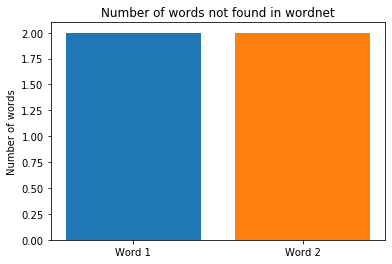

In [29]:
fig , ax = plt.subplots()

ax.bar(   'Word 1'  , len(given_data[given_data['English Word 1 AL1'] == '']) )
ax.bar(   'Word 2'  , len(given_data[given_data['English Word 2 AL1'] == '']))

# ax.legend()

plt.title('Number of words not found in wordnet')
# plt.xlabel('Number of Time words not found in wordnet')
plt.ylabel('Number of words')
plt.show()

In [30]:
print ( "Number of pairs having 0 similarity = " ,len(given_data[given_data['Jaccard A1'] == 0]))
print ( "Number of pairs having similarity except 0 = " ,len(given_data[given_data['Jaccard A1'] != 0]))

Number of pairs having 0 similarity =  950
Number of pairs having similarity except 0 =  50


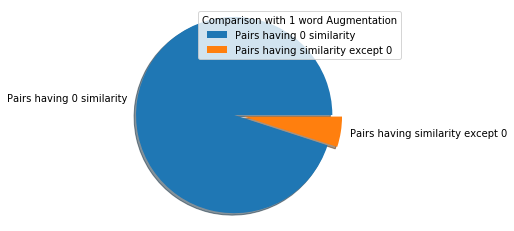

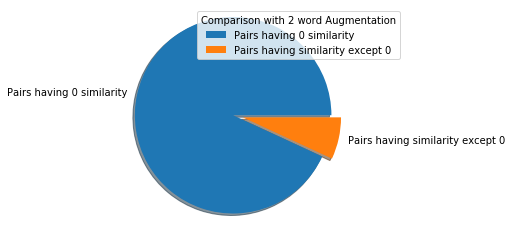

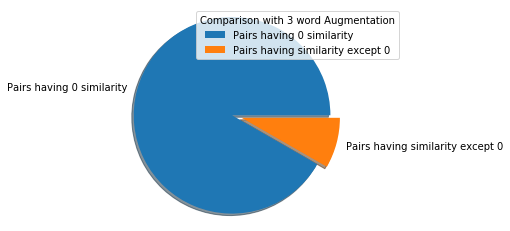

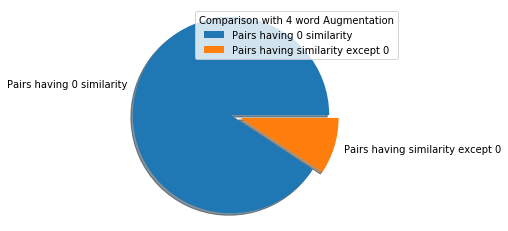

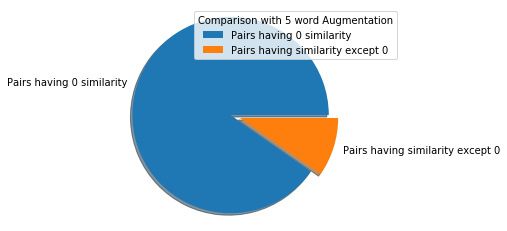

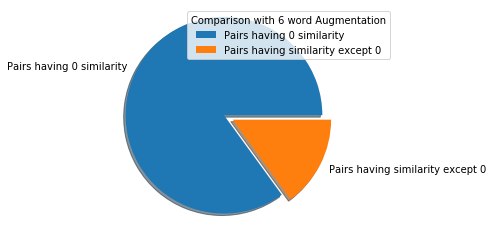

In [31]:
for i in range(1, 7):
    labels_text = ['Pairs having 0 similarity' , 'Pairs having similarity except 0']
    values = [len(given_data[given_data['Jaccard A' + str(i)] == 0]) , 
             len(given_data[given_data['Jaccard A' + str(i)] != 0])]
    explode_value = [0 , 0.1]
    plt.pie(values , explode = explode_value , labels = labels_text , shadow = True, startangle = 0 )
    plt.axis('equal')
    plt.legend(title = "Comparison with " + str(i)+ " word Augmentation")
    plt.show()

In [32]:
from scipy.stats import pearsonr
from scipy.stats import spearmanr
from beautifultable import BeautifulTable

In [33]:
table = BeautifulTable()
table.column_headers = ["Data", "Number of zero similarity", "Number of non zero similarity"]
print("Similarty using Jaccard")
for i in range(1 , 7):
    table.append_row([str(i) + " Word Augmentation",
                     len(given_data[given_data['Jaccard A' + str(i)] == 0]),
                     len(given_data[given_data['Jaccard A' + str(i)] != 0])])
print(table)

Similarty using Jaccard
+---------------------+-------------------------+------------------------------+
|        Data         | Number of zero similari | Number of non zero similarit |
|                     |           ty            |              y               |
+---------------------+-------------------------+------------------------------+
| 1 Word Augmentation |           950           |              50              |
+---------------------+-------------------------+------------------------------+
| 2 Word Augmentation |           931           |              69              |
+---------------------+-------------------------+------------------------------+
| 3 Word Augmentation |           917           |              83              |
+---------------------+-------------------------+------------------------------+
| 4 Word Augmentation |           907           |              93              |
+---------------------+-------------------------+------------------------------+
| 5 

In [34]:
table = BeautifulTable()
table.column_headers = ["Data", "Jaccard", "Dice" , "Overlap" , "Containment"]
print("Pearson Correlation COffiecent")
for i in range (1, 7):
    table.append_row([str(i) + " Word Augmentation", 
                      pearsonr(list(given_data["score"]), list(given_data["Jaccard A" + str(i)]))[0],
                      pearsonr(list(given_data["score"]), list(given_data["Dice A" + str(i)]))[0],
                      pearsonr(list(given_data["score"]), list(given_data["Overlap A" + str(i)]))[0],
                      pearsonr(list(given_data["score"]), list(given_data["Containment A" + str(i)]))[0]
                     ])
#     corr_j, p_value = pearsonr(list(given_data["score"]), list(given_data["Jaccard A" + str(i)]))
#     print("Pearson Corelation  =  " , corr ,"\n" ,"P-Value  =  " , p_value)
print(table)

Pearson Correlation COffiecent
+---------------------+---------+-------+---------+-------------+
|        Data         | Jaccard | Dice  | Overlap | Containment |
+---------------------+---------+-------+---------+-------------+
| 1 Word Augmentation |  0.294  | 0.294 |  0.294  |    0.294    |
+---------------------+---------+-------+---------+-------------+
| 2 Word Augmentation |  0.323  | 0.341 |  0.341  |    0.341    |
+---------------------+---------+-------+---------+-------------+
| 3 Word Augmentation |  0.338  | 0.364 |  0.364  |    0.364    |
+---------------------+---------+-------+---------+-------------+
| 4 Word Augmentation |  0.352  | 0.379 |  0.379  |    0.379    |
+---------------------+---------+-------+---------+-------------+
| 5 Word Augmentation |  0.352  | 0.381 |  0.381  |    0.381    |
+---------------------+---------+-------+---------+-------------+
| 6 Word Augmentation |  0.368  | 0.409 |  0.439  |    0.409    |
+---------------------+---------+-------+----

In [35]:
given_data = pd.read_excel('dataset with similarity score after augmenting with babelnet 1_2_3_4_5.xlsx')
given_data

Unnamed: 0              Word 1      Word 2  score Word 2 Translation  \
0             0               Joule  خلائی جہاز   0.58         spacecraft   
1             1       Promised Land        باکو   0.42               Baku   
2             2                 car      سائیکل   2.83            bicycle   
3             3          polyhedron      اداکار   0.00              actor   
4             4  multiple sclerosis    ایم ایس    3.92                 MS   
..          ...                 ...         ...    ...                ...   
995         995         performance         نقش   2.42              cameo   
996         996                term       سمسٹر   3.83           semester   
997         997              citrus       مالٹا   3.00             orange   
998         998      global warming     گلیشیئر   1.58            glacier   
999         999                path        سرنگ   2.00             tunnel   

       English Word 1 AL1 English Word 2 AL1  Jaccard A1  Dice A1  Overlap A1  \
0                   joule         spacecraft           0        0           0   
1                    eden               baku           0        0           0   
2                     car            bicycle           0        0           0   
3              polyhedron              actor           0        0           0   
4      multiple_sclerosis              malay           0        0           0   
..                    ...                ...         ...      ...         ...   
995  carrying_into_action              cameo           0        0           0   
996           school_term        school_term           4        4           4   
997                citrus             orange           0        0           0   
998        global_warming            glacier           0        0           0   
999                  path             burrow           0        0           0   

     ...  Jaccard A5 Dice A5 Overlap A5  Containment A5  \
0    ...    0.000000     0.0        0.0             0.0   
1    ...    0.000000     0.0        0.0             0.0   
2    ...    0.000000     0.0        0.0             0.0   
3    ...    0.000000     0.0        0.0             0.0   
4    ...    0.000000     0.0        0.0             0.0   
..   ...         ...     ...        ...             ...   
995  ...    0.000000     0.0        0.0             0.0   
996  ...    1.714286     2.4        2.4             2.4   
997  ...    0.000000     0.0        0.0             0.0   
998  ...    0.000000     0.0        0.0             0.0   
999  ...    0.000000     0.0        0.0             0.0   

                                    English Word 1 AL6  \
0    joules,kilojoules,nanojoule,μj,attojoule,james...   
1    kenaan,felesteen,hui_dao_bei_ai_de_mei_yi_tian...   
2    history_of_central_africa,peter_gabriel,peter_...   
3    polyhedron_and_polyhedra,hedron,geometric_soli...   
4    relapsing_remitting_multiple_sclerosis,dissemi...   
..                                                 ...   
995  colours:_live_in_concert,concert_tours,perform...   
996  period,quarter,appointment,terms_and_condition...   
997  list_of_citrus_characters,citrus_fruits,citrus...   
998  modern_warming,anthopogenic_global_warming_the...   
999  path_newark_airport_extension,hudson_&_manhatt...   

                                    English Word 2 AL6  Jaccard A6   Dice A6  \
0    spacecraft_communication,interstellar_spacecra...    0.000000  0.000000   
1    soviet_aircraft_carrier_''admiral_of_the_fleet...    0.000000  0.000000   
2    bicycle_rider,biked,bichael,bikes,🚲,women's_cy...    0.000000  0.000000   
3    actors_and_actresses,actor_model,inherency,civ...    0.000000  0.000000   
4    sclerosi_in_plache,bahasa_malaysian,microsoft_...    0.693333  1.181818   
..                                                 ...         ...       ...   
995  wave,cameo_appearances,ob1,carved_gemstone,oin...    0.000000  0.000000   
996  school_years,quarter,semesters,trimester_syste...    0.7

In [36]:
table = BeautifulTable()
table.column_headers = ["Data", "Jaccard", "Dice" , "Overlap" , "Containment"]
print("Spearman Correlation COffiecent")
for i in range (1, 7):
    table.append_row([str(i) + " Word Augmentation", 
                      spearmanr(list(given_data["score"]), list( given_data["Jaccard A" + str(i)] ))[0],
                      spearmanr(list(given_data["score"]), list(  given_data["Dice A" + str(i)] ))[0],
                      spearmanr(list(given_data["score"]), list(  given_data["Overlap A" + str(i)] ))[0],
                      spearmanr(list(given_data["score"]), list(  given_data["Containment A" + str(i)] ))[0]
                     ])
#     corr_j, p_value = pearsonr(list(given_data["score"]), list(given_data["Jaccard A" + str(i)]))
#     print("Pearson Corelation  =  " , corr ,"\n" ,"P-Value  =  " , p_value)
print(table)

Spearman Correlation COffiecent
+---------------------+---------+-------+---------+-------------+
|        Data         | Jaccard | Dice  | Overlap | Containment |
+---------------------+---------+-------+---------+-------------+
| 1 Word Augmentation |  0.305  | 0.305 |  0.305  |    0.305    |
+---------------------+---------+-------+---------+-------------+
| 2 Word Augmentation |  0.369  | 0.369 |  0.369  |    0.369    |
+---------------------+---------+-------+---------+-------------+
| 3 Word Augmentation |  0.412  | 0.412 |  0.412  |    0.412    |
+---------------------+---------+-------+---------+-------------+
| 4 Word Augmentation |  0.421  | 0.421 |  0.421  |    0.421    |
+---------------------+---------+-------+---------+-------------+
| 5 Word Augmentation |  0.43   | 0.43  |  0.43   |    0.43     |
+---------------------+---------+-------+---------+-------------+
| 6 Word Augmentation |  0.469  | 0.469 |  0.469  |    0.468    |
+---------------------+---------+-------+---

# Target only non empty sets

In [37]:
df_noNan =  given_data[given_data['English Word 1 AL6'].notnull()]
df_noNan.shape

(998, 41)

In [38]:
df_noNan =  df_noNan[df_noNan['English Word 2 AL6'].notnull()]
df_noNan.shape

(996, 41)

In [39]:
df_noNan

Unnamed: 0              Word 1      Word 2  score Word 2 Translation  \
0             0               Joule  خلائی جہاز   0.58         spacecraft   
1             1       Promised Land        باکو   0.42               Baku   
2             2                 car      سائیکل   2.83            bicycle   
3             3          polyhedron      اداکار   0.00              actor   
4             4  multiple sclerosis    ایم ایس    3.92                 MS   
..          ...                 ...         ...    ...                ...   
995         995         performance         نقش   2.42              cameo   
996         996                term       سمسٹر   3.83           semester   
997         997              citrus       مالٹا   3.00             orange   
998         998      global warming     گلیشیئر   1.58            glacier   
999         999                path        سرنگ   2.00             tunnel   

       English Word 1 AL1 English Word 2 AL1  Jaccard A1  Dice A1  Overlap A1  \
0                   joule         spacecraft           0        0           0   
1                    eden               baku           0        0           0   
2                     car            bicycle           0        0           0   
3              polyhedron              actor           0        0           0   
4      multiple_sclerosis              malay           0        0           0   
..                    ...                ...         ...      ...         ...   
995  carrying_into_action              cameo           0        0           0   
996           school_term        school_term           4        4           4   
997                citrus             orange           0        0           0   
998        global_warming            glacier           0        0           0   
999                  path             burrow           0        0           0   

     ...  Jaccard A5 Dice A5 Overlap A5  Containment A5  \
0    ...    0.000000     0.0        0.0             0.0   
1    ...    0.000000     0.0        0.0             0.0   
2    ...    0.000000     0.0        0.0             0.0   
3    ...    0.000000     0.0        0.0             0.0   
4    ...    0.000000     0.0        0.0             0.0   
..   ...         ...     ...        ...             ...   
995  ...    0.000000     0.0        0.0             0.0   
996  ...    1.714286     2.4        2.4             2.4   
997  ...    0.000000     0.0        0.0             0.0   
998  ...    0.000000     0.0        0.0             0.0   
999  ...    0.000000     0.0        0.0             0.0   

                                    English Word 1 AL6  \
0    joules,kilojoules,nanojoule,μj,attojoule,james...   
1    kenaan,felesteen,hui_dao_bei_ai_de_mei_yi_tian...   
2    history_of_central_africa,peter_gabriel,peter_...   
3    polyhedron_and_polyhedra,hedron,geometric_soli...   
4    relapsing_remitting_multiple_sclerosis,dissemi...   
..                                                 ...   
995  colours:_live_in_concert,concert_tours,perform...   
996  period,quarter,appointment,terms_and_condition...   
997  list_of_citrus_characters,citrus_fruits,citrus...   
998  modern_warming,anthopogenic_global_warming_the...   
999  path_newark_airport_extension,hudson_&_manhatt...   

                                    English Word 2 AL6  Jaccard A6   Dice A6  \
0    spacecraft_communication,interstellar_spacecra...    0.000000  0.000000   
1    soviet_aircraft_carrier_''admiral_of_the_fleet...    0.000000  0.000000   
2    bicycle_rider,biked,bichael,bikes,🚲,women's_cy...    0.000000  0.000000   
3    actors_and_actresses,actor_model,inherency,civ...    0.000000  0.000000   
4    sclerosi_in_plache,bahasa_malaysian,microsoft_...    0.693333  1.181818   
..                                                 ...         ...       ...   
995  wave,cameo_appearances,ob1,carved_gemstone,oin...    0.000000  0.000000   
996  school_years,quarter,semesters,trimester_syste...    0.7

In [40]:
table = BeautifulTable()
table.column_headers = ["Data", "Jaccard", "Dice" , "Overlap" , "Containment"]
print("Pearson Correlation COffiecent")
for i in range (1, 7):
    table.append_row([str(i) + " Word Augmentation", 
                      pearsonr(list(df_noNan["score"]), list((df_noNan["Jaccard A" + str(i)])))[0],
                      pearsonr(list(df_noNan["score"]), list((df_noNan["Dice A" + str(i)])))[0],
                      pearsonr(list(df_noNan["score"]), list((df_noNan["Overlap A" + str(i)])))[0],
                      pearsonr(list(df_noNan["score"]), list((df_noNan["Containment A" + str(i)])))[0]
                     ])
#     corr_j, p_value = pearsonr(list(given_data["score"]), list(given_data["Jaccard A" + str(i)]))
#     print("Pearson Corelation  =  " , corr ,"\n" ,"P-Value  =  " , p_value)
print(table)

Pearson Correlation COffiecent
+---------------------+---------+-------+---------+-------------+
|        Data         | Jaccard | Dice  | Overlap | Containment |
+---------------------+---------+-------+---------+-------------+
| 1 Word Augmentation |  0.294  | 0.294 |  0.294  |    0.294    |
+---------------------+---------+-------+---------+-------------+
| 2 Word Augmentation |  0.323  | 0.341 |  0.341  |    0.341    |
+---------------------+---------+-------+---------+-------------+
| 3 Word Augmentation |  0.338  | 0.364 |  0.364  |    0.364    |
+---------------------+---------+-------+---------+-------------+
| 4 Word Augmentation |  0.352  | 0.379 |  0.379  |    0.379    |
+---------------------+---------+-------+---------+-------------+
| 5 Word Augmentation |  0.352  | 0.381 |  0.381  |    0.381    |
+---------------------+---------+-------+---------+-------------+
| 6 Word Augmentation |  0.368  | 0.409 |  0.439  |    0.409    |
+---------------------+---------+-------+----

In [41]:
table = BeautifulTable()
table.column_headers = ["Data", "Jaccard", "Dice" , "Overlap" , "Containment"]
print("Spearman Correlation COffiecent")
for i in range (1, 7):
    table.append_row([str(i) + " Word Augmentation", 
                      spearmanr(list(df_noNan["score"]), list( df_noNan["Jaccard A" + str(i)] ))[0],
                      spearmanr(list(df_noNan["score"]), list( df_noNan["Dice A" + str(i)] ))[0],
                      spearmanr(list(df_noNan["score"]), list( df_noNan["Overlap A" + str(i)] ))[0],
                      spearmanr(list(df_noNan["score"]), list( df_noNan["Containment A" + str(i)] ))[0]
                     ])
#     corr_j, p_value = pearsonr(list(given_data["score"]), list(given_data["Jaccard A" + str(i)]))
#     print("Pearson Corelation  =  " , corr ,"\n" ,"P-Value  =  " , p_value)
print(table)

Spearman Correlation COffiecent
+---------------------+---------+-------+---------+-------------+
|        Data         | Jaccard | Dice  | Overlap | Containment |
+---------------------+---------+-------+---------+-------------+
| 1 Word Augmentation |  0.305  | 0.305 |  0.305  |    0.305    |
+---------------------+---------+-------+---------+-------------+
| 2 Word Augmentation |  0.369  | 0.369 |  0.369  |    0.369    |
+---------------------+---------+-------+---------+-------------+
| 3 Word Augmentation |  0.413  | 0.413 |  0.413  |    0.413    |
+---------------------+---------+-------+---------+-------------+
| 4 Word Augmentation |  0.421  | 0.421 |  0.421  |    0.421    |
+---------------------+---------+-------+---------+-------------+
| 5 Word Augmentation |  0.431  | 0.431 |  0.431  |    0.431    |
+---------------------+---------+-------+---------+-------------+
| 6 Word Augmentation |  0.469  | 0.469 |  0.469  |    0.469    |
+---------------------+---------+-------+---